In [1]:
import keras
from keras.models import Sequential, Model
from keras.layers.core import Dense, Dropout, Activation
from keras.layers import Input, LSTM, Flatten
from keras import regularizers
from sklearn.metrics import confusion_matrix

import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from keras.layers.normalization import BatchNormalization


from IPython import embed


def import_data(dataset="data"):
    X = []
    Y = []

    f=open(dataset, 'r')
    for line in f.readlines():
        intLine = [int(s) for s in line.split(' ')]
        X.append(intLine[:-1])
        Y.append(intLine[-1:])

    X = np.array(X)
    X = X.reshape(X.shape[0], 1, X.shape[1])
    Y = np.array(Y)
    Y = Y.reshape(Y.shape[0], 1)

    return X,Y

def create_RNN_model(input_shape, neurons):
    model = Sequential()
    model.add(LSTM(neurons, input_shape=(input_shape[1], input_shape[2]), activation="selu", kernel_initializer="lecun_uniform", return_sequences=False))
    model.add(Dense(1, activation="sigmoid"))
    model.compile(loss='binary_crossentropy', optimizer='RMSprop', metrics=['binary_crossentropy','accuracy'])


    return model

def draw_figure(data, label, fig=None, ax=None):
    # Plot the change in the validation set vs change in the training set
    if not fig:
        fig = plt.figure(figsize=(6, 4))
    if not ax:
        ax = fig.add_subplot(111)
    
    
    real_data = []
    scale = int(len(data[0])/50)
    
    
    
    for i in range(0, 50):
        real_data.append(data[0][i*scale])
    
    ax.plot(np.arange(1, len(data[0]) + 1, scale), real_data, label=label)
    ax.legend(loc='best')
    ax.set_xlabel('Epoch number')
    return fig, ax

Using TensorFlow backend.



Training examples: 819
Test examples: 205
Epochs: 5000  -------  Try: 0
Train on 819 samples, validate on 205 samples
Epoch 1/5000
819/819 [==============================] - 1s 1ms/step - loss: 0.7035 - binary_crossentropy: 0.7035 - acc: 0.4994 - val_loss: 0.6989 - val_binary_crossentropy: 0.6989 - val_acc: 0.4829
Epoch 2/5000
819/819 [==============================] - 0s 27us/step - loss: 0.7010 - binary_crossentropy: 0.7010 - acc: 0.5055 - val_loss: 0.6985 - val_binary_crossentropy: 0.6985 - val_acc: 0.4976
Epoch 3/5000
819/819 [==============================] - 0s 25us/step - loss: 0.6995 - binary_crossentropy: 0.6995 - acc: 0.5043 - val_loss: 0.6981 - val_binary_crossentropy: 0.6981 - val_acc: 0.5073
Epoch 4/5000
819/819 [==============================] - 0s 25us/step - loss: 0.6986 - binary_crossentropy: 0.6986 - acc: 0.5055 - val_loss: 0.6979 - val_binary_crossentropy: 0.6979 - val_acc: 0.4976
Epoch 5/5000
819/819 [==============================] - 0s 26us/step - loss: 0.6980 - 

819/819 [==============================] - 0s 29us/step - loss: 0.6929 - binary_crossentropy: 0.6929 - acc: 0.5116 - val_loss: 0.6957 - val_binary_crossentropy: 0.6957 - val_acc: 0.5024
Epoch 42/5000
819/819 [==============================] - 0s 27us/step - loss: 0.6929 - binary_crossentropy: 0.6929 - acc: 0.5116 - val_loss: 0.6958 - val_binary_crossentropy: 0.6958 - val_acc: 0.5073
Epoch 43/5000
819/819 [==============================] - 0s 26us/step - loss: 0.6929 - binary_crossentropy: 0.6929 - acc: 0.5104 - val_loss: 0.6958 - val_binary_crossentropy: 0.6958 - val_acc: 0.5122
Epoch 44/5000
819/819 [==============================] - 0s 27us/step - loss: 0.6927 - binary_crossentropy: 0.6927 - acc: 0.5079 - val_loss: 0.6960 - val_binary_crossentropy: 0.6960 - val_acc: 0.5073
Epoch 45/5000
819/819 [==============================] - 0s 32us/step - loss: 0.6927 - binary_crossentropy: 0.6927 - acc: 0.5067 - val_loss: 0.6957 - val_binary_crossentropy: 0.6957 - val_acc: 0.5024
Epoch 46/5000


Epoch 82/5000
819/819 [==============================] - 0s 28us/step - loss: 0.6906 - binary_crossentropy: 0.6906 - acc: 0.5397 - val_loss: 0.6937 - val_binary_crossentropy: 0.6937 - val_acc: 0.4927
Epoch 83/5000
819/819 [==============================] - 0s 26us/step - loss: 0.6906 - binary_crossentropy: 0.6906 - acc: 0.5421 - val_loss: 0.6937 - val_binary_crossentropy: 0.6937 - val_acc: 0.4927
Epoch 84/5000
819/819 [==============================] - 0s 30us/step - loss: 0.6907 - binary_crossentropy: 0.6907 - acc: 0.5433 - val_loss: 0.6937 - val_binary_crossentropy: 0.6937 - val_acc: 0.5024
Epoch 85/5000
819/819 [==============================] - 0s 32us/step - loss: 0.6905 - binary_crossentropy: 0.6905 - acc: 0.5495 - val_loss: 0.6936 - val_binary_crossentropy: 0.6936 - val_acc: 0.5024
Epoch 86/5000
819/819 [==============================] - 0s 28us/step - loss: 0.6904 - binary_crossentropy: 0.6904 - acc: 0.5519 - val_loss: 0.6935 - val_binary_crossentropy: 0.6935 - val_acc: 0.5024


Epoch 123/5000
819/819 [==============================] - 0s 52us/step - loss: 0.6886 - binary_crossentropy: 0.6886 - acc: 0.5495 - val_loss: 0.6930 - val_binary_crossentropy: 0.6930 - val_acc: 0.5073
Epoch 124/5000
819/819 [==============================] - 0s 42us/step - loss: 0.6887 - binary_crossentropy: 0.6887 - acc: 0.5519 - val_loss: 0.6929 - val_binary_crossentropy: 0.6929 - val_acc: 0.5122
Epoch 125/5000
819/819 [==============================] - 0s 37us/step - loss: 0.6885 - binary_crossentropy: 0.6885 - acc: 0.5507 - val_loss: 0.6931 - val_binary_crossentropy: 0.6931 - val_acc: 0.5073
Epoch 126/5000
819/819 [==============================] - 0s 34us/step - loss: 0.6885 - binary_crossentropy: 0.6885 - acc: 0.5556 - val_loss: 0.6928 - val_binary_crossentropy: 0.6928 - val_acc: 0.5122
Epoch 127/5000
819/819 [==============================] - 0s 40us/step - loss: 0.6885 - binary_crossentropy: 0.6885 - acc: 0.5556 - val_loss: 0.6928 - val_binary_crossentropy: 0.6928 - val_acc: 0.

Epoch 164/5000
819/819 [==============================] - 0s 29us/step - loss: 0.6868 - binary_crossentropy: 0.6868 - acc: 0.5580 - val_loss: 0.6934 - val_binary_crossentropy: 0.6934 - val_acc: 0.5122
Epoch 165/5000
819/819 [==============================] - ETA: 0s - loss: 0.6844 - binary_crossentropy: 0.6844 - acc: 0.600 - 0s 39us/step - loss: 0.6867 - binary_crossentropy: 0.6867 - acc: 0.5629 - val_loss: 0.6931 - val_binary_crossentropy: 0.6931 - val_acc: 0.5024
Epoch 166/5000
819/819 [==============================] - 0s 35us/step - loss: 0.6867 - binary_crossentropy: 0.6867 - acc: 0.5653 - val_loss: 0.6932 - val_binary_crossentropy: 0.6932 - val_acc: 0.4976
Epoch 167/5000
819/819 [==============================] - 0s 39us/step - loss: 0.6865 - binary_crossentropy: 0.6865 - acc: 0.5653 - val_loss: 0.6934 - val_binary_crossentropy: 0.6934 - val_acc: 0.5122
Epoch 168/5000
819/819 [==============================] - 0s 50us/step - loss: 0.6866 - binary_crossentropy: 0.6866 - acc: 0.562

819/819 [==============================] - 0s 36us/step - loss: 0.6842 - binary_crossentropy: 0.6842 - acc: 0.5702 - val_loss: 0.6927 - val_binary_crossentropy: 0.6927 - val_acc: 0.5073
Epoch 205/5000
819/819 [==============================] - 0s 36us/step - loss: 0.6844 - binary_crossentropy: 0.6844 - acc: 0.5763 - val_loss: 0.6925 - val_binary_crossentropy: 0.6925 - val_acc: 0.4976
Epoch 206/5000
819/819 [==============================] - 0s 38us/step - loss: 0.6842 - binary_crossentropy: 0.6842 - acc: 0.5690 - val_loss: 0.6924 - val_binary_crossentropy: 0.6924 - val_acc: 0.4927
Epoch 207/5000
819/819 [==============================] - 0s 40us/step - loss: 0.6839 - binary_crossentropy: 0.6839 - acc: 0.5763 - val_loss: 0.6926 - val_binary_crossentropy: 0.6926 - val_acc: 0.5073
Epoch 208/5000
819/819 [==============================] - 0s 36us/step - loss: 0.6841 - binary_crossentropy: 0.6841 - acc: 0.5739 - val_loss: 0.6925 - val_binary_crossentropy: 0.6925 - val_acc: 0.5024
Epoch 209/

Epoch 245/5000
819/819 [==============================] - 0s 30us/step - loss: 0.6814 - binary_crossentropy: 0.6814 - acc: 0.5714 - val_loss: 0.6920 - val_binary_crossentropy: 0.6920 - val_acc: 0.5073
Epoch 246/5000
819/819 [==============================] - 0s 34us/step - loss: 0.6813 - binary_crossentropy: 0.6813 - acc: 0.5690 - val_loss: 0.6922 - val_binary_crossentropy: 0.6922 - val_acc: 0.5024
Epoch 247/5000
819/819 [==============================] - 0s 28us/step - loss: 0.6812 - binary_crossentropy: 0.6812 - acc: 0.5690 - val_loss: 0.6920 - val_binary_crossentropy: 0.6920 - val_acc: 0.5317
Epoch 248/5000
819/819 [==============================] - 0s 28us/step - loss: 0.6809 - binary_crossentropy: 0.6809 - acc: 0.5702 - val_loss: 0.6924 - val_binary_crossentropy: 0.6924 - val_acc: 0.5122
Epoch 249/5000
819/819 [==============================] - 0s 28us/step - loss: 0.6809 - binary_crossentropy: 0.6809 - acc: 0.5702 - val_loss: 0.6921 - val_binary_crossentropy: 0.6921 - val_acc: 0.

Epoch 286/5000
819/819 [==============================] - 0s 25us/step - loss: 0.6781 - binary_crossentropy: 0.6781 - acc: 0.5873 - val_loss: 0.6929 - val_binary_crossentropy: 0.6929 - val_acc: 0.5317
Epoch 287/5000
819/819 [==============================] - 0s 28us/step - loss: 0.6779 - binary_crossentropy: 0.6779 - acc: 0.5922 - val_loss: 0.6928 - val_binary_crossentropy: 0.6928 - val_acc: 0.5268
Epoch 288/5000
819/819 [==============================] - 0s 27us/step - loss: 0.6780 - binary_crossentropy: 0.6780 - acc: 0.5861 - val_loss: 0.6933 - val_binary_crossentropy: 0.6933 - val_acc: 0.5268
Epoch 289/5000
819/819 [==============================] - 0s 31us/step - loss: 0.6779 - binary_crossentropy: 0.6779 - acc: 0.5849 - val_loss: 0.6927 - val_binary_crossentropy: 0.6927 - val_acc: 0.5463
Epoch 290/5000
819/819 [==============================] - 0s 26us/step - loss: 0.6776 - binary_crossentropy: 0.6776 - acc: 0.5873 - val_loss: 0.6929 - val_binary_crossentropy: 0.6929 - val_acc: 0.

Epoch 327/5000
819/819 [==============================] - 0s 29us/step - loss: 0.6745 - binary_crossentropy: 0.6745 - acc: 0.5861 - val_loss: 0.6922 - val_binary_crossentropy: 0.6922 - val_acc: 0.5366
Epoch 328/5000
819/819 [==============================] - 0s 26us/step - loss: 0.6745 - binary_crossentropy: 0.6745 - acc: 0.5897 - val_loss: 0.6928 - val_binary_crossentropy: 0.6928 - val_acc: 0.5366
Epoch 329/5000
819/819 [==============================] - 0s 26us/step - loss: 0.6745 - binary_crossentropy: 0.6745 - acc: 0.5873 - val_loss: 0.6922 - val_binary_crossentropy: 0.6922 - val_acc: 0.5512
Epoch 330/5000
819/819 [==============================] - 0s 27us/step - loss: 0.6743 - binary_crossentropy: 0.6743 - acc: 0.5922 - val_loss: 0.6920 - val_binary_crossentropy: 0.6920 - val_acc: 0.5610
Epoch 331/5000
819/819 [==============================] - 0s 28us/step - loss: 0.6744 - binary_crossentropy: 0.6744 - acc: 0.5800 - val_loss: 0.6917 - val_binary_crossentropy: 0.6917 - val_acc: 0.

Epoch 368/5000
819/819 [==============================] - 0s 26us/step - loss: 0.6712 - binary_crossentropy: 0.6712 - acc: 0.6056 - val_loss: 0.6918 - val_binary_crossentropy: 0.6918 - val_acc: 0.5512
Epoch 369/5000
819/819 [==============================] - 0s 27us/step - loss: 0.6711 - binary_crossentropy: 0.6711 - acc: 0.6044 - val_loss: 0.6917 - val_binary_crossentropy: 0.6917 - val_acc: 0.5463
Epoch 370/5000
819/819 [==============================] - 0s 26us/step - loss: 0.6709 - binary_crossentropy: 0.6709 - acc: 0.6093 - val_loss: 0.6916 - val_binary_crossentropy: 0.6916 - val_acc: 0.5610
Epoch 371/5000
819/819 [==============================] - 0s 26us/step - loss: 0.6709 - binary_crossentropy: 0.6709 - acc: 0.6093 - val_loss: 0.6912 - val_binary_crossentropy: 0.6912 - val_acc: 0.5707
Epoch 372/5000
819/819 [==============================] - 0s 27us/step - loss: 0.6706 - binary_crossentropy: 0.6706 - acc: 0.6081 - val_loss: 0.6916 - val_binary_crossentropy: 0.6916 - val_acc: 0.

Epoch 409/5000
819/819 [==============================] - 0s 26us/step - loss: 0.6674 - binary_crossentropy: 0.6674 - acc: 0.6056 - val_loss: 0.6921 - val_binary_crossentropy: 0.6921 - val_acc: 0.5512
Epoch 410/5000
819/819 [==============================] - 0s 34us/step - loss: 0.6673 - binary_crossentropy: 0.6673 - acc: 0.6178 - val_loss: 0.6914 - val_binary_crossentropy: 0.6914 - val_acc: 0.5512
Epoch 411/5000
819/819 [==============================] - 0s 27us/step - loss: 0.6672 - binary_crossentropy: 0.6672 - acc: 0.6203 - val_loss: 0.6916 - val_binary_crossentropy: 0.6916 - val_acc: 0.5512
Epoch 412/5000
819/819 [==============================] - 0s 27us/step - loss: 0.6668 - binary_crossentropy: 0.6668 - acc: 0.6178 - val_loss: 0.6919 - val_binary_crossentropy: 0.6919 - val_acc: 0.5561
Epoch 413/5000
819/819 [==============================] - 0s 26us/step - loss: 0.6669 - binary_crossentropy: 0.6669 - acc: 0.6129 - val_loss: 0.6913 - val_binary_crossentropy: 0.6913 - val_acc: 0.

Epoch 450/5000
819/819 [==============================] - 0s 26us/step - loss: 0.6635 - binary_crossentropy: 0.6635 - acc: 0.6178 - val_loss: 0.6924 - val_binary_crossentropy: 0.6924 - val_acc: 0.5415
Epoch 451/5000
819/819 [==============================] - 0s 27us/step - loss: 0.6634 - binary_crossentropy: 0.6634 - acc: 0.6215 - val_loss: 0.6923 - val_binary_crossentropy: 0.6923 - val_acc: 0.5463
Epoch 452/5000
819/819 [==============================] - 0s 26us/step - loss: 0.6634 - binary_crossentropy: 0.6634 - acc: 0.6178 - val_loss: 0.6916 - val_binary_crossentropy: 0.6916 - val_acc: 0.5463
Epoch 453/5000
819/819 [==============================] - 0s 32us/step - loss: 0.6632 - binary_crossentropy: 0.6632 - acc: 0.6178 - val_loss: 0.6931 - val_binary_crossentropy: 0.6931 - val_acc: 0.5366
Epoch 454/5000
819/819 [==============================] - 0s 28us/step - loss: 0.6631 - binary_crossentropy: 0.6631 - acc: 0.6276 - val_loss: 0.6913 - val_binary_crossentropy: 0.6913 - val_acc: 0.

Epoch 491/5000
819/819 [==============================] - 0s 28us/step - loss: 0.6603 - binary_crossentropy: 0.6603 - acc: 0.6325 - val_loss: 0.6906 - val_binary_crossentropy: 0.6906 - val_acc: 0.5561
Epoch 492/5000
819/819 [==============================] - 0s 26us/step - loss: 0.6600 - binary_crossentropy: 0.6600 - acc: 0.6252 - val_loss: 0.6911 - val_binary_crossentropy: 0.6911 - val_acc: 0.5561
Epoch 493/5000
819/819 [==============================] - 0s 29us/step - loss: 0.6598 - binary_crossentropy: 0.6598 - acc: 0.6276 - val_loss: 0.6904 - val_binary_crossentropy: 0.6904 - val_acc: 0.5659
Epoch 494/5000
819/819 [==============================] - 0s 40us/step - loss: 0.6596 - binary_crossentropy: 0.6596 - acc: 0.6313 - val_loss: 0.6919 - val_binary_crossentropy: 0.6919 - val_acc: 0.5366
Epoch 495/5000
819/819 [==============================] - 0s 33us/step - loss: 0.6599 - binary_crossentropy: 0.6599 - acc: 0.6252 - val_loss: 0.6908 - val_binary_crossentropy: 0.6908 - val_acc: 0.

819/819 [==============================] - 0s 34us/step - loss: 0.6564 - binary_crossentropy: 0.6564 - acc: 0.6337 - val_loss: 0.6903 - val_binary_crossentropy: 0.6903 - val_acc: 0.5512
Epoch 532/5000
819/819 [==============================] - 0s 31us/step - loss: 0.6567 - binary_crossentropy: 0.6567 - acc: 0.6337 - val_loss: 0.6905 - val_binary_crossentropy: 0.6905 - val_acc: 0.5463
Epoch 533/5000
819/819 [==============================] - 0s 32us/step - loss: 0.6561 - binary_crossentropy: 0.6561 - acc: 0.6313 - val_loss: 0.6901 - val_binary_crossentropy: 0.6901 - val_acc: 0.5463
Epoch 534/5000
819/819 [==============================] - 0s 32us/step - loss: 0.6565 - binary_crossentropy: 0.6565 - acc: 0.6325 - val_loss: 0.6902 - val_binary_crossentropy: 0.6902 - val_acc: 0.5366
Epoch 535/5000
819/819 [==============================] - 0s 36us/step - loss: 0.6562 - binary_crossentropy: 0.6562 - acc: 0.6422 - val_loss: 0.6905 - val_binary_crossentropy: 0.6905 - val_acc: 0.5512
Epoch 536/

819/819 [==============================] - 0s 26us/step - loss: 0.6532 - binary_crossentropy: 0.6532 - acc: 0.6459 - val_loss: 0.6901 - val_binary_crossentropy: 0.6901 - val_acc: 0.5512
Epoch 572/5000
819/819 [==============================] - 0s 31us/step - loss: 0.6534 - binary_crossentropy: 0.6534 - acc: 0.6410 - val_loss: 0.6900 - val_binary_crossentropy: 0.6900 - val_acc: 0.5415
Epoch 573/5000
819/819 [==============================] - 0s 27us/step - loss: 0.6530 - binary_crossentropy: 0.6530 - acc: 0.6459 - val_loss: 0.6900 - val_binary_crossentropy: 0.6900 - val_acc: 0.5463
Epoch 574/5000
819/819 [==============================] - 0s 26us/step - loss: 0.6533 - binary_crossentropy: 0.6533 - acc: 0.6422 - val_loss: 0.6906 - val_binary_crossentropy: 0.6906 - val_acc: 0.5463
Epoch 575/5000
819/819 [==============================] - 0s 34us/step - loss: 0.6529 - binary_crossentropy: 0.6529 - acc: 0.6508 - val_loss: 0.6902 - val_binary_crossentropy: 0.6902 - val_acc: 0.5561
Epoch 576/

819/819 [==============================] - 0s 35us/step - loss: 0.6499 - binary_crossentropy: 0.6499 - acc: 0.6447 - val_loss: 0.6927 - val_binary_crossentropy: 0.6927 - val_acc: 0.5268
Epoch 612/5000
819/819 [==============================] - 0s 35us/step - loss: 0.6499 - binary_crossentropy: 0.6499 - acc: 0.6386 - val_loss: 0.6912 - val_binary_crossentropy: 0.6912 - val_acc: 0.5366
Epoch 613/5000
819/819 [==============================] - 0s 31us/step - loss: 0.6495 - binary_crossentropy: 0.6495 - acc: 0.6300 - val_loss: 0.6924 - val_binary_crossentropy: 0.6924 - val_acc: 0.5220
Epoch 614/5000
819/819 [==============================] - 0s 33us/step - loss: 0.6499 - binary_crossentropy: 0.6499 - acc: 0.6398 - val_loss: 0.6909 - val_binary_crossentropy: 0.6909 - val_acc: 0.5366
Epoch 615/5000
819/819 [==============================] - 0s 37us/step - loss: 0.6493 - binary_crossentropy: 0.6493 - acc: 0.6447 - val_loss: 0.6904 - val_binary_crossentropy: 0.6904 - val_acc: 0.5415
Epoch 616/

819/819 [==============================] - 0s 32us/step - loss: 0.6466 - binary_crossentropy: 0.6466 - acc: 0.6471 - val_loss: 0.6908 - val_binary_crossentropy: 0.6908 - val_acc: 0.5366
Epoch 652/5000
819/819 [==============================] - 0s 31us/step - loss: 0.6461 - binary_crossentropy: 0.6461 - acc: 0.6459 - val_loss: 0.6902 - val_binary_crossentropy: 0.6902 - val_acc: 0.5415
Epoch 653/5000
819/819 [==============================] - 0s 28us/step - loss: 0.6458 - binary_crossentropy: 0.6458 - acc: 0.6484 - val_loss: 0.6920 - val_binary_crossentropy: 0.6920 - val_acc: 0.5317
Epoch 654/5000
819/819 [==============================] - 0s 31us/step - loss: 0.6465 - binary_crossentropy: 0.6465 - acc: 0.6398 - val_loss: 0.6909 - val_binary_crossentropy: 0.6909 - val_acc: 0.5317
Epoch 655/5000
819/819 [==============================] - 0s 34us/step - loss: 0.6459 - binary_crossentropy: 0.6459 - acc: 0.6398 - val_loss: 0.6904 - val_binary_crossentropy: 0.6904 - val_acc: 0.5366
Epoch 656/

Epoch 692/5000
819/819 [==============================] - 0s 26us/step - loss: 0.6425 - binary_crossentropy: 0.6425 - acc: 0.6557 - val_loss: 0.6903 - val_binary_crossentropy: 0.6903 - val_acc: 0.5512
Epoch 693/5000
819/819 [==============================] - 0s 26us/step - loss: 0.6423 - binary_crossentropy: 0.6423 - acc: 0.6618 - val_loss: 0.6902 - val_binary_crossentropy: 0.6902 - val_acc: 0.5659
Epoch 694/5000
819/819 [==============================] - 0s 28us/step - loss: 0.6422 - binary_crossentropy: 0.6422 - acc: 0.6569 - val_loss: 0.6905 - val_binary_crossentropy: 0.6905 - val_acc: 0.5610
Epoch 695/5000
819/819 [==============================] - 0s 31us/step - loss: 0.6425 - binary_crossentropy: 0.6425 - acc: 0.6545 - val_loss: 0.6901 - val_binary_crossentropy: 0.6901 - val_acc: 0.5707
Epoch 696/5000
819/819 [==============================] - 0s 28us/step - loss: 0.6426 - binary_crossentropy: 0.6426 - acc: 0.6654 - val_loss: 0.6901 - val_binary_crossentropy: 0.6901 - val_acc: 0.

Epoch 733/5000
819/819 [==============================] - 0s 28us/step - loss: 0.6392 - binary_crossentropy: 0.6392 - acc: 0.6593 - val_loss: 0.6893 - val_binary_crossentropy: 0.6893 - val_acc: 0.5561
Epoch 734/5000
819/819 [==============================] - 0s 26us/step - loss: 0.6387 - binary_crossentropy: 0.6387 - acc: 0.6581 - val_loss: 0.6892 - val_binary_crossentropy: 0.6892 - val_acc: 0.5512
Epoch 735/5000
819/819 [==============================] - 0s 28us/step - loss: 0.6390 - binary_crossentropy: 0.6390 - acc: 0.6581 - val_loss: 0.6894 - val_binary_crossentropy: 0.6894 - val_acc: 0.5659
Epoch 736/5000
819/819 [==============================] - 0s 27us/step - loss: 0.6389 - binary_crossentropy: 0.6389 - acc: 0.6557 - val_loss: 0.6919 - val_binary_crossentropy: 0.6919 - val_acc: 0.5415
Epoch 737/5000
819/819 [==============================] - 0s 25us/step - loss: 0.6391 - binary_crossentropy: 0.6391 - acc: 0.6545 - val_loss: 0.6890 - val_binary_crossentropy: 0.6890 - val_acc: 0.

Epoch 774/5000
819/819 [==============================] - 0s 41us/step - loss: 0.6358 - binary_crossentropy: 0.6358 - acc: 0.6618 - val_loss: 0.6859 - val_binary_crossentropy: 0.6859 - val_acc: 0.5707
Epoch 775/5000
819/819 [==============================] - 0s 51us/step - loss: 0.6358 - binary_crossentropy: 0.6358 - acc: 0.6618 - val_loss: 0.6855 - val_binary_crossentropy: 0.6855 - val_acc: 0.5610
Epoch 776/5000
819/819 [==============================] - 0s 39us/step - loss: 0.6358 - binary_crossentropy: 0.6358 - acc: 0.6642 - val_loss: 0.6873 - val_binary_crossentropy: 0.6873 - val_acc: 0.5561
Epoch 777/5000
819/819 [==============================] - 0s 38us/step - loss: 0.6351 - binary_crossentropy: 0.6351 - acc: 0.6667 - val_loss: 0.6861 - val_binary_crossentropy: 0.6861 - val_acc: 0.5610
Epoch 778/5000
819/819 [==============================] - 0s 34us/step - loss: 0.6353 - binary_crossentropy: 0.6353 - acc: 0.6557 - val_loss: 0.6858 - val_binary_crossentropy: 0.6858 - val_acc: 0.

Epoch 815/5000
819/819 [==============================] - 0s 25us/step - loss: 0.6313 - binary_crossentropy: 0.6313 - acc: 0.6752 - val_loss: 0.6816 - val_binary_crossentropy: 0.6816 - val_acc: 0.5659
Epoch 816/5000
819/819 [==============================] - 0s 26us/step - loss: 0.6317 - binary_crossentropy: 0.6317 - acc: 0.6728 - val_loss: 0.6821 - val_binary_crossentropy: 0.6821 - val_acc: 0.5854
Epoch 817/5000
819/819 [==============================] - 0s 27us/step - loss: 0.6317 - binary_crossentropy: 0.6317 - acc: 0.6618 - val_loss: 0.6828 - val_binary_crossentropy: 0.6828 - val_acc: 0.5756
Epoch 818/5000
819/819 [==============================] - 0s 24us/step - loss: 0.6317 - binary_crossentropy: 0.6317 - acc: 0.6654 - val_loss: 0.6827 - val_binary_crossentropy: 0.6827 - val_acc: 0.5707
Epoch 819/5000
819/819 [==============================] - 0s 26us/step - loss: 0.6313 - binary_crossentropy: 0.6313 - acc: 0.6740 - val_loss: 0.6825 - val_binary_crossentropy: 0.6825 - val_acc: 0.

819/819 [==============================] - 0s 51us/step - loss: 0.6287 - binary_crossentropy: 0.6287 - acc: 0.6679 - val_loss: 0.6800 - val_binary_crossentropy: 0.6800 - val_acc: 0.5707
Epoch 856/5000
819/819 [==============================] - 0s 47us/step - loss: 0.6280 - binary_crossentropy: 0.6280 - acc: 0.6691 - val_loss: 0.6808 - val_binary_crossentropy: 0.6808 - val_acc: 0.5707
Epoch 857/5000
819/819 [==============================] - 0s 48us/step - loss: 0.6280 - binary_crossentropy: 0.6280 - acc: 0.6679 - val_loss: 0.6821 - val_binary_crossentropy: 0.6821 - val_acc: 0.5512
Epoch 858/5000
819/819 [==============================] - 0s 64us/step - loss: 0.6284 - binary_crossentropy: 0.6284 - acc: 0.6630 - val_loss: 0.6804 - val_binary_crossentropy: 0.6804 - val_acc: 0.5707
Epoch 859/5000
819/819 [==============================] - 0s 75us/step - loss: 0.6282 - binary_crossentropy: 0.6282 - acc: 0.6679 - val_loss: 0.6804 - val_binary_crossentropy: 0.6804 - val_acc: 0.5805
Epoch 860/

Epoch 896/5000
819/819 [==============================] - 0s 29us/step - loss: 0.6254 - binary_crossentropy: 0.6254 - acc: 0.6691 - val_loss: 0.6783 - val_binary_crossentropy: 0.6783 - val_acc: 0.5610
Epoch 897/5000
819/819 [==============================] - 0s 28us/step - loss: 0.6258 - binary_crossentropy: 0.6258 - acc: 0.6764 - val_loss: 0.6797 - val_binary_crossentropy: 0.6797 - val_acc: 0.5610
Epoch 898/5000
819/819 [==============================] - 0s 27us/step - loss: 0.6252 - binary_crossentropy: 0.6252 - acc: 0.6667 - val_loss: 0.6789 - val_binary_crossentropy: 0.6789 - val_acc: 0.5610
Epoch 899/5000
819/819 [==============================] - 0s 28us/step - loss: 0.6251 - binary_crossentropy: 0.6251 - acc: 0.6764 - val_loss: 0.6779 - val_binary_crossentropy: 0.6779 - val_acc: 0.5707
Epoch 900/5000
819/819 [==============================] - 0s 31us/step - loss: 0.6252 - binary_crossentropy: 0.6252 - acc: 0.6679 - val_loss: 0.6776 - val_binary_crossentropy: 0.6776 - val_acc: 0.

Epoch 937/5000
819/819 [==============================] - 0s 29us/step - loss: 0.6229 - binary_crossentropy: 0.6229 - acc: 0.6789 - val_loss: 0.6768 - val_binary_crossentropy: 0.6768 - val_acc: 0.5610
Epoch 938/5000
819/819 [==============================] - 0s 28us/step - loss: 0.6225 - binary_crossentropy: 0.6225 - acc: 0.6801 - val_loss: 0.6771 - val_binary_crossentropy: 0.6771 - val_acc: 0.5659
Epoch 939/5000
819/819 [==============================] - 0s 27us/step - loss: 0.6224 - binary_crossentropy: 0.6224 - acc: 0.6777 - val_loss: 0.6766 - val_binary_crossentropy: 0.6766 - val_acc: 0.5756
Epoch 940/5000
819/819 [==============================] - 0s 28us/step - loss: 0.6222 - binary_crossentropy: 0.6222 - acc: 0.6777 - val_loss: 0.6771 - val_binary_crossentropy: 0.6771 - val_acc: 0.5707
Epoch 941/5000
819/819 [==============================] - 0s 39us/step - loss: 0.6228 - binary_crossentropy: 0.6228 - acc: 0.6716 - val_loss: 0.6763 - val_binary_crossentropy: 0.6763 - val_acc: 0.

Epoch 978/5000
819/819 [==============================] - 0s 39us/step - loss: 0.6199 - binary_crossentropy: 0.6199 - acc: 0.6825 - val_loss: 0.6765 - val_binary_crossentropy: 0.6765 - val_acc: 0.5561
Epoch 979/5000
819/819 [==============================] - 0s 29us/step - loss: 0.6201 - binary_crossentropy: 0.6201 - acc: 0.6789 - val_loss: 0.6747 - val_binary_crossentropy: 0.6747 - val_acc: 0.5707
Epoch 980/5000
819/819 [==============================] - 0s 29us/step - loss: 0.6194 - binary_crossentropy: 0.6194 - acc: 0.6850 - val_loss: 0.6744 - val_binary_crossentropy: 0.6744 - val_acc: 0.5756
Epoch 981/5000
819/819 [==============================] - 0s 30us/step - loss: 0.6198 - binary_crossentropy: 0.6198 - acc: 0.6850 - val_loss: 0.6754 - val_binary_crossentropy: 0.6754 - val_acc: 0.5756
Epoch 982/5000
819/819 [==============================] - 0s 28us/step - loss: 0.6202 - binary_crossentropy: 0.6202 - acc: 0.6825 - val_loss: 0.6750 - val_binary_crossentropy: 0.6750 - val_acc: 0.

Epoch 1019/5000
819/819 [==============================] - 0s 28us/step - loss: 0.6171 - binary_crossentropy: 0.6171 - acc: 0.6764 - val_loss: 0.6734 - val_binary_crossentropy: 0.6734 - val_acc: 0.5659
Epoch 1020/5000
819/819 [==============================] - 0s 27us/step - loss: 0.6170 - binary_crossentropy: 0.6170 - acc: 0.6862 - val_loss: 0.6760 - val_binary_crossentropy: 0.6760 - val_acc: 0.5659
Epoch 1021/5000
819/819 [==============================] - 0s 28us/step - loss: 0.6172 - binary_crossentropy: 0.6172 - acc: 0.6764 - val_loss: 0.6771 - val_binary_crossentropy: 0.6771 - val_acc: 0.5512
Epoch 1022/5000
819/819 [==============================] - 0s 28us/step - loss: 0.6174 - binary_crossentropy: 0.6174 - acc: 0.6764 - val_loss: 0.6737 - val_binary_crossentropy: 0.6737 - val_acc: 0.5902
Epoch 1023/5000
819/819 [==============================] - 0s 28us/step - loss: 0.6171 - binary_crossentropy: 0.6171 - acc: 0.6862 - val_loss: 0.6735 - val_binary_crossentropy: 0.6735 - val_ac

819/819 [==============================] - 0s 30us/step - loss: 0.6148 - binary_crossentropy: 0.6148 - acc: 0.6838 - val_loss: 0.6726 - val_binary_crossentropy: 0.6726 - val_acc: 0.5805
Epoch 1060/5000
819/819 [==============================] - 0s 33us/step - loss: 0.6150 - binary_crossentropy: 0.6150 - acc: 0.6874 - val_loss: 0.6719 - val_binary_crossentropy: 0.6719 - val_acc: 0.5805
Epoch 1061/5000
819/819 [==============================] - 0s 41us/step - loss: 0.6155 - binary_crossentropy: 0.6155 - acc: 0.6862 - val_loss: 0.6732 - val_binary_crossentropy: 0.6732 - val_acc: 0.5610
Epoch 1062/5000
819/819 [==============================] - 0s 55us/step - loss: 0.6145 - binary_crossentropy: 0.6145 - acc: 0.6899 - val_loss: 0.6716 - val_binary_crossentropy: 0.6716 - val_acc: 0.5854
Epoch 1063/5000
819/819 [==============================] - 0s 42us/step - loss: 0.6147 - binary_crossentropy: 0.6147 - acc: 0.6886 - val_loss: 0.6745 - val_binary_crossentropy: 0.6745 - val_acc: 0.5610
Epoch 

Epoch 1100/5000
819/819 [==============================] - 0s 27us/step - loss: 0.6121 - binary_crossentropy: 0.6121 - acc: 0.6899 - val_loss: 0.6709 - val_binary_crossentropy: 0.6709 - val_acc: 0.5805
Epoch 1101/5000
819/819 [==============================] - 0s 29us/step - loss: 0.6123 - binary_crossentropy: 0.6123 - acc: 0.6874 - val_loss: 0.6706 - val_binary_crossentropy: 0.6706 - val_acc: 0.5854
Epoch 1102/5000
819/819 [==============================] - 0s 32us/step - loss: 0.6126 - binary_crossentropy: 0.6126 - acc: 0.6984 - val_loss: 0.6717 - val_binary_crossentropy: 0.6717 - val_acc: 0.5707
Epoch 1103/5000
819/819 [==============================] - 0s 32us/step - loss: 0.6127 - binary_crossentropy: 0.6127 - acc: 0.6960 - val_loss: 0.6726 - val_binary_crossentropy: 0.6726 - val_acc: 0.5756
Epoch 1104/5000
819/819 [==============================] - 0s 46us/step - loss: 0.6121 - binary_crossentropy: 0.6121 - acc: 0.6850 - val_loss: 0.6720 - val_binary_crossentropy: 0.6720 - val_ac

819/819 [==============================] - 0s 61us/step - loss: 0.6102 - binary_crossentropy: 0.6102 - acc: 0.6862 - val_loss: 0.6714 - val_binary_crossentropy: 0.6714 - val_acc: 0.5805
Epoch 1141/5000
819/819 [==============================] - 0s 43us/step - loss: 0.6098 - binary_crossentropy: 0.6098 - acc: 0.6874 - val_loss: 0.6695 - val_binary_crossentropy: 0.6695 - val_acc: 0.5805
Epoch 1142/5000
819/819 [==============================] - 0s 53us/step - loss: 0.6094 - binary_crossentropy: 0.6094 - acc: 0.6923 - val_loss: 0.6727 - val_binary_crossentropy: 0.6727 - val_acc: 0.5756
Epoch 1143/5000
819/819 [==============================] - 0s 56us/step - loss: 0.6100 - binary_crossentropy: 0.6100 - acc: 0.6899 - val_loss: 0.6711 - val_binary_crossentropy: 0.6711 - val_acc: 0.5951
Epoch 1144/5000
819/819 [==============================] - 0s 61us/step - loss: 0.6096 - binary_crossentropy: 0.6096 - acc: 0.6899 - val_loss: 0.6699 - val_binary_crossentropy: 0.6699 - val_acc: 0.5805
Epoch 

Epoch 1181/5000
819/819 [==============================] - 0s 34us/step - loss: 0.6075 - binary_crossentropy: 0.6075 - acc: 0.6923 - val_loss: 0.6685 - val_binary_crossentropy: 0.6685 - val_acc: 0.5854
Epoch 1182/5000
819/819 [==============================] - 0s 34us/step - loss: 0.6073 - binary_crossentropy: 0.6073 - acc: 0.6923 - val_loss: 0.6688 - val_binary_crossentropy: 0.6688 - val_acc: 0.5756
Epoch 1183/5000
819/819 [==============================] - 0s 48us/step - loss: 0.6073 - binary_crossentropy: 0.6073 - acc: 0.6972 - val_loss: 0.6685 - val_binary_crossentropy: 0.6685 - val_acc: 0.5902
Epoch 1184/5000
819/819 [==============================] - 0s 36us/step - loss: 0.6078 - binary_crossentropy: 0.6078 - acc: 0.6874 - val_loss: 0.6711 - val_binary_crossentropy: 0.6711 - val_acc: 0.5756
Epoch 1185/5000
819/819 [==============================] - 0s 35us/step - loss: 0.6075 - binary_crossentropy: 0.6075 - acc: 0.6801 - val_loss: 0.6684 - val_binary_crossentropy: 0.6684 - val_ac

819/819 [==============================] - 0s 29us/step - loss: 0.6057 - binary_crossentropy: 0.6057 - acc: 0.6911 - val_loss: 0.6696 - val_binary_crossentropy: 0.6696 - val_acc: 0.5854
Epoch 1222/5000
819/819 [==============================] - 0s 30us/step - loss: 0.6055 - binary_crossentropy: 0.6055 - acc: 0.6911 - val_loss: 0.6673 - val_binary_crossentropy: 0.6673 - val_acc: 0.5854
Epoch 1223/5000
819/819 [==============================] - 0s 31us/step - loss: 0.6050 - binary_crossentropy: 0.6050 - acc: 0.6960 - val_loss: 0.6675 - val_binary_crossentropy: 0.6675 - val_acc: 0.5854
Epoch 1224/5000
819/819 [==============================] - 0s 35us/step - loss: 0.6049 - binary_crossentropy: 0.6049 - acc: 0.6935 - val_loss: 0.6691 - val_binary_crossentropy: 0.6691 - val_acc: 0.5805
Epoch 1225/5000
819/819 [==============================] - 0s 32us/step - loss: 0.6055 - binary_crossentropy: 0.6055 - acc: 0.6899 - val_loss: 0.6668 - val_binary_crossentropy: 0.6668 - val_acc: 0.5805
Epoch 

Epoch 1262/5000
819/819 [==============================] - 0s 34us/step - loss: 0.6035 - binary_crossentropy: 0.6035 - acc: 0.6838 - val_loss: 0.6663 - val_binary_crossentropy: 0.6663 - val_acc: 0.5805
Epoch 1263/5000
819/819 [==============================] - 0s 30us/step - loss: 0.6034 - binary_crossentropy: 0.6034 - acc: 0.6874 - val_loss: 0.6666 - val_binary_crossentropy: 0.6666 - val_acc: 0.5805
Epoch 1264/5000
819/819 [==============================] - 0s 29us/step - loss: 0.6025 - binary_crossentropy: 0.6025 - acc: 0.6899 - val_loss: 0.6664 - val_binary_crossentropy: 0.6664 - val_acc: 0.5756
Epoch 1265/5000
819/819 [==============================] - 0s 31us/step - loss: 0.6031 - binary_crossentropy: 0.6031 - acc: 0.6935 - val_loss: 0.6661 - val_binary_crossentropy: 0.6661 - val_acc: 0.5902
Epoch 1266/5000
819/819 [==============================] - 0s 30us/step - loss: 0.6027 - binary_crossentropy: 0.6027 - acc: 0.6911 - val_loss: 0.6664 - val_binary_crossentropy: 0.6664 - val_ac

819/819 [==============================] - 0s 48us/step - loss: 0.6006 - binary_crossentropy: 0.6006 - acc: 0.6850 - val_loss: 0.6661 - val_binary_crossentropy: 0.6661 - val_acc: 0.6000
Epoch 1303/5000
819/819 [==============================] - 0s 31us/step - loss: 0.6009 - binary_crossentropy: 0.6009 - acc: 0.6886 - val_loss: 0.6637 - val_binary_crossentropy: 0.6637 - val_acc: 0.5951
Epoch 1304/5000
819/819 [==============================] - 0s 29us/step - loss: 0.6006 - binary_crossentropy: 0.6006 - acc: 0.6899 - val_loss: 0.6638 - val_binary_crossentropy: 0.6638 - val_acc: 0.5854
Epoch 1305/5000
819/819 [==============================] - 0s 29us/step - loss: 0.6008 - binary_crossentropy: 0.6008 - acc: 0.6899 - val_loss: 0.6647 - val_binary_crossentropy: 0.6647 - val_acc: 0.5854
Epoch 1306/5000
819/819 [==============================] - 0s 29us/step - loss: 0.6012 - binary_crossentropy: 0.6012 - acc: 0.6874 - val_loss: 0.6651 - val_binary_crossentropy: 0.6651 - val_acc: 0.5951
Epoch 

Epoch 1343/5000
819/819 [==============================] - 0s 32us/step - loss: 0.5987 - binary_crossentropy: 0.5987 - acc: 0.6972 - val_loss: 0.6652 - val_binary_crossentropy: 0.6652 - val_acc: 0.5805
Epoch 1344/5000
819/819 [==============================] - 0s 31us/step - loss: 0.5986 - binary_crossentropy: 0.5986 - acc: 0.6984 - val_loss: 0.6637 - val_binary_crossentropy: 0.6637 - val_acc: 0.6000
Epoch 1345/5000
819/819 [==============================] - 0s 31us/step - loss: 0.5982 - binary_crossentropy: 0.5982 - acc: 0.6923 - val_loss: 0.6662 - val_binary_crossentropy: 0.6662 - val_acc: 0.5805
Epoch 1346/5000
819/819 [==============================] - 0s 32us/step - loss: 0.5985 - binary_crossentropy: 0.5985 - acc: 0.6935 - val_loss: 0.6636 - val_binary_crossentropy: 0.6636 - val_acc: 0.5854
Epoch 1347/5000
819/819 [==============================] - 0s 31us/step - loss: 0.5983 - binary_crossentropy: 0.5983 - acc: 0.6935 - val_loss: 0.6628 - val_binary_crossentropy: 0.6628 - val_ac

819/819 [==============================] - 0s 28us/step - loss: 0.5962 - binary_crossentropy: 0.5962 - acc: 0.6947 - val_loss: 0.6637 - val_binary_crossentropy: 0.6637 - val_acc: 0.5902
Epoch 1384/5000
819/819 [==============================] - 0s 29us/step - loss: 0.5966 - binary_crossentropy: 0.5966 - acc: 0.6960 - val_loss: 0.6631 - val_binary_crossentropy: 0.6631 - val_acc: 0.5951
Epoch 1385/5000
819/819 [==============================] - 0s 29us/step - loss: 0.5959 - binary_crossentropy: 0.5959 - acc: 0.6935 - val_loss: 0.6620 - val_binary_crossentropy: 0.6620 - val_acc: 0.5902
Epoch 1386/5000
819/819 [==============================] - 0s 28us/step - loss: 0.5958 - binary_crossentropy: 0.5958 - acc: 0.6960 - val_loss: 0.6639 - val_binary_crossentropy: 0.6639 - val_acc: 0.5659
Epoch 1387/5000
819/819 [==============================] - 0s 26us/step - loss: 0.5964 - binary_crossentropy: 0.5964 - acc: 0.6911 - val_loss: 0.6642 - val_binary_crossentropy: 0.6642 - val_acc: 0.5659
Epoch 

Epoch 1424/5000
819/819 [==============================] - 0s 31us/step - loss: 0.5945 - binary_crossentropy: 0.5945 - acc: 0.7045 - val_loss: 0.6609 - val_binary_crossentropy: 0.6609 - val_acc: 0.5902
Epoch 1425/5000
819/819 [==============================] - 0s 28us/step - loss: 0.5937 - binary_crossentropy: 0.5937 - acc: 0.7009 - val_loss: 0.6609 - val_binary_crossentropy: 0.6609 - val_acc: 0.5854
Epoch 1426/5000
819/819 [==============================] - 0s 37us/step - loss: 0.5933 - binary_crossentropy: 0.5933 - acc: 0.6972 - val_loss: 0.6607 - val_binary_crossentropy: 0.6607 - val_acc: 0.5902
Epoch 1427/5000
819/819 [==============================] - 0s 37us/step - loss: 0.5935 - binary_crossentropy: 0.5935 - acc: 0.7009 - val_loss: 0.6611 - val_binary_crossentropy: 0.6611 - val_acc: 0.5902
Epoch 1428/5000
819/819 [==============================] - 0s 27us/step - loss: 0.5939 - binary_crossentropy: 0.5939 - acc: 0.6923 - val_loss: 0.6653 - val_binary_crossentropy: 0.6653 - val_ac

819/819 [==============================] - 0s 37us/step - loss: 0.5915 - binary_crossentropy: 0.5915 - acc: 0.7106 - val_loss: 0.6610 - val_binary_crossentropy: 0.6610 - val_acc: 0.6049
Epoch 1465/5000
819/819 [==============================] - 0s 47us/step - loss: 0.5921 - binary_crossentropy: 0.5921 - acc: 0.7057 - val_loss: 0.6626 - val_binary_crossentropy: 0.6626 - val_acc: 0.5805
Epoch 1466/5000
819/819 [==============================] - 0s 39us/step - loss: 0.5912 - binary_crossentropy: 0.5912 - acc: 0.7057 - val_loss: 0.6601 - val_binary_crossentropy: 0.6601 - val_acc: 0.5951
Epoch 1467/5000
819/819 [==============================] - 0s 31us/step - loss: 0.5906 - binary_crossentropy: 0.5906 - acc: 0.7106 - val_loss: 0.6602 - val_binary_crossentropy: 0.6602 - val_acc: 0.6049
Epoch 1468/5000
819/819 [==============================] - 0s 47us/step - loss: 0.5923 - binary_crossentropy: 0.5923 - acc: 0.7057 - val_loss: 0.6602 - val_binary_crossentropy: 0.6602 - val_acc: 0.5854
Epoch 

Epoch 1505/5000
819/819 [==============================] - 0s 28us/step - loss: 0.5896 - binary_crossentropy: 0.5896 - acc: 0.7094 - val_loss: 0.6603 - val_binary_crossentropy: 0.6603 - val_acc: 0.5805
Epoch 1506/5000
819/819 [==============================] - 0s 29us/step - loss: 0.5886 - binary_crossentropy: 0.5886 - acc: 0.7082 - val_loss: 0.6577 - val_binary_crossentropy: 0.6577 - val_acc: 0.6146
Epoch 1507/5000
819/819 [==============================] - 0s 37us/step - loss: 0.5891 - binary_crossentropy: 0.5891 - acc: 0.7082 - val_loss: 0.6606 - val_binary_crossentropy: 0.6606 - val_acc: 0.5707
Epoch 1508/5000
819/819 [==============================] - 0s 31us/step - loss: 0.5888 - binary_crossentropy: 0.5888 - acc: 0.7094 - val_loss: 0.6585 - val_binary_crossentropy: 0.6585 - val_acc: 0.6000
Epoch 1509/5000
819/819 [==============================] - 0s 38us/step - loss: 0.5883 - binary_crossentropy: 0.5883 - acc: 0.7070 - val_loss: 0.6622 - val_binary_crossentropy: 0.6622 - val_ac

819/819 [==============================] - 0s 32us/step - loss: 0.5867 - binary_crossentropy: 0.5867 - acc: 0.6972 - val_loss: 0.6601 - val_binary_crossentropy: 0.6601 - val_acc: 0.5854
Epoch 1546/5000
819/819 [==============================] - 0s 26us/step - loss: 0.5867 - binary_crossentropy: 0.5867 - acc: 0.6984 - val_loss: 0.6572 - val_binary_crossentropy: 0.6572 - val_acc: 0.6098
Epoch 1547/5000
819/819 [==============================] - 0s 29us/step - loss: 0.5861 - binary_crossentropy: 0.5861 - acc: 0.6996 - val_loss: 0.6621 - val_binary_crossentropy: 0.6621 - val_acc: 0.5854
Epoch 1548/5000
819/819 [==============================] - 0s 29us/step - loss: 0.5872 - binary_crossentropy: 0.5872 - acc: 0.7070 - val_loss: 0.6577 - val_binary_crossentropy: 0.6577 - val_acc: 0.6049
Epoch 1549/5000
819/819 [==============================] - 0s 29us/step - loss: 0.5862 - binary_crossentropy: 0.5862 - acc: 0.7070 - val_loss: 0.6583 - val_binary_crossentropy: 0.6583 - val_acc: 0.6098
Epoch 

Epoch 1586/5000
819/819 [==============================] - 0s 36us/step - loss: 0.5846 - binary_crossentropy: 0.5846 - acc: 0.7106 - val_loss: 0.6555 - val_binary_crossentropy: 0.6555 - val_acc: 0.6146
Epoch 1587/5000
819/819 [==============================] - 0s 28us/step - loss: 0.5846 - binary_crossentropy: 0.5846 - acc: 0.7033 - val_loss: 0.6551 - val_binary_crossentropy: 0.6551 - val_acc: 0.6195
Epoch 1588/5000
819/819 [==============================] - 0s 28us/step - loss: 0.5838 - binary_crossentropy: 0.5838 - acc: 0.7070 - val_loss: 0.6620 - val_binary_crossentropy: 0.6620 - val_acc: 0.5707
Epoch 1589/5000
819/819 [==============================] - 0s 29us/step - loss: 0.5849 - binary_crossentropy: 0.5849 - acc: 0.7070 - val_loss: 0.6551 - val_binary_crossentropy: 0.6551 - val_acc: 0.6293
Epoch 1590/5000
819/819 [==============================] - 0s 38us/step - loss: 0.5840 - binary_crossentropy: 0.5840 - acc: 0.7082 - val_loss: 0.6550 - val_binary_crossentropy: 0.6550 - val_ac

819/819 [==============================] - 0s 30us/step - loss: 0.5827 - binary_crossentropy: 0.5827 - acc: 0.7094 - val_loss: 0.6549 - val_binary_crossentropy: 0.6549 - val_acc: 0.6098
Epoch 1627/5000
819/819 [==============================] - 0s 28us/step - loss: 0.5821 - binary_crossentropy: 0.5821 - acc: 0.7082 - val_loss: 0.6581 - val_binary_crossentropy: 0.6581 - val_acc: 0.5805
Epoch 1628/5000
819/819 [==============================] - 0s 34us/step - loss: 0.5828 - binary_crossentropy: 0.5828 - acc: 0.7106 - val_loss: 0.6556 - val_binary_crossentropy: 0.6556 - val_acc: 0.6195
Epoch 1629/5000
819/819 [==============================] - 0s 37us/step - loss: 0.5828 - binary_crossentropy: 0.5828 - acc: 0.7082 - val_loss: 0.6554 - val_binary_crossentropy: 0.6554 - val_acc: 0.6146
Epoch 1630/5000
819/819 [==============================] - 0s 29us/step - loss: 0.5818 - binary_crossentropy: 0.5818 - acc: 0.7167 - val_loss: 0.6574 - val_binary_crossentropy: 0.6574 - val_acc: 0.5902
Epoch 

819/819 [==============================] - 0s 75us/step - loss: 0.5809 - binary_crossentropy: 0.5809 - acc: 0.7021 - val_loss: 0.6577 - val_binary_crossentropy: 0.6577 - val_acc: 0.5707
Epoch 1667/5000
819/819 [==============================] - 0s 69us/step - loss: 0.5810 - binary_crossentropy: 0.5810 - acc: 0.7094 - val_loss: 0.6560 - val_binary_crossentropy: 0.6560 - val_acc: 0.5951
Epoch 1668/5000
819/819 [==============================] - 0s 69us/step - loss: 0.5800 - binary_crossentropy: 0.5800 - acc: 0.7131 - val_loss: 0.6568 - val_binary_crossentropy: 0.6568 - val_acc: 0.5951
Epoch 1669/5000
819/819 [==============================] - 0s 81us/step - loss: 0.5801 - binary_crossentropy: 0.5801 - acc: 0.7131 - val_loss: 0.6563 - val_binary_crossentropy: 0.6563 - val_acc: 0.6000
Epoch 1670/5000
819/819 [==============================] - 0s 37us/step - loss: 0.5800 - binary_crossentropy: 0.5800 - acc: 0.7155 - val_loss: 0.6574 - val_binary_crossentropy: 0.6574 - val_acc: 0.5902
Epoch 

Epoch 1707/5000
819/819 [==============================] - 0s 35us/step - loss: 0.5788 - binary_crossentropy: 0.5788 - acc: 0.7094 - val_loss: 0.6540 - val_binary_crossentropy: 0.6540 - val_acc: 0.6195
Epoch 1708/5000
819/819 [==============================] - 0s 29us/step - loss: 0.5786 - binary_crossentropy: 0.5786 - acc: 0.7106 - val_loss: 0.6537 - val_binary_crossentropy: 0.6537 - val_acc: 0.6049
Epoch 1709/5000
819/819 [==============================] - 0s 27us/step - loss: 0.5786 - binary_crossentropy: 0.5786 - acc: 0.7082 - val_loss: 0.6534 - val_binary_crossentropy: 0.6534 - val_acc: 0.6098
Epoch 1710/5000
819/819 [==============================] - 0s 28us/step - loss: 0.5783 - binary_crossentropy: 0.5783 - acc: 0.7094 - val_loss: 0.6583 - val_binary_crossentropy: 0.6583 - val_acc: 0.5756
Epoch 1711/5000
819/819 [==============================] - 0s 27us/step - loss: 0.5788 - binary_crossentropy: 0.5788 - acc: 0.7082 - val_loss: 0.6540 - val_binary_crossentropy: 0.6540 - val_ac

819/819 [==============================] - 0s 28us/step - loss: 0.5767 - binary_crossentropy: 0.5767 - acc: 0.7179 - val_loss: 0.6534 - val_binary_crossentropy: 0.6534 - val_acc: 0.6098
Epoch 1748/5000
819/819 [==============================] - 0s 29us/step - loss: 0.5770 - binary_crossentropy: 0.5770 - acc: 0.7131 - val_loss: 0.6553 - val_binary_crossentropy: 0.6553 - val_acc: 0.6000
Epoch 1749/5000
819/819 [==============================] - 0s 42us/step - loss: 0.5767 - binary_crossentropy: 0.5767 - acc: 0.7204 - val_loss: 0.6570 - val_binary_crossentropy: 0.6570 - val_acc: 0.5951
Epoch 1750/5000
819/819 [==============================] - 0s 28us/step - loss: 0.5772 - binary_crossentropy: 0.5772 - acc: 0.7106 - val_loss: 0.6531 - val_binary_crossentropy: 0.6531 - val_acc: 0.6049
Epoch 1751/5000
819/819 [==============================] - 0s 26us/step - loss: 0.5763 - binary_crossentropy: 0.5763 - acc: 0.7118 - val_loss: 0.6529 - val_binary_crossentropy: 0.6529 - val_acc: 0.6000
Epoch 

Epoch 1788/5000
819/819 [==============================] - 0s 30us/step - loss: 0.5757 - binary_crossentropy: 0.5757 - acc: 0.7106 - val_loss: 0.6523 - val_binary_crossentropy: 0.6523 - val_acc: 0.6293
Epoch 1789/5000
819/819 [==============================] - 0s 32us/step - loss: 0.5751 - binary_crossentropy: 0.5751 - acc: 0.7082 - val_loss: 0.6531 - val_binary_crossentropy: 0.6531 - val_acc: 0.6146
Epoch 1790/5000
819/819 [==============================] - 0s 29us/step - loss: 0.5754 - binary_crossentropy: 0.5754 - acc: 0.7094 - val_loss: 0.6519 - val_binary_crossentropy: 0.6519 - val_acc: 0.6195
Epoch 1791/5000
819/819 [==============================] - 0s 28us/step - loss: 0.5749 - binary_crossentropy: 0.5749 - acc: 0.7082 - val_loss: 0.6526 - val_binary_crossentropy: 0.6526 - val_acc: 0.6195
Epoch 1792/5000
819/819 [==============================] - 0s 37us/step - loss: 0.5757 - binary_crossentropy: 0.5757 - acc: 0.7070 - val_loss: 0.6528 - val_binary_crossentropy: 0.6528 - val_ac

819/819 [==============================] - 0s 28us/step - loss: 0.5736 - binary_crossentropy: 0.5736 - acc: 0.7118 - val_loss: 0.6531 - val_binary_crossentropy: 0.6531 - val_acc: 0.6049
Epoch 1829/5000
819/819 [==============================] - 0s 28us/step - loss: 0.5736 - binary_crossentropy: 0.5736 - acc: 0.7118 - val_loss: 0.6581 - val_binary_crossentropy: 0.6581 - val_acc: 0.5902
Epoch 1830/5000
819/819 [==============================] - 0s 29us/step - loss: 0.5748 - binary_crossentropy: 0.5748 - acc: 0.7131 - val_loss: 0.6535 - val_binary_crossentropy: 0.6535 - val_acc: 0.6049
Epoch 1831/5000
819/819 [==============================] - 0s 29us/step - loss: 0.5735 - binary_crossentropy: 0.5735 - acc: 0.7155 - val_loss: 0.6535 - val_binary_crossentropy: 0.6535 - val_acc: 0.6000
Epoch 1832/5000
819/819 [==============================] - 0s 28us/step - loss: 0.5734 - binary_crossentropy: 0.5734 - acc: 0.7155 - val_loss: 0.6531 - val_binary_crossentropy: 0.6531 - val_acc: 0.6049
Epoch 

Epoch 1869/5000
819/819 [==============================] - 0s 57us/step - loss: 0.5729 - binary_crossentropy: 0.5729 - acc: 0.7094 - val_loss: 0.6524 - val_binary_crossentropy: 0.6524 - val_acc: 0.6146
Epoch 1870/5000
819/819 [==============================] - 0s 72us/step - loss: 0.5726 - binary_crossentropy: 0.5726 - acc: 0.7155 - val_loss: 0.6528 - val_binary_crossentropy: 0.6528 - val_acc: 0.6293
Epoch 1871/5000
819/819 [==============================] - 0s 78us/step - loss: 0.5729 - binary_crossentropy: 0.5729 - acc: 0.7179 - val_loss: 0.6518 - val_binary_crossentropy: 0.6518 - val_acc: 0.6244
Epoch 1872/5000
819/819 [==============================] - 0s 64us/step - loss: 0.5718 - binary_crossentropy: 0.5718 - acc: 0.7167 - val_loss: 0.6552 - val_binary_crossentropy: 0.6552 - val_acc: 0.5951
Epoch 1873/5000
819/819 [==============================] - 0s 31us/step - loss: 0.5728 - binary_crossentropy: 0.5728 - acc: 0.7167 - val_loss: 0.6559 - val_binary_crossentropy: 0.6559 - val_ac

819/819 [==============================] - 0s 30us/step - loss: 0.5711 - binary_crossentropy: 0.5711 - acc: 0.7094 - val_loss: 0.6519 - val_binary_crossentropy: 0.6519 - val_acc: 0.6000
Epoch 1910/5000
819/819 [==============================] - 0s 32us/step - loss: 0.5706 - binary_crossentropy: 0.5706 - acc: 0.7179 - val_loss: 0.6513 - val_binary_crossentropy: 0.6513 - val_acc: 0.6049
Epoch 1911/5000
819/819 [==============================] - ETA: 0s - loss: 0.6133 - binary_crossentropy: 0.6133 - acc: 0.630 - 0s 53us/step - loss: 0.5713 - binary_crossentropy: 0.5713 - acc: 0.7106 - val_loss: 0.6517 - val_binary_crossentropy: 0.6517 - val_acc: 0.6049
Epoch 1912/5000
819/819 [==============================] - 0s 43us/step - loss: 0.5712 - binary_crossentropy: 0.5712 - acc: 0.7082 - val_loss: 0.6520 - val_binary_crossentropy: 0.6520 - val_acc: 0.6146
Epoch 1913/5000
819/819 [==============================] - 0s 36us/step - loss: 0.5711 - binary_crossentropy: 0.5711 - acc: 0.7204 - val_los

819/819 [==============================] - 0s 33us/step - loss: 0.5699 - binary_crossentropy: 0.5699 - acc: 0.7118 - val_loss: 0.6505 - val_binary_crossentropy: 0.6505 - val_acc: 0.6244
Epoch 1950/5000
819/819 [==============================] - 0s 41us/step - loss: 0.5699 - binary_crossentropy: 0.5699 - acc: 0.7094 - val_loss: 0.6500 - val_binary_crossentropy: 0.6500 - val_acc: 0.6244
Epoch 1951/5000
819/819 [==============================] - 0s 38us/step - loss: 0.5700 - binary_crossentropy: 0.5700 - acc: 0.7155 - val_loss: 0.6510 - val_binary_crossentropy: 0.6510 - val_acc: 0.6049
Epoch 1952/5000
819/819 [==============================] - 0s 47us/step - loss: 0.5701 - binary_crossentropy: 0.5701 - acc: 0.7143 - val_loss: 0.6501 - val_binary_crossentropy: 0.6501 - val_acc: 0.6244
Epoch 1953/5000
819/819 [==============================] - 0s 37us/step - loss: 0.5696 - binary_crossentropy: 0.5696 - acc: 0.7057 - val_loss: 0.6501 - val_binary_crossentropy: 0.6501 - val_acc: 0.6146
Epoch 

Epoch 1990/5000
819/819 [==============================] - 0s 36us/step - loss: 0.5681 - binary_crossentropy: 0.5681 - acc: 0.7167 - val_loss: 0.6580 - val_binary_crossentropy: 0.6580 - val_acc: 0.5854
Epoch 1991/5000
819/819 [==============================] - 0s 33us/step - loss: 0.5692 - binary_crossentropy: 0.5692 - acc: 0.7070 - val_loss: 0.6507 - val_binary_crossentropy: 0.6507 - val_acc: 0.6146
Epoch 1992/5000
819/819 [==============================] - ETA: 0s - loss: 0.5420 - binary_crossentropy: 0.5420 - acc: 0.740 - 0s 73us/step - loss: 0.5682 - binary_crossentropy: 0.5682 - acc: 0.7167 - val_loss: 0.6542 - val_binary_crossentropy: 0.6542 - val_acc: 0.5902
Epoch 1993/5000
819/819 [==============================] - 0s 59us/step - loss: 0.5687 - binary_crossentropy: 0.5687 - acc: 0.7179 - val_loss: 0.6501 - val_binary_crossentropy: 0.6501 - val_acc: 0.6293
Epoch 1994/5000
819/819 [==============================] - 0s 67us/step - loss: 0.5685 - binary_crossentropy: 0.5685 - acc: 

819/819 [==============================] - 0s 26us/step - loss: 0.5670 - binary_crossentropy: 0.5670 - acc: 0.7179 - val_loss: 0.6497 - val_binary_crossentropy: 0.6497 - val_acc: 0.6293
Epoch 2031/5000
819/819 [==============================] - 0s 32us/step - loss: 0.5677 - binary_crossentropy: 0.5677 - acc: 0.7118 - val_loss: 0.6497 - val_binary_crossentropy: 0.6497 - val_acc: 0.6244
Epoch 2032/5000
819/819 [==============================] - 0s 53us/step - loss: 0.5671 - binary_crossentropy: 0.5671 - acc: 0.7192 - val_loss: 0.6528 - val_binary_crossentropy: 0.6528 - val_acc: 0.5951
Epoch 2033/5000
819/819 [==============================] - 0s 51us/step - loss: 0.5681 - binary_crossentropy: 0.5681 - acc: 0.7118 - val_loss: 0.6492 - val_binary_crossentropy: 0.6492 - val_acc: 0.6195
Epoch 2034/5000
819/819 [==============================] - 0s 40us/step - loss: 0.5674 - binary_crossentropy: 0.5674 - acc: 0.7131 - val_loss: 0.6492 - val_binary_crossentropy: 0.6492 - val_acc: 0.6146
Epoch 

819/819 [==============================] - 0s 40us/step - loss: 0.5667 - binary_crossentropy: 0.5667 - acc: 0.7045 - val_loss: 0.6499 - val_binary_crossentropy: 0.6499 - val_acc: 0.6098
Epoch 2071/5000
819/819 [==============================] - 0s 75us/step - loss: 0.5663 - binary_crossentropy: 0.5663 - acc: 0.7204 - val_loss: 0.6508 - val_binary_crossentropy: 0.6508 - val_acc: 0.6098
Epoch 2072/5000
819/819 [==============================] - 0s 56us/step - loss: 0.5662 - binary_crossentropy: 0.5662 - acc: 0.7179 - val_loss: 0.6503 - val_binary_crossentropy: 0.6503 - val_acc: 0.6244
Epoch 2073/5000
819/819 [==============================] - 0s 64us/step - loss: 0.5668 - binary_crossentropy: 0.5668 - acc: 0.7118 - val_loss: 0.6547 - val_binary_crossentropy: 0.6547 - val_acc: 0.5951
Epoch 2074/5000
819/819 [==============================] - 0s 61us/step - loss: 0.5675 - binary_crossentropy: 0.5675 - acc: 0.7167 - val_loss: 0.6497 - val_binary_crossentropy: 0.6497 - val_acc: 0.6146
Epoch 

Epoch 2111/5000
819/819 [==============================] - 0s 29us/step - loss: 0.5659 - binary_crossentropy: 0.5659 - acc: 0.7094 - val_loss: 0.6495 - val_binary_crossentropy: 0.6495 - val_acc: 0.6244
Epoch 2112/5000
819/819 [==============================] - 0s 26us/step - loss: 0.5654 - binary_crossentropy: 0.5654 - acc: 0.7167 - val_loss: 0.6557 - val_binary_crossentropy: 0.6557 - val_acc: 0.5902
Epoch 2113/5000
819/819 [==============================] - 0s 31us/step - loss: 0.5664 - binary_crossentropy: 0.5664 - acc: 0.7082 - val_loss: 0.6510 - val_binary_crossentropy: 0.6510 - val_acc: 0.6000
Epoch 2114/5000
819/819 [==============================] - 0s 29us/step - loss: 0.5655 - binary_crossentropy: 0.5655 - acc: 0.7155 - val_loss: 0.6497 - val_binary_crossentropy: 0.6497 - val_acc: 0.6195
Epoch 2115/5000
819/819 [==============================] - 0s 29us/step - loss: 0.5662 - binary_crossentropy: 0.5662 - acc: 0.7155 - val_loss: 0.6503 - val_binary_crossentropy: 0.6503 - val_ac

819/819 [==============================] - 0s 27us/step - loss: 0.5647 - binary_crossentropy: 0.5647 - acc: 0.7179 - val_loss: 0.6503 - val_binary_crossentropy: 0.6503 - val_acc: 0.6146
Epoch 2152/5000
819/819 [==============================] - 0s 32us/step - loss: 0.5640 - binary_crossentropy: 0.5640 - acc: 0.7155 - val_loss: 0.6528 - val_binary_crossentropy: 0.6528 - val_acc: 0.6049
Epoch 2153/5000
819/819 [==============================] - 0s 43us/step - loss: 0.5646 - binary_crossentropy: 0.5646 - acc: 0.7167 - val_loss: 0.6498 - val_binary_crossentropy: 0.6498 - val_acc: 0.6146
Epoch 2154/5000
819/819 [==============================] - 0s 47us/step - loss: 0.5653 - binary_crossentropy: 0.5653 - acc: 0.7131 - val_loss: 0.6508 - val_binary_crossentropy: 0.6508 - val_acc: 0.6049
Epoch 2155/5000
819/819 [==============================] - 0s 44us/step - loss: 0.5648 - binary_crossentropy: 0.5648 - acc: 0.7057 - val_loss: 0.6491 - val_binary_crossentropy: 0.6491 - val_acc: 0.6098
Epoch 

Epoch 2192/5000
819/819 [==============================] - 0s 34us/step - loss: 0.5635 - binary_crossentropy: 0.5635 - acc: 0.7204 - val_loss: 0.6485 - val_binary_crossentropy: 0.6485 - val_acc: 0.6098
Epoch 2193/5000
819/819 [==============================] - 0s 33us/step - loss: 0.5633 - binary_crossentropy: 0.5633 - acc: 0.7082 - val_loss: 0.6496 - val_binary_crossentropy: 0.6496 - val_acc: 0.5951
Epoch 2194/5000
819/819 [==============================] - 0s 29us/step - loss: 0.5635 - binary_crossentropy: 0.5635 - acc: 0.7118 - val_loss: 0.6558 - val_binary_crossentropy: 0.6558 - val_acc: 0.5854
Epoch 2195/5000
819/819 [==============================] - 0s 29us/step - loss: 0.5641 - binary_crossentropy: 0.5641 - acc: 0.7106 - val_loss: 0.6521 - val_binary_crossentropy: 0.6521 - val_acc: 0.5951
Epoch 2196/5000
819/819 [==============================] - 0s 27us/step - loss: 0.5633 - binary_crossentropy: 0.5633 - acc: 0.7131 - val_loss: 0.6493 - val_binary_crossentropy: 0.6493 - val_ac

819/819 [==============================] - 0s 30us/step - loss: 0.5629 - binary_crossentropy: 0.5629 - acc: 0.7033 - val_loss: 0.6473 - val_binary_crossentropy: 0.6473 - val_acc: 0.6049
Epoch 2233/5000
819/819 [==============================] - 0s 34us/step - loss: 0.5620 - binary_crossentropy: 0.5620 - acc: 0.7155 - val_loss: 0.6479 - val_binary_crossentropy: 0.6479 - val_acc: 0.6000
Epoch 2234/5000
819/819 [==============================] - 0s 31us/step - loss: 0.5615 - binary_crossentropy: 0.5615 - acc: 0.7118 - val_loss: 0.6566 - val_binary_crossentropy: 0.6566 - val_acc: 0.5902
Epoch 2235/5000
819/819 [==============================] - 0s 28us/step - loss: 0.5637 - binary_crossentropy: 0.5637 - acc: 0.7228 - val_loss: 0.6500 - val_binary_crossentropy: 0.6500 - val_acc: 0.6000
Epoch 2236/5000
819/819 [==============================] - 0s 32us/step - loss: 0.5618 - binary_crossentropy: 0.5618 - acc: 0.7204 - val_loss: 0.6499 - val_binary_crossentropy: 0.6499 - val_acc: 0.6098
Epoch 

Epoch 2273/5000
819/819 [==============================] - 0s 54us/step - loss: 0.5605 - binary_crossentropy: 0.5605 - acc: 0.7241 - val_loss: 0.6466 - val_binary_crossentropy: 0.6466 - val_acc: 0.6049
Epoch 2274/5000
819/819 [==============================] - 0s 53us/step - loss: 0.5610 - binary_crossentropy: 0.5610 - acc: 0.7204 - val_loss: 0.6472 - val_binary_crossentropy: 0.6472 - val_acc: 0.6000
Epoch 2275/5000
819/819 [==============================] - 0s 43us/step - loss: 0.5601 - binary_crossentropy: 0.5601 - acc: 0.7277 - val_loss: 0.6480 - val_binary_crossentropy: 0.6480 - val_acc: 0.6049
Epoch 2276/5000
819/819 [==============================] - 0s 47us/step - loss: 0.5601 - binary_crossentropy: 0.5601 - acc: 0.7179 - val_loss: 0.6466 - val_binary_crossentropy: 0.6466 - val_acc: 0.6049
Epoch 2277/5000
819/819 [==============================] - 0s 39us/step - loss: 0.5603 - binary_crossentropy: 0.5603 - acc: 0.7192 - val_loss: 0.6484 - val_binary_crossentropy: 0.6484 - val_ac

819/819 [==============================] - 0s 28us/step - loss: 0.5586 - binary_crossentropy: 0.5586 - acc: 0.7216 - val_loss: 0.6451 - val_binary_crossentropy: 0.6451 - val_acc: 0.6146
Epoch 2314/5000
819/819 [==============================] - 0s 29us/step - loss: 0.5595 - binary_crossentropy: 0.5595 - acc: 0.7216 - val_loss: 0.6456 - val_binary_crossentropy: 0.6456 - val_acc: 0.6098
Epoch 2315/5000
819/819 [==============================] - 0s 54us/step - loss: 0.5592 - binary_crossentropy: 0.5592 - acc: 0.7241 - val_loss: 0.6439 - val_binary_crossentropy: 0.6439 - val_acc: 0.6049
Epoch 2316/5000
819/819 [==============================] - 0s 64us/step - loss: 0.5583 - binary_crossentropy: 0.5583 - acc: 0.7241 - val_loss: 0.6437 - val_binary_crossentropy: 0.6437 - val_acc: 0.6049
Epoch 2317/5000
819/819 [==============================] - 0s 27us/step - loss: 0.5592 - binary_crossentropy: 0.5592 - acc: 0.7155 - val_loss: 0.6446 - val_binary_crossentropy: 0.6446 - val_acc: 0.6098
Epoch 

Epoch 2354/5000
819/819 [==============================] - 0s 55us/step - loss: 0.5573 - binary_crossentropy: 0.5573 - acc: 0.7192 - val_loss: 0.6431 - val_binary_crossentropy: 0.6431 - val_acc: 0.6195
Epoch 2355/5000
819/819 [==============================] - 0s 59us/step - loss: 0.5570 - binary_crossentropy: 0.5570 - acc: 0.7167 - val_loss: 0.6421 - val_binary_crossentropy: 0.6421 - val_acc: 0.6000
Epoch 2356/5000
819/819 [==============================] - 0s 64us/step - loss: 0.5572 - binary_crossentropy: 0.5572 - acc: 0.7241 - val_loss: 0.6414 - val_binary_crossentropy: 0.6414 - val_acc: 0.6049
Epoch 2357/5000
819/819 [==============================] - 0s 59us/step - loss: 0.5569 - binary_crossentropy: 0.5569 - acc: 0.7228 - val_loss: 0.6429 - val_binary_crossentropy: 0.6429 - val_acc: 0.6146
Epoch 2358/5000
819/819 [==============================] - 0s 58us/step - loss: 0.5577 - binary_crossentropy: 0.5577 - acc: 0.7192 - val_loss: 0.6419 - val_binary_crossentropy: 0.6419 - val_ac

819/819 [==============================] - 0s 29us/step - loss: 0.5560 - binary_crossentropy: 0.5560 - acc: 0.7326 - val_loss: 0.6409 - val_binary_crossentropy: 0.6409 - val_acc: 0.6049
Epoch 2395/5000
819/819 [==============================] - 0s 29us/step - loss: 0.5563 - binary_crossentropy: 0.5563 - acc: 0.7265 - val_loss: 0.6419 - val_binary_crossentropy: 0.6419 - val_acc: 0.6244
Epoch 2396/5000
819/819 [==============================] - 0s 30us/step - loss: 0.5567 - binary_crossentropy: 0.5567 - acc: 0.7241 - val_loss: 0.6409 - val_binary_crossentropy: 0.6409 - val_acc: 0.6049
Epoch 2397/5000
819/819 [==============================] - 0s 29us/step - loss: 0.5555 - binary_crossentropy: 0.5555 - acc: 0.7314 - val_loss: 0.6415 - val_binary_crossentropy: 0.6415 - val_acc: 0.6195
Epoch 2398/5000
819/819 [==============================] - 0s 45us/step - loss: 0.5564 - binary_crossentropy: 0.5564 - acc: 0.7216 - val_loss: 0.6464 - val_binary_crossentropy: 0.6464 - val_acc: 0.6000
Epoch 

Epoch 2435/5000
819/819 [==============================] - 0s 48us/step - loss: 0.5555 - binary_crossentropy: 0.5555 - acc: 0.7253 - val_loss: 0.6393 - val_binary_crossentropy: 0.6393 - val_acc: 0.6098
Epoch 2436/5000
819/819 [==============================] - 0s 63us/step - loss: 0.5544 - binary_crossentropy: 0.5544 - acc: 0.7253 - val_loss: 0.6412 - val_binary_crossentropy: 0.6412 - val_acc: 0.6000
Epoch 2437/5000
819/819 [==============================] - 0s 66us/step - loss: 0.5556 - binary_crossentropy: 0.5556 - acc: 0.7289 - val_loss: 0.6408 - val_binary_crossentropy: 0.6408 - val_acc: 0.6098
Epoch 2438/5000
819/819 [==============================] - 0s 38us/step - loss: 0.5547 - binary_crossentropy: 0.5547 - acc: 0.7265 - val_loss: 0.6399 - val_binary_crossentropy: 0.6399 - val_acc: 0.6146
Epoch 2439/5000
819/819 [==============================] - 0s 29us/step - loss: 0.5545 - binary_crossentropy: 0.5545 - acc: 0.7228 - val_loss: 0.6402 - val_binary_crossentropy: 0.6402 - val_ac

819/819 [==============================] - 0s 28us/step - loss: 0.5542 - binary_crossentropy: 0.5542 - acc: 0.7253 - val_loss: 0.6402 - val_binary_crossentropy: 0.6402 - val_acc: 0.6098
Epoch 2476/5000
819/819 [==============================] - 0s 29us/step - loss: 0.5533 - binary_crossentropy: 0.5533 - acc: 0.7277 - val_loss: 0.6421 - val_binary_crossentropy: 0.6421 - val_acc: 0.5951
Epoch 2477/5000
819/819 [==============================] - 0s 28us/step - loss: 0.5537 - binary_crossentropy: 0.5537 - acc: 0.7277 - val_loss: 0.6390 - val_binary_crossentropy: 0.6390 - val_acc: 0.6146
Epoch 2478/5000
819/819 [==============================] - 0s 29us/step - loss: 0.5542 - binary_crossentropy: 0.5542 - acc: 0.7253 - val_loss: 0.6386 - val_binary_crossentropy: 0.6386 - val_acc: 0.6098
Epoch 2479/5000
819/819 [==============================] - 0s 28us/step - loss: 0.5538 - binary_crossentropy: 0.5538 - acc: 0.7265 - val_loss: 0.6398 - val_binary_crossentropy: 0.6398 - val_acc: 0.6098
Epoch 

Epoch 2516/5000
819/819 [==============================] - 0s 29us/step - loss: 0.5525 - binary_crossentropy: 0.5525 - acc: 0.7277 - val_loss: 0.6396 - val_binary_crossentropy: 0.6396 - val_acc: 0.6098
Epoch 2517/5000
819/819 [==============================] - 0s 32us/step - loss: 0.5530 - binary_crossentropy: 0.5530 - acc: 0.7302 - val_loss: 0.6420 - val_binary_crossentropy: 0.6420 - val_acc: 0.6098
Epoch 2518/5000
819/819 [==============================] - 0s 32us/step - loss: 0.5541 - binary_crossentropy: 0.5541 - acc: 0.7167 - val_loss: 0.6394 - val_binary_crossentropy: 0.6394 - val_acc: 0.6098
Epoch 2519/5000
819/819 [==============================] - 0s 31us/step - loss: 0.5526 - binary_crossentropy: 0.5526 - acc: 0.7265 - val_loss: 0.6390 - val_binary_crossentropy: 0.6390 - val_acc: 0.6146
Epoch 2520/5000
819/819 [==============================] - 0s 38us/step - loss: 0.5525 - binary_crossentropy: 0.5525 - acc: 0.7302 - val_loss: 0.6384 - val_binary_crossentropy: 0.6384 - val_ac

819/819 [==============================] - 0s 26us/step - loss: 0.5522 - binary_crossentropy: 0.5522 - acc: 0.7192 - val_loss: 0.6381 - val_binary_crossentropy: 0.6381 - val_acc: 0.6146
Epoch 2557/5000
819/819 [==============================] - 0s 28us/step - loss: 0.5518 - binary_crossentropy: 0.5518 - acc: 0.7228 - val_loss: 0.6438 - val_binary_crossentropy: 0.6438 - val_acc: 0.6000
Epoch 2558/5000
819/819 [==============================] - 0s 29us/step - loss: 0.5516 - binary_crossentropy: 0.5516 - acc: 0.7253 - val_loss: 0.6391 - val_binary_crossentropy: 0.6391 - val_acc: 0.6000
Epoch 2559/5000
819/819 [==============================] - 0s 29us/step - loss: 0.5509 - binary_crossentropy: 0.5509 - acc: 0.7253 - val_loss: 0.6381 - val_binary_crossentropy: 0.6381 - val_acc: 0.6195
Epoch 2560/5000
819/819 [==============================] - 0s 32us/step - loss: 0.5515 - binary_crossentropy: 0.5515 - acc: 0.7253 - val_loss: 0.6384 - val_binary_crossentropy: 0.6384 - val_acc: 0.6195
Epoch 

Epoch 2597/5000
819/819 [==============================] - 0s 29us/step - loss: 0.5500 - binary_crossentropy: 0.5500 - acc: 0.7265 - val_loss: 0.6359 - val_binary_crossentropy: 0.6359 - val_acc: 0.6244
Epoch 2598/5000
819/819 [==============================] - 0s 30us/step - loss: 0.5502 - binary_crossentropy: 0.5502 - acc: 0.7241 - val_loss: 0.6395 - val_binary_crossentropy: 0.6395 - val_acc: 0.6000
Epoch 2599/5000
819/819 [==============================] - 0s 29us/step - loss: 0.5509 - binary_crossentropy: 0.5509 - acc: 0.7302 - val_loss: 0.6392 - val_binary_crossentropy: 0.6392 - val_acc: 0.6000
Epoch 2600/5000
819/819 [==============================] - 0s 29us/step - loss: 0.5503 - binary_crossentropy: 0.5503 - acc: 0.7265 - val_loss: 0.6371 - val_binary_crossentropy: 0.6371 - val_acc: 0.6195
Epoch 2601/5000
819/819 [==============================] - 0s 29us/step - loss: 0.5506 - binary_crossentropy: 0.5506 - acc: 0.7314 - val_loss: 0.6378 - val_binary_crossentropy: 0.6378 - val_ac

819/819 [==============================] - 0s 29us/step - loss: 0.5496 - binary_crossentropy: 0.5496 - acc: 0.7302 - val_loss: 0.6357 - val_binary_crossentropy: 0.6357 - val_acc: 0.5951
Epoch 2638/5000
819/819 [==============================] - 0s 28us/step - loss: 0.5497 - binary_crossentropy: 0.5497 - acc: 0.7289 - val_loss: 0.6396 - val_binary_crossentropy: 0.6396 - val_acc: 0.6049
Epoch 2639/5000
819/819 [==============================] - 0s 37us/step - loss: 0.5498 - binary_crossentropy: 0.5498 - acc: 0.7302 - val_loss: 0.6344 - val_binary_crossentropy: 0.6344 - val_acc: 0.6244
Epoch 2640/5000
819/819 [==============================] - 0s 71us/step - loss: 0.5487 - binary_crossentropy: 0.5487 - acc: 0.7265 - val_loss: 0.6355 - val_binary_crossentropy: 0.6355 - val_acc: 0.6390
Epoch 2641/5000
819/819 [==============================] - 0s 63us/step - loss: 0.5497 - binary_crossentropy: 0.5497 - acc: 0.7302 - val_loss: 0.6386 - val_binary_crossentropy: 0.6386 - val_acc: 0.6049
Epoch 

Epoch 2678/5000
819/819 [==============================] - 0s 29us/step - loss: 0.5480 - binary_crossentropy: 0.5480 - acc: 0.7265 - val_loss: 0.6366 - val_binary_crossentropy: 0.6366 - val_acc: 0.5902
Epoch 2679/5000
819/819 [==============================] - 0s 27us/step - loss: 0.5494 - binary_crossentropy: 0.5494 - acc: 0.7241 - val_loss: 0.6359 - val_binary_crossentropy: 0.6359 - val_acc: 0.6000
Epoch 2680/5000
819/819 [==============================] - 0s 28us/step - loss: 0.5480 - binary_crossentropy: 0.5480 - acc: 0.7302 - val_loss: 0.6367 - val_binary_crossentropy: 0.6367 - val_acc: 0.6000
Epoch 2681/5000
819/819 [==============================] - 0s 28us/step - loss: 0.5480 - binary_crossentropy: 0.5480 - acc: 0.7265 - val_loss: 0.6346 - val_binary_crossentropy: 0.6346 - val_acc: 0.6146
Epoch 2682/5000
819/819 [==============================] - 0s 28us/step - loss: 0.5480 - binary_crossentropy: 0.5480 - acc: 0.7277 - val_loss: 0.6323 - val_binary_crossentropy: 0.6323 - val_ac

819/819 [==============================] - 0s 28us/step - loss: 0.5465 - binary_crossentropy: 0.5465 - acc: 0.7289 - val_loss: 0.6302 - val_binary_crossentropy: 0.6302 - val_acc: 0.6341
Epoch 2719/5000
819/819 [==============================] - 0s 55us/step - loss: 0.5468 - binary_crossentropy: 0.5468 - acc: 0.7277 - val_loss: 0.6331 - val_binary_crossentropy: 0.6331 - val_acc: 0.6049
Epoch 2720/5000
819/819 [==============================] - 0s 57us/step - loss: 0.5473 - binary_crossentropy: 0.5473 - acc: 0.7314 - val_loss: 0.6316 - val_binary_crossentropy: 0.6316 - val_acc: 0.6293
Epoch 2721/5000
819/819 [==============================] - 0s 57us/step - loss: 0.5464 - binary_crossentropy: 0.5464 - acc: 0.7277 - val_loss: 0.6302 - val_binary_crossentropy: 0.6302 - val_acc: 0.6341
Epoch 2722/5000
819/819 [==============================] - 0s 61us/step - loss: 0.5477 - binary_crossentropy: 0.5477 - acc: 0.7338 - val_loss: 0.6317 - val_binary_crossentropy: 0.6317 - val_acc: 0.6195
Epoch 

Epoch 2759/5000
819/819 [==============================] - 0s 28us/step - loss: 0.5452 - binary_crossentropy: 0.5452 - acc: 0.7314 - val_loss: 0.6280 - val_binary_crossentropy: 0.6280 - val_acc: 0.6341
Epoch 2760/5000
819/819 [==============================] - 0s 32us/step - loss: 0.5453 - binary_crossentropy: 0.5453 - acc: 0.7338 - val_loss: 0.6279 - val_binary_crossentropy: 0.6279 - val_acc: 0.6439
Epoch 2761/5000
819/819 [==============================] - 0s 28us/step - loss: 0.5445 - binary_crossentropy: 0.5445 - acc: 0.7326 - val_loss: 0.6277 - val_binary_crossentropy: 0.6277 - val_acc: 0.6341
Epoch 2762/5000
819/819 [==============================] - 0s 27us/step - loss: 0.5454 - binary_crossentropy: 0.5454 - acc: 0.7314 - val_loss: 0.6278 - val_binary_crossentropy: 0.6278 - val_acc: 0.6390
Epoch 2763/5000
819/819 [==============================] - 0s 29us/step - loss: 0.5447 - binary_crossentropy: 0.5447 - acc: 0.7387 - val_loss: 0.6276 - val_binary_crossentropy: 0.6276 - val_ac

819/819 [==============================] - 0s 30us/step - loss: 0.5439 - binary_crossentropy: 0.5439 - acc: 0.7302 - val_loss: 0.6301 - val_binary_crossentropy: 0.6301 - val_acc: 0.6195
Epoch 2800/5000
819/819 [==============================] - 0s 29us/step - loss: 0.5435 - binary_crossentropy: 0.5435 - acc: 0.7363 - val_loss: 0.6294 - val_binary_crossentropy: 0.6294 - val_acc: 0.6244
Epoch 2801/5000
819/819 [==============================] - 0s 27us/step - loss: 0.5428 - binary_crossentropy: 0.5428 - acc: 0.7387 - val_loss: 0.6275 - val_binary_crossentropy: 0.6275 - val_acc: 0.6244
Epoch 2802/5000
819/819 [==============================] - 0s 28us/step - loss: 0.5429 - binary_crossentropy: 0.5429 - acc: 0.7338 - val_loss: 0.6269 - val_binary_crossentropy: 0.6269 - val_acc: 0.6341
Epoch 2803/5000
819/819 [==============================] - 0s 29us/step - loss: 0.5427 - binary_crossentropy: 0.5427 - acc: 0.7326 - val_loss: 0.6313 - val_binary_crossentropy: 0.6313 - val_acc: 0.6195
Epoch 

Epoch 2840/5000
819/819 [==============================] - 0s 29us/step - loss: 0.5409 - binary_crossentropy: 0.5409 - acc: 0.7411 - val_loss: 0.6253 - val_binary_crossentropy: 0.6253 - val_acc: 0.6341
Epoch 2841/5000
819/819 [==============================] - 0s 28us/step - loss: 0.5413 - binary_crossentropy: 0.5413 - acc: 0.7338 - val_loss: 0.6245 - val_binary_crossentropy: 0.6245 - val_acc: 0.6341
Epoch 2842/5000
819/819 [==============================] - 0s 31us/step - loss: 0.5408 - binary_crossentropy: 0.5408 - acc: 0.7399 - val_loss: 0.6247 - val_binary_crossentropy: 0.6247 - val_acc: 0.6390
Epoch 2843/5000
819/819 [==============================] - 0s 28us/step - loss: 0.5408 - binary_crossentropy: 0.5408 - acc: 0.7363 - val_loss: 0.6381 - val_binary_crossentropy: 0.6381 - val_acc: 0.6195
Epoch 2844/5000
819/819 [==============================] - 0s 29us/step - loss: 0.5426 - binary_crossentropy: 0.5426 - acc: 0.7363 - val_loss: 0.6252 - val_binary_crossentropy: 0.6252 - val_ac

819/819 [==============================] - 0s 28us/step - loss: 0.5396 - binary_crossentropy: 0.5396 - acc: 0.7326 - val_loss: 0.6237 - val_binary_crossentropy: 0.6237 - val_acc: 0.6293
Epoch 2881/5000
819/819 [==============================] - 0s 30us/step - loss: 0.5397 - binary_crossentropy: 0.5397 - acc: 0.7399 - val_loss: 0.6232 - val_binary_crossentropy: 0.6232 - val_acc: 0.6390
Epoch 2882/5000
819/819 [==============================] - 0s 29us/step - loss: 0.5400 - binary_crossentropy: 0.5400 - acc: 0.7350 - val_loss: 0.6251 - val_binary_crossentropy: 0.6251 - val_acc: 0.6439
Epoch 2883/5000
819/819 [==============================] - 0s 28us/step - loss: 0.5407 - binary_crossentropy: 0.5407 - acc: 0.7302 - val_loss: 0.6291 - val_binary_crossentropy: 0.6291 - val_acc: 0.6390
Epoch 2884/5000
819/819 [==============================] - 0s 28us/step - loss: 0.5394 - binary_crossentropy: 0.5394 - acc: 0.7338 - val_loss: 0.6289 - val_binary_crossentropy: 0.6289 - val_acc: 0.6439
Epoch 

819/819 [==============================] - 0s 30us/step - loss: 0.5381 - binary_crossentropy: 0.5381 - acc: 0.7363 - val_loss: 0.6228 - val_binary_crossentropy: 0.6228 - val_acc: 0.6390
Epoch 2921/5000
819/819 [==============================] - 0s 29us/step - loss: 0.5395 - binary_crossentropy: 0.5395 - acc: 0.7363 - val_loss: 0.6224 - val_binary_crossentropy: 0.6224 - val_acc: 0.6341
Epoch 2922/5000
819/819 [==============================] - 0s 31us/step - loss: 0.5375 - binary_crossentropy: 0.5375 - acc: 0.7424 - val_loss: 0.6220 - val_binary_crossentropy: 0.6220 - val_acc: 0.6390
Epoch 2923/5000
819/819 [==============================] - 0s 28us/step - loss: 0.5389 - binary_crossentropy: 0.5389 - acc: 0.7387 - val_loss: 0.6227 - val_binary_crossentropy: 0.6227 - val_acc: 0.6488
Epoch 2924/5000
819/819 [==============================] - 0s 32us/step - loss: 0.5381 - binary_crossentropy: 0.5381 - acc: 0.7363 - val_loss: 0.6213 - val_binary_crossentropy: 0.6213 - val_acc: 0.6390
Epoch 

Epoch 2961/5000
819/819 [==============================] - 0s 28us/step - loss: 0.5357 - binary_crossentropy: 0.5357 - acc: 0.7387 - val_loss: 0.6206 - val_binary_crossentropy: 0.6206 - val_acc: 0.6390
Epoch 2962/5000
819/819 [==============================] - 0s 29us/step - loss: 0.5366 - binary_crossentropy: 0.5366 - acc: 0.7338 - val_loss: 0.6200 - val_binary_crossentropy: 0.6200 - val_acc: 0.6341
Epoch 2963/5000
819/819 [==============================] - 0s 28us/step - loss: 0.5353 - binary_crossentropy: 0.5353 - acc: 0.7399 - val_loss: 0.6207 - val_binary_crossentropy: 0.6207 - val_acc: 0.6537
Epoch 2964/5000
819/819 [==============================] - 0s 29us/step - loss: 0.5352 - binary_crossentropy: 0.5352 - acc: 0.7411 - val_loss: 0.6215 - val_binary_crossentropy: 0.6215 - val_acc: 0.6390
Epoch 2965/5000
819/819 [==============================] - 0s 28us/step - loss: 0.5359 - binary_crossentropy: 0.5359 - acc: 0.7338 - val_loss: 0.6208 - val_binary_crossentropy: 0.6208 - val_ac

819/819 [==============================] - 0s 32us/step - loss: 0.5334 - binary_crossentropy: 0.5334 - acc: 0.7399 - val_loss: 0.6213 - val_binary_crossentropy: 0.6213 - val_acc: 0.6537
Epoch 3002/5000
819/819 [==============================] - 0s 29us/step - loss: 0.5334 - binary_crossentropy: 0.5334 - acc: 0.7473 - val_loss: 0.6204 - val_binary_crossentropy: 0.6204 - val_acc: 0.6390
Epoch 3003/5000
819/819 [==============================] - 0s 29us/step - loss: 0.5344 - binary_crossentropy: 0.5344 - acc: 0.7424 - val_loss: 0.6196 - val_binary_crossentropy: 0.6196 - val_acc: 0.6585
Epoch 3004/5000
819/819 [==============================] - 0s 35us/step - loss: 0.5326 - binary_crossentropy: 0.5326 - acc: 0.7387 - val_loss: 0.6212 - val_binary_crossentropy: 0.6212 - val_acc: 0.6537
Epoch 3005/5000
819/819 [==============================] - 0s 40us/step - loss: 0.5332 - binary_crossentropy: 0.5332 - acc: 0.7411 - val_loss: 0.6234 - val_binary_crossentropy: 0.6234 - val_acc: 0.6439
Epoch 

819/819 [==============================] - 0s 58us/step - loss: 0.5312 - binary_crossentropy: 0.5312 - acc: 0.7424 - val_loss: 0.6190 - val_binary_crossentropy: 0.6190 - val_acc: 0.6537
Epoch 3042/5000
819/819 [==============================] - 0s 35us/step - loss: 0.5311 - binary_crossentropy: 0.5311 - acc: 0.7473 - val_loss: 0.6195 - val_binary_crossentropy: 0.6195 - val_acc: 0.6537
Epoch 3043/5000
819/819 [==============================] - 0s 27us/step - loss: 0.5314 - binary_crossentropy: 0.5314 - acc: 0.7375 - val_loss: 0.6188 - val_binary_crossentropy: 0.6188 - val_acc: 0.6488
Epoch 3044/5000
819/819 [==============================] - 0s 36us/step - loss: 0.5309 - binary_crossentropy: 0.5309 - acc: 0.7448 - val_loss: 0.6184 - val_binary_crossentropy: 0.6184 - val_acc: 0.6585
Epoch 3045/5000
819/819 [==============================] - 0s 33us/step - loss: 0.5311 - binary_crossentropy: 0.5311 - acc: 0.7424 - val_loss: 0.6199 - val_binary_crossentropy: 0.6199 - val_acc: 0.6488
Epoch 

819/819 [==============================] - 0s 29us/step - loss: 0.5301 - binary_crossentropy: 0.5301 - acc: 0.7436 - val_loss: 0.6170 - val_binary_crossentropy: 0.6170 - val_acc: 0.6634
Epoch 3082/5000
819/819 [==============================] - 0s 42us/step - loss: 0.5292 - binary_crossentropy: 0.5292 - acc: 0.7448 - val_loss: 0.6170 - val_binary_crossentropy: 0.6170 - val_acc: 0.6537
Epoch 3083/5000
819/819 [==============================] - 0s 51us/step - loss: 0.5289 - binary_crossentropy: 0.5289 - acc: 0.7485 - val_loss: 0.6173 - val_binary_crossentropy: 0.6173 - val_acc: 0.6537
Epoch 3084/5000
819/819 [==============================] - 0s 29us/step - loss: 0.5288 - binary_crossentropy: 0.5288 - acc: 0.7485 - val_loss: 0.6166 - val_binary_crossentropy: 0.6166 - val_acc: 0.6537
Epoch 3085/5000
819/819 [==============================] - 0s 27us/step - loss: 0.5288 - binary_crossentropy: 0.5288 - acc: 0.7436 - val_loss: 0.6173 - val_binary_crossentropy: 0.6173 - val_acc: 0.6537
Epoch 

Epoch 3122/5000
819/819 [==============================] - 0s 31us/step - loss: 0.5264 - binary_crossentropy: 0.5264 - acc: 0.7497 - val_loss: 0.6165 - val_binary_crossentropy: 0.6165 - val_acc: 0.6488
Epoch 3123/5000
819/819 [==============================] - 0s 37us/step - loss: 0.5265 - binary_crossentropy: 0.5265 - acc: 0.7436 - val_loss: 0.6177 - val_binary_crossentropy: 0.6177 - val_acc: 0.6585
Epoch 3124/5000
819/819 [==============================] - 0s 35us/step - loss: 0.5265 - binary_crossentropy: 0.5265 - acc: 0.7448 - val_loss: 0.6182 - val_binary_crossentropy: 0.6182 - val_acc: 0.6537
Epoch 3125/5000
819/819 [==============================] - 0s 29us/step - loss: 0.5265 - binary_crossentropy: 0.5265 - acc: 0.7485 - val_loss: 0.6200 - val_binary_crossentropy: 0.6200 - val_acc: 0.6439
Epoch 3126/5000
819/819 [==============================] - 0s 37us/step - loss: 0.5278 - binary_crossentropy: 0.5278 - acc: 0.7436 - val_loss: 0.6234 - val_binary_crossentropy: 0.6234 - val_ac

819/819 [==============================] - 0s 40us/step - loss: 0.5244 - binary_crossentropy: 0.5244 - acc: 0.7485 - val_loss: 0.6172 - val_binary_crossentropy: 0.6172 - val_acc: 0.6488
Epoch 3163/5000
819/819 [==============================] - 0s 53us/step - loss: 0.5241 - binary_crossentropy: 0.5241 - acc: 0.7485 - val_loss: 0.6226 - val_binary_crossentropy: 0.6226 - val_acc: 0.6488
Epoch 3164/5000
819/819 [==============================] - 0s 59us/step - loss: 0.5251 - binary_crossentropy: 0.5251 - acc: 0.7582 - val_loss: 0.6183 - val_binary_crossentropy: 0.6183 - val_acc: 0.6585
Epoch 3165/5000
819/819 [==============================] - 0s 63us/step - loss: 0.5242 - binary_crossentropy: 0.5242 - acc: 0.7473 - val_loss: 0.6168 - val_binary_crossentropy: 0.6168 - val_acc: 0.6488
Epoch 3166/5000
819/819 [==============================] - 0s 56us/step - loss: 0.5250 - binary_crossentropy: 0.5250 - acc: 0.7509 - val_loss: 0.6169 - val_binary_crossentropy: 0.6169 - val_acc: 0.6390
Epoch 

Epoch 3203/5000
819/819 [==============================] - 0s 36us/step - loss: 0.5226 - binary_crossentropy: 0.5226 - acc: 0.7546 - val_loss: 0.6199 - val_binary_crossentropy: 0.6199 - val_acc: 0.6488
Epoch 3204/5000
819/819 [==============================] - 0s 40us/step - loss: 0.5225 - binary_crossentropy: 0.5225 - acc: 0.7582 - val_loss: 0.6157 - val_binary_crossentropy: 0.6157 - val_acc: 0.6488
Epoch 3205/5000
819/819 [==============================] - 0s 40us/step - loss: 0.5237 - binary_crossentropy: 0.5237 - acc: 0.7448 - val_loss: 0.6152 - val_binary_crossentropy: 0.6152 - val_acc: 0.6537
Epoch 3206/5000
819/819 [==============================] - 0s 31us/step - loss: 0.5228 - binary_crossentropy: 0.5228 - acc: 0.7485 - val_loss: 0.6143 - val_binary_crossentropy: 0.6143 - val_acc: 0.6439
Epoch 3207/5000
819/819 [==============================] - 0s 31us/step - loss: 0.5234 - binary_crossentropy: 0.5234 - acc: 0.7473 - val_loss: 0.6138 - val_binary_crossentropy: 0.6138 - val_ac

819/819 [==============================] - 0s 59us/step - loss: 0.5207 - binary_crossentropy: 0.5207 - acc: 0.7607 - val_loss: 0.6136 - val_binary_crossentropy: 0.6136 - val_acc: 0.6390
Epoch 3244/5000
819/819 [==============================] - 0s 67us/step - loss: 0.5212 - binary_crossentropy: 0.5212 - acc: 0.7509 - val_loss: 0.6140 - val_binary_crossentropy: 0.6140 - val_acc: 0.6537
Epoch 3245/5000
819/819 [==============================] - 0s 61us/step - loss: 0.5201 - binary_crossentropy: 0.5201 - acc: 0.7570 - val_loss: 0.6169 - val_binary_crossentropy: 0.6169 - val_acc: 0.6585
Epoch 3246/5000
819/819 [==============================] - 0s 40us/step - loss: 0.5205 - binary_crossentropy: 0.5205 - acc: 0.7546 - val_loss: 0.6135 - val_binary_crossentropy: 0.6135 - val_acc: 0.6390
Epoch 3247/5000
819/819 [==============================] - 0s 69us/step - loss: 0.5203 - binary_crossentropy: 0.5203 - acc: 0.7546 - val_loss: 0.6264 - val_binary_crossentropy: 0.6264 - val_acc: 0.6293
Epoch 

Epoch 3284/5000
819/819 [==============================] - 0s 30us/step - loss: 0.5180 - binary_crossentropy: 0.5180 - acc: 0.7619 - val_loss: 0.6115 - val_binary_crossentropy: 0.6115 - val_acc: 0.6439
Epoch 3285/5000
819/819 [==============================] - ETA: 0s - loss: 0.5294 - binary_crossentropy: 0.5294 - acc: 0.690 - 0s 36us/step - loss: 0.5186 - binary_crossentropy: 0.5186 - acc: 0.7570 - val_loss: 0.6120 - val_binary_crossentropy: 0.6120 - val_acc: 0.6293
Epoch 3286/5000
819/819 [==============================] - 0s 47us/step - loss: 0.5179 - binary_crossentropy: 0.5179 - acc: 0.7607 - val_loss: 0.6116 - val_binary_crossentropy: 0.6116 - val_acc: 0.6341
Epoch 3287/5000
819/819 [==============================] - 0s 40us/step - loss: 0.5187 - binary_crossentropy: 0.5187 - acc: 0.7570 - val_loss: 0.6129 - val_binary_crossentropy: 0.6129 - val_acc: 0.6488
Epoch 3288/5000
819/819 [==============================] - 0s 61us/step - loss: 0.5184 - binary_crossentropy: 0.5184 - acc: 

819/819 [==============================] - 0s 29us/step - loss: 0.5165 - binary_crossentropy: 0.5165 - acc: 0.7656 - val_loss: 0.6143 - val_binary_crossentropy: 0.6143 - val_acc: 0.6439
Epoch 3325/5000
819/819 [==============================] - 0s 27us/step - loss: 0.5161 - binary_crossentropy: 0.5161 - acc: 0.7668 - val_loss: 0.6125 - val_binary_crossentropy: 0.6125 - val_acc: 0.6537
Epoch 3326/5000
819/819 [==============================] - 0s 28us/step - loss: 0.5149 - binary_crossentropy: 0.5149 - acc: 0.7680 - val_loss: 0.6096 - val_binary_crossentropy: 0.6096 - val_acc: 0.6390
Epoch 3327/5000
819/819 [==============================] - 0s 28us/step - loss: 0.5176 - binary_crossentropy: 0.5176 - acc: 0.7692 - val_loss: 0.6115 - val_binary_crossentropy: 0.6115 - val_acc: 0.6439
Epoch 3328/5000
819/819 [==============================] - 0s 32us/step - loss: 0.5161 - binary_crossentropy: 0.5161 - acc: 0.7595 - val_loss: 0.6098 - val_binary_crossentropy: 0.6098 - val_acc: 0.6488
Epoch 

Epoch 3365/5000
819/819 [==============================] - 0s 29us/step - loss: 0.5136 - binary_crossentropy: 0.5136 - acc: 0.7607 - val_loss: 0.6068 - val_binary_crossentropy: 0.6068 - val_acc: 0.6390
Epoch 3366/5000
819/819 [==============================] - 0s 29us/step - loss: 0.5133 - binary_crossentropy: 0.5133 - acc: 0.7619 - val_loss: 0.6199 - val_binary_crossentropy: 0.6199 - val_acc: 0.6390
Epoch 3367/5000
819/819 [==============================] - 0s 28us/step - loss: 0.5151 - binary_crossentropy: 0.5151 - acc: 0.7582 - val_loss: 0.6153 - val_binary_crossentropy: 0.6153 - val_acc: 0.6439
Epoch 3368/5000
819/819 [==============================] - 0s 32us/step - loss: 0.5137 - binary_crossentropy: 0.5137 - acc: 0.7595 - val_loss: 0.6079 - val_binary_crossentropy: 0.6079 - val_acc: 0.6341
Epoch 3369/5000
819/819 [==============================] - 0s 28us/step - loss: 0.5131 - binary_crossentropy: 0.5131 - acc: 0.7582 - val_loss: 0.6068 - val_binary_crossentropy: 0.6068 - val_ac

819/819 [==============================] - 0s 31us/step - loss: 0.5109 - binary_crossentropy: 0.5109 - acc: 0.7619 - val_loss: 0.6066 - val_binary_crossentropy: 0.6066 - val_acc: 0.6439
Epoch 3406/5000
819/819 [==============================] - 0s 28us/step - loss: 0.5109 - binary_crossentropy: 0.5109 - acc: 0.7607 - val_loss: 0.6088 - val_binary_crossentropy: 0.6088 - val_acc: 0.6439
Epoch 3407/5000
819/819 [==============================] - 0s 31us/step - loss: 0.5101 - binary_crossentropy: 0.5101 - acc: 0.7692 - val_loss: 0.6064 - val_binary_crossentropy: 0.6064 - val_acc: 0.6439
Epoch 3408/5000
819/819 [==============================] - 0s 29us/step - loss: 0.5104 - binary_crossentropy: 0.5104 - acc: 0.7680 - val_loss: 0.6153 - val_binary_crossentropy: 0.6153 - val_acc: 0.6390
Epoch 3409/5000
819/819 [==============================] - 0s 33us/step - loss: 0.5116 - binary_crossentropy: 0.5116 - acc: 0.7656 - val_loss: 0.6039 - val_binary_crossentropy: 0.6039 - val_acc: 0.6537
Epoch 

Epoch 3446/5000
819/819 [==============================] - 0s 42us/step - loss: 0.5079 - binary_crossentropy: 0.5079 - acc: 0.7656 - val_loss: 0.6019 - val_binary_crossentropy: 0.6019 - val_acc: 0.6488
Epoch 3447/5000
819/819 [==============================] - ETA: 0s - loss: 0.5395 - binary_crossentropy: 0.5395 - acc: 0.750 - 0s 41us/step - loss: 0.5084 - binary_crossentropy: 0.5084 - acc: 0.7778 - val_loss: 0.6014 - val_binary_crossentropy: 0.6014 - val_acc: 0.6439
Epoch 3448/5000
819/819 [==============================] - 0s 45us/step - loss: 0.5080 - binary_crossentropy: 0.5080 - acc: 0.7717 - val_loss: 0.6001 - val_binary_crossentropy: 0.6001 - val_acc: 0.6195
Epoch 3449/5000
819/819 [==============================] - 0s 31us/step - loss: 0.5075 - binary_crossentropy: 0.5075 - acc: 0.7656 - val_loss: 0.6020 - val_binary_crossentropy: 0.6020 - val_acc: 0.6439
Epoch 3450/5000
819/819 [==============================] - 0s 45us/step - loss: 0.5079 - binary_crossentropy: 0.5079 - acc: 

819/819 [==============================] - 0s 30us/step - loss: 0.5047 - binary_crossentropy: 0.5047 - acc: 0.7717 - val_loss: 0.5977 - val_binary_crossentropy: 0.5977 - val_acc: 0.6390
Epoch 3487/5000
819/819 [==============================] - 0s 28us/step - loss: 0.5047 - binary_crossentropy: 0.5047 - acc: 0.7656 - val_loss: 0.5974 - val_binary_crossentropy: 0.5974 - val_acc: 0.6439
Epoch 3488/5000
819/819 [==============================] - 0s 29us/step - loss: 0.5055 - binary_crossentropy: 0.5055 - acc: 0.7692 - val_loss: 0.5999 - val_binary_crossentropy: 0.5999 - val_acc: 0.6439
Epoch 3489/5000
819/819 [==============================] - 0s 46us/step - loss: 0.5049 - binary_crossentropy: 0.5049 - acc: 0.7717 - val_loss: 0.5985 - val_binary_crossentropy: 0.5985 - val_acc: 0.6390
Epoch 3490/5000
819/819 [==============================] - 0s 37us/step - loss: 0.5048 - binary_crossentropy: 0.5048 - acc: 0.7741 - val_loss: 0.6023 - val_binary_crossentropy: 0.6023 - val_acc: 0.6488
Epoch 

Epoch 3527/5000
819/819 [==============================] - 0s 32us/step - loss: 0.5025 - binary_crossentropy: 0.5025 - acc: 0.7668 - val_loss: 0.5946 - val_binary_crossentropy: 0.5946 - val_acc: 0.6488
Epoch 3528/5000
819/819 [==============================] - 0s 39us/step - loss: 0.5012 - binary_crossentropy: 0.5012 - acc: 0.7766 - val_loss: 0.5937 - val_binary_crossentropy: 0.5937 - val_acc: 0.6390
Epoch 3529/5000
819/819 [==============================] - 0s 43us/step - loss: 0.5020 - binary_crossentropy: 0.5020 - acc: 0.7790 - val_loss: 0.5928 - val_binary_crossentropy: 0.5928 - val_acc: 0.6293
Epoch 3530/5000
819/819 [==============================] - 0s 37us/step - loss: 0.5024 - binary_crossentropy: 0.5024 - acc: 0.7766 - val_loss: 0.5930 - val_binary_crossentropy: 0.5930 - val_acc: 0.6488
Epoch 3531/5000
819/819 [==============================] - 0s 48us/step - loss: 0.5028 - binary_crossentropy: 0.5028 - acc: 0.7863 - val_loss: 0.5920 - val_binary_crossentropy: 0.5920 - val_ac

819/819 [==============================] - 0s 28us/step - loss: 0.4989 - binary_crossentropy: 0.4989 - acc: 0.7753 - val_loss: 0.5894 - val_binary_crossentropy: 0.5894 - val_acc: 0.6390
Epoch 3568/5000
819/819 [==============================] - 0s 27us/step - loss: 0.4982 - binary_crossentropy: 0.4982 - acc: 0.7778 - val_loss: 0.5914 - val_binary_crossentropy: 0.5914 - val_acc: 0.6683
Epoch 3569/5000
819/819 [==============================] - 0s 26us/step - loss: 0.4978 - binary_crossentropy: 0.4978 - acc: 0.7839 - val_loss: 0.5889 - val_binary_crossentropy: 0.5889 - val_acc: 0.6585
Epoch 3570/5000
819/819 [==============================] - 0s 28us/step - loss: 0.4985 - binary_crossentropy: 0.4985 - acc: 0.7692 - val_loss: 0.5990 - val_binary_crossentropy: 0.5990 - val_acc: 0.6488
Epoch 3571/5000
819/819 [==============================] - 0s 29us/step - loss: 0.4978 - binary_crossentropy: 0.4978 - acc: 0.7851 - val_loss: 0.5901 - val_binary_crossentropy: 0.5901 - val_acc: 0.6585
Epoch 

Epoch 3608/5000
819/819 [==============================] - 0s 29us/step - loss: 0.4963 - binary_crossentropy: 0.4963 - acc: 0.7766 - val_loss: 0.5940 - val_binary_crossentropy: 0.5940 - val_acc: 0.6585
Epoch 3609/5000
819/819 [==============================] - 0s 28us/step - loss: 0.4945 - binary_crossentropy: 0.4945 - acc: 0.7778 - val_loss: 0.5924 - val_binary_crossentropy: 0.5924 - val_acc: 0.6634
Epoch 3610/5000
819/819 [==============================] - 0s 28us/step - loss: 0.4943 - binary_crossentropy: 0.4943 - acc: 0.7839 - val_loss: 0.5875 - val_binary_crossentropy: 0.5875 - val_acc: 0.6537
Epoch 3611/5000
819/819 [==============================] - 0s 28us/step - loss: 0.4947 - binary_crossentropy: 0.4947 - acc: 0.7766 - val_loss: 0.5881 - val_binary_crossentropy: 0.5881 - val_acc: 0.6585
Epoch 3612/5000
819/819 [==============================] - 0s 31us/step - loss: 0.4943 - binary_crossentropy: 0.4943 - acc: 0.7863 - val_loss: 0.5878 - val_binary_crossentropy: 0.5878 - val_ac

819/819 [==============================] - 0s 28us/step - loss: 0.4918 - binary_crossentropy: 0.4918 - acc: 0.7851 - val_loss: 0.5879 - val_binary_crossentropy: 0.5879 - val_acc: 0.6683
Epoch 3649/5000
819/819 [==============================] - 0s 32us/step - loss: 0.4918 - binary_crossentropy: 0.4918 - acc: 0.7888 - val_loss: 0.5836 - val_binary_crossentropy: 0.5836 - val_acc: 0.6683
Epoch 3650/5000
819/819 [==============================] - 0s 28us/step - loss: 0.4922 - binary_crossentropy: 0.4922 - acc: 0.7778 - val_loss: 0.5864 - val_binary_crossentropy: 0.5864 - val_acc: 0.6683
Epoch 3651/5000
819/819 [==============================] - 0s 41us/step - loss: 0.4910 - binary_crossentropy: 0.4910 - acc: 0.7851 - val_loss: 0.5821 - val_binary_crossentropy: 0.5821 - val_acc: 0.6634
Epoch 3652/5000
819/819 [==============================] - 0s 42us/step - loss: 0.4912 - binary_crossentropy: 0.4912 - acc: 0.7814 - val_loss: 0.5861 - val_binary_crossentropy: 0.5861 - val_acc: 0.6732
Epoch 

Epoch 3689/5000
819/819 [==============================] - 0s 26us/step - loss: 0.4882 - binary_crossentropy: 0.4882 - acc: 0.7851 - val_loss: 0.5802 - val_binary_crossentropy: 0.5802 - val_acc: 0.6634
Epoch 3690/5000
819/819 [==============================] - 0s 28us/step - loss: 0.4882 - binary_crossentropy: 0.4882 - acc: 0.7802 - val_loss: 0.5925 - val_binary_crossentropy: 0.5925 - val_acc: 0.6634
Epoch 3691/5000
819/819 [==============================] - 0s 28us/step - loss: 0.4894 - binary_crossentropy: 0.4894 - acc: 0.7863 - val_loss: 0.5782 - val_binary_crossentropy: 0.5782 - val_acc: 0.6780
Epoch 3692/5000
819/819 [==============================] - 0s 41us/step - loss: 0.4885 - binary_crossentropy: 0.4885 - acc: 0.7814 - val_loss: 0.5783 - val_binary_crossentropy: 0.5783 - val_acc: 0.6829
Epoch 3693/5000
819/819 [==============================] - 0s 31us/step - loss: 0.4885 - binary_crossentropy: 0.4885 - acc: 0.7839 - val_loss: 0.5873 - val_binary_crossentropy: 0.5873 - val_ac

819/819 [==============================] - 0s 28us/step - loss: 0.4848 - binary_crossentropy: 0.4848 - acc: 0.7937 - val_loss: 0.5808 - val_binary_crossentropy: 0.5808 - val_acc: 0.6780
Epoch 3730/5000
819/819 [==============================] - 0s 30us/step - loss: 0.4852 - binary_crossentropy: 0.4852 - acc: 0.7851 - val_loss: 0.5787 - val_binary_crossentropy: 0.5787 - val_acc: 0.6780
Epoch 3731/5000
819/819 [==============================] - 0s 29us/step - loss: 0.4849 - binary_crossentropy: 0.4849 - acc: 0.7851 - val_loss: 0.5820 - val_binary_crossentropy: 0.5820 - val_acc: 0.6780
Epoch 3732/5000
819/819 [==============================] - 0s 28us/step - loss: 0.4851 - binary_crossentropy: 0.4851 - acc: 0.7888 - val_loss: 0.5745 - val_binary_crossentropy: 0.5745 - val_acc: 0.6683
Epoch 3733/5000
819/819 [==============================] - 0s 57us/step - loss: 0.4856 - binary_crossentropy: 0.4856 - acc: 0.7766 - val_loss: 0.5841 - val_binary_crossentropy: 0.5841 - val_acc: 0.6780
Epoch 

Epoch 3770/5000
819/819 [==============================] - 0s 29us/step - loss: 0.4820 - binary_crossentropy: 0.4820 - acc: 0.7875 - val_loss: 0.5738 - val_binary_crossentropy: 0.5738 - val_acc: 0.6780
Epoch 3771/5000
819/819 [==============================] - 0s 29us/step - loss: 0.4814 - binary_crossentropy: 0.4814 - acc: 0.7888 - val_loss: 0.5773 - val_binary_crossentropy: 0.5773 - val_acc: 0.6634
Epoch 3772/5000
819/819 [==============================] - 0s 27us/step - loss: 0.4817 - binary_crossentropy: 0.4817 - acc: 0.7875 - val_loss: 0.5713 - val_binary_crossentropy: 0.5713 - val_acc: 0.6878
Epoch 3773/5000
819/819 [==============================] - 0s 28us/step - loss: 0.4812 - binary_crossentropy: 0.4812 - acc: 0.7888 - val_loss: 0.5703 - val_binary_crossentropy: 0.5703 - val_acc: 0.6878
Epoch 3774/5000
819/819 [==============================] - 0s 28us/step - loss: 0.4826 - binary_crossentropy: 0.4826 - acc: 0.7814 - val_loss: 0.5693 - val_binary_crossentropy: 0.5693 - val_ac

819/819 [==============================] - 0s 29us/step - loss: 0.4779 - binary_crossentropy: 0.4779 - acc: 0.7924 - val_loss: 0.5660 - val_binary_crossentropy: 0.5660 - val_acc: 0.6780
Epoch 3811/5000
819/819 [==============================] - 0s 50us/step - loss: 0.4780 - binary_crossentropy: 0.4780 - acc: 0.7863 - val_loss: 0.5657 - val_binary_crossentropy: 0.5657 - val_acc: 0.6780
Epoch 3812/5000
819/819 [==============================] - 0s 32us/step - loss: 0.4782 - binary_crossentropy: 0.4782 - acc: 0.7961 - val_loss: 0.5654 - val_binary_crossentropy: 0.5654 - val_acc: 0.6878
Epoch 3813/5000
819/819 [==============================] - 0s 32us/step - loss: 0.4788 - binary_crossentropy: 0.4788 - acc: 0.7851 - val_loss: 0.5683 - val_binary_crossentropy: 0.5683 - val_acc: 0.6829
Epoch 3814/5000
819/819 [==============================] - 0s 29us/step - loss: 0.4778 - binary_crossentropy: 0.4778 - acc: 0.7998 - val_loss: 0.5666 - val_binary_crossentropy: 0.5666 - val_acc: 0.6927
Epoch 

Epoch 3851/5000
819/819 [==============================] - 0s 48us/step - loss: 0.4744 - binary_crossentropy: 0.4744 - acc: 0.8022 - val_loss: 0.5651 - val_binary_crossentropy: 0.5651 - val_acc: 0.6878
Epoch 3852/5000
819/819 [==============================] - 0s 36us/step - loss: 0.4746 - binary_crossentropy: 0.4746 - acc: 0.7900 - val_loss: 0.5642 - val_binary_crossentropy: 0.5642 - val_acc: 0.6829
Epoch 3853/5000
819/819 [==============================] - 0s 32us/step - loss: 0.4742 - binary_crossentropy: 0.4742 - acc: 0.7961 - val_loss: 0.5651 - val_binary_crossentropy: 0.5651 - val_acc: 0.6829
Epoch 3854/5000
819/819 [==============================] - 0s 31us/step - loss: 0.4745 - binary_crossentropy: 0.4745 - acc: 0.7863 - val_loss: 0.5682 - val_binary_crossentropy: 0.5682 - val_acc: 0.6732
Epoch 3855/5000
819/819 [==============================] - 0s 31us/step - loss: 0.4743 - binary_crossentropy: 0.4743 - acc: 0.8022 - val_loss: 0.5632 - val_binary_crossentropy: 0.5632 - val_ac

819/819 [==============================] - 0s 30us/step - loss: 0.4714 - binary_crossentropy: 0.4714 - acc: 0.7900 - val_loss: 0.5650 - val_binary_crossentropy: 0.5650 - val_acc: 0.6780
Epoch 3892/5000
819/819 [==============================] - 0s 30us/step - loss: 0.4711 - binary_crossentropy: 0.4711 - acc: 0.7924 - val_loss: 0.5696 - val_binary_crossentropy: 0.5696 - val_acc: 0.6732
Epoch 3893/5000
819/819 [==============================] - 0s 26us/step - loss: 0.4719 - binary_crossentropy: 0.4719 - acc: 0.7973 - val_loss: 0.5683 - val_binary_crossentropy: 0.5683 - val_acc: 0.6683
Epoch 3894/5000
819/819 [==============================] - 0s 32us/step - loss: 0.4720 - binary_crossentropy: 0.4720 - acc: 0.7937 - val_loss: 0.5602 - val_binary_crossentropy: 0.5602 - val_acc: 0.6780
Epoch 3895/5000
819/819 [==============================] - 0s 28us/step - loss: 0.4711 - binary_crossentropy: 0.4711 - acc: 0.7961 - val_loss: 0.5590 - val_binary_crossentropy: 0.5590 - val_acc: 0.6878
Epoch 

Epoch 3932/5000
819/819 [==============================] - 0s 26us/step - loss: 0.4678 - binary_crossentropy: 0.4678 - acc: 0.7961 - val_loss: 0.5558 - val_binary_crossentropy: 0.5558 - val_acc: 0.6927
Epoch 3933/5000
819/819 [==============================] - 0s 29us/step - loss: 0.4676 - binary_crossentropy: 0.4676 - acc: 0.7937 - val_loss: 0.5563 - val_binary_crossentropy: 0.5563 - val_acc: 0.6927
Epoch 3934/5000
819/819 [==============================] - 0s 27us/step - loss: 0.4675 - binary_crossentropy: 0.4675 - acc: 0.7985 - val_loss: 0.5561 - val_binary_crossentropy: 0.5561 - val_acc: 0.6829
Epoch 3935/5000
819/819 [==============================] - 0s 29us/step - loss: 0.4684 - binary_crossentropy: 0.4684 - acc: 0.7961 - val_loss: 0.5550 - val_binary_crossentropy: 0.5550 - val_acc: 0.6927
Epoch 3936/5000
819/819 [==============================] - 0s 27us/step - loss: 0.4680 - binary_crossentropy: 0.4680 - acc: 0.7937 - val_loss: 0.5593 - val_binary_crossentropy: 0.5593 - val_ac

819/819 [==============================] - 0s 32us/step - loss: 0.4645 - binary_crossentropy: 0.4645 - acc: 0.7985 - val_loss: 0.5552 - val_binary_crossentropy: 0.5552 - val_acc: 0.6927
Epoch 3973/5000
819/819 [==============================] - 0s 56us/step - loss: 0.4648 - binary_crossentropy: 0.4648 - acc: 0.7973 - val_loss: 0.5537 - val_binary_crossentropy: 0.5537 - val_acc: 0.6976
Epoch 3974/5000
819/819 [==============================] - 0s 29us/step - loss: 0.4639 - binary_crossentropy: 0.4639 - acc: 0.7998 - val_loss: 0.5568 - val_binary_crossentropy: 0.5568 - val_acc: 0.6829
Epoch 3975/5000
819/819 [==============================] - 0s 30us/step - loss: 0.4640 - binary_crossentropy: 0.4640 - acc: 0.8022 - val_loss: 0.5528 - val_binary_crossentropy: 0.5528 - val_acc: 0.6976
Epoch 3976/5000
819/819 [==============================] - 0s 29us/step - loss: 0.4637 - binary_crossentropy: 0.4637 - acc: 0.8022 - val_loss: 0.5598 - val_binary_crossentropy: 0.5598 - val_acc: 0.6732
Epoch 

Epoch 4013/5000
819/819 [==============================] - 0s 29us/step - loss: 0.4614 - binary_crossentropy: 0.4614 - acc: 0.8059 - val_loss: 0.5522 - val_binary_crossentropy: 0.5522 - val_acc: 0.6927
Epoch 4014/5000
819/819 [==============================] - 0s 27us/step - loss: 0.4610 - binary_crossentropy: 0.4610 - acc: 0.8083 - val_loss: 0.5510 - val_binary_crossentropy: 0.5510 - val_acc: 0.6927
Epoch 4015/5000
819/819 [==============================] - 0s 40us/step - loss: 0.4610 - binary_crossentropy: 0.4610 - acc: 0.8095 - val_loss: 0.5490 - val_binary_crossentropy: 0.5490 - val_acc: 0.6878
Epoch 4016/5000
819/819 [==============================] - 0s 29us/step - loss: 0.4610 - binary_crossentropy: 0.4610 - acc: 0.8071 - val_loss: 0.5485 - val_binary_crossentropy: 0.5485 - val_acc: 0.6976
Epoch 4017/5000
819/819 [==============================] - 0s 29us/step - loss: 0.4603 - binary_crossentropy: 0.4603 - acc: 0.8022 - val_loss: 0.5506 - val_binary_crossentropy: 0.5506 - val_ac

Epoch 4053/5000
819/819 [==============================] - 0s 62us/step - loss: 0.4578 - binary_crossentropy: 0.4578 - acc: 0.8022 - val_loss: 0.5473 - val_binary_crossentropy: 0.5473 - val_acc: 0.7024
Epoch 4054/5000
819/819 [==============================] - 0s 39us/step - loss: 0.4579 - binary_crossentropy: 0.4579 - acc: 0.8071 - val_loss: 0.5462 - val_binary_crossentropy: 0.5462 - val_acc: 0.7024
Epoch 4055/5000
819/819 [==============================] - 0s 28us/step - loss: 0.4574 - binary_crossentropy: 0.4574 - acc: 0.8059 - val_loss: 0.5454 - val_binary_crossentropy: 0.5454 - val_acc: 0.7122
Epoch 4056/5000
819/819 [==============================] - 0s 29us/step - loss: 0.4585 - binary_crossentropy: 0.4585 - acc: 0.8071 - val_loss: 0.5472 - val_binary_crossentropy: 0.5472 - val_acc: 0.6878
Epoch 4057/5000
819/819 [==============================] - 0s 28us/step - loss: 0.4572 - binary_crossentropy: 0.4572 - acc: 0.8095 - val_loss: 0.5453 - val_binary_crossentropy: 0.5453 - val_ac

819/819 [==============================] - 0s 34us/step - loss: 0.4550 - binary_crossentropy: 0.4550 - acc: 0.8071 - val_loss: 0.5451 - val_binary_crossentropy: 0.5451 - val_acc: 0.6878
Epoch 4094/5000
819/819 [==============================] - 0s 28us/step - loss: 0.4550 - binary_crossentropy: 0.4550 - acc: 0.8120 - val_loss: 0.5496 - val_binary_crossentropy: 0.5496 - val_acc: 0.6976
Epoch 4095/5000
819/819 [==============================] - 0s 31us/step - loss: 0.4563 - binary_crossentropy: 0.4563 - acc: 0.8120 - val_loss: 0.5464 - val_binary_crossentropy: 0.5464 - val_acc: 0.6927
Epoch 4096/5000
819/819 [==============================] - 0s 29us/step - loss: 0.4546 - binary_crossentropy: 0.4546 - acc: 0.8107 - val_loss: 0.5420 - val_binary_crossentropy: 0.5420 - val_acc: 0.7073
Epoch 4097/5000
819/819 [==============================] - 0s 26us/step - loss: 0.4544 - binary_crossentropy: 0.4544 - acc: 0.8059 - val_loss: 0.5480 - val_binary_crossentropy: 0.5480 - val_acc: 0.6976
Epoch 

819/819 [==============================] - 0s 33us/step - loss: 0.4527 - binary_crossentropy: 0.4527 - acc: 0.8046 - val_loss: 0.5409 - val_binary_crossentropy: 0.5409 - val_acc: 0.7122
Epoch 4134/5000
819/819 [==============================] - 0s 31us/step - loss: 0.4516 - binary_crossentropy: 0.4516 - acc: 0.8107 - val_loss: 0.5407 - val_binary_crossentropy: 0.5407 - val_acc: 0.7171
Epoch 4135/5000
819/819 [==============================] - 0s 31us/step - loss: 0.4521 - binary_crossentropy: 0.4521 - acc: 0.8083 - val_loss: 0.5411 - val_binary_crossentropy: 0.5411 - val_acc: 0.6976
Epoch 4136/5000
819/819 [==============================] - 0s 34us/step - loss: 0.4516 - binary_crossentropy: 0.4516 - acc: 0.8083 - val_loss: 0.5413 - val_binary_crossentropy: 0.5413 - val_acc: 0.7220
Epoch 4137/5000
819/819 [==============================] - 0s 27us/step - loss: 0.4524 - binary_crossentropy: 0.4524 - acc: 0.8144 - val_loss: 0.5407 - val_binary_crossentropy: 0.5407 - val_acc: 0.7073
Epoch 

819/819 [==============================] - 0s 29us/step - loss: 0.4500 - binary_crossentropy: 0.4500 - acc: 0.8059 - val_loss: 0.5371 - val_binary_crossentropy: 0.5371 - val_acc: 0.7268
Epoch 4174/5000
819/819 [==============================] - 0s 26us/step - loss: 0.4492 - binary_crossentropy: 0.4492 - acc: 0.8144 - val_loss: 0.5383 - val_binary_crossentropy: 0.5383 - val_acc: 0.7171
Epoch 4175/5000
819/819 [==============================] - 0s 29us/step - loss: 0.4487 - binary_crossentropy: 0.4487 - acc: 0.8168 - val_loss: 0.5378 - val_binary_crossentropy: 0.5378 - val_acc: 0.7220
Epoch 4176/5000
819/819 [==============================] - 0s 29us/step - loss: 0.4491 - binary_crossentropy: 0.4491 - acc: 0.8132 - val_loss: 0.5379 - val_binary_crossentropy: 0.5379 - val_acc: 0.7171
Epoch 4177/5000
819/819 [==============================] - 0s 28us/step - loss: 0.4495 - binary_crossentropy: 0.4495 - acc: 0.8132 - val_loss: 0.5374 - val_binary_crossentropy: 0.5374 - val_acc: 0.7171
Epoch 

Epoch 4214/5000
819/819 [==============================] - 0s 62us/step - loss: 0.4458 - binary_crossentropy: 0.4458 - acc: 0.8230 - val_loss: 0.5347 - val_binary_crossentropy: 0.5347 - val_acc: 0.7317
Epoch 4215/5000
819/819 [==============================] - 0s 58us/step - loss: 0.4463 - binary_crossentropy: 0.4463 - acc: 0.8107 - val_loss: 0.5346 - val_binary_crossentropy: 0.5346 - val_acc: 0.7317
Epoch 4216/5000
819/819 [==============================] - 0s 28us/step - loss: 0.4464 - binary_crossentropy: 0.4464 - acc: 0.8181 - val_loss: 0.5358 - val_binary_crossentropy: 0.5358 - val_acc: 0.7220
Epoch 4217/5000
819/819 [==============================] - 0s 26us/step - loss: 0.4465 - binary_crossentropy: 0.4465 - acc: 0.8095 - val_loss: 0.5419 - val_binary_crossentropy: 0.5419 - val_acc: 0.7073
Epoch 4218/5000
819/819 [==============================] - 0s 29us/step - loss: 0.4469 - binary_crossentropy: 0.4469 - acc: 0.8181 - val_loss: 0.5367 - val_binary_crossentropy: 0.5367 - val_ac

819/819 [==============================] - 0s 29us/step - loss: 0.4432 - binary_crossentropy: 0.4432 - acc: 0.8156 - val_loss: 0.5366 - val_binary_crossentropy: 0.5366 - val_acc: 0.7122
Epoch 4255/5000
819/819 [==============================] - 0s 29us/step - loss: 0.4435 - binary_crossentropy: 0.4435 - acc: 0.8217 - val_loss: 0.5342 - val_binary_crossentropy: 0.5342 - val_acc: 0.7220
Epoch 4256/5000
819/819 [==============================] - 0s 28us/step - loss: 0.4443 - binary_crossentropy: 0.4443 - acc: 0.8230 - val_loss: 0.5322 - val_binary_crossentropy: 0.5322 - val_acc: 0.7220
Epoch 4257/5000
819/819 [==============================] - 0s 29us/step - loss: 0.4445 - binary_crossentropy: 0.4445 - acc: 0.8156 - val_loss: 0.5359 - val_binary_crossentropy: 0.5359 - val_acc: 0.7171
Epoch 4258/5000
819/819 [==============================] - 0s 29us/step - loss: 0.4434 - binary_crossentropy: 0.4434 - acc: 0.8205 - val_loss: 0.5337 - val_binary_crossentropy: 0.5337 - val_acc: 0.7220
Epoch 

Epoch 4295/5000
819/819 [==============================] - 0s 29us/step - loss: 0.4408 - binary_crossentropy: 0.4408 - acc: 0.8217 - val_loss: 0.5296 - val_binary_crossentropy: 0.5296 - val_acc: 0.7220
Epoch 4296/5000
819/819 [==============================] - 0s 33us/step - loss: 0.4409 - binary_crossentropy: 0.4409 - acc: 0.8230 - val_loss: 0.5309 - val_binary_crossentropy: 0.5309 - val_acc: 0.7317
Epoch 4297/5000
819/819 [==============================] - 0s 32us/step - loss: 0.4414 - binary_crossentropy: 0.4414 - acc: 0.8254 - val_loss: 0.5301 - val_binary_crossentropy: 0.5301 - val_acc: 0.7220
Epoch 4298/5000
819/819 [==============================] - 0s 36us/step - loss: 0.4409 - binary_crossentropy: 0.4409 - acc: 0.8205 - val_loss: 0.5291 - val_binary_crossentropy: 0.5291 - val_acc: 0.7268
Epoch 4299/5000
819/819 [==============================] - 0s 55us/step - loss: 0.4420 - binary_crossentropy: 0.4420 - acc: 0.8242 - val_loss: 0.5289 - val_binary_crossentropy: 0.5289 - val_ac

819/819 [==============================] - 0s 75us/step - loss: 0.4397 - binary_crossentropy: 0.4397 - acc: 0.8181 - val_loss: 0.5288 - val_binary_crossentropy: 0.5288 - val_acc: 0.7220
Epoch 4336/5000
819/819 [==============================] - 0s 62us/step - loss: 0.4391 - binary_crossentropy: 0.4391 - acc: 0.8254 - val_loss: 0.5278 - val_binary_crossentropy: 0.5278 - val_acc: 0.7366
Epoch 4337/5000
819/819 [==============================] - 0s 61us/step - loss: 0.4376 - binary_crossentropy: 0.4376 - acc: 0.8242 - val_loss: 0.5334 - val_binary_crossentropy: 0.5334 - val_acc: 0.7366
Epoch 4338/5000
819/819 [==============================] - 0s 73us/step - loss: 0.4392 - binary_crossentropy: 0.4392 - acc: 0.8242 - val_loss: 0.5268 - val_binary_crossentropy: 0.5268 - val_acc: 0.7268
Epoch 4339/5000
819/819 [==============================] - 0s 67us/step - loss: 0.4379 - binary_crossentropy: 0.4379 - acc: 0.8217 - val_loss: 0.5302 - val_binary_crossentropy: 0.5302 - val_acc: 0.7268
Epoch 

Epoch 4376/5000
819/819 [==============================] - 0s 32us/step - loss: 0.4364 - binary_crossentropy: 0.4364 - acc: 0.8266 - val_loss: 0.5279 - val_binary_crossentropy: 0.5279 - val_acc: 0.7220
Epoch 4377/5000
819/819 [==============================] - 0s 31us/step - loss: 0.4363 - binary_crossentropy: 0.4363 - acc: 0.8278 - val_loss: 0.5277 - val_binary_crossentropy: 0.5277 - val_acc: 0.7317
Epoch 4378/5000
819/819 [==============================] - 0s 34us/step - loss: 0.4365 - binary_crossentropy: 0.4365 - acc: 0.8278 - val_loss: 0.5261 - val_binary_crossentropy: 0.5261 - val_acc: 0.7268
Epoch 4379/5000
819/819 [==============================] - 0s 34us/step - loss: 0.4356 - binary_crossentropy: 0.4356 - acc: 0.8230 - val_loss: 0.5271 - val_binary_crossentropy: 0.5271 - val_acc: 0.7317
Epoch 4380/5000
819/819 [==============================] - 0s 30us/step - loss: 0.4357 - binary_crossentropy: 0.4357 - acc: 0.8266 - val_loss: 0.5265 - val_binary_crossentropy: 0.5265 - val_ac

819/819 [==============================] - 0s 38us/step - loss: 0.4334 - binary_crossentropy: 0.4334 - acc: 0.8303 - val_loss: 0.5260 - val_binary_crossentropy: 0.5260 - val_acc: 0.7268
Epoch 4417/5000
819/819 [==============================] - 0s 29us/step - loss: 0.4333 - binary_crossentropy: 0.4333 - acc: 0.8339 - val_loss: 0.5303 - val_binary_crossentropy: 0.5303 - val_acc: 0.7317
Epoch 4418/5000
819/819 [==============================] - 0s 29us/step - loss: 0.4339 - binary_crossentropy: 0.4339 - acc: 0.8339 - val_loss: 0.5275 - val_binary_crossentropy: 0.5275 - val_acc: 0.7366
Epoch 4419/5000
819/819 [==============================] - 0s 28us/step - loss: 0.4337 - binary_crossentropy: 0.4337 - acc: 0.8339 - val_loss: 0.5251 - val_binary_crossentropy: 0.5251 - val_acc: 0.7317
Epoch 4420/5000
819/819 [==============================] - 0s 27us/step - loss: 0.4327 - binary_crossentropy: 0.4327 - acc: 0.8327 - val_loss: 0.5323 - val_binary_crossentropy: 0.5323 - val_acc: 0.7268
Epoch 

Epoch 4457/5000
819/819 [==============================] - 0s 28us/step - loss: 0.4316 - binary_crossentropy: 0.4316 - acc: 0.8327 - val_loss: 0.5215 - val_binary_crossentropy: 0.5215 - val_acc: 0.7268
Epoch 4458/5000
819/819 [==============================] - 0s 28us/step - loss: 0.4322 - binary_crossentropy: 0.4322 - acc: 0.8205 - val_loss: 0.5222 - val_binary_crossentropy: 0.5222 - val_acc: 0.7171
Epoch 4459/5000
819/819 [==============================] - 0s 29us/step - loss: 0.4311 - binary_crossentropy: 0.4311 - acc: 0.8303 - val_loss: 0.5208 - val_binary_crossentropy: 0.5208 - val_acc: 0.7268
Epoch 4460/5000
819/819 [==============================] - 0s 27us/step - loss: 0.4304 - binary_crossentropy: 0.4304 - acc: 0.8339 - val_loss: 0.5201 - val_binary_crossentropy: 0.5201 - val_acc: 0.7317
Epoch 4461/5000
819/819 [==============================] - 0s 27us/step - loss: 0.4316 - binary_crossentropy: 0.4316 - acc: 0.8266 - val_loss: 0.5212 - val_binary_crossentropy: 0.5212 - val_ac

819/819 [==============================] - 0s 53us/step - loss: 0.4288 - binary_crossentropy: 0.4288 - acc: 0.8266 - val_loss: 0.5198 - val_binary_crossentropy: 0.5198 - val_acc: 0.7317
Epoch 4498/5000
819/819 [==============================] - 0s 47us/step - loss: 0.4289 - binary_crossentropy: 0.4289 - acc: 0.8278 - val_loss: 0.5182 - val_binary_crossentropy: 0.5182 - val_acc: 0.7220
Epoch 4499/5000
819/819 [==============================] - 0s 61us/step - loss: 0.4292 - binary_crossentropy: 0.4292 - acc: 0.8278 - val_loss: 0.5189 - val_binary_crossentropy: 0.5189 - val_acc: 0.7171
Epoch 4500/5000
819/819 [==============================] - 0s 54us/step - loss: 0.4284 - binary_crossentropy: 0.4284 - acc: 0.8254 - val_loss: 0.5198 - val_binary_crossentropy: 0.5198 - val_acc: 0.7268
Epoch 4501/5000
819/819 [==============================] - 0s 57us/step - loss: 0.4282 - binary_crossentropy: 0.4282 - acc: 0.8303 - val_loss: 0.5199 - val_binary_crossentropy: 0.5199 - val_acc: 0.7268
Epoch 

819/819 [==============================] - 0s 32us/step - loss: 0.4258 - binary_crossentropy: 0.4258 - acc: 0.8303 - val_loss: 0.5177 - val_binary_crossentropy: 0.5177 - val_acc: 0.7220
Epoch 4538/5000
819/819 [==============================] - 0s 29us/step - loss: 0.4271 - binary_crossentropy: 0.4271 - acc: 0.8266 - val_loss: 0.5175 - val_binary_crossentropy: 0.5175 - val_acc: 0.7220
Epoch 4539/5000
819/819 [==============================] - 0s 29us/step - loss: 0.4264 - binary_crossentropy: 0.4264 - acc: 0.8266 - val_loss: 0.5165 - val_binary_crossentropy: 0.5165 - val_acc: 0.7268
Epoch 4540/5000
819/819 [==============================] - 0s 32us/step - loss: 0.4252 - binary_crossentropy: 0.4252 - acc: 0.8303 - val_loss: 0.5189 - val_binary_crossentropy: 0.5189 - val_acc: 0.7220
Epoch 4541/5000
819/819 [==============================] - 0s 32us/step - loss: 0.4264 - binary_crossentropy: 0.4264 - acc: 0.8242 - val_loss: 0.5263 - val_binary_crossentropy: 0.5263 - val_acc: 0.7268
Epoch 

Epoch 4578/5000
819/819 [==============================] - 0s 35us/step - loss: 0.4231 - binary_crossentropy: 0.4231 - acc: 0.8352 - val_loss: 0.5202 - val_binary_crossentropy: 0.5202 - val_acc: 0.7415
Epoch 4579/5000
819/819 [==============================] - 0s 29us/step - loss: 0.4230 - binary_crossentropy: 0.4230 - acc: 0.8291 - val_loss: 0.5140 - val_binary_crossentropy: 0.5140 - val_acc: 0.7317
Epoch 4580/5000
819/819 [==============================] - 0s 28us/step - loss: 0.4235 - binary_crossentropy: 0.4235 - acc: 0.8352 - val_loss: 0.5148 - val_binary_crossentropy: 0.5148 - val_acc: 0.7317
Epoch 4581/5000
819/819 [==============================] - 0s 31us/step - loss: 0.4235 - binary_crossentropy: 0.4235 - acc: 0.8339 - val_loss: 0.5185 - val_binary_crossentropy: 0.5185 - val_acc: 0.7317
Epoch 4582/5000
819/819 [==============================] - 0s 35us/step - loss: 0.4239 - binary_crossentropy: 0.4239 - acc: 0.8303 - val_loss: 0.5189 - val_binary_crossentropy: 0.5189 - val_ac

819/819 [==============================] - 0s 40us/step - loss: 0.4215 - binary_crossentropy: 0.4215 - acc: 0.8376 - val_loss: 0.5104 - val_binary_crossentropy: 0.5104 - val_acc: 0.7317
Epoch 4619/5000
819/819 [==============================] - 0s 35us/step - loss: 0.4216 - binary_crossentropy: 0.4216 - acc: 0.8327 - val_loss: 0.5110 - val_binary_crossentropy: 0.5110 - val_acc: 0.7268
Epoch 4620/5000
819/819 [==============================] - 0s 39us/step - loss: 0.4218 - binary_crossentropy: 0.4218 - acc: 0.8315 - val_loss: 0.5108 - val_binary_crossentropy: 0.5108 - val_acc: 0.7317
Epoch 4621/5000
819/819 [==============================] - 0s 38us/step - loss: 0.4215 - binary_crossentropy: 0.4215 - acc: 0.8388 - val_loss: 0.5107 - val_binary_crossentropy: 0.5107 - val_acc: 0.7268
Epoch 4622/5000
819/819 [==============================] - 0s 37us/step - loss: 0.4207 - binary_crossentropy: 0.4207 - acc: 0.8303 - val_loss: 0.5112 - val_binary_crossentropy: 0.5112 - val_acc: 0.7268
Epoch 

Epoch 4659/5000
819/819 [==============================] - 0s 26us/step - loss: 0.4191 - binary_crossentropy: 0.4191 - acc: 0.8364 - val_loss: 0.5093 - val_binary_crossentropy: 0.5093 - val_acc: 0.7317
Epoch 4660/5000
819/819 [==============================] - 0s 36us/step - loss: 0.4187 - binary_crossentropy: 0.4187 - acc: 0.8352 - val_loss: 0.5107 - val_binary_crossentropy: 0.5107 - val_acc: 0.7317
Epoch 4661/5000
819/819 [==============================] - 0s 41us/step - loss: 0.4186 - binary_crossentropy: 0.4186 - acc: 0.8352 - val_loss: 0.5100 - val_binary_crossentropy: 0.5100 - val_acc: 0.7268
Epoch 4662/5000
819/819 [==============================] - 0s 47us/step - loss: 0.4166 - binary_crossentropy: 0.4166 - acc: 0.8339 - val_loss: 0.5095 - val_binary_crossentropy: 0.5095 - val_acc: 0.7317
Epoch 4663/5000
819/819 [==============================] - 0s 32us/step - loss: 0.4184 - binary_crossentropy: 0.4184 - acc: 0.8364 - val_loss: 0.5082 - val_binary_crossentropy: 0.5082 - val_ac

819/819 [==============================] - 0s 30us/step - loss: 0.4163 - binary_crossentropy: 0.4163 - acc: 0.8364 - val_loss: 0.5032 - val_binary_crossentropy: 0.5032 - val_acc: 0.7268
Epoch 4700/5000
819/819 [==============================] - 0s 30us/step - loss: 0.4159 - binary_crossentropy: 0.4159 - acc: 0.8364 - val_loss: 0.5141 - val_binary_crossentropy: 0.5141 - val_acc: 0.7463
Epoch 4701/5000
819/819 [==============================] - 0s 29us/step - loss: 0.4170 - binary_crossentropy: 0.4170 - acc: 0.8364 - val_loss: 0.5040 - val_binary_crossentropy: 0.5040 - val_acc: 0.7317
Epoch 4702/5000
819/819 [==============================] - 0s 29us/step - loss: 0.4152 - binary_crossentropy: 0.4152 - acc: 0.8364 - val_loss: 0.5054 - val_binary_crossentropy: 0.5054 - val_acc: 0.7415
Epoch 4703/5000
819/819 [==============================] - 0s 29us/step - loss: 0.4174 - binary_crossentropy: 0.4174 - acc: 0.8364 - val_loss: 0.5041 - val_binary_crossentropy: 0.5041 - val_acc: 0.7317
Epoch 

Epoch 4740/5000
819/819 [==============================] - 0s 28us/step - loss: 0.4131 - binary_crossentropy: 0.4131 - acc: 0.8364 - val_loss: 0.5063 - val_binary_crossentropy: 0.5063 - val_acc: 0.7268
Epoch 4741/5000
819/819 [==============================] - 0s 27us/step - loss: 0.4134 - binary_crossentropy: 0.4134 - acc: 0.8364 - val_loss: 0.5055 - val_binary_crossentropy: 0.5055 - val_acc: 0.7317
Epoch 4742/5000
819/819 [==============================] - 0s 29us/step - loss: 0.4132 - binary_crossentropy: 0.4132 - acc: 0.8364 - val_loss: 0.5025 - val_binary_crossentropy: 0.5025 - val_acc: 0.7122
Epoch 4743/5000
819/819 [==============================] - 0s 28us/step - loss: 0.4128 - binary_crossentropy: 0.4128 - acc: 0.8376 - val_loss: 0.5026 - val_binary_crossentropy: 0.5026 - val_acc: 0.7317
Epoch 4744/5000
819/819 [==============================] - 0s 26us/step - loss: 0.4130 - binary_crossentropy: 0.4130 - acc: 0.8303 - val_loss: 0.5039 - val_binary_crossentropy: 0.5039 - val_ac

819/819 [==============================] - 0s 27us/step - loss: 0.4107 - binary_crossentropy: 0.4107 - acc: 0.8339 - val_loss: 0.5015 - val_binary_crossentropy: 0.5015 - val_acc: 0.7268
Epoch 4781/5000
819/819 [==============================] - 0s 30us/step - loss: 0.4112 - binary_crossentropy: 0.4112 - acc: 0.8339 - val_loss: 0.5019 - val_binary_crossentropy: 0.5019 - val_acc: 0.7317
Epoch 4782/5000
819/819 [==============================] - 0s 29us/step - loss: 0.4101 - binary_crossentropy: 0.4101 - acc: 0.8425 - val_loss: 0.4997 - val_binary_crossentropy: 0.4997 - val_acc: 0.7317
Epoch 4783/5000
819/819 [==============================] - 0s 28us/step - loss: 0.4098 - binary_crossentropy: 0.4098 - acc: 0.8339 - val_loss: 0.4987 - val_binary_crossentropy: 0.4987 - val_acc: 0.7317
Epoch 4784/5000
819/819 [==============================] - 0s 29us/step - loss: 0.4103 - binary_crossentropy: 0.4103 - acc: 0.8303 - val_loss: 0.5035 - val_binary_crossentropy: 0.5035 - val_acc: 0.7366
Epoch 

Epoch 4821/5000
819/819 [==============================] - 0s 29us/step - loss: 0.4077 - binary_crossentropy: 0.4077 - acc: 0.8339 - val_loss: 0.4973 - val_binary_crossentropy: 0.4973 - val_acc: 0.7317
Epoch 4822/5000
819/819 [==============================] - 0s 32us/step - loss: 0.4086 - binary_crossentropy: 0.4086 - acc: 0.8400 - val_loss: 0.5038 - val_binary_crossentropy: 0.5038 - val_acc: 0.7366
Epoch 4823/5000
819/819 [==============================] - 0s 28us/step - loss: 0.4083 - binary_crossentropy: 0.4083 - acc: 0.8376 - val_loss: 0.4972 - val_binary_crossentropy: 0.4972 - val_acc: 0.7268
Epoch 4824/5000
819/819 [==============================] - 0s 45us/step - loss: 0.4081 - binary_crossentropy: 0.4081 - acc: 0.8315 - val_loss: 0.4980 - val_binary_crossentropy: 0.4980 - val_acc: 0.7220
Epoch 4825/5000
819/819 [==============================] - 0s 28us/step - loss: 0.4071 - binary_crossentropy: 0.4071 - acc: 0.8425 - val_loss: 0.4968 - val_binary_crossentropy: 0.4968 - val_ac

819/819 [==============================] - 0s 28us/step - loss: 0.4054 - binary_crossentropy: 0.4054 - acc: 0.8388 - val_loss: 0.4925 - val_binary_crossentropy: 0.4925 - val_acc: 0.7317
Epoch 4862/5000
819/819 [==============================] - 0s 28us/step - loss: 0.4053 - binary_crossentropy: 0.4053 - acc: 0.8388 - val_loss: 0.4918 - val_binary_crossentropy: 0.4918 - val_acc: 0.7317
Epoch 4863/5000
819/819 [==============================] - 0s 29us/step - loss: 0.4046 - binary_crossentropy: 0.4046 - acc: 0.8449 - val_loss: 0.4910 - val_binary_crossentropy: 0.4910 - val_acc: 0.7268
Epoch 4864/5000
819/819 [==============================] - 0s 36us/step - loss: 0.4048 - binary_crossentropy: 0.4048 - acc: 0.8388 - val_loss: 0.4925 - val_binary_crossentropy: 0.4925 - val_acc: 0.7366
Epoch 4865/5000
819/819 [==============================] - 0s 28us/step - loss: 0.4044 - binary_crossentropy: 0.4044 - acc: 0.8425 - val_loss: 0.4938 - val_binary_crossentropy: 0.4938 - val_acc: 0.7317
Epoch 

819/819 [==============================] - 0s 31us/step - loss: 0.4032 - binary_crossentropy: 0.4032 - acc: 0.8376 - val_loss: 0.4907 - val_binary_crossentropy: 0.4907 - val_acc: 0.7366
Epoch 4902/5000
819/819 [==============================] - 0s 31us/step - loss: 0.4028 - binary_crossentropy: 0.4028 - acc: 0.8352 - val_loss: 0.4909 - val_binary_crossentropy: 0.4909 - val_acc: 0.7512
Epoch 4903/5000
819/819 [==============================] - 0s 32us/step - loss: 0.4017 - binary_crossentropy: 0.4017 - acc: 0.8449 - val_loss: 0.4903 - val_binary_crossentropy: 0.4903 - val_acc: 0.7415
Epoch 4904/5000
819/819 [==============================] - 0s 32us/step - loss: 0.4023 - binary_crossentropy: 0.4023 - acc: 0.8400 - val_loss: 0.4917 - val_binary_crossentropy: 0.4917 - val_acc: 0.7317
Epoch 4905/5000
819/819 [==============================] - 0s 32us/step - loss: 0.4015 - binary_crossentropy: 0.4015 - acc: 0.8486 - val_loss: 0.4942 - val_binary_crossentropy: 0.4942 - val_acc: 0.7415
Epoch 

Epoch 4942/5000
819/819 [==============================] - 0s 47us/step - loss: 0.3995 - binary_crossentropy: 0.3995 - acc: 0.8388 - val_loss: 0.4975 - val_binary_crossentropy: 0.4975 - val_acc: 0.7512
Epoch 4943/5000
819/819 [==============================] - 0s 32us/step - loss: 0.4001 - binary_crossentropy: 0.4001 - acc: 0.8462 - val_loss: 0.4899 - val_binary_crossentropy: 0.4899 - val_acc: 0.7366
Epoch 4944/5000
819/819 [==============================] - 0s 35us/step - loss: 0.3994 - binary_crossentropy: 0.3994 - acc: 0.8437 - val_loss: 0.4924 - val_binary_crossentropy: 0.4924 - val_acc: 0.7415
Epoch 4945/5000
819/819 [==============================] - 0s 37us/step - loss: 0.3994 - binary_crossentropy: 0.3994 - acc: 0.8474 - val_loss: 0.4882 - val_binary_crossentropy: 0.4882 - val_acc: 0.7317
Epoch 4946/5000
819/819 [==============================] - 0s 37us/step - loss: 0.3995 - binary_crossentropy: 0.3995 - acc: 0.8413 - val_loss: 0.4910 - val_binary_crossentropy: 0.4910 - val_ac

819/819 [==============================] - 0s 34us/step - loss: 0.3960 - binary_crossentropy: 0.3960 - acc: 0.8559 - val_loss: 0.4897 - val_binary_crossentropy: 0.4897 - val_acc: 0.7512
Epoch 4983/5000
819/819 [==============================] - 0s 35us/step - loss: 0.3968 - binary_crossentropy: 0.3968 - acc: 0.8462 - val_loss: 0.4843 - val_binary_crossentropy: 0.4843 - val_acc: 0.7317
Epoch 4984/5000
819/819 [==============================] - 0s 36us/step - loss: 0.3969 - binary_crossentropy: 0.3969 - acc: 0.8449 - val_loss: 0.4847 - val_binary_crossentropy: 0.4847 - val_acc: 0.7415
Epoch 4985/5000
819/819 [==============================] - 0s 35us/step - loss: 0.3967 - binary_crossentropy: 0.3967 - acc: 0.8510 - val_loss: 0.4839 - val_binary_crossentropy: 0.4839 - val_acc: 0.7317
Epoch 4986/5000
819/819 [==============================] - 0s 40us/step - loss: 0.3966 - binary_crossentropy: 0.3966 - acc: 0.8498 - val_loss: 0.4843 - val_binary_crossentropy: 0.4843 - val_acc: 0.7268
Epoch 

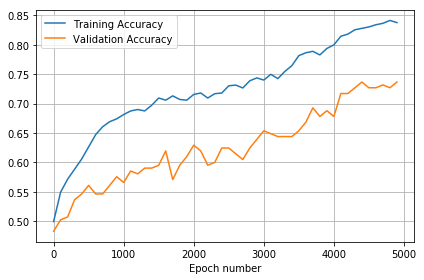


Validation Avg: [ 0.73170731]
Train Avg: [ 0.84981685]






 Overall for: 1_5000
[ 0.73170731]
[ 0.84981685]

OVERALL VAL: 0.731707306897
OVERALL TRAIN: 0.849816848725


Epochs: 5000  -------  Try: 0
Train on 819 samples, validate on 205 samples
Epoch 1/5000
819/819 [==============================] - 1s 1ms/step - loss: 0.7018 - binary_crossentropy: 0.7018 - acc: 0.5067 - val_loss: 0.6998 - val_binary_crossentropy: 0.6998 - val_acc: 0.4927
Epoch 2/5000
819/819 [==============================] - 0s 29us/step - loss: 0.7005 - binary_crossentropy: 0.7005 - acc: 0.4994 - val_loss: 0.6983 - val_binary_crossentropy: 0.6983 - val_acc: 0.5122
Epoch 3/5000
819/819 [==============================] - 0s 28us/step - loss: 0.6996 - binary_crossentropy: 0.6996 - acc: 0.4994 - val_loss: 0.6981 - val_binary_crossentropy: 0.6981 - val_acc: 0.4976
Epoch 4/5000
819/819 [==============================] - 0s 28us/step - loss: 0.6992 - binary_crossentropy: 0.6992 - acc: 0.4969 - val_loss: 0.6977 - val_bin

Epoch 41/5000
819/819 [==============================] - 0s 36us/step - loss: 0.6937 - binary_crossentropy: 0.6937 - acc: 0.5128 - val_loss: 0.6955 - val_binary_crossentropy: 0.6955 - val_acc: 0.4878
Epoch 42/5000
819/819 [==============================] - 0s 31us/step - loss: 0.6936 - binary_crossentropy: 0.6936 - acc: 0.5165 - val_loss: 0.6957 - val_binary_crossentropy: 0.6957 - val_acc: 0.4878
Epoch 43/5000
819/819 [==============================] - 0s 31us/step - loss: 0.6935 - binary_crossentropy: 0.6935 - acc: 0.5153 - val_loss: 0.6957 - val_binary_crossentropy: 0.6957 - val_acc: 0.4927
Epoch 44/5000
819/819 [==============================] - 0s 30us/step - loss: 0.6934 - binary_crossentropy: 0.6934 - acc: 0.5104 - val_loss: 0.6962 - val_binary_crossentropy: 0.6962 - val_acc: 0.4829
Epoch 45/5000
819/819 [==============================] - 0s 33us/step - loss: 0.6933 - binary_crossentropy: 0.6933 - acc: 0.5238 - val_loss: 0.6958 - val_binary_crossentropy: 0.6958 - val_acc: 0.4829


Epoch 82/5000
819/819 [==============================] - 0s 28us/step - loss: 0.6913 - binary_crossentropy: 0.6913 - acc: 0.5287 - val_loss: 0.6968 - val_binary_crossentropy: 0.6968 - val_acc: 0.4537
Epoch 83/5000
819/819 [==============================] - 0s 28us/step - loss: 0.6913 - binary_crossentropy: 0.6913 - acc: 0.5348 - val_loss: 0.6972 - val_binary_crossentropy: 0.6972 - val_acc: 0.4537
Epoch 84/5000
819/819 [==============================] - 0s 30us/step - loss: 0.6912 - binary_crossentropy: 0.6912 - acc: 0.5177 - val_loss: 0.6969 - val_binary_crossentropy: 0.6969 - val_acc: 0.4732
Epoch 85/5000
819/819 [==============================] - ETA: 0s - loss: 0.6929 - binary_crossentropy: 0.6929 - acc: 0.510 - 0s 28us/step - loss: 0.6912 - binary_crossentropy: 0.6912 - acc: 0.5385 - val_loss: 0.6968 - val_binary_crossentropy: 0.6968 - val_acc: 0.4732
Epoch 86/5000
819/819 [==============================] - 0s 28us/step - loss: 0.6912 - binary_crossentropy: 0.6912 - acc: 0.5409 - v

819/819 [==============================] - 0s 29us/step - loss: 0.6894 - binary_crossentropy: 0.6894 - acc: 0.5421 - val_loss: 0.6991 - val_binary_crossentropy: 0.6991 - val_acc: 0.4488
Epoch 123/5000
819/819 [==============================] - 0s 29us/step - loss: 0.6895 - binary_crossentropy: 0.6895 - acc: 0.5458 - val_loss: 0.6991 - val_binary_crossentropy: 0.6991 - val_acc: 0.4585
Epoch 124/5000
819/819 [==============================] - 0s 28us/step - loss: 0.6894 - binary_crossentropy: 0.6894 - acc: 0.5495 - val_loss: 0.6996 - val_binary_crossentropy: 0.6996 - val_acc: 0.4390
Epoch 125/5000
819/819 [==============================] - 0s 28us/step - loss: 0.6894 - binary_crossentropy: 0.6894 - acc: 0.5458 - val_loss: 0.6991 - val_binary_crossentropy: 0.6991 - val_acc: 0.4537
Epoch 126/5000
819/819 [==============================] - 0s 29us/step - loss: 0.6893 - binary_crossentropy: 0.6893 - acc: 0.5507 - val_loss: 0.6991 - val_binary_crossentropy: 0.6991 - val_acc: 0.4488
Epoch 127/

Epoch 163/5000
819/819 [==============================] - 0s 31us/step - loss: 0.6878 - binary_crossentropy: 0.6878 - acc: 0.5653 - val_loss: 0.6992 - val_binary_crossentropy: 0.6992 - val_acc: 0.4780
Epoch 164/5000
819/819 [==============================] - 0s 32us/step - loss: 0.6878 - binary_crossentropy: 0.6878 - acc: 0.5678 - val_loss: 0.6994 - val_binary_crossentropy: 0.6994 - val_acc: 0.4585
Epoch 165/5000
819/819 [==============================] - 0s 34us/step - loss: 0.6877 - binary_crossentropy: 0.6877 - acc: 0.5824 - val_loss: 0.6993 - val_binary_crossentropy: 0.6993 - val_acc: 0.4780
Epoch 166/5000
819/819 [==============================] - 0s 42us/step - loss: 0.6876 - binary_crossentropy: 0.6876 - acc: 0.5775 - val_loss: 0.6993 - val_binary_crossentropy: 0.6993 - val_acc: 0.4829
Epoch 167/5000
819/819 [==============================] - 0s 38us/step - loss: 0.6877 - binary_crossentropy: 0.6877 - acc: 0.5763 - val_loss: 0.6998 - val_binary_crossentropy: 0.6998 - val_acc: 0.

Epoch 204/5000
819/819 [==============================] - 0s 36us/step - loss: 0.6862 - binary_crossentropy: 0.6862 - acc: 0.5812 - val_loss: 0.7002 - val_binary_crossentropy: 0.7002 - val_acc: 0.4585
Epoch 205/5000
819/819 [==============================] - 0s 35us/step - loss: 0.6859 - binary_crossentropy: 0.6859 - acc: 0.5849 - val_loss: 0.7000 - val_binary_crossentropy: 0.7000 - val_acc: 0.4878
Epoch 206/5000
819/819 [==============================] - 0s 29us/step - loss: 0.6859 - binary_crossentropy: 0.6859 - acc: 0.5763 - val_loss: 0.7004 - val_binary_crossentropy: 0.7004 - val_acc: 0.4732
Epoch 207/5000
819/819 [==============================] - 0s 28us/step - loss: 0.6862 - binary_crossentropy: 0.6862 - acc: 0.5800 - val_loss: 0.7006 - val_binary_crossentropy: 0.7006 - val_acc: 0.4537
Epoch 208/5000
819/819 [==============================] - 0s 29us/step - loss: 0.6857 - binary_crossentropy: 0.6857 - acc: 0.5861 - val_loss: 0.7007 - val_binary_crossentropy: 0.7007 - val_acc: 0.

Epoch 245/5000
819/819 [==============================] - 0s 33us/step - loss: 0.6844 - binary_crossentropy: 0.6844 - acc: 0.5934 - val_loss: 0.7006 - val_binary_crossentropy: 0.7006 - val_acc: 0.4976
Epoch 246/5000
819/819 [==============================] - 0s 33us/step - loss: 0.6840 - binary_crossentropy: 0.6840 - acc: 0.5971 - val_loss: 0.7013 - val_binary_crossentropy: 0.7013 - val_acc: 0.4780
Epoch 247/5000
819/819 [==============================] - 0s 34us/step - loss: 0.6839 - binary_crossentropy: 0.6839 - acc: 0.5885 - val_loss: 0.7010 - val_binary_crossentropy: 0.7010 - val_acc: 0.4780
Epoch 248/5000
819/819 [==============================] - 0s 38us/step - loss: 0.6838 - binary_crossentropy: 0.6838 - acc: 0.5995 - val_loss: 0.7014 - val_binary_crossentropy: 0.7014 - val_acc: 0.4878
Epoch 249/5000
819/819 [==============================] - 0s 51us/step - loss: 0.6838 - binary_crossentropy: 0.6838 - acc: 0.5836 - val_loss: 0.7009 - val_binary_crossentropy: 0.7009 - val_acc: 0.

819/819 [==============================] - 0s 30us/step - loss: 0.6819 - binary_crossentropy: 0.6819 - acc: 0.5958 - val_loss: 0.7009 - val_binary_crossentropy: 0.7009 - val_acc: 0.4976
Epoch 286/5000
819/819 [==============================] - 0s 28us/step - loss: 0.6817 - binary_crossentropy: 0.6817 - acc: 0.5934 - val_loss: 0.7013 - val_binary_crossentropy: 0.7013 - val_acc: 0.4878
Epoch 287/5000
819/819 [==============================] - 0s 33us/step - loss: 0.6817 - binary_crossentropy: 0.6817 - acc: 0.5849 - val_loss: 0.7017 - val_binary_crossentropy: 0.7017 - val_acc: 0.4878
Epoch 288/5000
819/819 [==============================] - 0s 31us/step - loss: 0.6815 - binary_crossentropy: 0.6815 - acc: 0.5788 - val_loss: 0.7015 - val_binary_crossentropy: 0.7015 - val_acc: 0.4927
Epoch 289/5000
819/819 [==============================] - 0s 29us/step - loss: 0.6819 - binary_crossentropy: 0.6819 - acc: 0.5788 - val_loss: 0.7013 - val_binary_crossentropy: 0.7013 - val_acc: 0.4927
Epoch 290/

Epoch 326/5000
819/819 [==============================] - 0s 31us/step - loss: 0.6788 - binary_crossentropy: 0.6788 - acc: 0.5885 - val_loss: 0.7029 - val_binary_crossentropy: 0.7029 - val_acc: 0.4829
Epoch 327/5000
819/819 [==============================] - 0s 26us/step - loss: 0.6785 - binary_crossentropy: 0.6785 - acc: 0.5861 - val_loss: 0.7019 - val_binary_crossentropy: 0.7019 - val_acc: 0.5024
Epoch 328/5000
819/819 [==============================] - 0s 29us/step - loss: 0.6784 - binary_crossentropy: 0.6784 - acc: 0.5946 - val_loss: 0.7019 - val_binary_crossentropy: 0.7019 - val_acc: 0.4927
Epoch 329/5000
819/819 [==============================] - 0s 28us/step - loss: 0.6784 - binary_crossentropy: 0.6784 - acc: 0.5922 - val_loss: 0.7016 - val_binary_crossentropy: 0.7016 - val_acc: 0.5122
Epoch 330/5000
819/819 [==============================] - 0s 29us/step - loss: 0.6784 - binary_crossentropy: 0.6784 - acc: 0.5971 - val_loss: 0.7017 - val_binary_crossentropy: 0.7017 - val_acc: 0.

Epoch 367/5000
819/819 [==============================] - 0s 39us/step - loss: 0.6753 - binary_crossentropy: 0.6753 - acc: 0.6056 - val_loss: 0.7036 - val_binary_crossentropy: 0.7036 - val_acc: 0.4878
Epoch 368/5000
819/819 [==============================] - 0s 33us/step - loss: 0.6753 - binary_crossentropy: 0.6753 - acc: 0.6081 - val_loss: 0.7037 - val_binary_crossentropy: 0.7037 - val_acc: 0.4829
Epoch 369/5000
819/819 [==============================] - 0s 34us/step - loss: 0.6754 - binary_crossentropy: 0.6754 - acc: 0.6020 - val_loss: 0.7028 - val_binary_crossentropy: 0.7028 - val_acc: 0.4927
Epoch 370/5000
819/819 [==============================] - 0s 52us/step - loss: 0.6749 - binary_crossentropy: 0.6749 - acc: 0.6081 - val_loss: 0.7032 - val_binary_crossentropy: 0.7032 - val_acc: 0.4732
Epoch 371/5000
819/819 [==============================] - 0s 94us/step - loss: 0.6749 - binary_crossentropy: 0.6749 - acc: 0.6105 - val_loss: 0.7037 - val_binary_crossentropy: 0.7037 - val_acc: 0.

819/819 [==============================] - 0s 43us/step - loss: 0.6723 - binary_crossentropy: 0.6723 - acc: 0.6093 - val_loss: 0.7036 - val_binary_crossentropy: 0.7036 - val_acc: 0.4683
Epoch 408/5000
819/819 [==============================] - 0s 36us/step - loss: 0.6722 - binary_crossentropy: 0.6722 - acc: 0.6142 - val_loss: 0.7034 - val_binary_crossentropy: 0.7034 - val_acc: 0.4780
Epoch 409/5000
819/819 [==============================] - 0s 32us/step - loss: 0.6717 - binary_crossentropy: 0.6717 - acc: 0.6166 - val_loss: 0.7041 - val_binary_crossentropy: 0.7041 - val_acc: 0.4976
Epoch 410/5000
819/819 [==============================] - 0s 48us/step - loss: 0.6718 - binary_crossentropy: 0.6718 - acc: 0.6105 - val_loss: 0.7035 - val_binary_crossentropy: 0.7035 - val_acc: 0.4878
Epoch 411/5000
819/819 [==============================] - 0s 40us/step - loss: 0.6715 - binary_crossentropy: 0.6715 - acc: 0.6154 - val_loss: 0.7038 - val_binary_crossentropy: 0.7038 - val_acc: 0.5024
Epoch 412/

Epoch 448/5000
819/819 [==============================] - 0s 36us/step - loss: 0.6687 - binary_crossentropy: 0.6687 - acc: 0.6178 - val_loss: 0.7056 - val_binary_crossentropy: 0.7056 - val_acc: 0.5024
Epoch 449/5000
819/819 [==============================] - 0s 28us/step - loss: 0.6689 - binary_crossentropy: 0.6689 - acc: 0.6105 - val_loss: 0.7037 - val_binary_crossentropy: 0.7037 - val_acc: 0.4878
Epoch 450/5000
819/819 [==============================] - 0s 29us/step - loss: 0.6687 - binary_crossentropy: 0.6687 - acc: 0.6178 - val_loss: 0.7042 - val_binary_crossentropy: 0.7042 - val_acc: 0.4927
Epoch 451/5000
819/819 [==============================] - 0s 29us/step - loss: 0.6687 - binary_crossentropy: 0.6687 - acc: 0.6117 - val_loss: 0.7051 - val_binary_crossentropy: 0.7051 - val_acc: 0.4976
Epoch 452/5000
819/819 [==============================] - 0s 27us/step - loss: 0.6688 - binary_crossentropy: 0.6688 - acc: 0.6142 - val_loss: 0.7044 - val_binary_crossentropy: 0.7044 - val_acc: 0.

819/819 [==============================] - 0s 32us/step - loss: 0.6664 - binary_crossentropy: 0.6664 - acc: 0.6227 - val_loss: 0.7038 - val_binary_crossentropy: 0.7038 - val_acc: 0.4878
Epoch 489/5000
819/819 [==============================] - 0s 32us/step - loss: 0.6658 - binary_crossentropy: 0.6658 - acc: 0.6117 - val_loss: 0.7042 - val_binary_crossentropy: 0.7042 - val_acc: 0.4927
Epoch 490/5000
819/819 [==============================] - 0s 34us/step - loss: 0.6661 - binary_crossentropy: 0.6661 - acc: 0.6190 - val_loss: 0.7040 - val_binary_crossentropy: 0.7040 - val_acc: 0.5024
Epoch 491/5000
819/819 [==============================] - 0s 35us/step - loss: 0.6661 - binary_crossentropy: 0.6661 - acc: 0.6166 - val_loss: 0.7037 - val_binary_crossentropy: 0.7037 - val_acc: 0.4829
Epoch 492/5000
819/819 [==============================] - 0s 53us/step - loss: 0.6659 - binary_crossentropy: 0.6659 - acc: 0.6215 - val_loss: 0.7041 - val_binary_crossentropy: 0.7041 - val_acc: 0.4976
Epoch 493/

Epoch 529/5000
819/819 [==============================] - 0s 29us/step - loss: 0.6636 - binary_crossentropy: 0.6636 - acc: 0.6227 - val_loss: 0.7060 - val_binary_crossentropy: 0.7060 - val_acc: 0.5024
Epoch 530/5000
819/819 [==============================] - 0s 29us/step - loss: 0.6637 - binary_crossentropy: 0.6637 - acc: 0.6154 - val_loss: 0.7050 - val_binary_crossentropy: 0.7050 - val_acc: 0.4927
Epoch 531/5000
819/819 [==============================] - 0s 29us/step - loss: 0.6635 - binary_crossentropy: 0.6635 - acc: 0.6093 - val_loss: 0.7044 - val_binary_crossentropy: 0.7044 - val_acc: 0.4829
Epoch 532/5000
819/819 [==============================] - 0s 27us/step - loss: 0.6633 - binary_crossentropy: 0.6633 - acc: 0.6203 - val_loss: 0.7045 - val_binary_crossentropy: 0.7045 - val_acc: 0.4976
Epoch 533/5000
819/819 [==============================] - 0s 29us/step - loss: 0.6633 - binary_crossentropy: 0.6633 - acc: 0.6227 - val_loss: 0.7043 - val_binary_crossentropy: 0.7043 - val_acc: 0.

819/819 [==============================] - 0s 30us/step - loss: 0.6613 - binary_crossentropy: 0.6613 - acc: 0.6190 - val_loss: 0.7047 - val_binary_crossentropy: 0.7047 - val_acc: 0.4927
Epoch 570/5000
819/819 [==============================] - ETA: 0s - loss: 0.6532 - binary_crossentropy: 0.6532 - acc: 0.640 - 0s 29us/step - loss: 0.6618 - binary_crossentropy: 0.6618 - acc: 0.6178 - val_loss: 0.7045 - val_binary_crossentropy: 0.7045 - val_acc: 0.5024
Epoch 571/5000
819/819 [==============================] - 0s 39us/step - loss: 0.6611 - binary_crossentropy: 0.6611 - acc: 0.6203 - val_loss: 0.7040 - val_binary_crossentropy: 0.7040 - val_acc: 0.4829
Epoch 572/5000
819/819 [==============================] - 0s 30us/step - loss: 0.6612 - binary_crossentropy: 0.6612 - acc: 0.6117 - val_loss: 0.7044 - val_binary_crossentropy: 0.7044 - val_acc: 0.4683
Epoch 573/5000
819/819 [==============================] - 0s 26us/step - loss: 0.6612 - binary_crossentropy: 0.6612 - acc: 0.6227 - val_loss: 0

819/819 [==============================] - 0s 43us/step - loss: 0.6587 - binary_crossentropy: 0.6587 - acc: 0.6203 - val_loss: 0.7028 - val_binary_crossentropy: 0.7028 - val_acc: 0.4829
Epoch 610/5000
819/819 [==============================] - 0s 28us/step - loss: 0.6588 - binary_crossentropy: 0.6588 - acc: 0.6288 - val_loss: 0.7031 - val_binary_crossentropy: 0.7031 - val_acc: 0.4927
Epoch 611/5000
819/819 [==============================] - 0s 28us/step - loss: 0.6586 - binary_crossentropy: 0.6586 - acc: 0.6215 - val_loss: 0.7048 - val_binary_crossentropy: 0.7048 - val_acc: 0.5024
Epoch 612/5000
819/819 [==============================] - 0s 31us/step - loss: 0.6586 - binary_crossentropy: 0.6586 - acc: 0.6154 - val_loss: 0.7038 - val_binary_crossentropy: 0.7038 - val_acc: 0.4878
Epoch 613/5000
819/819 [==============================] - 0s 28us/step - loss: 0.6584 - binary_crossentropy: 0.6584 - acc: 0.6239 - val_loss: 0.7036 - val_binary_crossentropy: 0.7036 - val_acc: 0.4976
Epoch 614/

819/819 [==============================] - 0s 29us/step - loss: 0.6560 - binary_crossentropy: 0.6560 - acc: 0.6276 - val_loss: 0.7032 - val_binary_crossentropy: 0.7032 - val_acc: 0.4878
Epoch 650/5000
819/819 [==============================] - 0s 29us/step - loss: 0.6563 - binary_crossentropy: 0.6563 - acc: 0.6166 - val_loss: 0.7039 - val_binary_crossentropy: 0.7039 - val_acc: 0.4829
Epoch 651/5000
819/819 [==============================] - 0s 30us/step - loss: 0.6561 - binary_crossentropy: 0.6561 - acc: 0.6239 - val_loss: 0.7052 - val_binary_crossentropy: 0.7052 - val_acc: 0.4927
Epoch 652/5000
819/819 [==============================] - 0s 28us/step - loss: 0.6561 - binary_crossentropy: 0.6561 - acc: 0.6178 - val_loss: 0.7029 - val_binary_crossentropy: 0.7029 - val_acc: 0.4878
Epoch 653/5000
819/819 [==============================] - 0s 31us/step - loss: 0.6558 - binary_crossentropy: 0.6558 - acc: 0.6349 - val_loss: 0.7031 - val_binary_crossentropy: 0.7031 - val_acc: 0.4878
Epoch 654/

Epoch 690/5000
819/819 [==============================] - 0s 37us/step - loss: 0.6538 - binary_crossentropy: 0.6538 - acc: 0.6325 - val_loss: 0.7016 - val_binary_crossentropy: 0.7016 - val_acc: 0.4829
Epoch 691/5000
819/819 [==============================] - 0s 55us/step - loss: 0.6540 - binary_crossentropy: 0.6540 - acc: 0.6300 - val_loss: 0.7006 - val_binary_crossentropy: 0.7006 - val_acc: 0.4976
Epoch 692/5000
819/819 [==============================] - 0s 53us/step - loss: 0.6535 - binary_crossentropy: 0.6535 - acc: 0.6300 - val_loss: 0.7011 - val_binary_crossentropy: 0.7011 - val_acc: 0.4878
Epoch 693/5000
819/819 [==============================] - 0s 41us/step - loss: 0.6535 - binary_crossentropy: 0.6535 - acc: 0.6300 - val_loss: 0.7032 - val_binary_crossentropy: 0.7032 - val_acc: 0.4927
Epoch 694/5000
819/819 [==============================] - 0s 37us/step - loss: 0.6539 - binary_crossentropy: 0.6539 - acc: 0.6203 - val_loss: 0.7007 - val_binary_crossentropy: 0.7007 - val_acc: 0.

Epoch 731/5000
819/819 [==============================] - 0s 36us/step - loss: 0.6516 - binary_crossentropy: 0.6516 - acc: 0.6215 - val_loss: 0.7027 - val_binary_crossentropy: 0.7027 - val_acc: 0.5024
Epoch 732/5000
819/819 [==============================] - 0s 37us/step - loss: 0.6517 - binary_crossentropy: 0.6517 - acc: 0.6288 - val_loss: 0.7010 - val_binary_crossentropy: 0.7010 - val_acc: 0.5024
Epoch 733/5000
819/819 [==============================] - 0s 31us/step - loss: 0.6513 - binary_crossentropy: 0.6513 - acc: 0.6398 - val_loss: 0.7022 - val_binary_crossentropy: 0.7022 - val_acc: 0.4927
Epoch 734/5000
819/819 [==============================] - 0s 30us/step - loss: 0.6513 - binary_crossentropy: 0.6513 - acc: 0.6313 - val_loss: 0.7024 - val_binary_crossentropy: 0.7024 - val_acc: 0.4927
Epoch 735/5000
819/819 [==============================] - 0s 29us/step - loss: 0.6510 - binary_crossentropy: 0.6510 - acc: 0.6239 - val_loss: 0.7009 - val_binary_crossentropy: 0.7009 - val_acc: 0.

Epoch 772/5000
819/819 [==============================] - 0s 31us/step - loss: 0.6493 - binary_crossentropy: 0.6493 - acc: 0.6325 - val_loss: 0.7001 - val_binary_crossentropy: 0.7001 - val_acc: 0.4976
Epoch 773/5000
819/819 [==============================] - 0s 28us/step - loss: 0.6492 - binary_crossentropy: 0.6492 - acc: 0.6435 - val_loss: 0.7004 - val_binary_crossentropy: 0.7004 - val_acc: 0.4829
Epoch 774/5000
819/819 [==============================] - 0s 30us/step - loss: 0.6488 - binary_crossentropy: 0.6488 - acc: 0.6349 - val_loss: 0.7015 - val_binary_crossentropy: 0.7015 - val_acc: 0.4927
Epoch 775/5000
819/819 [==============================] - 0s 28us/step - loss: 0.6488 - binary_crossentropy: 0.6488 - acc: 0.6398 - val_loss: 0.6996 - val_binary_crossentropy: 0.6996 - val_acc: 0.4927
Epoch 776/5000
819/819 [==============================] - 0s 28us/step - loss: 0.6492 - binary_crossentropy: 0.6492 - acc: 0.6410 - val_loss: 0.7015 - val_binary_crossentropy: 0.7015 - val_acc: 0.

Epoch 813/5000
819/819 [==============================] - 0s 34us/step - loss: 0.6466 - binary_crossentropy: 0.6466 - acc: 0.6447 - val_loss: 0.6984 - val_binary_crossentropy: 0.6984 - val_acc: 0.4878
Epoch 814/5000
819/819 [==============================] - 0s 31us/step - loss: 0.6471 - binary_crossentropy: 0.6471 - acc: 0.6459 - val_loss: 0.6989 - val_binary_crossentropy: 0.6989 - val_acc: 0.4927
Epoch 815/5000
819/819 [==============================] - 0s 29us/step - loss: 0.6464 - binary_crossentropy: 0.6464 - acc: 0.6435 - val_loss: 0.6990 - val_binary_crossentropy: 0.6990 - val_acc: 0.4878
Epoch 816/5000
819/819 [==============================] - 0s 29us/step - loss: 0.6463 - binary_crossentropy: 0.6463 - acc: 0.6410 - val_loss: 0.6990 - val_binary_crossentropy: 0.6990 - val_acc: 0.4927
Epoch 817/5000
819/819 [==============================] - 0s 29us/step - loss: 0.6462 - binary_crossentropy: 0.6462 - acc: 0.6435 - val_loss: 0.6992 - val_binary_crossentropy: 0.6992 - val_acc: 0.

Epoch 854/5000
819/819 [==============================] - 0s 28us/step - loss: 0.6446 - binary_crossentropy: 0.6446 - acc: 0.6606 - val_loss: 0.6984 - val_binary_crossentropy: 0.6984 - val_acc: 0.4976
Epoch 855/5000
819/819 [==============================] - ETA: 0s - loss: 0.6501 - binary_crossentropy: 0.6501 - acc: 0.640 - 0s 30us/step - loss: 0.6439 - binary_crossentropy: 0.6439 - acc: 0.6484 - val_loss: 0.6973 - val_binary_crossentropy: 0.6973 - val_acc: 0.5024
Epoch 856/5000
819/819 [==============================] - 0s 28us/step - loss: 0.6440 - binary_crossentropy: 0.6440 - acc: 0.6435 - val_loss: 0.6989 - val_binary_crossentropy: 0.6989 - val_acc: 0.4976
Epoch 857/5000
819/819 [==============================] - 0s 31us/step - loss: 0.6448 - binary_crossentropy: 0.6448 - acc: 0.6422 - val_loss: 0.6987 - val_binary_crossentropy: 0.6987 - val_acc: 0.4878
Epoch 858/5000
819/819 [==============================] - 0s 27us/step - loss: 0.6438 - binary_crossentropy: 0.6438 - acc: 0.653

819/819 [==============================] - 0s 46us/step - loss: 0.6419 - binary_crossentropy: 0.6419 - acc: 0.6471 - val_loss: 0.6969 - val_binary_crossentropy: 0.6969 - val_acc: 0.4829
Epoch 895/5000
819/819 [==============================] - 0s 35us/step - loss: 0.6420 - binary_crossentropy: 0.6420 - acc: 0.6508 - val_loss: 0.6981 - val_binary_crossentropy: 0.6981 - val_acc: 0.4927
Epoch 896/5000
819/819 [==============================] - 0s 60us/step - loss: 0.6421 - binary_crossentropy: 0.6421 - acc: 0.6557 - val_loss: 0.6962 - val_binary_crossentropy: 0.6962 - val_acc: 0.4927
Epoch 897/5000
819/819 [==============================] - 0s 51us/step - loss: 0.6421 - binary_crossentropy: 0.6421 - acc: 0.6447 - val_loss: 0.6987 - val_binary_crossentropy: 0.6987 - val_acc: 0.4829
Epoch 898/5000
819/819 [==============================] - 0s 61us/step - loss: 0.6434 - binary_crossentropy: 0.6434 - acc: 0.6447 - val_loss: 0.6973 - val_binary_crossentropy: 0.6973 - val_acc: 0.4829
Epoch 899/

Epoch 935/5000
819/819 [==============================] - 0s 31us/step - loss: 0.6391 - binary_crossentropy: 0.6391 - acc: 0.6520 - val_loss: 0.6968 - val_binary_crossentropy: 0.6968 - val_acc: 0.4780
Epoch 936/5000
819/819 [==============================] - 0s 29us/step - loss: 0.6393 - binary_crossentropy: 0.6393 - acc: 0.6508 - val_loss: 0.6956 - val_binary_crossentropy: 0.6956 - val_acc: 0.4927
Epoch 937/5000
819/819 [==============================] - 0s 45us/step - loss: 0.6391 - binary_crossentropy: 0.6391 - acc: 0.6545 - val_loss: 0.6950 - val_binary_crossentropy: 0.6950 - val_acc: 0.4976
Epoch 938/5000
819/819 [==============================] - 0s 57us/step - loss: 0.6393 - binary_crossentropy: 0.6393 - acc: 0.6496 - val_loss: 0.6946 - val_binary_crossentropy: 0.6946 - val_acc: 0.4976
Epoch 939/5000
819/819 [==============================] - 0s 81us/step - loss: 0.6391 - binary_crossentropy: 0.6391 - acc: 0.6459 - val_loss: 0.6988 - val_binary_crossentropy: 0.6988 - val_acc: 0.

Epoch 976/5000
819/819 [==============================] - 0s 29us/step - loss: 0.6372 - binary_crossentropy: 0.6372 - acc: 0.6496 - val_loss: 0.6927 - val_binary_crossentropy: 0.6927 - val_acc: 0.4927
Epoch 977/5000
819/819 [==============================] - 0s 27us/step - loss: 0.6372 - binary_crossentropy: 0.6372 - acc: 0.6508 - val_loss: 0.6952 - val_binary_crossentropy: 0.6952 - val_acc: 0.4878
Epoch 978/5000
819/819 [==============================] - 0s 34us/step - loss: 0.6367 - binary_crossentropy: 0.6367 - acc: 0.6471 - val_loss: 0.6922 - val_binary_crossentropy: 0.6922 - val_acc: 0.4927
Epoch 979/5000
819/819 [==============================] - 0s 36us/step - loss: 0.6373 - binary_crossentropy: 0.6373 - acc: 0.6581 - val_loss: 0.6928 - val_binary_crossentropy: 0.6928 - val_acc: 0.5024
Epoch 980/5000
819/819 [==============================] - 0s 41us/step - loss: 0.6368 - binary_crossentropy: 0.6368 - acc: 0.6581 - val_loss: 0.6936 - val_binary_crossentropy: 0.6936 - val_acc: 0.

Epoch 1017/5000
819/819 [==============================] - 0s 28us/step - loss: 0.6347 - binary_crossentropy: 0.6347 - acc: 0.6508 - val_loss: 0.6916 - val_binary_crossentropy: 0.6916 - val_acc: 0.4976
Epoch 1018/5000
819/819 [==============================] - 0s 28us/step - loss: 0.6347 - binary_crossentropy: 0.6347 - acc: 0.6496 - val_loss: 0.6930 - val_binary_crossentropy: 0.6930 - val_acc: 0.4976
Epoch 1019/5000
819/819 [==============================] - 0s 26us/step - loss: 0.6346 - binary_crossentropy: 0.6346 - acc: 0.6496 - val_loss: 0.6910 - val_binary_crossentropy: 0.6910 - val_acc: 0.4878
Epoch 1020/5000
819/819 [==============================] - 0s 27us/step - loss: 0.6345 - binary_crossentropy: 0.6345 - acc: 0.6484 - val_loss: 0.6913 - val_binary_crossentropy: 0.6913 - val_acc: 0.4927
Epoch 1021/5000
819/819 [==============================] - 0s 28us/step - loss: 0.6344 - binary_crossentropy: 0.6344 - acc: 0.6545 - val_loss: 0.6914 - val_binary_crossentropy: 0.6914 - val_ac

819/819 [==============================] - 0s 34us/step - loss: 0.6325 - binary_crossentropy: 0.6325 - acc: 0.6496 - val_loss: 0.6906 - val_binary_crossentropy: 0.6906 - val_acc: 0.5122
Epoch 1058/5000
819/819 [==============================] - 0s 30us/step - loss: 0.6321 - binary_crossentropy: 0.6321 - acc: 0.6496 - val_loss: 0.6892 - val_binary_crossentropy: 0.6892 - val_acc: 0.5122
Epoch 1059/5000
819/819 [==============================] - 0s 36us/step - loss: 0.6316 - binary_crossentropy: 0.6316 - acc: 0.6569 - val_loss: 0.6898 - val_binary_crossentropy: 0.6898 - val_acc: 0.5073
Epoch 1060/5000
819/819 [==============================] - 0s 34us/step - loss: 0.6321 - binary_crossentropy: 0.6321 - acc: 0.6557 - val_loss: 0.6902 - val_binary_crossentropy: 0.6902 - val_acc: 0.5073
Epoch 1061/5000
819/819 [==============================] - 0s 31us/step - loss: 0.6323 - binary_crossentropy: 0.6323 - acc: 0.6520 - val_loss: 0.6911 - val_binary_crossentropy: 0.6911 - val_acc: 0.5073
Epoch 

Epoch 1098/5000
819/819 [==============================] - 0s 29us/step - loss: 0.6296 - binary_crossentropy: 0.6296 - acc: 0.6606 - val_loss: 0.6874 - val_binary_crossentropy: 0.6874 - val_acc: 0.5122
Epoch 1099/5000
819/819 [==============================] - ETA: 0s - loss: 0.6223 - binary_crossentropy: 0.6223 - acc: 0.670 - 0s 29us/step - loss: 0.6289 - binary_crossentropy: 0.6289 - acc: 0.6520 - val_loss: 0.6881 - val_binary_crossentropy: 0.6881 - val_acc: 0.4927
Epoch 1100/5000
819/819 [==============================] - 0s 27us/step - loss: 0.6302 - binary_crossentropy: 0.6302 - acc: 0.6667 - val_loss: 0.6869 - val_binary_crossentropy: 0.6869 - val_acc: 0.5024
Epoch 1101/5000
819/819 [==============================] - 0s 29us/step - loss: 0.6291 - binary_crossentropy: 0.6291 - acc: 0.6630 - val_loss: 0.6897 - val_binary_crossentropy: 0.6897 - val_acc: 0.5268
Epoch 1102/5000
819/819 [==============================] - 0s 28us/step - loss: 0.6299 - binary_crossentropy: 0.6299 - acc: 

Epoch 1138/5000
819/819 [==============================] - 0s 35us/step - loss: 0.6269 - binary_crossentropy: 0.6269 - acc: 0.6532 - val_loss: 0.6872 - val_binary_crossentropy: 0.6872 - val_acc: 0.4927
Epoch 1139/5000
819/819 [==============================] - 0s 30us/step - loss: 0.6271 - binary_crossentropy: 0.6271 - acc: 0.6557 - val_loss: 0.6862 - val_binary_crossentropy: 0.6862 - val_acc: 0.5073
Epoch 1140/5000
819/819 [==============================] - 0s 26us/step - loss: 0.6265 - binary_crossentropy: 0.6265 - acc: 0.6569 - val_loss: 0.6859 - val_binary_crossentropy: 0.6859 - val_acc: 0.5073
Epoch 1141/5000
819/819 [==============================] - 0s 31us/step - loss: 0.6265 - binary_crossentropy: 0.6265 - acc: 0.6557 - val_loss: 0.6854 - val_binary_crossentropy: 0.6854 - val_acc: 0.5073
Epoch 1142/5000
819/819 [==============================] - 0s 29us/step - loss: 0.6269 - binary_crossentropy: 0.6269 - acc: 0.6581 - val_loss: 0.6855 - val_binary_crossentropy: 0.6855 - val_ac

819/819 [==============================] - 0s 31us/step - loss: 0.6245 - binary_crossentropy: 0.6245 - acc: 0.6593 - val_loss: 0.6860 - val_binary_crossentropy: 0.6860 - val_acc: 0.5024
Epoch 1179/5000
819/819 [==============================] - 0s 29us/step - loss: 0.6237 - binary_crossentropy: 0.6237 - acc: 0.6667 - val_loss: 0.6846 - val_binary_crossentropy: 0.6846 - val_acc: 0.5024
Epoch 1180/5000
819/819 [==============================] - 0s 27us/step - loss: 0.6239 - binary_crossentropy: 0.6239 - acc: 0.6630 - val_loss: 0.6855 - val_binary_crossentropy: 0.6855 - val_acc: 0.5073
Epoch 1181/5000
819/819 [==============================] - 0s 28us/step - loss: 0.6242 - binary_crossentropy: 0.6242 - acc: 0.6667 - val_loss: 0.6843 - val_binary_crossentropy: 0.6843 - val_acc: 0.5073
Epoch 1182/5000
819/819 [==============================] - 0s 31us/step - loss: 0.6237 - binary_crossentropy: 0.6237 - acc: 0.6618 - val_loss: 0.6863 - val_binary_crossentropy: 0.6863 - val_acc: 0.5122
Epoch 

Epoch 1219/5000
819/819 [==============================] - 0s 29us/step - loss: 0.6217 - binary_crossentropy: 0.6217 - acc: 0.6618 - val_loss: 0.6843 - val_binary_crossentropy: 0.6843 - val_acc: 0.4878
Epoch 1220/5000
819/819 [==============================] - 0s 28us/step - loss: 0.6224 - binary_crossentropy: 0.6224 - acc: 0.6752 - val_loss: 0.6844 - val_binary_crossentropy: 0.6844 - val_acc: 0.4976
Epoch 1221/5000
819/819 [==============================] - 0s 29us/step - loss: 0.6212 - binary_crossentropy: 0.6212 - acc: 0.6654 - val_loss: 0.6839 - val_binary_crossentropy: 0.6839 - val_acc: 0.4976
Epoch 1222/5000
819/819 [==============================] - 0s 37us/step - loss: 0.6219 - binary_crossentropy: 0.6219 - acc: 0.6679 - val_loss: 0.6840 - val_binary_crossentropy: 0.6840 - val_acc: 0.5073
Epoch 1223/5000
819/819 [==============================] - 0s 60us/step - loss: 0.6214 - binary_crossentropy: 0.6214 - acc: 0.6716 - val_loss: 0.6830 - val_binary_crossentropy: 0.6830 - val_ac

819/819 [==============================] - 0s 29us/step - loss: 0.6193 - binary_crossentropy: 0.6193 - acc: 0.6691 - val_loss: 0.6848 - val_binary_crossentropy: 0.6848 - val_acc: 0.4976
Epoch 1260/5000
819/819 [==============================] - 0s 30us/step - loss: 0.6189 - binary_crossentropy: 0.6189 - acc: 0.6728 - val_loss: 0.6837 - val_binary_crossentropy: 0.6837 - val_acc: 0.5122
Epoch 1261/5000
819/819 [==============================] - 0s 28us/step - loss: 0.6193 - binary_crossentropy: 0.6193 - acc: 0.6740 - val_loss: 0.6823 - val_binary_crossentropy: 0.6823 - val_acc: 0.5024
Epoch 1262/5000
819/819 [==============================] - 0s 28us/step - loss: 0.6187 - binary_crossentropy: 0.6187 - acc: 0.6691 - val_loss: 0.6823 - val_binary_crossentropy: 0.6823 - val_acc: 0.4976
Epoch 1263/5000
819/819 [==============================] - 0s 29us/step - loss: 0.6190 - binary_crossentropy: 0.6190 - acc: 0.6679 - val_loss: 0.6836 - val_binary_crossentropy: 0.6836 - val_acc: 0.4976
Epoch 

Epoch 1300/5000
819/819 [==============================] - 0s 40us/step - loss: 0.6169 - binary_crossentropy: 0.6169 - acc: 0.6838 - val_loss: 0.6796 - val_binary_crossentropy: 0.6796 - val_acc: 0.5171
Epoch 1301/5000
819/819 [==============================] - 0s 37us/step - loss: 0.6163 - binary_crossentropy: 0.6163 - acc: 0.6801 - val_loss: 0.6799 - val_binary_crossentropy: 0.6799 - val_acc: 0.5171
Epoch 1302/5000
819/819 [==============================] - 0s 28us/step - loss: 0.6168 - binary_crossentropy: 0.6168 - acc: 0.6728 - val_loss: 0.6808 - val_binary_crossentropy: 0.6808 - val_acc: 0.5268
Epoch 1303/5000
819/819 [==============================] - 0s 30us/step - loss: 0.6170 - binary_crossentropy: 0.6170 - acc: 0.6752 - val_loss: 0.6788 - val_binary_crossentropy: 0.6788 - val_acc: 0.5122
Epoch 1304/5000
819/819 [==============================] - 0s 26us/step - loss: 0.6162 - binary_crossentropy: 0.6162 - acc: 0.6752 - val_loss: 0.6803 - val_binary_crossentropy: 0.6803 - val_ac

819/819 [==============================] - 0s 29us/step - loss: 0.6139 - binary_crossentropy: 0.6139 - acc: 0.6862 - val_loss: 0.6776 - val_binary_crossentropy: 0.6776 - val_acc: 0.5122
Epoch 1341/5000
819/819 [==============================] - 0s 30us/step - loss: 0.6142 - binary_crossentropy: 0.6142 - acc: 0.6838 - val_loss: 0.6789 - val_binary_crossentropy: 0.6789 - val_acc: 0.5122
Epoch 1342/5000
819/819 [==============================] - 0s 28us/step - loss: 0.6145 - binary_crossentropy: 0.6145 - acc: 0.6947 - val_loss: 0.6772 - val_binary_crossentropy: 0.6772 - val_acc: 0.5073
Epoch 1343/5000
819/819 [==============================] - 0s 27us/step - loss: 0.6145 - binary_crossentropy: 0.6145 - acc: 0.6850 - val_loss: 0.6767 - val_binary_crossentropy: 0.6767 - val_acc: 0.5073
Epoch 1344/5000
819/819 [==============================] - 0s 29us/step - loss: 0.6144 - binary_crossentropy: 0.6144 - acc: 0.6862 - val_loss: 0.6796 - val_binary_crossentropy: 0.6796 - val_acc: 0.5171
Epoch 

Epoch 1381/5000
819/819 [==============================] - 0s 29us/step - loss: 0.6118 - binary_crossentropy: 0.6118 - acc: 0.6972 - val_loss: 0.6781 - val_binary_crossentropy: 0.6781 - val_acc: 0.4976
Epoch 1382/5000
819/819 [==============================] - 0s 29us/step - loss: 0.6120 - binary_crossentropy: 0.6120 - acc: 0.6911 - val_loss: 0.6776 - val_binary_crossentropy: 0.6776 - val_acc: 0.5024
Epoch 1383/5000
819/819 [==============================] - 0s 29us/step - loss: 0.6114 - binary_crossentropy: 0.6114 - acc: 0.6899 - val_loss: 0.6786 - val_binary_crossentropy: 0.6786 - val_acc: 0.5024
Epoch 1384/5000
819/819 [==============================] - 0s 31us/step - loss: 0.6117 - binary_crossentropy: 0.6117 - acc: 0.6935 - val_loss: 0.6803 - val_binary_crossentropy: 0.6803 - val_acc: 0.4976
Epoch 1385/5000
819/819 [==============================] - 0s 28us/step - loss: 0.6110 - binary_crossentropy: 0.6110 - acc: 0.6960 - val_loss: 0.6773 - val_binary_crossentropy: 0.6773 - val_ac

819/819 [==============================] - 0s 27us/step - loss: 0.6094 - binary_crossentropy: 0.6094 - acc: 0.6935 - val_loss: 0.6781 - val_binary_crossentropy: 0.6781 - val_acc: 0.5220
Epoch 1422/5000
819/819 [==============================] - 0s 31us/step - loss: 0.6094 - binary_crossentropy: 0.6094 - acc: 0.6923 - val_loss: 0.6775 - val_binary_crossentropy: 0.6775 - val_acc: 0.5171
Epoch 1423/5000
819/819 [==============================] - 0s 29us/step - loss: 0.6094 - binary_crossentropy: 0.6094 - acc: 0.6886 - val_loss: 0.6772 - val_binary_crossentropy: 0.6772 - val_acc: 0.5220
Epoch 1424/5000
819/819 [==============================] - 0s 29us/step - loss: 0.6086 - binary_crossentropy: 0.6086 - acc: 0.6874 - val_loss: 0.6790 - val_binary_crossentropy: 0.6790 - val_acc: 0.5366
Epoch 1425/5000
819/819 [==============================] - 0s 30us/step - loss: 0.6092 - binary_crossentropy: 0.6092 - acc: 0.6935 - val_loss: 0.6760 - val_binary_crossentropy: 0.6760 - val_acc: 0.5171
Epoch 

Epoch 1462/5000
819/819 [==============================] - 0s 65us/step - loss: 0.6068 - binary_crossentropy: 0.6068 - acc: 0.6947 - val_loss: 0.6770 - val_binary_crossentropy: 0.6770 - val_acc: 0.5024
Epoch 1463/5000
819/819 [==============================] - 0s 69us/step - loss: 0.6065 - binary_crossentropy: 0.6065 - acc: 0.7009 - val_loss: 0.6755 - val_binary_crossentropy: 0.6755 - val_acc: 0.5317
Epoch 1464/5000
819/819 [==============================] - 0s 37us/step - loss: 0.6065 - binary_crossentropy: 0.6065 - acc: 0.6947 - val_loss: 0.6774 - val_binary_crossentropy: 0.6774 - val_acc: 0.5317
Epoch 1465/5000
819/819 [==============================] - 0s 31us/step - loss: 0.6067 - binary_crossentropy: 0.6067 - acc: 0.6972 - val_loss: 0.6751 - val_binary_crossentropy: 0.6751 - val_acc: 0.5268
Epoch 1466/5000
819/819 [==============================] - 0s 28us/step - loss: 0.6068 - binary_crossentropy: 0.6068 - acc: 0.7009 - val_loss: 0.6758 - val_binary_crossentropy: 0.6758 - val_ac

819/819 [==============================] - 0s 29us/step - loss: 0.6036 - binary_crossentropy: 0.6036 - acc: 0.6984 - val_loss: 0.6749 - val_binary_crossentropy: 0.6749 - val_acc: 0.5220
Epoch 1503/5000
819/819 [==============================] - 0s 37us/step - loss: 0.6039 - binary_crossentropy: 0.6039 - acc: 0.7070 - val_loss: 0.6729 - val_binary_crossentropy: 0.6729 - val_acc: 0.5171
Epoch 1504/5000
819/819 [==============================] - 0s 36us/step - loss: 0.6045 - binary_crossentropy: 0.6045 - acc: 0.7021 - val_loss: 0.6732 - val_binary_crossentropy: 0.6732 - val_acc: 0.5122
Epoch 1505/5000
819/819 [==============================] - 0s 36us/step - loss: 0.6037 - binary_crossentropy: 0.6037 - acc: 0.6972 - val_loss: 0.6775 - val_binary_crossentropy: 0.6775 - val_acc: 0.5268
Epoch 1506/5000
819/819 [==============================] - 0s 43us/step - loss: 0.6040 - binary_crossentropy: 0.6040 - acc: 0.7106 - val_loss: 0.6729 - val_binary_crossentropy: 0.6729 - val_acc: 0.5122
Epoch 

Epoch 1543/5000
819/819 [==============================] - 0s 38us/step - loss: 0.6006 - binary_crossentropy: 0.6006 - acc: 0.6960 - val_loss: 0.6748 - val_binary_crossentropy: 0.6748 - val_acc: 0.5268
Epoch 1544/5000
819/819 [==============================] - 0s 36us/step - loss: 0.6011 - binary_crossentropy: 0.6011 - acc: 0.7106 - val_loss: 0.6790 - val_binary_crossentropy: 0.6790 - val_acc: 0.5415
Epoch 1545/5000
819/819 [==============================] - 0s 28us/step - loss: 0.6023 - binary_crossentropy: 0.6023 - acc: 0.6996 - val_loss: 0.6712 - val_binary_crossentropy: 0.6712 - val_acc: 0.5171
Epoch 1546/5000
819/819 [==============================] - 0s 29us/step - loss: 0.6008 - binary_crossentropy: 0.6008 - acc: 0.7057 - val_loss: 0.6713 - val_binary_crossentropy: 0.6713 - val_acc: 0.5268
Epoch 1547/5000
819/819 [==============================] - 0s 29us/step - loss: 0.6012 - binary_crossentropy: 0.6012 - acc: 0.7009 - val_loss: 0.6714 - val_binary_crossentropy: 0.6714 - val_ac

819/819 [==============================] - 0s 36us/step - loss: 0.5980 - binary_crossentropy: 0.5980 - acc: 0.6996 - val_loss: 0.6691 - val_binary_crossentropy: 0.6691 - val_acc: 0.5317
Epoch 1584/5000
819/819 [==============================] - 0s 37us/step - loss: 0.5982 - binary_crossentropy: 0.5982 - acc: 0.6923 - val_loss: 0.6691 - val_binary_crossentropy: 0.6691 - val_acc: 0.5366
Epoch 1585/5000
819/819 [==============================] - 0s 29us/step - loss: 0.5981 - binary_crossentropy: 0.5981 - acc: 0.6972 - val_loss: 0.6709 - val_binary_crossentropy: 0.6709 - val_acc: 0.5317
Epoch 1586/5000
819/819 [==============================] - 0s 28us/step - loss: 0.5981 - binary_crossentropy: 0.5981 - acc: 0.6984 - val_loss: 0.6716 - val_binary_crossentropy: 0.6716 - val_acc: 0.5366
Epoch 1587/5000
819/819 [==============================] - 0s 28us/step - loss: 0.5989 - binary_crossentropy: 0.5989 - acc: 0.6960 - val_loss: 0.6725 - val_binary_crossentropy: 0.6725 - val_acc: 0.5366
Epoch 

Epoch 1624/5000
819/819 [==============================] - 0s 34us/step - loss: 0.5956 - binary_crossentropy: 0.5956 - acc: 0.7070 - val_loss: 0.6709 - val_binary_crossentropy: 0.6709 - val_acc: 0.5463
Epoch 1625/5000
819/819 [==============================] - 0s 31us/step - loss: 0.5945 - binary_crossentropy: 0.5945 - acc: 0.7155 - val_loss: 0.6679 - val_binary_crossentropy: 0.6679 - val_acc: 0.5415
Epoch 1626/5000
819/819 [==============================] - 0s 54us/step - loss: 0.5945 - binary_crossentropy: 0.5945 - acc: 0.7167 - val_loss: 0.6669 - val_binary_crossentropy: 0.6669 - val_acc: 0.5366
Epoch 1627/5000
819/819 [==============================] - 0s 29us/step - loss: 0.5955 - binary_crossentropy: 0.5955 - acc: 0.7094 - val_loss: 0.6705 - val_binary_crossentropy: 0.6705 - val_acc: 0.5463
Epoch 1628/5000
819/819 [==============================] - 0s 29us/step - loss: 0.5942 - binary_crossentropy: 0.5942 - acc: 0.7216 - val_loss: 0.6693 - val_binary_crossentropy: 0.6693 - val_ac

819/819 [==============================] - 0s 29us/step - loss: 0.5922 - binary_crossentropy: 0.5922 - acc: 0.7057 - val_loss: 0.6699 - val_binary_crossentropy: 0.6699 - val_acc: 0.5463
Epoch 1665/5000
819/819 [==============================] - 0s 31us/step - loss: 0.5920 - binary_crossentropy: 0.5920 - acc: 0.7155 - val_loss: 0.6694 - val_binary_crossentropy: 0.6694 - val_acc: 0.5463
Epoch 1666/5000
819/819 [==============================] - 0s 29us/step - loss: 0.5927 - binary_crossentropy: 0.5927 - acc: 0.7143 - val_loss: 0.6687 - val_binary_crossentropy: 0.6687 - val_acc: 0.5415
Epoch 1667/5000
819/819 [==============================] - 0s 30us/step - loss: 0.5916 - binary_crossentropy: 0.5916 - acc: 0.7179 - val_loss: 0.6672 - val_binary_crossentropy: 0.6672 - val_acc: 0.5366
Epoch 1668/5000
819/819 [==============================] - 0s 30us/step - loss: 0.5914 - binary_crossentropy: 0.5914 - acc: 0.7192 - val_loss: 0.6661 - val_binary_crossentropy: 0.6661 - val_acc: 0.5415
Epoch 

Epoch 1705/5000
819/819 [==============================] - 0s 28us/step - loss: 0.5884 - binary_crossentropy: 0.5884 - acc: 0.7106 - val_loss: 0.6645 - val_binary_crossentropy: 0.6645 - val_acc: 0.5317
Epoch 1706/5000
819/819 [==============================] - 0s 30us/step - loss: 0.5884 - binary_crossentropy: 0.5884 - acc: 0.7106 - val_loss: 0.6651 - val_binary_crossentropy: 0.6651 - val_acc: 0.5512
Epoch 1707/5000
819/819 [==============================] - 0s 29us/step - loss: 0.5882 - binary_crossentropy: 0.5882 - acc: 0.7106 - val_loss: 0.6695 - val_binary_crossentropy: 0.6695 - val_acc: 0.5659
Epoch 1708/5000
819/819 [==============================] - 0s 30us/step - loss: 0.5879 - binary_crossentropy: 0.5879 - acc: 0.7106 - val_loss: 0.6672 - val_binary_crossentropy: 0.6672 - val_acc: 0.5610
Epoch 1709/5000
819/819 [==============================] - 0s 29us/step - loss: 0.5874 - binary_crossentropy: 0.5874 - acc: 0.7070 - val_loss: 0.6662 - val_binary_crossentropy: 0.6662 - val_ac

819/819 [==============================] - 0s 28us/step - loss: 0.5855 - binary_crossentropy: 0.5855 - acc: 0.7045 - val_loss: 0.6629 - val_binary_crossentropy: 0.6629 - val_acc: 0.5561
Epoch 1746/5000
819/819 [==============================] - 0s 30us/step - loss: 0.5849 - binary_crossentropy: 0.5849 - acc: 0.7143 - val_loss: 0.6666 - val_binary_crossentropy: 0.6666 - val_acc: 0.5463
Epoch 1747/5000
819/819 [==============================] - 0s 31us/step - loss: 0.5843 - binary_crossentropy: 0.5843 - acc: 0.7143 - val_loss: 0.6642 - val_binary_crossentropy: 0.6642 - val_acc: 0.5561
Epoch 1748/5000
819/819 [==============================] - 0s 29us/step - loss: 0.5846 - binary_crossentropy: 0.5846 - acc: 0.7045 - val_loss: 0.6630 - val_binary_crossentropy: 0.6630 - val_acc: 0.5463
Epoch 1749/5000
819/819 [==============================] - 0s 29us/step - loss: 0.5844 - binary_crossentropy: 0.5844 - acc: 0.7094 - val_loss: 0.6656 - val_binary_crossentropy: 0.6656 - val_acc: 0.5561
Epoch 

Epoch 1786/5000
819/819 [==============================] - 0s 61us/step - loss: 0.5806 - binary_crossentropy: 0.5806 - acc: 0.7070 - val_loss: 0.6654 - val_binary_crossentropy: 0.6654 - val_acc: 0.5512
Epoch 1787/5000
819/819 [==============================] - 0s 61us/step - loss: 0.5809 - binary_crossentropy: 0.5809 - acc: 0.7106 - val_loss: 0.6622 - val_binary_crossentropy: 0.6622 - val_acc: 0.5561
Epoch 1788/5000
819/819 [==============================] - 0s 29us/step - loss: 0.5802 - binary_crossentropy: 0.5802 - acc: 0.7143 - val_loss: 0.6615 - val_binary_crossentropy: 0.6615 - val_acc: 0.5610
Epoch 1789/5000
819/819 [==============================] - 0s 29us/step - loss: 0.5800 - binary_crossentropy: 0.5800 - acc: 0.7143 - val_loss: 0.6637 - val_binary_crossentropy: 0.6637 - val_acc: 0.5512
Epoch 1790/5000
819/819 [==============================] - 0s 30us/step - loss: 0.5800 - binary_crossentropy: 0.5800 - acc: 0.7155 - val_loss: 0.6616 - val_binary_crossentropy: 0.6616 - val_ac

819/819 [==============================] - 0s 32us/step - loss: 0.5762 - binary_crossentropy: 0.5762 - acc: 0.7179 - val_loss: 0.6580 - val_binary_crossentropy: 0.6580 - val_acc: 0.5610
Epoch 1827/5000
819/819 [==============================] - 0s 31us/step - loss: 0.5756 - binary_crossentropy: 0.5756 - acc: 0.7143 - val_loss: 0.6589 - val_binary_crossentropy: 0.6589 - val_acc: 0.5610
Epoch 1828/5000
819/819 [==============================] - 0s 33us/step - loss: 0.5747 - binary_crossentropy: 0.5747 - acc: 0.7155 - val_loss: 0.6579 - val_binary_crossentropy: 0.6579 - val_acc: 0.5659
Epoch 1829/5000
819/819 [==============================] - 0s 32us/step - loss: 0.5752 - binary_crossentropy: 0.5752 - acc: 0.7131 - val_loss: 0.6561 - val_binary_crossentropy: 0.6561 - val_acc: 0.5561
Epoch 1830/5000
819/819 [==============================] - 0s 33us/step - loss: 0.5747 - binary_crossentropy: 0.5747 - acc: 0.7192 - val_loss: 0.6572 - val_binary_crossentropy: 0.6572 - val_acc: 0.5610
Epoch 

819/819 [==============================] - 0s 29us/step - loss: 0.5679 - binary_crossentropy: 0.5679 - acc: 0.7192 - val_loss: 0.6483 - val_binary_crossentropy: 0.6483 - val_acc: 0.5610
Epoch 1867/5000
819/819 [==============================] - 0s 29us/step - loss: 0.5687 - binary_crossentropy: 0.5687 - acc: 0.7192 - val_loss: 0.6499 - val_binary_crossentropy: 0.6499 - val_acc: 0.5756
Epoch 1868/5000
819/819 [==============================] - 0s 30us/step - loss: 0.5677 - binary_crossentropy: 0.5677 - acc: 0.7143 - val_loss: 0.6496 - val_binary_crossentropy: 0.6496 - val_acc: 0.5610
Epoch 1869/5000
819/819 [==============================] - 0s 28us/step - loss: 0.5693 - binary_crossentropy: 0.5693 - acc: 0.7192 - val_loss: 0.6489 - val_binary_crossentropy: 0.6489 - val_acc: 0.5610
Epoch 1870/5000
819/819 [==============================] - 0s 28us/step - loss: 0.5678 - binary_crossentropy: 0.5678 - acc: 0.7216 - val_loss: 0.6489 - val_binary_crossentropy: 0.6489 - val_acc: 0.5659
Epoch 

Epoch 1907/5000
819/819 [==============================] - 0s 27us/step - loss: 0.5614 - binary_crossentropy: 0.5614 - acc: 0.7192 - val_loss: 0.6487 - val_binary_crossentropy: 0.6487 - val_acc: 0.5561
Epoch 1908/5000
819/819 [==============================] - 0s 28us/step - loss: 0.5623 - binary_crossentropy: 0.5623 - acc: 0.7228 - val_loss: 0.6449 - val_binary_crossentropy: 0.6449 - val_acc: 0.5659
Epoch 1909/5000
819/819 [==============================] - 0s 29us/step - loss: 0.5616 - binary_crossentropy: 0.5616 - acc: 0.7155 - val_loss: 0.6507 - val_binary_crossentropy: 0.6507 - val_acc: 0.5854
Epoch 1910/5000
819/819 [==============================] - 0s 26us/step - loss: 0.5620 - binary_crossentropy: 0.5620 - acc: 0.7216 - val_loss: 0.6462 - val_binary_crossentropy: 0.6462 - val_acc: 0.5756
Epoch 1911/5000
819/819 [==============================] - 0s 29us/step - loss: 0.5615 - binary_crossentropy: 0.5615 - acc: 0.7241 - val_loss: 0.6420 - val_binary_crossentropy: 0.6420 - val_ac

819/819 [==============================] - 0s 31us/step - loss: 0.5566 - binary_crossentropy: 0.5566 - acc: 0.7253 - val_loss: 0.6454 - val_binary_crossentropy: 0.6454 - val_acc: 0.5902
Epoch 1948/5000
819/819 [==============================] - 0s 28us/step - loss: 0.5561 - binary_crossentropy: 0.5561 - acc: 0.7387 - val_loss: 0.6411 - val_binary_crossentropy: 0.6411 - val_acc: 0.5756
Epoch 1949/5000
819/819 [==============================] - 0s 29us/step - loss: 0.5559 - binary_crossentropy: 0.5559 - acc: 0.7314 - val_loss: 0.6371 - val_binary_crossentropy: 0.6371 - val_acc: 0.5707
Epoch 1950/5000
819/819 [==============================] - 0s 30us/step - loss: 0.5562 - binary_crossentropy: 0.5562 - acc: 0.7302 - val_loss: 0.6385 - val_binary_crossentropy: 0.6385 - val_acc: 0.5659
Epoch 1951/5000
819/819 [==============================] - 0s 31us/step - loss: 0.5557 - binary_crossentropy: 0.5557 - acc: 0.7277 - val_loss: 0.6376 - val_binary_crossentropy: 0.6376 - val_acc: 0.5610
Epoch 

Epoch 1988/5000
819/819 [==============================] - 0s 28us/step - loss: 0.5496 - binary_crossentropy: 0.5496 - acc: 0.7375 - val_loss: 0.6445 - val_binary_crossentropy: 0.6445 - val_acc: 0.5951
Epoch 1989/5000
819/819 [==============================] - 0s 29us/step - loss: 0.5518 - binary_crossentropy: 0.5518 - acc: 0.7302 - val_loss: 0.6335 - val_binary_crossentropy: 0.6335 - val_acc: 0.5902
Epoch 1990/5000
819/819 [==============================] - 0s 35us/step - loss: 0.5515 - binary_crossentropy: 0.5515 - acc: 0.7350 - val_loss: 0.6316 - val_binary_crossentropy: 0.6316 - val_acc: 0.5951
Epoch 1991/5000
819/819 [==============================] - 0s 42us/step - loss: 0.5505 - binary_crossentropy: 0.5505 - acc: 0.7302 - val_loss: 0.6313 - val_binary_crossentropy: 0.6313 - val_acc: 0.5756
Epoch 1992/5000
819/819 [==============================] - 0s 41us/step - loss: 0.5506 - binary_crossentropy: 0.5506 - acc: 0.7350 - val_loss: 0.6340 - val_binary_crossentropy: 0.6340 - val_ac

819/819 [==============================] - 0s 35us/step - loss: 0.5461 - binary_crossentropy: 0.5461 - acc: 0.7375 - val_loss: 0.6283 - val_binary_crossentropy: 0.6283 - val_acc: 0.5805
Epoch 2029/5000
819/819 [==============================] - 0s 35us/step - loss: 0.5451 - binary_crossentropy: 0.5451 - acc: 0.7460 - val_loss: 0.6283 - val_binary_crossentropy: 0.6283 - val_acc: 0.5854
Epoch 2030/5000
819/819 [==============================] - 0s 37us/step - loss: 0.5457 - binary_crossentropy: 0.5457 - acc: 0.7363 - val_loss: 0.6283 - val_binary_crossentropy: 0.6283 - val_acc: 0.5805
Epoch 2031/5000
819/819 [==============================] - 0s 33us/step - loss: 0.5455 - binary_crossentropy: 0.5455 - acc: 0.7411 - val_loss: 0.6282 - val_binary_crossentropy: 0.6282 - val_acc: 0.5854
Epoch 2032/5000
819/819 [==============================] - 0s 31us/step - loss: 0.5453 - binary_crossentropy: 0.5453 - acc: 0.7399 - val_loss: 0.6284 - val_binary_crossentropy: 0.6284 - val_acc: 0.5854
Epoch 

Epoch 2069/5000
819/819 [==============================] - 0s 30us/step - loss: 0.5405 - binary_crossentropy: 0.5405 - acc: 0.7424 - val_loss: 0.6249 - val_binary_crossentropy: 0.6249 - val_acc: 0.6098
Epoch 2070/5000
819/819 [==============================] - 0s 30us/step - loss: 0.5405 - binary_crossentropy: 0.5405 - acc: 0.7424 - val_loss: 0.6271 - val_binary_crossentropy: 0.6271 - val_acc: 0.6146
Epoch 2071/5000
819/819 [==============================] - 0s 29us/step - loss: 0.5411 - binary_crossentropy: 0.5411 - acc: 0.7448 - val_loss: 0.6231 - val_binary_crossentropy: 0.6231 - val_acc: 0.5756
Epoch 2072/5000
819/819 [==============================] - 0s 29us/step - loss: 0.5399 - binary_crossentropy: 0.5399 - acc: 0.7387 - val_loss: 0.6260 - val_binary_crossentropy: 0.6260 - val_acc: 0.6146
Epoch 2073/5000
819/819 [==============================] - 0s 31us/step - loss: 0.5412 - binary_crossentropy: 0.5412 - acc: 0.7473 - val_loss: 0.6267 - val_binary_crossentropy: 0.6267 - val_ac

Epoch 2109/5000
819/819 [==============================] - 0s 29us/step - loss: 0.5374 - binary_crossentropy: 0.5374 - acc: 0.7460 - val_loss: 0.6266 - val_binary_crossentropy: 0.6266 - val_acc: 0.6195
Epoch 2110/5000
819/819 [==============================] - 0s 29us/step - loss: 0.5371 - binary_crossentropy: 0.5371 - acc: 0.7521 - val_loss: 0.6282 - val_binary_crossentropy: 0.6282 - val_acc: 0.6195
Epoch 2111/5000
819/819 [==============================] - 0s 29us/step - loss: 0.5370 - binary_crossentropy: 0.5370 - acc: 0.7424 - val_loss: 0.6252 - val_binary_crossentropy: 0.6252 - val_acc: 0.6195
Epoch 2112/5000
819/819 [==============================] - 0s 28us/step - loss: 0.5359 - binary_crossentropy: 0.5359 - acc: 0.7460 - val_loss: 0.6220 - val_binary_crossentropy: 0.6220 - val_acc: 0.6049
Epoch 2113/5000
819/819 [==============================] - 0s 28us/step - loss: 0.5363 - binary_crossentropy: 0.5363 - acc: 0.7473 - val_loss: 0.6217 - val_binary_crossentropy: 0.6217 - val_ac

819/819 [==============================] - 0s 33us/step - loss: 0.5330 - binary_crossentropy: 0.5330 - acc: 0.7411 - val_loss: 0.6208 - val_binary_crossentropy: 0.6208 - val_acc: 0.6195
Epoch 2150/5000
819/819 [==============================] - 0s 31us/step - loss: 0.5323 - binary_crossentropy: 0.5323 - acc: 0.7485 - val_loss: 0.6253 - val_binary_crossentropy: 0.6253 - val_acc: 0.6244
Epoch 2151/5000
819/819 [==============================] - 0s 30us/step - loss: 0.5317 - binary_crossentropy: 0.5317 - acc: 0.7460 - val_loss: 0.6182 - val_binary_crossentropy: 0.6182 - val_acc: 0.6146
Epoch 2152/5000
819/819 [==============================] - 0s 37us/step - loss: 0.5325 - binary_crossentropy: 0.5325 - acc: 0.7534 - val_loss: 0.6208 - val_binary_crossentropy: 0.6208 - val_acc: 0.6146
Epoch 2153/5000
819/819 [==============================] - 0s 35us/step - loss: 0.5318 - binary_crossentropy: 0.5318 - acc: 0.7546 - val_loss: 0.6183 - val_binary_crossentropy: 0.6183 - val_acc: 0.6098
Epoch 

Epoch 2190/5000
819/819 [==============================] - 0s 35us/step - loss: 0.5279 - binary_crossentropy: 0.5279 - acc: 0.7521 - val_loss: 0.6134 - val_binary_crossentropy: 0.6134 - val_acc: 0.6049
Epoch 2191/5000
819/819 [==============================] - 0s 33us/step - loss: 0.5286 - binary_crossentropy: 0.5286 - acc: 0.7546 - val_loss: 0.6182 - val_binary_crossentropy: 0.6182 - val_acc: 0.6293
Epoch 2192/5000
819/819 [==============================] - 0s 31us/step - loss: 0.5293 - binary_crossentropy: 0.5293 - acc: 0.7546 - val_loss: 0.6146 - val_binary_crossentropy: 0.6146 - val_acc: 0.6293
Epoch 2193/5000
819/819 [==============================] - 0s 29us/step - loss: 0.5288 - binary_crossentropy: 0.5288 - acc: 0.7546 - val_loss: 0.6138 - val_binary_crossentropy: 0.6138 - val_acc: 0.6439
Epoch 2194/5000
819/819 [==============================] - 0s 31us/step - loss: 0.5283 - binary_crossentropy: 0.5283 - acc: 0.7558 - val_loss: 0.6150 - val_binary_crossentropy: 0.6150 - val_ac

819/819 [==============================] - 0s 28us/step - loss: 0.5250 - binary_crossentropy: 0.5250 - acc: 0.7595 - val_loss: 0.6152 - val_binary_crossentropy: 0.6152 - val_acc: 0.6341
Epoch 2231/5000
819/819 [==============================] - 0s 29us/step - loss: 0.5239 - binary_crossentropy: 0.5239 - acc: 0.7668 - val_loss: 0.6168 - val_binary_crossentropy: 0.6168 - val_acc: 0.6244
Epoch 2232/5000
819/819 [==============================] - 0s 29us/step - loss: 0.5245 - binary_crossentropy: 0.5245 - acc: 0.7680 - val_loss: 0.6196 - val_binary_crossentropy: 0.6196 - val_acc: 0.6146
Epoch 2233/5000
819/819 [==============================] - 0s 29us/step - loss: 0.5248 - binary_crossentropy: 0.5248 - acc: 0.7582 - val_loss: 0.6159 - val_binary_crossentropy: 0.6159 - val_acc: 0.6195
Epoch 2234/5000
819/819 [==============================] - 0s 29us/step - loss: 0.5253 - binary_crossentropy: 0.5253 - acc: 0.7595 - val_loss: 0.6140 - val_binary_crossentropy: 0.6140 - val_acc: 0.6293
Epoch 

819/819 [==============================] - 0s 31us/step - loss: 0.5210 - binary_crossentropy: 0.5210 - acc: 0.7570 - val_loss: 0.6112 - val_binary_crossentropy: 0.6112 - val_acc: 0.6195
Epoch 2271/5000
819/819 [==============================] - 0s 27us/step - loss: 0.5211 - binary_crossentropy: 0.5211 - acc: 0.7595 - val_loss: 0.6105 - val_binary_crossentropy: 0.6105 - val_acc: 0.6390
Epoch 2272/5000
819/819 [==============================] - 0s 30us/step - loss: 0.5213 - binary_crossentropy: 0.5213 - acc: 0.7546 - val_loss: 0.6093 - val_binary_crossentropy: 0.6093 - val_acc: 0.6439
Epoch 2273/5000
819/819 [==============================] - 0s 31us/step - loss: 0.5211 - binary_crossentropy: 0.5211 - acc: 0.7509 - val_loss: 0.6126 - val_binary_crossentropy: 0.6126 - val_acc: 0.6293
Epoch 2274/5000
819/819 [==============================] - 0s 30us/step - loss: 0.5206 - binary_crossentropy: 0.5206 - acc: 0.7509 - val_loss: 0.6170 - val_binary_crossentropy: 0.6170 - val_acc: 0.6244
Epoch 

Epoch 2311/5000
819/819 [==============================] - 0s 29us/step - loss: 0.5182 - binary_crossentropy: 0.5182 - acc: 0.7582 - val_loss: 0.6081 - val_binary_crossentropy: 0.6081 - val_acc: 0.6390
Epoch 2312/5000
819/819 [==============================] - 0s 31us/step - loss: 0.5176 - binary_crossentropy: 0.5176 - acc: 0.7595 - val_loss: 0.6118 - val_binary_crossentropy: 0.6118 - val_acc: 0.6341
Epoch 2313/5000
819/819 [==============================] - 0s 29us/step - loss: 0.5183 - binary_crossentropy: 0.5183 - acc: 0.7717 - val_loss: 0.6123 - val_binary_crossentropy: 0.6123 - val_acc: 0.6341
Epoch 2314/5000
819/819 [==============================] - 0s 29us/step - loss: 0.5181 - binary_crossentropy: 0.5181 - acc: 0.7607 - val_loss: 0.6096 - val_binary_crossentropy: 0.6096 - val_acc: 0.6341
Epoch 2315/5000
819/819 [==============================] - 0s 29us/step - loss: 0.5171 - binary_crossentropy: 0.5171 - acc: 0.7668 - val_loss: 0.6089 - val_binary_crossentropy: 0.6089 - val_ac

819/819 [==============================] - 0s 34us/step - loss: 0.5145 - binary_crossentropy: 0.5145 - acc: 0.7595 - val_loss: 0.6038 - val_binary_crossentropy: 0.6038 - val_acc: 0.6439
Epoch 2352/5000
819/819 [==============================] - ETA: 0s - loss: 0.5378 - binary_crossentropy: 0.5378 - acc: 0.720 - 0s 33us/step - loss: 0.5146 - binary_crossentropy: 0.5146 - acc: 0.7546 - val_loss: 0.6058 - val_binary_crossentropy: 0.6058 - val_acc: 0.6244
Epoch 2353/5000
819/819 [==============================] - 0s 37us/step - loss: 0.5139 - binary_crossentropy: 0.5139 - acc: 0.7595 - val_loss: 0.6030 - val_binary_crossentropy: 0.6030 - val_acc: 0.6488
Epoch 2354/5000
819/819 [==============================] - 0s 59us/step - loss: 0.5151 - binary_crossentropy: 0.5151 - acc: 0.7643 - val_loss: 0.6034 - val_binary_crossentropy: 0.6034 - val_acc: 0.6488
Epoch 2355/5000
819/819 [==============================] - 0s 35us/step - loss: 0.5135 - binary_crossentropy: 0.5135 - acc: 0.7717 - val_los

819/819 [==============================] - 0s 30us/step - loss: 0.5113 - binary_crossentropy: 0.5113 - acc: 0.7607 - val_loss: 0.6090 - val_binary_crossentropy: 0.6090 - val_acc: 0.6293
Epoch 2392/5000
819/819 [==============================] - 0s 29us/step - loss: 0.5119 - binary_crossentropy: 0.5119 - acc: 0.7582 - val_loss: 0.6069 - val_binary_crossentropy: 0.6069 - val_acc: 0.6195
Epoch 2393/5000
819/819 [==============================] - 0s 27us/step - loss: 0.5117 - binary_crossentropy: 0.5117 - acc: 0.7680 - val_loss: 0.6029 - val_binary_crossentropy: 0.6029 - val_acc: 0.6390
Epoch 2394/5000
819/819 [==============================] - 0s 40us/step - loss: 0.5116 - binary_crossentropy: 0.5116 - acc: 0.7790 - val_loss: 0.6035 - val_binary_crossentropy: 0.6035 - val_acc: 0.6390
Epoch 2395/5000
819/819 [==============================] - 0s 34us/step - loss: 0.5106 - binary_crossentropy: 0.5106 - acc: 0.7668 - val_loss: 0.6022 - val_binary_crossentropy: 0.6022 - val_acc: 0.6537
Epoch 

Epoch 2432/5000
819/819 [==============================] - 0s 29us/step - loss: 0.5079 - binary_crossentropy: 0.5079 - acc: 0.7643 - val_loss: 0.6044 - val_binary_crossentropy: 0.6044 - val_acc: 0.6390
Epoch 2433/5000
819/819 [==============================] - 0s 29us/step - loss: 0.5083 - binary_crossentropy: 0.5083 - acc: 0.7741 - val_loss: 0.6042 - val_binary_crossentropy: 0.6042 - val_acc: 0.6244
Epoch 2434/5000
819/819 [==============================] - 0s 29us/step - loss: 0.5086 - binary_crossentropy: 0.5086 - acc: 0.7656 - val_loss: 0.5997 - val_binary_crossentropy: 0.5997 - val_acc: 0.6537
Epoch 2435/5000
819/819 [==============================] - 0s 29us/step - loss: 0.5078 - binary_crossentropy: 0.5078 - acc: 0.7619 - val_loss: 0.6030 - val_binary_crossentropy: 0.6030 - val_acc: 0.6244
Epoch 2436/5000
819/819 [==============================] - 0s 29us/step - loss: 0.5083 - binary_crossentropy: 0.5083 - acc: 0.7656 - val_loss: 0.5992 - val_binary_crossentropy: 0.5992 - val_ac

819/819 [==============================] - 0s 38us/step - loss: 0.5061 - binary_crossentropy: 0.5061 - acc: 0.7705 - val_loss: 0.5983 - val_binary_crossentropy: 0.5983 - val_acc: 0.6537
Epoch 2473/5000
819/819 [==============================] - 0s 40us/step - loss: 0.5056 - binary_crossentropy: 0.5056 - acc: 0.7668 - val_loss: 0.6043 - val_binary_crossentropy: 0.6043 - val_acc: 0.6341
Epoch 2474/5000
819/819 [==============================] - 0s 28us/step - loss: 0.5044 - binary_crossentropy: 0.5044 - acc: 0.7802 - val_loss: 0.5991 - val_binary_crossentropy: 0.5991 - val_acc: 0.6683
Epoch 2475/5000
819/819 [==============================] - 0s 30us/step - loss: 0.5047 - binary_crossentropy: 0.5047 - acc: 0.7692 - val_loss: 0.6038 - val_binary_crossentropy: 0.6038 - val_acc: 0.6390
Epoch 2476/5000
819/819 [==============================] - 0s 30us/step - loss: 0.5060 - binary_crossentropy: 0.5060 - acc: 0.7558 - val_loss: 0.6008 - val_binary_crossentropy: 0.6008 - val_acc: 0.6439
Epoch 

Epoch 2512/5000
819/819 [==============================] - 0s 29us/step - loss: 0.5021 - binary_crossentropy: 0.5021 - acc: 0.7717 - val_loss: 0.6053 - val_binary_crossentropy: 0.6053 - val_acc: 0.6341
Epoch 2513/5000
819/819 [==============================] - 0s 29us/step - loss: 0.5045 - binary_crossentropy: 0.5045 - acc: 0.7766 - val_loss: 0.5956 - val_binary_crossentropy: 0.5956 - val_acc: 0.6488
Epoch 2514/5000
819/819 [==============================] - 0s 29us/step - loss: 0.5017 - binary_crossentropy: 0.5017 - acc: 0.7705 - val_loss: 0.6024 - val_binary_crossentropy: 0.6024 - val_acc: 0.6439
Epoch 2515/5000
819/819 [==============================] - 0s 31us/step - loss: 0.5022 - binary_crossentropy: 0.5022 - acc: 0.7778 - val_loss: 0.5948 - val_binary_crossentropy: 0.5948 - val_acc: 0.6439
Epoch 2516/5000
819/819 [==============================] - 0s 28us/step - loss: 0.5020 - binary_crossentropy: 0.5020 - acc: 0.7802 - val_loss: 0.5929 - val_binary_crossentropy: 0.5929 - val_ac

819/819 [==============================] - 0s 32us/step - loss: 0.5002 - binary_crossentropy: 0.5002 - acc: 0.7656 - val_loss: 0.5981 - val_binary_crossentropy: 0.5981 - val_acc: 0.6341
Epoch 2553/5000
819/819 [==============================] - 0s 31us/step - loss: 0.4999 - binary_crossentropy: 0.4999 - acc: 0.7595 - val_loss: 0.5927 - val_binary_crossentropy: 0.5927 - val_acc: 0.6732
Epoch 2554/5000
819/819 [==============================] - 0s 29us/step - loss: 0.4990 - binary_crossentropy: 0.4990 - acc: 0.7766 - val_loss: 0.5938 - val_binary_crossentropy: 0.5938 - val_acc: 0.6732
Epoch 2555/5000
819/819 [==============================] - 0s 31us/step - loss: 0.4991 - binary_crossentropy: 0.4991 - acc: 0.7692 - val_loss: 0.5918 - val_binary_crossentropy: 0.5918 - val_acc: 0.6732
Epoch 2556/5000
819/819 [==============================] - 0s 31us/step - loss: 0.4998 - binary_crossentropy: 0.4998 - acc: 0.7705 - val_loss: 0.5960 - val_binary_crossentropy: 0.5960 - val_acc: 0.6341
Epoch 

Epoch 2592/5000
819/819 [==============================] - 0s 83us/step - loss: 0.4974 - binary_crossentropy: 0.4974 - acc: 0.7753 - val_loss: 0.5920 - val_binary_crossentropy: 0.5920 - val_acc: 0.6732
Epoch 2593/5000
819/819 [==============================] - 0s 90us/step - loss: 0.4972 - binary_crossentropy: 0.4972 - acc: 0.7753 - val_loss: 0.5995 - val_binary_crossentropy: 0.5995 - val_acc: 0.6341
Epoch 2594/5000
819/819 [==============================] - 0s 92us/step - loss: 0.4979 - binary_crossentropy: 0.4979 - acc: 0.7851 - val_loss: 0.5930 - val_binary_crossentropy: 0.5930 - val_acc: 0.6683
Epoch 2595/5000
819/819 [==============================] - 0s 201us/step - loss: 0.4974 - binary_crossentropy: 0.4974 - acc: 0.7668 - val_loss: 0.5950 - val_binary_crossentropy: 0.5950 - val_acc: 0.6390
Epoch 2596/5000
819/819 [==============================] - 0s 69us/step - loss: 0.4971 - binary_crossentropy: 0.4971 - acc: 0.7753 - val_loss: 0.5907 - val_binary_crossentropy: 0.5907 - val_a

819/819 [==============================] - 0s 32us/step - loss: 0.4947 - binary_crossentropy: 0.4947 - acc: 0.7753 - val_loss: 0.5966 - val_binary_crossentropy: 0.5966 - val_acc: 0.6293
Epoch 2633/5000
819/819 [==============================] - 0s 29us/step - loss: 0.4951 - binary_crossentropy: 0.4951 - acc: 0.7766 - val_loss: 0.5886 - val_binary_crossentropy: 0.5886 - val_acc: 0.6780
Epoch 2634/5000
819/819 [==============================] - 0s 29us/step - loss: 0.4942 - binary_crossentropy: 0.4942 - acc: 0.7705 - val_loss: 0.5983 - val_binary_crossentropy: 0.5983 - val_acc: 0.6341
Epoch 2635/5000
819/819 [==============================] - ETA: 0s - loss: 0.4863 - binary_crossentropy: 0.4863 - acc: 0.780 - 0s 30us/step - loss: 0.4965 - binary_crossentropy: 0.4965 - acc: 0.7643 - val_loss: 0.5908 - val_binary_crossentropy: 0.5908 - val_acc: 0.6585
Epoch 2636/5000
819/819 [==============================] - 0s 30us/step - loss: 0.4948 - binary_crossentropy: 0.4948 - acc: 0.7717 - val_los

Epoch 2672/5000
819/819 [==============================] - 0s 84us/step - loss: 0.4925 - binary_crossentropy: 0.4925 - acc: 0.7753 - val_loss: 0.5942 - val_binary_crossentropy: 0.5942 - val_acc: 0.6537
Epoch 2673/5000
819/819 [==============================] - 0s 30us/step - loss: 0.4932 - binary_crossentropy: 0.4932 - acc: 0.7814 - val_loss: 0.5871 - val_binary_crossentropy: 0.5871 - val_acc: 0.6585
Epoch 2674/5000
819/819 [==============================] - 0s 27us/step - loss: 0.4924 - binary_crossentropy: 0.4924 - acc: 0.7839 - val_loss: 0.5866 - val_binary_crossentropy: 0.5866 - val_acc: 0.6683
Epoch 2675/5000
819/819 [==============================] - 0s 29us/step - loss: 0.4930 - binary_crossentropy: 0.4930 - acc: 0.7717 - val_loss: 0.5872 - val_binary_crossentropy: 0.5872 - val_acc: 0.6634
Epoch 2676/5000
819/819 [==============================] - 0s 29us/step - loss: 0.4922 - binary_crossentropy: 0.4922 - acc: 0.7753 - val_loss: 0.5862 - val_binary_crossentropy: 0.5862 - val_ac

819/819 [==============================] - 0s 31us/step - loss: 0.4908 - binary_crossentropy: 0.4908 - acc: 0.7729 - val_loss: 0.5937 - val_binary_crossentropy: 0.5937 - val_acc: 0.6634
Epoch 2713/5000
819/819 [==============================] - 0s 28us/step - loss: 0.4917 - binary_crossentropy: 0.4917 - acc: 0.7790 - val_loss: 0.5842 - val_binary_crossentropy: 0.5842 - val_acc: 0.6780
Epoch 2714/5000
819/819 [==============================] - 0s 31us/step - loss: 0.4907 - binary_crossentropy: 0.4907 - acc: 0.7741 - val_loss: 0.5875 - val_binary_crossentropy: 0.5875 - val_acc: 0.6585
Epoch 2715/5000
819/819 [==============================] - 0s 29us/step - loss: 0.4897 - binary_crossentropy: 0.4897 - acc: 0.7814 - val_loss: 0.5835 - val_binary_crossentropy: 0.5835 - val_acc: 0.6732
Epoch 2716/5000
819/819 [==============================] - 0s 37us/step - loss: 0.4902 - binary_crossentropy: 0.4902 - acc: 0.7802 - val_loss: 0.5845 - val_binary_crossentropy: 0.5845 - val_acc: 0.6683
Epoch 

819/819 [==============================] - 0s 31us/step - loss: 0.4876 - binary_crossentropy: 0.4876 - acc: 0.7680 - val_loss: 0.5789 - val_binary_crossentropy: 0.5789 - val_acc: 0.6878
Epoch 2753/5000
819/819 [==============================] - 0s 42us/step - loss: 0.4871 - binary_crossentropy: 0.4871 - acc: 0.7753 - val_loss: 0.5810 - val_binary_crossentropy: 0.5810 - val_acc: 0.6634
Epoch 2754/5000
819/819 [==============================] - 0s 36us/step - loss: 0.4880 - binary_crossentropy: 0.4880 - acc: 0.7827 - val_loss: 0.5823 - val_binary_crossentropy: 0.5823 - val_acc: 0.6488
Epoch 2755/5000
819/819 [==============================] - 0s 36us/step - loss: 0.4885 - binary_crossentropy: 0.4885 - acc: 0.7778 - val_loss: 0.5842 - val_binary_crossentropy: 0.5842 - val_acc: 0.6634
Epoch 2756/5000
819/819 [==============================] - 0s 29us/step - loss: 0.4877 - binary_crossentropy: 0.4877 - acc: 0.7766 - val_loss: 0.5814 - val_binary_crossentropy: 0.5814 - val_acc: 0.6829
Epoch 

Epoch 2793/5000
819/819 [==============================] - 0s 30us/step - loss: 0.4847 - binary_crossentropy: 0.4847 - acc: 0.7778 - val_loss: 0.5771 - val_binary_crossentropy: 0.5771 - val_acc: 0.6780
Epoch 2794/5000
819/819 [==============================] - 0s 37us/step - loss: 0.4860 - binary_crossentropy: 0.4860 - acc: 0.7717 - val_loss: 0.5779 - val_binary_crossentropy: 0.5779 - val_acc: 0.6780
Epoch 2795/5000
819/819 [==============================] - 0s 34us/step - loss: 0.4850 - binary_crossentropy: 0.4850 - acc: 0.7729 - val_loss: 0.5791 - val_binary_crossentropy: 0.5791 - val_acc: 0.6829
Epoch 2796/5000
819/819 [==============================] - 0s 36us/step - loss: 0.4847 - binary_crossentropy: 0.4847 - acc: 0.7790 - val_loss: 0.5777 - val_binary_crossentropy: 0.5777 - val_acc: 0.6732
Epoch 2797/5000
819/819 [==============================] - 0s 32us/step - loss: 0.4862 - binary_crossentropy: 0.4862 - acc: 0.7705 - val_loss: 0.5774 - val_binary_crossentropy: 0.5774 - val_ac

819/819 [==============================] - 0s 32us/step - loss: 0.4836 - binary_crossentropy: 0.4836 - acc: 0.7766 - val_loss: 0.5751 - val_binary_crossentropy: 0.5751 - val_acc: 0.6878
Epoch 2834/5000
819/819 [==============================] - 0s 34us/step - loss: 0.4832 - binary_crossentropy: 0.4832 - acc: 0.7790 - val_loss: 0.5738 - val_binary_crossentropy: 0.5738 - val_acc: 0.6878
Epoch 2835/5000
819/819 [==============================] - 0s 32us/step - loss: 0.4838 - binary_crossentropy: 0.4838 - acc: 0.7814 - val_loss: 0.5767 - val_binary_crossentropy: 0.5767 - val_acc: 0.7073
Epoch 2836/5000
819/819 [==============================] - 0s 31us/step - loss: 0.4832 - binary_crossentropy: 0.4832 - acc: 0.7790 - val_loss: 0.5748 - val_binary_crossentropy: 0.5748 - val_acc: 0.6878
Epoch 2837/5000
819/819 [==============================] - 0s 34us/step - loss: 0.4829 - binary_crossentropy: 0.4829 - acc: 0.7814 - val_loss: 0.5751 - val_binary_crossentropy: 0.5751 - val_acc: 0.6829
Epoch 

Epoch 2874/5000
819/819 [==============================] - 0s 33us/step - loss: 0.4808 - binary_crossentropy: 0.4808 - acc: 0.7802 - val_loss: 0.5783 - val_binary_crossentropy: 0.5783 - val_acc: 0.6829
Epoch 2875/5000
819/819 [==============================] - 0s 31us/step - loss: 0.4814 - binary_crossentropy: 0.4814 - acc: 0.7839 - val_loss: 0.5801 - val_binary_crossentropy: 0.5801 - val_acc: 0.6927
Epoch 2876/5000
819/819 [==============================] - 0s 31us/step - loss: 0.4810 - binary_crossentropy: 0.4810 - acc: 0.7790 - val_loss: 0.5749 - val_binary_crossentropy: 0.5749 - val_acc: 0.6683
Epoch 2877/5000
819/819 [==============================] - 0s 56us/step - loss: 0.4822 - binary_crossentropy: 0.4822 - acc: 0.7802 - val_loss: 0.5824 - val_binary_crossentropy: 0.5824 - val_acc: 0.6829
Epoch 2878/5000
819/819 [==============================] - 0s 77us/step - loss: 0.4809 - binary_crossentropy: 0.4809 - acc: 0.7778 - val_loss: 0.5754 - val_binary_crossentropy: 0.5754 - val_ac

819/819 [==============================] - 0s 29us/step - loss: 0.4793 - binary_crossentropy: 0.4793 - acc: 0.7827 - val_loss: 0.5805 - val_binary_crossentropy: 0.5805 - val_acc: 0.6780
Epoch 2915/5000
819/819 [==============================] - 0s 28us/step - loss: 0.4788 - binary_crossentropy: 0.4788 - acc: 0.7778 - val_loss: 0.5712 - val_binary_crossentropy: 0.5712 - val_acc: 0.6976
Epoch 2916/5000
819/819 [==============================] - 0s 28us/step - loss: 0.4794 - binary_crossentropy: 0.4794 - acc: 0.7778 - val_loss: 0.5791 - val_binary_crossentropy: 0.5791 - val_acc: 0.6829
Epoch 2917/5000
819/819 [==============================] - 0s 28us/step - loss: 0.4805 - binary_crossentropy: 0.4805 - acc: 0.7790 - val_loss: 0.5814 - val_binary_crossentropy: 0.5814 - val_acc: 0.6732
Epoch 2918/5000
819/819 [==============================] - 0s 29us/step - loss: 0.4795 - binary_crossentropy: 0.4795 - acc: 0.7790 - val_loss: 0.5776 - val_binary_crossentropy: 0.5776 - val_acc: 0.6927
Epoch 

Epoch 2955/5000
819/819 [==============================] - 0s 27us/step - loss: 0.4779 - binary_crossentropy: 0.4779 - acc: 0.7705 - val_loss: 0.5752 - val_binary_crossentropy: 0.5752 - val_acc: 0.6927
Epoch 2956/5000
819/819 [==============================] - 0s 29us/step - loss: 0.4775 - binary_crossentropy: 0.4775 - acc: 0.7827 - val_loss: 0.5713 - val_binary_crossentropy: 0.5713 - val_acc: 0.6927
Epoch 2957/5000
819/819 [==============================] - 0s 29us/step - loss: 0.4770 - binary_crossentropy: 0.4770 - acc: 0.7802 - val_loss: 0.5719 - val_binary_crossentropy: 0.5719 - val_acc: 0.6976
Epoch 2958/5000
819/819 [==============================] - 0s 30us/step - loss: 0.4776 - binary_crossentropy: 0.4776 - acc: 0.7753 - val_loss: 0.5718 - val_binary_crossentropy: 0.5718 - val_acc: 0.6976
Epoch 2959/5000
819/819 [==============================] - 0s 28us/step - loss: 0.4768 - binary_crossentropy: 0.4768 - acc: 0.7839 - val_loss: 0.5719 - val_binary_crossentropy: 0.5719 - val_ac

819/819 [==============================] - 0s 30us/step - loss: 0.4752 - binary_crossentropy: 0.4752 - acc: 0.7778 - val_loss: 0.5725 - val_binary_crossentropy: 0.5725 - val_acc: 0.6976
Epoch 2996/5000
819/819 [==============================] - 0s 29us/step - loss: 0.4758 - binary_crossentropy: 0.4758 - acc: 0.7753 - val_loss: 0.5696 - val_binary_crossentropy: 0.5696 - val_acc: 0.7024
Epoch 2997/5000
819/819 [==============================] - 0s 29us/step - loss: 0.4751 - binary_crossentropy: 0.4751 - acc: 0.7778 - val_loss: 0.5725 - val_binary_crossentropy: 0.5725 - val_acc: 0.6976
Epoch 2998/5000
819/819 [==============================] - 0s 28us/step - loss: 0.4760 - binary_crossentropy: 0.4760 - acc: 0.7851 - val_loss: 0.5675 - val_binary_crossentropy: 0.5675 - val_acc: 0.7024
Epoch 2999/5000
819/819 [==============================] - 0s 31us/step - loss: 0.4746 - binary_crossentropy: 0.4746 - acc: 0.7717 - val_loss: 0.5790 - val_binary_crossentropy: 0.5790 - val_acc: 0.6829
Epoch 

Epoch 3036/5000
819/819 [==============================] - 0s 28us/step - loss: 0.4738 - binary_crossentropy: 0.4738 - acc: 0.7814 - val_loss: 0.5681 - val_binary_crossentropy: 0.5681 - val_acc: 0.6976
Epoch 3037/5000
819/819 [==============================] - 0s 30us/step - loss: 0.4754 - binary_crossentropy: 0.4754 - acc: 0.7766 - val_loss: 0.5666 - val_binary_crossentropy: 0.5666 - val_acc: 0.6976
Epoch 3038/5000
819/819 [==============================] - 0s 28us/step - loss: 0.4737 - binary_crossentropy: 0.4737 - acc: 0.7790 - val_loss: 0.5672 - val_binary_crossentropy: 0.5672 - val_acc: 0.6829
Epoch 3039/5000
819/819 [==============================] - 0s 30us/step - loss: 0.4750 - binary_crossentropy: 0.4750 - acc: 0.7729 - val_loss: 0.5676 - val_binary_crossentropy: 0.5676 - val_acc: 0.7073
Epoch 3040/5000
819/819 [==============================] - 0s 29us/step - loss: 0.4733 - binary_crossentropy: 0.4733 - acc: 0.7802 - val_loss: 0.5720 - val_binary_crossentropy: 0.5720 - val_ac

819/819 [==============================] - 0s 48us/step - loss: 0.4720 - binary_crossentropy: 0.4720 - acc: 0.7705 - val_loss: 0.5694 - val_binary_crossentropy: 0.5694 - val_acc: 0.6878
Epoch 3077/5000
819/819 [==============================] - 0s 32us/step - loss: 0.4723 - binary_crossentropy: 0.4723 - acc: 0.7692 - val_loss: 0.5678 - val_binary_crossentropy: 0.5678 - val_acc: 0.6976
Epoch 3078/5000
819/819 [==============================] - 0s 30us/step - loss: 0.4709 - binary_crossentropy: 0.4709 - acc: 0.7827 - val_loss: 0.5684 - val_binary_crossentropy: 0.5684 - val_acc: 0.7024
Epoch 3079/5000
819/819 [==============================] - 0s 36us/step - loss: 0.4724 - binary_crossentropy: 0.4724 - acc: 0.7790 - val_loss: 0.5690 - val_binary_crossentropy: 0.5690 - val_acc: 0.7073
Epoch 3080/5000
819/819 [==============================] - 0s 31us/step - loss: 0.4720 - binary_crossentropy: 0.4720 - acc: 0.7802 - val_loss: 0.5688 - val_binary_crossentropy: 0.5688 - val_acc: 0.7024
Epoch 

Epoch 3117/5000
819/819 [==============================] - 0s 27us/step - loss: 0.4713 - binary_crossentropy: 0.4713 - acc: 0.7741 - val_loss: 0.5652 - val_binary_crossentropy: 0.5652 - val_acc: 0.7122
Epoch 3118/5000
819/819 [==============================] - 0s 27us/step - loss: 0.4704 - binary_crossentropy: 0.4704 - acc: 0.7839 - val_loss: 0.5672 - val_binary_crossentropy: 0.5672 - val_acc: 0.7122
Epoch 3119/5000
819/819 [==============================] - 0s 28us/step - loss: 0.4701 - binary_crossentropy: 0.4701 - acc: 0.7827 - val_loss: 0.5654 - val_binary_crossentropy: 0.5654 - val_acc: 0.7073
Epoch 3120/5000
819/819 [==============================] - 0s 28us/step - loss: 0.4695 - binary_crossentropy: 0.4695 - acc: 0.7814 - val_loss: 0.5675 - val_binary_crossentropy: 0.5675 - val_acc: 0.7171
Epoch 3121/5000
819/819 [==============================] - 0s 31us/step - loss: 0.4707 - binary_crossentropy: 0.4707 - acc: 0.7753 - val_loss: 0.5660 - val_binary_crossentropy: 0.5660 - val_ac

819/819 [==============================] - 0s 29us/step - loss: 0.4691 - binary_crossentropy: 0.4691 - acc: 0.7790 - val_loss: 0.5696 - val_binary_crossentropy: 0.5696 - val_acc: 0.7024
Epoch 3158/5000
819/819 [==============================] - 0s 37us/step - loss: 0.4683 - binary_crossentropy: 0.4683 - acc: 0.7753 - val_loss: 0.5691 - val_binary_crossentropy: 0.5691 - val_acc: 0.6976
Epoch 3159/5000
819/819 [==============================] - 0s 36us/step - loss: 0.4687 - binary_crossentropy: 0.4687 - acc: 0.7778 - val_loss: 0.5661 - val_binary_crossentropy: 0.5661 - val_acc: 0.6976
Epoch 3160/5000
819/819 [==============================] - 0s 29us/step - loss: 0.4678 - binary_crossentropy: 0.4678 - acc: 0.7705 - val_loss: 0.5633 - val_binary_crossentropy: 0.5633 - val_acc: 0.7122
Epoch 3161/5000
819/819 [==============================] - 0s 29us/step - loss: 0.4692 - binary_crossentropy: 0.4692 - acc: 0.7814 - val_loss: 0.5629 - val_binary_crossentropy: 0.5629 - val_acc: 0.6927
Epoch 

Epoch 3198/5000
819/819 [==============================] - 0s 29us/step - loss: 0.4669 - binary_crossentropy: 0.4669 - acc: 0.7790 - val_loss: 0.5714 - val_binary_crossentropy: 0.5714 - val_acc: 0.7024
Epoch 3199/5000
819/819 [==============================] - 0s 29us/step - loss: 0.4679 - binary_crossentropy: 0.4679 - acc: 0.7863 - val_loss: 0.5647 - val_binary_crossentropy: 0.5647 - val_acc: 0.7073
Epoch 3200/5000
819/819 [==============================] - 0s 29us/step - loss: 0.4667 - binary_crossentropy: 0.4667 - acc: 0.7802 - val_loss: 0.5676 - val_binary_crossentropy: 0.5676 - val_acc: 0.7073
Epoch 3201/5000
819/819 [==============================] - 0s 33us/step - loss: 0.4664 - binary_crossentropy: 0.4664 - acc: 0.7802 - val_loss: 0.5726 - val_binary_crossentropy: 0.5726 - val_acc: 0.6976
Epoch 3202/5000
819/819 [==============================] - 0s 28us/step - loss: 0.4669 - binary_crossentropy: 0.4669 - acc: 0.7741 - val_loss: 0.5697 - val_binary_crossentropy: 0.5697 - val_ac

819/819 [==============================] - 0s 29us/step - loss: 0.4652 - binary_crossentropy: 0.4652 - acc: 0.7839 - val_loss: 0.5607 - val_binary_crossentropy: 0.5607 - val_acc: 0.7122
Epoch 3239/5000
819/819 [==============================] - 0s 31us/step - loss: 0.4646 - binary_crossentropy: 0.4646 - acc: 0.7839 - val_loss: 0.5631 - val_binary_crossentropy: 0.5631 - val_acc: 0.7024
Epoch 3240/5000
819/819 [==============================] - 0s 30us/step - loss: 0.4646 - binary_crossentropy: 0.4646 - acc: 0.7863 - val_loss: 0.5668 - val_binary_crossentropy: 0.5668 - val_acc: 0.7073
Epoch 3241/5000
819/819 [==============================] - 0s 29us/step - loss: 0.4647 - binary_crossentropy: 0.4647 - acc: 0.7851 - val_loss: 0.5602 - val_binary_crossentropy: 0.5602 - val_acc: 0.7122
Epoch 3242/5000
819/819 [==============================] - 0s 31us/step - loss: 0.4652 - binary_crossentropy: 0.4652 - acc: 0.7814 - val_loss: 0.5666 - val_binary_crossentropy: 0.5666 - val_acc: 0.7073
Epoch 

819/819 [==============================] - 0s 31us/step - loss: 0.4619 - binary_crossentropy: 0.4619 - acc: 0.7900 - val_loss: 0.5599 - val_binary_crossentropy: 0.5599 - val_acc: 0.7268
Epoch 3279/5000
819/819 [==============================] - 0s 31us/step - loss: 0.4622 - binary_crossentropy: 0.4622 - acc: 0.7961 - val_loss: 0.5649 - val_binary_crossentropy: 0.5649 - val_acc: 0.7122
Epoch 3280/5000
819/819 [==============================] - 0s 31us/step - loss: 0.4631 - binary_crossentropy: 0.4631 - acc: 0.7875 - val_loss: 0.5580 - val_binary_crossentropy: 0.5580 - val_acc: 0.7171
Epoch 3281/5000
819/819 [==============================] - 0s 40us/step - loss: 0.4620 - binary_crossentropy: 0.4620 - acc: 0.7814 - val_loss: 0.5677 - val_binary_crossentropy: 0.5677 - val_acc: 0.7122
Epoch 3282/5000
819/819 [==============================] - 0s 54us/step - loss: 0.4625 - binary_crossentropy: 0.4625 - acc: 0.7814 - val_loss: 0.5651 - val_binary_crossentropy: 0.5651 - val_acc: 0.7122
Epoch 

Epoch 3319/5000
819/819 [==============================] - 0s 29us/step - loss: 0.4600 - binary_crossentropy: 0.4600 - acc: 0.7827 - val_loss: 0.5690 - val_binary_crossentropy: 0.5690 - val_acc: 0.7171
Epoch 3320/5000
819/819 [==============================] - 0s 29us/step - loss: 0.4606 - binary_crossentropy: 0.4606 - acc: 0.7851 - val_loss: 0.5622 - val_binary_crossentropy: 0.5622 - val_acc: 0.7220
Epoch 3321/5000
819/819 [==============================] - 0s 29us/step - loss: 0.4586 - binary_crossentropy: 0.4586 - acc: 0.7937 - val_loss: 0.5611 - val_binary_crossentropy: 0.5611 - val_acc: 0.7171
Epoch 3322/5000
819/819 [==============================] - 0s 29us/step - loss: 0.4585 - binary_crossentropy: 0.4585 - acc: 0.7888 - val_loss: 0.5574 - val_binary_crossentropy: 0.5574 - val_acc: 0.7122
Epoch 3323/5000
819/819 [==============================] - 0s 29us/step - loss: 0.4589 - binary_crossentropy: 0.4589 - acc: 0.7875 - val_loss: 0.5616 - val_binary_crossentropy: 0.5616 - val_ac

819/819 [==============================] - 0s 35us/step - loss: 0.4558 - binary_crossentropy: 0.4558 - acc: 0.7912 - val_loss: 0.5543 - val_binary_crossentropy: 0.5543 - val_acc: 0.7171
Epoch 3360/5000
819/819 [==============================] - 0s 29us/step - loss: 0.4541 - binary_crossentropy: 0.4541 - acc: 0.7973 - val_loss: 0.5547 - val_binary_crossentropy: 0.5547 - val_acc: 0.7171
Epoch 3361/5000
819/819 [==============================] - 0s 33us/step - loss: 0.4543 - binary_crossentropy: 0.4543 - acc: 0.7949 - val_loss: 0.5584 - val_binary_crossentropy: 0.5584 - val_acc: 0.7122
Epoch 3362/5000
819/819 [==============================] - 0s 29us/step - loss: 0.4545 - binary_crossentropy: 0.4545 - acc: 0.7924 - val_loss: 0.5647 - val_binary_crossentropy: 0.5647 - val_acc: 0.7122
Epoch 3363/5000
819/819 [==============================] - 0s 30us/step - loss: 0.4540 - binary_crossentropy: 0.4540 - acc: 0.7912 - val_loss: 0.5572 - val_binary_crossentropy: 0.5572 - val_acc: 0.7171
Epoch 

819/819 [==============================] - 0s 44us/step - loss: 0.4481 - binary_crossentropy: 0.4481 - acc: 0.8022 - val_loss: 0.5609 - val_binary_crossentropy: 0.5609 - val_acc: 0.7171
Epoch 3399/5000
819/819 [==============================] - 0s 30us/step - loss: 0.4488 - binary_crossentropy: 0.4488 - acc: 0.7998 - val_loss: 0.5551 - val_binary_crossentropy: 0.5551 - val_acc: 0.7268
Epoch 3400/5000
819/819 [==============================] - 0s 31us/step - loss: 0.4482 - binary_crossentropy: 0.4482 - acc: 0.7961 - val_loss: 0.5521 - val_binary_crossentropy: 0.5521 - val_acc: 0.7220
Epoch 3401/5000
819/819 [==============================] - 0s 32us/step - loss: 0.4475 - binary_crossentropy: 0.4475 - acc: 0.7973 - val_loss: 0.5590 - val_binary_crossentropy: 0.5590 - val_acc: 0.7220
Epoch 3402/5000
819/819 [==============================] - 0s 31us/step - loss: 0.4485 - binary_crossentropy: 0.4485 - acc: 0.7949 - val_loss: 0.5569 - val_binary_crossentropy: 0.5569 - val_acc: 0.7268
Epoch 

Epoch 3439/5000
819/819 [==============================] - 0s 61us/step - loss: 0.4433 - binary_crossentropy: 0.4433 - acc: 0.8071 - val_loss: 0.5497 - val_binary_crossentropy: 0.5497 - val_acc: 0.7317
Epoch 3440/5000
819/819 [==============================] - 0s 29us/step - loss: 0.4420 - binary_crossentropy: 0.4420 - acc: 0.8059 - val_loss: 0.5468 - val_binary_crossentropy: 0.5468 - val_acc: 0.7415
Epoch 3441/5000
819/819 [==============================] - 0s 29us/step - loss: 0.4419 - binary_crossentropy: 0.4419 - acc: 0.8022 - val_loss: 0.5472 - val_binary_crossentropy: 0.5472 - val_acc: 0.7366
Epoch 3442/5000
819/819 [==============================] - 0s 29us/step - loss: 0.4427 - binary_crossentropy: 0.4427 - acc: 0.8132 - val_loss: 0.5500 - val_binary_crossentropy: 0.5500 - val_acc: 0.7317
Epoch 3443/5000
819/819 [==============================] - 0s 27us/step - loss: 0.4418 - binary_crossentropy: 0.4418 - acc: 0.7998 - val_loss: 0.5454 - val_binary_crossentropy: 0.5454 - val_ac

819/819 [==============================] - 0s 31us/step - loss: 0.4364 - binary_crossentropy: 0.4364 - acc: 0.8071 - val_loss: 0.5490 - val_binary_crossentropy: 0.5490 - val_acc: 0.7317
Epoch 3480/5000
819/819 [==============================] - 0s 31us/step - loss: 0.4362 - binary_crossentropy: 0.4362 - acc: 0.8144 - val_loss: 0.5395 - val_binary_crossentropy: 0.5395 - val_acc: 0.7512
Epoch 3481/5000
819/819 [==============================] - 0s 28us/step - loss: 0.4356 - binary_crossentropy: 0.4356 - acc: 0.8095 - val_loss: 0.5487 - val_binary_crossentropy: 0.5487 - val_acc: 0.7220
Epoch 3482/5000
819/819 [==============================] - 0s 29us/step - loss: 0.4382 - binary_crossentropy: 0.4382 - acc: 0.8107 - val_loss: 0.5404 - val_binary_crossentropy: 0.5404 - val_acc: 0.7561
Epoch 3483/5000
819/819 [==============================] - 0s 31us/step - loss: 0.4357 - binary_crossentropy: 0.4357 - acc: 0.8156 - val_loss: 0.5397 - val_binary_crossentropy: 0.5397 - val_acc: 0.7512
Epoch 

Epoch 3520/5000
819/819 [==============================] - 0s 36us/step - loss: 0.4309 - binary_crossentropy: 0.4309 - acc: 0.8120 - val_loss: 0.5359 - val_binary_crossentropy: 0.5359 - val_acc: 0.7561
Epoch 3521/5000
819/819 [==============================] - 0s 42us/step - loss: 0.4320 - binary_crossentropy: 0.4320 - acc: 0.8168 - val_loss: 0.5364 - val_binary_crossentropy: 0.5364 - val_acc: 0.7610
Epoch 3522/5000
819/819 [==============================] - 0s 31us/step - loss: 0.4323 - binary_crossentropy: 0.4323 - acc: 0.8168 - val_loss: 0.5345 - val_binary_crossentropy: 0.5345 - val_acc: 0.7512
Epoch 3523/5000
819/819 [==============================] - 0s 27us/step - loss: 0.4312 - binary_crossentropy: 0.4312 - acc: 0.8156 - val_loss: 0.5438 - val_binary_crossentropy: 0.5438 - val_acc: 0.7512
Epoch 3524/5000
819/819 [==============================] - 0s 29us/step - loss: 0.4307 - binary_crossentropy: 0.4307 - acc: 0.8168 - val_loss: 0.5393 - val_binary_crossentropy: 0.5393 - val_ac

819/819 [==============================] - 0s 51us/step - loss: 0.4272 - binary_crossentropy: 0.4272 - acc: 0.8217 - val_loss: 0.5419 - val_binary_crossentropy: 0.5419 - val_acc: 0.7463
Epoch 3561/5000
819/819 [==============================] - 0s 69us/step - loss: 0.4267 - binary_crossentropy: 0.4267 - acc: 0.8205 - val_loss: 0.5315 - val_binary_crossentropy: 0.5315 - val_acc: 0.7659
Epoch 3562/5000
819/819 [==============================] - 0s 48us/step - loss: 0.4262 - binary_crossentropy: 0.4262 - acc: 0.8193 - val_loss: 0.5325 - val_binary_crossentropy: 0.5325 - val_acc: 0.7512
Epoch 3563/5000
819/819 [==============================] - 0s 30us/step - loss: 0.4278 - binary_crossentropy: 0.4278 - acc: 0.8230 - val_loss: 0.5373 - val_binary_crossentropy: 0.5373 - val_acc: 0.7610
Epoch 3564/5000
819/819 [==============================] - 0s 28us/step - loss: 0.4260 - binary_crossentropy: 0.4260 - acc: 0.8205 - val_loss: 0.5315 - val_binary_crossentropy: 0.5315 - val_acc: 0.7707
Epoch 

819/819 [==============================] - 0s 28us/step - loss: 0.4216 - binary_crossentropy: 0.4216 - acc: 0.8230 - val_loss: 0.5320 - val_binary_crossentropy: 0.5320 - val_acc: 0.7707
Epoch 3601/5000
819/819 [==============================] - 0s 29us/step - loss: 0.4218 - binary_crossentropy: 0.4218 - acc: 0.8254 - val_loss: 0.5261 - val_binary_crossentropy: 0.5261 - val_acc: 0.7707
Epoch 3602/5000
819/819 [==============================] - 0s 30us/step - loss: 0.4224 - binary_crossentropy: 0.4224 - acc: 0.8242 - val_loss: 0.5265 - val_binary_crossentropy: 0.5265 - val_acc: 0.7756
Epoch 3603/5000
819/819 [==============================] - 0s 36us/step - loss: 0.4217 - binary_crossentropy: 0.4217 - acc: 0.8266 - val_loss: 0.5299 - val_binary_crossentropy: 0.5299 - val_acc: 0.7805
Epoch 3604/5000
819/819 [==============================] - 0s 61us/step - loss: 0.4212 - binary_crossentropy: 0.4212 - acc: 0.8278 - val_loss: 0.5339 - val_binary_crossentropy: 0.5339 - val_acc: 0.7610
Epoch 

Epoch 3641/5000
819/819 [==============================] - 0s 37us/step - loss: 0.4193 - binary_crossentropy: 0.4193 - acc: 0.8303 - val_loss: 0.5220 - val_binary_crossentropy: 0.5220 - val_acc: 0.7805
Epoch 3642/5000
819/819 [==============================] - 0s 29us/step - loss: 0.4184 - binary_crossentropy: 0.4184 - acc: 0.8327 - val_loss: 0.5213 - val_binary_crossentropy: 0.5213 - val_acc: 0.7756
Epoch 3643/5000
819/819 [==============================] - 0s 30us/step - loss: 0.4180 - binary_crossentropy: 0.4180 - acc: 0.8364 - val_loss: 0.5209 - val_binary_crossentropy: 0.5209 - val_acc: 0.7707
Epoch 3644/5000
819/819 [==============================] - 0s 28us/step - loss: 0.4188 - binary_crossentropy: 0.4188 - acc: 0.8254 - val_loss: 0.5229 - val_binary_crossentropy: 0.5229 - val_acc: 0.7707
Epoch 3645/5000
819/819 [==============================] - 0s 29us/step - loss: 0.4186 - binary_crossentropy: 0.4186 - acc: 0.8303 - val_loss: 0.5249 - val_binary_crossentropy: 0.5249 - val_ac

819/819 [==============================] - 0s 29us/step - loss: 0.4149 - binary_crossentropy: 0.4149 - acc: 0.8315 - val_loss: 0.5282 - val_binary_crossentropy: 0.5282 - val_acc: 0.7610
Epoch 3682/5000
819/819 [==============================] - 0s 28us/step - loss: 0.4154 - binary_crossentropy: 0.4154 - acc: 0.8303 - val_loss: 0.5281 - val_binary_crossentropy: 0.5281 - val_acc: 0.7659
Epoch 3683/5000
819/819 [==============================] - 0s 29us/step - loss: 0.4156 - binary_crossentropy: 0.4156 - acc: 0.8303 - val_loss: 0.5298 - val_binary_crossentropy: 0.5298 - val_acc: 0.7610
Epoch 3684/5000
819/819 [==============================] - 0s 29us/step - loss: 0.4139 - binary_crossentropy: 0.4139 - acc: 0.8278 - val_loss: 0.5186 - val_binary_crossentropy: 0.5186 - val_acc: 0.7707
Epoch 3685/5000
819/819 [==============================] - 0s 28us/step - loss: 0.4155 - binary_crossentropy: 0.4155 - acc: 0.8376 - val_loss: 0.5230 - val_binary_crossentropy: 0.5230 - val_acc: 0.7707
Epoch 

819/819 [==============================] - 0s 27us/step - loss: 0.4114 - binary_crossentropy: 0.4114 - acc: 0.8291 - val_loss: 0.5170 - val_binary_crossentropy: 0.5170 - val_acc: 0.7756
Epoch 3722/5000
819/819 [==============================] - 0s 29us/step - loss: 0.4117 - binary_crossentropy: 0.4117 - acc: 0.8339 - val_loss: 0.5162 - val_binary_crossentropy: 0.5162 - val_acc: 0.7805
Epoch 3723/5000
819/819 [==============================] - 0s 28us/step - loss: 0.4119 - binary_crossentropy: 0.4119 - acc: 0.8413 - val_loss: 0.5154 - val_binary_crossentropy: 0.5154 - val_acc: 0.7805
Epoch 3724/5000
819/819 [==============================] - 0s 31us/step - loss: 0.4112 - binary_crossentropy: 0.4112 - acc: 0.8400 - val_loss: 0.5209 - val_binary_crossentropy: 0.5209 - val_acc: 0.7854
Epoch 3725/5000
819/819 [==============================] - 0s 48us/step - loss: 0.4125 - binary_crossentropy: 0.4125 - acc: 0.8327 - val_loss: 0.5151 - val_binary_crossentropy: 0.5151 - val_acc: 0.7756
Epoch 

819/819 [==============================] - 0s 28us/step - loss: 0.4084 - binary_crossentropy: 0.4084 - acc: 0.8376 - val_loss: 0.5179 - val_binary_crossentropy: 0.5179 - val_acc: 0.7805
Epoch 3762/5000
819/819 [==============================] - 0s 28us/step - loss: 0.4081 - binary_crossentropy: 0.4081 - acc: 0.8400 - val_loss: 0.5162 - val_binary_crossentropy: 0.5162 - val_acc: 0.7805
Epoch 3763/5000
819/819 [==============================] - 0s 28us/step - loss: 0.4076 - binary_crossentropy: 0.4076 - acc: 0.8400 - val_loss: 0.5200 - val_binary_crossentropy: 0.5200 - val_acc: 0.7805
Epoch 3764/5000
819/819 [==============================] - 0s 30us/step - loss: 0.4092 - binary_crossentropy: 0.4092 - acc: 0.8425 - val_loss: 0.5212 - val_binary_crossentropy: 0.5212 - val_acc: 0.7659
Epoch 3765/5000
819/819 [==============================] - 0s 27us/step - loss: 0.4080 - binary_crossentropy: 0.4080 - acc: 0.8388 - val_loss: 0.5213 - val_binary_crossentropy: 0.5213 - val_acc: 0.7805
Epoch 

Epoch 3802/5000
819/819 [==============================] - 0s 28us/step - loss: 0.4043 - binary_crossentropy: 0.4043 - acc: 0.8437 - val_loss: 0.5113 - val_binary_crossentropy: 0.5113 - val_acc: 0.7756
Epoch 3803/5000
819/819 [==============================] - 0s 27us/step - loss: 0.4025 - binary_crossentropy: 0.4025 - acc: 0.8388 - val_loss: 0.5088 - val_binary_crossentropy: 0.5088 - val_acc: 0.7951
Epoch 3804/5000
819/819 [==============================] - 0s 29us/step - loss: 0.4025 - binary_crossentropy: 0.4025 - acc: 0.8413 - val_loss: 0.5114 - val_binary_crossentropy: 0.5114 - val_acc: 0.7756
Epoch 3805/5000
819/819 [==============================] - 0s 31us/step - loss: 0.4027 - binary_crossentropy: 0.4027 - acc: 0.8376 - val_loss: 0.5089 - val_binary_crossentropy: 0.5089 - val_acc: 0.8000
Epoch 3806/5000
819/819 [==============================] - 0s 38us/step - loss: 0.4028 - binary_crossentropy: 0.4028 - acc: 0.8449 - val_loss: 0.5070 - val_binary_crossentropy: 0.5070 - val_ac

819/819 [==============================] - 0s 29us/step - loss: 0.4001 - binary_crossentropy: 0.4001 - acc: 0.8462 - val_loss: 0.5065 - val_binary_crossentropy: 0.5065 - val_acc: 0.8000
Epoch 3843/5000
819/819 [==============================] - 0s 26us/step - loss: 0.3978 - binary_crossentropy: 0.3978 - acc: 0.8462 - val_loss: 0.5063 - val_binary_crossentropy: 0.5063 - val_acc: 0.7951
Epoch 3844/5000
819/819 [==============================] - 0s 30us/step - loss: 0.3981 - binary_crossentropy: 0.3981 - acc: 0.8449 - val_loss: 0.5068 - val_binary_crossentropy: 0.5068 - val_acc: 0.7902
Epoch 3845/5000
819/819 [==============================] - 0s 28us/step - loss: 0.3981 - binary_crossentropy: 0.3981 - acc: 0.8486 - val_loss: 0.5074 - val_binary_crossentropy: 0.5074 - val_acc: 0.8000
Epoch 3846/5000
819/819 [==============================] - 0s 29us/step - loss: 0.3970 - binary_crossentropy: 0.3970 - acc: 0.8425 - val_loss: 0.5030 - val_binary_crossentropy: 0.5030 - val_acc: 0.8000
Epoch 

819/819 [==============================] - 0s 28us/step - loss: 0.3928 - binary_crossentropy: 0.3928 - acc: 0.8510 - val_loss: 0.5033 - val_binary_crossentropy: 0.5033 - val_acc: 0.8098
Epoch 3883/5000
819/819 [==============================] - 0s 34us/step - loss: 0.3936 - binary_crossentropy: 0.3936 - acc: 0.8462 - val_loss: 0.5043 - val_binary_crossentropy: 0.5043 - val_acc: 0.8000
Epoch 3884/5000
819/819 [==============================] - 0s 57us/step - loss: 0.3922 - binary_crossentropy: 0.3922 - acc: 0.8510 - val_loss: 0.5087 - val_binary_crossentropy: 0.5087 - val_acc: 0.7902
Epoch 3885/5000
819/819 [==============================] - 0s 59us/step - loss: 0.3932 - binary_crossentropy: 0.3932 - acc: 0.8449 - val_loss: 0.5019 - val_binary_crossentropy: 0.5019 - val_acc: 0.8098
Epoch 3886/5000
819/819 [==============================] - 0s 61us/step - loss: 0.3939 - binary_crossentropy: 0.3939 - acc: 0.8449 - val_loss: 0.5047 - val_binary_crossentropy: 0.5047 - val_acc: 0.8000
Epoch 

Epoch 3923/5000
819/819 [==============================] - 0s 33us/step - loss: 0.3888 - binary_crossentropy: 0.3888 - acc: 0.8535 - val_loss: 0.5090 - val_binary_crossentropy: 0.5090 - val_acc: 0.7805
Epoch 3924/5000
819/819 [==============================] - 0s 41us/step - loss: 0.3901 - binary_crossentropy: 0.3901 - acc: 0.8486 - val_loss: 0.5005 - val_binary_crossentropy: 0.5005 - val_acc: 0.8049
Epoch 3925/5000
819/819 [==============================] - 0s 32us/step - loss: 0.3903 - binary_crossentropy: 0.3903 - acc: 0.8584 - val_loss: 0.5043 - val_binary_crossentropy: 0.5043 - val_acc: 0.8098
Epoch 3926/5000
819/819 [==============================] - 0s 34us/step - loss: 0.3887 - binary_crossentropy: 0.3887 - acc: 0.8474 - val_loss: 0.5111 - val_binary_crossentropy: 0.5111 - val_acc: 0.7902
Epoch 3927/5000
819/819 [==============================] - 0s 52us/step - loss: 0.3898 - binary_crossentropy: 0.3898 - acc: 0.8510 - val_loss: 0.5034 - val_binary_crossentropy: 0.5034 - val_ac

819/819 [==============================] - 0s 37us/step - loss: 0.3851 - binary_crossentropy: 0.3851 - acc: 0.8584 - val_loss: 0.5039 - val_binary_crossentropy: 0.5039 - val_acc: 0.8000
Epoch 3964/5000
819/819 [==============================] - 0s 28us/step - loss: 0.3845 - binary_crossentropy: 0.3845 - acc: 0.8547 - val_loss: 0.5050 - val_binary_crossentropy: 0.5050 - val_acc: 0.8098
Epoch 3965/5000
819/819 [==============================] - 0s 29us/step - loss: 0.3848 - binary_crossentropy: 0.3848 - acc: 0.8523 - val_loss: 0.5029 - val_binary_crossentropy: 0.5029 - val_acc: 0.8098
Epoch 3966/5000
819/819 [==============================] - 0s 29us/step - loss: 0.3834 - binary_crossentropy: 0.3834 - acc: 0.8571 - val_loss: 0.5121 - val_binary_crossentropy: 0.5121 - val_acc: 0.7756
Epoch 3967/5000
819/819 [==============================] - 0s 28us/step - loss: 0.3864 - binary_crossentropy: 0.3864 - acc: 0.8559 - val_loss: 0.5127 - val_binary_crossentropy: 0.5127 - val_acc: 0.7707
Epoch 

Epoch 4004/5000
819/819 [==============================] - 0s 45us/step - loss: 0.3816 - binary_crossentropy: 0.3816 - acc: 0.8596 - val_loss: 0.5057 - val_binary_crossentropy: 0.5057 - val_acc: 0.8049
Epoch 4005/5000
819/819 [==============================] - 0s 28us/step - loss: 0.3796 - binary_crossentropy: 0.3796 - acc: 0.8571 - val_loss: 0.5022 - val_binary_crossentropy: 0.5022 - val_acc: 0.8098
Epoch 4006/5000
819/819 [==============================] - 0s 32us/step - loss: 0.3789 - binary_crossentropy: 0.3789 - acc: 0.8645 - val_loss: 0.5025 - val_binary_crossentropy: 0.5025 - val_acc: 0.7902
Epoch 4007/5000
819/819 [==============================] - 0s 29us/step - loss: 0.3788 - binary_crossentropy: 0.3788 - acc: 0.8596 - val_loss: 0.5004 - val_binary_crossentropy: 0.5004 - val_acc: 0.8000
Epoch 4008/5000
819/819 [==============================] - 0s 30us/step - loss: 0.3785 - binary_crossentropy: 0.3785 - acc: 0.8657 - val_loss: 0.5021 - val_binary_crossentropy: 0.5021 - val_ac

819/819 [==============================] - 0s 29us/step - loss: 0.3737 - binary_crossentropy: 0.3737 - acc: 0.8681 - val_loss: 0.5037 - val_binary_crossentropy: 0.5037 - val_acc: 0.7707
Epoch 4045/5000
819/819 [==============================] - ETA: 0s - loss: 0.4181 - binary_crossentropy: 0.4181 - acc: 0.830 - 0s 28us/step - loss: 0.3751 - binary_crossentropy: 0.3751 - acc: 0.8645 - val_loss: 0.5071 - val_binary_crossentropy: 0.5071 - val_acc: 0.7756
Epoch 4046/5000
819/819 [==============================] - 0s 29us/step - loss: 0.3746 - binary_crossentropy: 0.3746 - acc: 0.8681 - val_loss: 0.5046 - val_binary_crossentropy: 0.5046 - val_acc: 0.7707
Epoch 4047/5000
819/819 [==============================] - 0s 28us/step - loss: 0.3738 - binary_crossentropy: 0.3738 - acc: 0.8645 - val_loss: 0.4955 - val_binary_crossentropy: 0.4955 - val_acc: 0.8146
Epoch 4048/5000
819/819 [==============================] - 0s 33us/step - loss: 0.3720 - binary_crossentropy: 0.3720 - acc: 0.8694 - val_los

819/819 [==============================] - 0s 29us/step - loss: 0.3695 - binary_crossentropy: 0.3695 - acc: 0.8694 - val_loss: 0.4962 - val_binary_crossentropy: 0.4962 - val_acc: 0.8000
Epoch 4085/5000
819/819 [==============================] - 0s 31us/step - loss: 0.3673 - binary_crossentropy: 0.3673 - acc: 0.8718 - val_loss: 0.4897 - val_binary_crossentropy: 0.4897 - val_acc: 0.8000
Epoch 4086/5000
819/819 [==============================] - 0s 29us/step - loss: 0.3681 - binary_crossentropy: 0.3681 - acc: 0.8681 - val_loss: 0.4948 - val_binary_crossentropy: 0.4948 - val_acc: 0.7951
Epoch 4087/5000
819/819 [==============================] - 0s 29us/step - loss: 0.3682 - binary_crossentropy: 0.3682 - acc: 0.8694 - val_loss: 0.4881 - val_binary_crossentropy: 0.4881 - val_acc: 0.8000
Epoch 4088/5000
819/819 [==============================] - 0s 28us/step - loss: 0.3685 - binary_crossentropy: 0.3685 - acc: 0.8706 - val_loss: 0.4919 - val_binary_crossentropy: 0.4919 - val_acc: 0.7902
Epoch 

Epoch 4125/5000
819/819 [==============================] - 0s 45us/step - loss: 0.3610 - binary_crossentropy: 0.3610 - acc: 0.8779 - val_loss: 0.4848 - val_binary_crossentropy: 0.4848 - val_acc: 0.8049
Epoch 4126/5000
819/819 [==============================] - 0s 37us/step - loss: 0.3608 - binary_crossentropy: 0.3608 - acc: 0.8803 - val_loss: 0.4885 - val_binary_crossentropy: 0.4885 - val_acc: 0.8000
Epoch 4127/5000
819/819 [==============================] - 0s 29us/step - loss: 0.3608 - binary_crossentropy: 0.3608 - acc: 0.8767 - val_loss: 0.4842 - val_binary_crossentropy: 0.4842 - val_acc: 0.8000
Epoch 4128/5000
819/819 [==============================] - 0s 28us/step - loss: 0.3612 - binary_crossentropy: 0.3612 - acc: 0.8742 - val_loss: 0.4829 - val_binary_crossentropy: 0.4829 - val_acc: 0.8000
Epoch 4129/5000
819/819 [==============================] - 0s 32us/step - loss: 0.3617 - binary_crossentropy: 0.3617 - acc: 0.8779 - val_loss: 0.4827 - val_binary_crossentropy: 0.4827 - val_ac

819/819 [==============================] - 0s 29us/step - loss: 0.3542 - binary_crossentropy: 0.3542 - acc: 0.8767 - val_loss: 0.4853 - val_binary_crossentropy: 0.4853 - val_acc: 0.7951
Epoch 4166/5000
819/819 [==============================] - 0s 27us/step - loss: 0.3554 - binary_crossentropy: 0.3554 - acc: 0.8816 - val_loss: 0.4822 - val_binary_crossentropy: 0.4822 - val_acc: 0.8000
Epoch 4167/5000
819/819 [==============================] - 0s 28us/step - loss: 0.3545 - binary_crossentropy: 0.3545 - acc: 0.8730 - val_loss: 0.4829 - val_binary_crossentropy: 0.4829 - val_acc: 0.8049
Epoch 4168/5000
819/819 [==============================] - 0s 28us/step - loss: 0.3540 - binary_crossentropy: 0.3540 - acc: 0.8803 - val_loss: 0.4787 - val_binary_crossentropy: 0.4787 - val_acc: 0.8098
Epoch 4169/5000
819/819 [==============================] - 0s 29us/step - loss: 0.3539 - binary_crossentropy: 0.3539 - acc: 0.8791 - val_loss: 0.4740 - val_binary_crossentropy: 0.4740 - val_acc: 0.8049
Epoch 

Epoch 4206/5000
819/819 [==============================] - 0s 50us/step - loss: 0.3465 - binary_crossentropy: 0.3465 - acc: 0.8889 - val_loss: 0.4681 - val_binary_crossentropy: 0.4681 - val_acc: 0.8195
Epoch 4207/5000
819/819 [==============================] - 0s 47us/step - loss: 0.3460 - binary_crossentropy: 0.3460 - acc: 0.8791 - val_loss: 0.4692 - val_binary_crossentropy: 0.4692 - val_acc: 0.8195
Epoch 4208/5000
819/819 [==============================] - 0s 42us/step - loss: 0.3460 - binary_crossentropy: 0.3460 - acc: 0.8816 - val_loss: 0.4703 - val_binary_crossentropy: 0.4703 - val_acc: 0.8195
Epoch 4209/5000
819/819 [==============================] - 0s 51us/step - loss: 0.3463 - binary_crossentropy: 0.3463 - acc: 0.8803 - val_loss: 0.4665 - val_binary_crossentropy: 0.4665 - val_acc: 0.8146
Epoch 4210/5000
819/819 [==============================] - 0s 63us/step - loss: 0.3464 - binary_crossentropy: 0.3464 - acc: 0.8828 - val_loss: 0.4718 - val_binary_crossentropy: 0.4718 - val_ac

819/819 [==============================] - 0s 39us/step - loss: 0.3391 - binary_crossentropy: 0.3391 - acc: 0.8877 - val_loss: 0.4619 - val_binary_crossentropy: 0.4619 - val_acc: 0.8293
Epoch 4247/5000
819/819 [==============================] - 0s 40us/step - loss: 0.3373 - binary_crossentropy: 0.3373 - acc: 0.8901 - val_loss: 0.4712 - val_binary_crossentropy: 0.4712 - val_acc: 0.7854
Epoch 4248/5000
819/819 [==============================] - 0s 55us/step - loss: 0.3390 - binary_crossentropy: 0.3390 - acc: 0.8913 - val_loss: 0.4617 - val_binary_crossentropy: 0.4617 - val_acc: 0.8244
Epoch 4249/5000
819/819 [==============================] - 0s 36us/step - loss: 0.3373 - binary_crossentropy: 0.3373 - acc: 0.8926 - val_loss: 0.4591 - val_binary_crossentropy: 0.4591 - val_acc: 0.8293
Epoch 4250/5000
819/819 [==============================] - 0s 39us/step - loss: 0.3378 - binary_crossentropy: 0.3378 - acc: 0.8889 - val_loss: 0.4578 - val_binary_crossentropy: 0.4578 - val_acc: 0.8244
Epoch 

Epoch 4287/5000
819/819 [==============================] - 0s 30us/step - loss: 0.3296 - binary_crossentropy: 0.3296 - acc: 0.9048 - val_loss: 0.4483 - val_binary_crossentropy: 0.4483 - val_acc: 0.8341
Epoch 4288/5000
819/819 [==============================] - 0s 37us/step - loss: 0.3294 - binary_crossentropy: 0.3294 - acc: 0.8987 - val_loss: 0.4536 - val_binary_crossentropy: 0.4536 - val_acc: 0.8293
Epoch 4289/5000
819/819 [==============================] - 0s 27us/step - loss: 0.3302 - binary_crossentropy: 0.3302 - acc: 0.9011 - val_loss: 0.4565 - val_binary_crossentropy: 0.4565 - val_acc: 0.8098
Epoch 4290/5000
819/819 [==============================] - 0s 37us/step - loss: 0.3299 - binary_crossentropy: 0.3299 - acc: 0.8974 - val_loss: 0.4523 - val_binary_crossentropy: 0.4523 - val_acc: 0.8341
Epoch 4291/5000
819/819 [==============================] - 0s 33us/step - loss: 0.3291 - binary_crossentropy: 0.3291 - acc: 0.8974 - val_loss: 0.4505 - val_binary_crossentropy: 0.4505 - val_ac

819/819 [==============================] - 0s 28us/step - loss: 0.3218 - binary_crossentropy: 0.3218 - acc: 0.9096 - val_loss: 0.4401 - val_binary_crossentropy: 0.4401 - val_acc: 0.8293
Epoch 4328/5000
819/819 [==============================] - 0s 28us/step - loss: 0.3213 - binary_crossentropy: 0.3213 - acc: 0.9035 - val_loss: 0.4415 - val_binary_crossentropy: 0.4415 - val_acc: 0.8244
Epoch 4329/5000
819/819 [==============================] - 0s 28us/step - loss: 0.3211 - binary_crossentropy: 0.3211 - acc: 0.9023 - val_loss: 0.4407 - val_binary_crossentropy: 0.4407 - val_acc: 0.8244
Epoch 4330/5000
819/819 [==============================] - 0s 29us/step - loss: 0.3210 - binary_crossentropy: 0.3210 - acc: 0.9048 - val_loss: 0.4396 - val_binary_crossentropy: 0.4396 - val_acc: 0.8293
Epoch 4331/5000
819/819 [==============================] - 0s 32us/step - loss: 0.3206 - binary_crossentropy: 0.3206 - acc: 0.9035 - val_loss: 0.4391 - val_binary_crossentropy: 0.4391 - val_acc: 0.8195
Epoch 

Epoch 4368/5000
819/819 [==============================] - 0s 33us/step - loss: 0.3131 - binary_crossentropy: 0.3131 - acc: 0.9158 - val_loss: 0.4312 - val_binary_crossentropy: 0.4312 - val_acc: 0.8195
Epoch 4369/5000
819/819 [==============================] - 0s 29us/step - loss: 0.3138 - binary_crossentropy: 0.3138 - acc: 0.9121 - val_loss: 0.4339 - val_binary_crossentropy: 0.4339 - val_acc: 0.8195
Epoch 4370/5000
819/819 [==============================] - 0s 27us/step - loss: 0.3135 - binary_crossentropy: 0.3135 - acc: 0.9084 - val_loss: 0.4295 - val_binary_crossentropy: 0.4295 - val_acc: 0.8293
Epoch 4371/5000
819/819 [==============================] - 0s 28us/step - loss: 0.3124 - binary_crossentropy: 0.3124 - acc: 0.9109 - val_loss: 0.4280 - val_binary_crossentropy: 0.4280 - val_acc: 0.8293
Epoch 4372/5000
819/819 [==============================] - 0s 28us/step - loss: 0.3133 - binary_crossentropy: 0.3133 - acc: 0.9145 - val_loss: 0.4294 - val_binary_crossentropy: 0.4294 - val_ac

819/819 [==============================] - 0s 43us/step - loss: 0.3058 - binary_crossentropy: 0.3058 - acc: 0.9133 - val_loss: 0.4209 - val_binary_crossentropy: 0.4209 - val_acc: 0.8244
Epoch 4409/5000
819/819 [==============================] - 0s 40us/step - loss: 0.3060 - binary_crossentropy: 0.3060 - acc: 0.9158 - val_loss: 0.4216 - val_binary_crossentropy: 0.4216 - val_acc: 0.8341
Epoch 4410/5000
819/819 [==============================] - 0s 66us/step - loss: 0.3052 - binary_crossentropy: 0.3052 - acc: 0.9182 - val_loss: 0.4231 - val_binary_crossentropy: 0.4231 - val_acc: 0.8244
Epoch 4411/5000
819/819 [==============================] - 0s 47us/step - loss: 0.3055 - binary_crossentropy: 0.3055 - acc: 0.9170 - val_loss: 0.4253 - val_binary_crossentropy: 0.4253 - val_acc: 0.8439
Epoch 4412/5000
819/819 [==============================] - 0s 41us/step - loss: 0.3059 - binary_crossentropy: 0.3059 - acc: 0.9194 - val_loss: 0.4251 - val_binary_crossentropy: 0.4251 - val_acc: 0.8293
Epoch 

Epoch 4449/5000
819/819 [==============================] - 0s 36us/step - loss: 0.2988 - binary_crossentropy: 0.2988 - acc: 0.9194 - val_loss: 0.4142 - val_binary_crossentropy: 0.4142 - val_acc: 0.8244
Epoch 4450/5000
819/819 [==============================] - 0s 30us/step - loss: 0.2989 - binary_crossentropy: 0.2989 - acc: 0.9158 - val_loss: 0.4136 - val_binary_crossentropy: 0.4136 - val_acc: 0.8244
Epoch 4451/5000
819/819 [==============================] - 0s 37us/step - loss: 0.2978 - binary_crossentropy: 0.2978 - acc: 0.9182 - val_loss: 0.4139 - val_binary_crossentropy: 0.4139 - val_acc: 0.8293
Epoch 4452/5000
819/819 [==============================] - 0s 45us/step - loss: 0.2966 - binary_crossentropy: 0.2966 - acc: 0.9194 - val_loss: 0.4155 - val_binary_crossentropy: 0.4155 - val_acc: 0.8390
Epoch 4453/5000
819/819 [==============================] - 0s 37us/step - loss: 0.2982 - binary_crossentropy: 0.2982 - acc: 0.9206 - val_loss: 0.4172 - val_binary_crossentropy: 0.4172 - val_ac

819/819 [==============================] - 0s 36us/step - loss: 0.2916 - binary_crossentropy: 0.2916 - acc: 0.9243 - val_loss: 0.4067 - val_binary_crossentropy: 0.4067 - val_acc: 0.8341
Epoch 4490/5000
819/819 [==============================] - 0s 37us/step - loss: 0.2922 - binary_crossentropy: 0.2922 - acc: 0.9206 - val_loss: 0.4071 - val_binary_crossentropy: 0.4071 - val_acc: 0.8341
Epoch 4491/5000
819/819 [==============================] - 0s 37us/step - loss: 0.2902 - binary_crossentropy: 0.2902 - acc: 0.9243 - val_loss: 0.4148 - val_binary_crossentropy: 0.4148 - val_acc: 0.8439
Epoch 4492/5000
819/819 [==============================] - 0s 40us/step - loss: 0.2916 - binary_crossentropy: 0.2916 - acc: 0.9231 - val_loss: 0.4090 - val_binary_crossentropy: 0.4090 - val_acc: 0.8390
Epoch 4493/5000
819/819 [==============================] - 0s 31us/step - loss: 0.2903 - binary_crossentropy: 0.2903 - acc: 0.9243 - val_loss: 0.4113 - val_binary_crossentropy: 0.4113 - val_acc: 0.8390
Epoch 

819/819 [==============================] - 0s 37us/step - loss: 0.2859 - binary_crossentropy: 0.2859 - acc: 0.9243 - val_loss: 0.4056 - val_binary_crossentropy: 0.4056 - val_acc: 0.8341
Epoch 4530/5000
819/819 [==============================] - 0s 42us/step - loss: 0.2841 - binary_crossentropy: 0.2841 - acc: 0.9255 - val_loss: 0.4078 - val_binary_crossentropy: 0.4078 - val_acc: 0.8537
Epoch 4531/5000
819/819 [==============================] - 0s 37us/step - loss: 0.2848 - binary_crossentropy: 0.2848 - acc: 0.9328 - val_loss: 0.4062 - val_binary_crossentropy: 0.4062 - val_acc: 0.8341
Epoch 4532/5000
819/819 [==============================] - 0s 29us/step - loss: 0.2840 - binary_crossentropy: 0.2840 - acc: 0.9219 - val_loss: 0.4040 - val_binary_crossentropy: 0.4040 - val_acc: 0.8390
Epoch 4533/5000
819/819 [==============================] - 0s 32us/step - loss: 0.2845 - binary_crossentropy: 0.2845 - acc: 0.9206 - val_loss: 0.4014 - val_binary_crossentropy: 0.4014 - val_acc: 0.8390
Epoch 

Epoch 4570/5000
819/819 [==============================] - 0s 60us/step - loss: 0.2796 - binary_crossentropy: 0.2796 - acc: 0.9280 - val_loss: 0.3943 - val_binary_crossentropy: 0.3943 - val_acc: 0.8439
Epoch 4571/5000
819/819 [==============================] - 0s 48us/step - loss: 0.2768 - binary_crossentropy: 0.2768 - acc: 0.9280 - val_loss: 0.3986 - val_binary_crossentropy: 0.3986 - val_acc: 0.8537
Epoch 4572/5000
819/819 [==============================] - 0s 51us/step - loss: 0.2767 - binary_crossentropy: 0.2767 - acc: 0.9292 - val_loss: 0.3960 - val_binary_crossentropy: 0.3960 - val_acc: 0.8585
Epoch 4573/5000
819/819 [==============================] - 0s 58us/step - loss: 0.2765 - binary_crossentropy: 0.2765 - acc: 0.9316 - val_loss: 0.3937 - val_binary_crossentropy: 0.3937 - val_acc: 0.8439
Epoch 4574/5000
819/819 [==============================] - 0s 37us/step - loss: 0.2770 - binary_crossentropy: 0.2770 - acc: 0.9353 - val_loss: 0.3951 - val_binary_crossentropy: 0.3951 - val_ac

819/819 [==============================] - 0s 31us/step - loss: 0.2693 - binary_crossentropy: 0.2693 - acc: 0.9341 - val_loss: 0.3871 - val_binary_crossentropy: 0.3871 - val_acc: 0.8537
Epoch 4611/5000
819/819 [==============================] - 0s 45us/step - loss: 0.2696 - binary_crossentropy: 0.2696 - acc: 0.9292 - val_loss: 0.3929 - val_binary_crossentropy: 0.3929 - val_acc: 0.8537
Epoch 4612/5000
819/819 [==============================] - 0s 30us/step - loss: 0.2684 - binary_crossentropy: 0.2684 - acc: 0.9353 - val_loss: 0.3872 - val_binary_crossentropy: 0.3872 - val_acc: 0.8634
Epoch 4613/5000
819/819 [==============================] - 0s 40us/step - loss: 0.2696 - binary_crossentropy: 0.2696 - acc: 0.9341 - val_loss: 0.3901 - val_binary_crossentropy: 0.3901 - val_acc: 0.8585
Epoch 4614/5000
819/819 [==============================] - 0s 42us/step - loss: 0.2693 - binary_crossentropy: 0.2693 - acc: 0.9328 - val_loss: 0.3865 - val_binary_crossentropy: 0.3865 - val_acc: 0.8488
Epoch 

Epoch 4651/5000
819/819 [==============================] - 0s 35us/step - loss: 0.2615 - binary_crossentropy: 0.2615 - acc: 0.9365 - val_loss: 0.3789 - val_binary_crossentropy: 0.3789 - val_acc: 0.8683
Epoch 4652/5000
819/819 [==============================] - 0s 37us/step - loss: 0.2616 - binary_crossentropy: 0.2616 - acc: 0.9377 - val_loss: 0.3784 - val_binary_crossentropy: 0.3784 - val_acc: 0.8683
Epoch 4653/5000
819/819 [==============================] - 0s 36us/step - loss: 0.2615 - binary_crossentropy: 0.2615 - acc: 0.9402 - val_loss: 0.3787 - val_binary_crossentropy: 0.3787 - val_acc: 0.8683
Epoch 4654/5000
819/819 [==============================] - 0s 29us/step - loss: 0.2617 - binary_crossentropy: 0.2617 - acc: 0.9414 - val_loss: 0.3788 - val_binary_crossentropy: 0.3788 - val_acc: 0.8683
Epoch 4655/5000
819/819 [==============================] - 0s 34us/step - loss: 0.2609 - binary_crossentropy: 0.2609 - acc: 0.9341 - val_loss: 0.3777 - val_binary_crossentropy: 0.3777 - val_ac

Epoch 4691/5000
819/819 [==============================] - 0s 46us/step - loss: 0.2539 - binary_crossentropy: 0.2539 - acc: 0.9438 - val_loss: 0.3666 - val_binary_crossentropy: 0.3666 - val_acc: 0.8780
Epoch 4692/5000
819/819 [==============================] - 0s 38us/step - loss: 0.2542 - binary_crossentropy: 0.2542 - acc: 0.9402 - val_loss: 0.3696 - val_binary_crossentropy: 0.3696 - val_acc: 0.8780
Epoch 4693/5000
819/819 [==============================] - 0s 39us/step - loss: 0.2536 - binary_crossentropy: 0.2536 - acc: 0.9414 - val_loss: 0.3682 - val_binary_crossentropy: 0.3682 - val_acc: 0.8878
Epoch 4694/5000
819/819 [==============================] - 0s 30us/step - loss: 0.2536 - binary_crossentropy: 0.2536 - acc: 0.9426 - val_loss: 0.3735 - val_binary_crossentropy: 0.3735 - val_acc: 0.8732
Epoch 4695/5000
819/819 [==============================] - 0s 34us/step - loss: 0.2530 - binary_crossentropy: 0.2530 - acc: 0.9426 - val_loss: 0.3676 - val_binary_crossentropy: 0.3676 - val_ac

819/819 [==============================] - 0s 31us/step - loss: 0.2475 - binary_crossentropy: 0.2475 - acc: 0.9438 - val_loss: 0.3572 - val_binary_crossentropy: 0.3572 - val_acc: 0.8634
Epoch 4732/5000
819/819 [==============================] - 0s 35us/step - loss: 0.2467 - binary_crossentropy: 0.2467 - acc: 0.9402 - val_loss: 0.3560 - val_binary_crossentropy: 0.3560 - val_acc: 0.8927
Epoch 4733/5000
819/819 [==============================] - 0s 32us/step - loss: 0.2459 - binary_crossentropy: 0.2459 - acc: 0.9463 - val_loss: 0.3576 - val_binary_crossentropy: 0.3576 - val_acc: 0.8927
Epoch 4734/5000
819/819 [==============================] - 0s 32us/step - loss: 0.2463 - binary_crossentropy: 0.2463 - acc: 0.9451 - val_loss: 0.3567 - val_binary_crossentropy: 0.3567 - val_acc: 0.8927
Epoch 4735/5000
819/819 [==============================] - 0s 31us/step - loss: 0.2458 - binary_crossentropy: 0.2458 - acc: 0.9451 - val_loss: 0.3551 - val_binary_crossentropy: 0.3551 - val_acc: 0.8829
Epoch 

819/819 [==============================] - 0s 26us/step - loss: 0.2389 - binary_crossentropy: 0.2389 - acc: 0.9475 - val_loss: 0.3462 - val_binary_crossentropy: 0.3462 - val_acc: 0.8878
Epoch 4772/5000
819/819 [==============================] - 0s 28us/step - loss: 0.2381 - binary_crossentropy: 0.2381 - acc: 0.9499 - val_loss: 0.3478 - val_binary_crossentropy: 0.3478 - val_acc: 0.8780
Epoch 4773/5000
819/819 [==============================] - 0s 29us/step - loss: 0.2382 - binary_crossentropy: 0.2382 - acc: 0.9512 - val_loss: 0.3483 - val_binary_crossentropy: 0.3483 - val_acc: 0.8780
Epoch 4774/5000
819/819 [==============================] - 0s 28us/step - loss: 0.2379 - binary_crossentropy: 0.2379 - acc: 0.9475 - val_loss: 0.3459 - val_binary_crossentropy: 0.3459 - val_acc: 0.8878
Epoch 4775/5000
819/819 [==============================] - 0s 27us/step - loss: 0.2383 - binary_crossentropy: 0.2383 - acc: 0.9487 - val_loss: 0.3536 - val_binary_crossentropy: 0.3536 - val_acc: 0.8927
Epoch 

819/819 [==============================] - 0s 36us/step - loss: 0.2310 - binary_crossentropy: 0.2310 - acc: 0.9499 - val_loss: 0.3396 - val_binary_crossentropy: 0.3396 - val_acc: 0.8976
Epoch 4812/5000
819/819 [==============================] - 0s 75us/step - loss: 0.2308 - binary_crossentropy: 0.2308 - acc: 0.9524 - val_loss: 0.3376 - val_binary_crossentropy: 0.3376 - val_acc: 0.9024
Epoch 4813/5000
819/819 [==============================] - 0s 46us/step - loss: 0.2307 - binary_crossentropy: 0.2307 - acc: 0.9560 - val_loss: 0.3392 - val_binary_crossentropy: 0.3392 - val_acc: 0.8976
Epoch 4814/5000
819/819 [==============================] - 0s 141us/step - loss: 0.2316 - binary_crossentropy: 0.2316 - acc: 0.9499 - val_loss: 0.3388 - val_binary_crossentropy: 0.3388 - val_acc: 0.9073
Epoch 4815/5000
819/819 [==============================] - 0s 125us/step - loss: 0.2311 - binary_crossentropy: 0.2311 - acc: 0.9536 - val_loss: 0.3372 - val_binary_crossentropy: 0.3372 - val_acc: 0.9073
Epoc

819/819 [==============================] - 0s 57us/step - loss: 0.2237 - binary_crossentropy: 0.2237 - acc: 0.9536 - val_loss: 0.3295 - val_binary_crossentropy: 0.3295 - val_acc: 0.9024
Epoch 4852/5000
819/819 [==============================] - 0s 58us/step - loss: 0.2229 - binary_crossentropy: 0.2229 - acc: 0.9536 - val_loss: 0.3307 - val_binary_crossentropy: 0.3307 - val_acc: 0.9024
Epoch 4853/5000
819/819 [==============================] - 0s 28us/step - loss: 0.2231 - binary_crossentropy: 0.2231 - acc: 0.9560 - val_loss: 0.3289 - val_binary_crossentropy: 0.3289 - val_acc: 0.8927
Epoch 4854/5000
819/819 [==============================] - 0s 28us/step - loss: 0.2228 - binary_crossentropy: 0.2228 - acc: 0.9512 - val_loss: 0.3283 - val_binary_crossentropy: 0.3283 - val_acc: 0.9024
Epoch 4855/5000
819/819 [==============================] - 0s 44us/step - loss: 0.2220 - binary_crossentropy: 0.2220 - acc: 0.9524 - val_loss: 0.3343 - val_binary_crossentropy: 0.3343 - val_acc: 0.9073
Epoch 

Epoch 4892/5000
819/819 [==============================] - 0s 28us/step - loss: 0.2151 - binary_crossentropy: 0.2151 - acc: 0.9597 - val_loss: 0.3188 - val_binary_crossentropy: 0.3188 - val_acc: 0.9024
Epoch 4893/5000
819/819 [==============================] - 0s 31us/step - loss: 0.2145 - binary_crossentropy: 0.2145 - acc: 0.9597 - val_loss: 0.3209 - val_binary_crossentropy: 0.3209 - val_acc: 0.9122
Epoch 4894/5000
819/819 [==============================] - 0s 28us/step - loss: 0.2148 - binary_crossentropy: 0.2148 - acc: 0.9573 - val_loss: 0.3218 - val_binary_crossentropy: 0.3218 - val_acc: 0.9171
Epoch 4895/5000
819/819 [==============================] - 0s 29us/step - loss: 0.2154 - binary_crossentropy: 0.2154 - acc: 0.9597 - val_loss: 0.3209 - val_binary_crossentropy: 0.3209 - val_acc: 0.9024
Epoch 4896/5000
819/819 [==============================] - 0s 29us/step - loss: 0.2158 - binary_crossentropy: 0.2158 - acc: 0.9609 - val_loss: 0.3221 - val_binary_crossentropy: 0.3221 - val_ac

819/819 [==============================] - 0s 29us/step - loss: 0.2068 - binary_crossentropy: 0.2068 - acc: 0.9646 - val_loss: 0.3064 - val_binary_crossentropy: 0.3064 - val_acc: 0.9171
Epoch 4933/5000
819/819 [==============================] - 0s 28us/step - loss: 0.2063 - binary_crossentropy: 0.2063 - acc: 0.9634 - val_loss: 0.3115 - val_binary_crossentropy: 0.3115 - val_acc: 0.9268
Epoch 4934/5000
819/819 [==============================] - 0s 29us/step - loss: 0.2069 - binary_crossentropy: 0.2069 - acc: 0.9658 - val_loss: 0.3129 - val_binary_crossentropy: 0.3129 - val_acc: 0.9073
Epoch 4935/5000
819/819 [==============================] - 0s 27us/step - loss: 0.2055 - binary_crossentropy: 0.2055 - acc: 0.9609 - val_loss: 0.3081 - val_binary_crossentropy: 0.3081 - val_acc: 0.9220
Epoch 4936/5000
819/819 [==============================] - 0s 29us/step - loss: 0.2062 - binary_crossentropy: 0.2062 - acc: 0.9634 - val_loss: 0.3082 - val_binary_crossentropy: 0.3082 - val_acc: 0.9268
Epoch 

Epoch 4973/5000
819/819 [==============================] - 0s 29us/step - loss: 0.1977 - binary_crossentropy: 0.1977 - acc: 0.9658 - val_loss: 0.2977 - val_binary_crossentropy: 0.2977 - val_acc: 0.9171
Epoch 4974/5000
819/819 [==============================] - 0s 29us/step - loss: 0.1981 - binary_crossentropy: 0.1981 - acc: 0.9658 - val_loss: 0.2959 - val_binary_crossentropy: 0.2959 - val_acc: 0.9220
Epoch 4975/5000
819/819 [==============================] - 0s 28us/step - loss: 0.1977 - binary_crossentropy: 0.1977 - acc: 0.9646 - val_loss: 0.2969 - val_binary_crossentropy: 0.2969 - val_acc: 0.9122
Epoch 4976/5000
819/819 [==============================] - 0s 33us/step - loss: 0.1978 - binary_crossentropy: 0.1978 - acc: 0.9646 - val_loss: 0.2956 - val_binary_crossentropy: 0.2956 - val_acc: 0.9317
Epoch 4977/5000
819/819 [==============================] - 0s 31us/step - loss: 0.1968 - binary_crossentropy: 0.1968 - acc: 0.9646 - val_loss: 0.2991 - val_binary_crossentropy: 0.2991 - val_ac

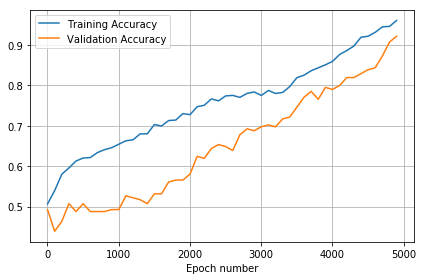


Validation Avg: [ 0.91707316]
Train Avg: [ 0.96459098]






 Overall for: 1_5000
[ 0.91707316]
[ 0.96459098]

OVERALL VAL: 0.917073162591
OVERALL TRAIN: 0.964590975871


Epochs: 5000  -------  Try: 0
Train on 819 samples, validate on 205 samples
Epoch 1/5000
819/819 [==============================] - 2s 2ms/step - loss: 0.6980 - binary_crossentropy: 0.6980 - acc: 0.5128 - val_loss: 0.7008 - val_binary_crossentropy: 0.7008 - val_acc: 0.4829
Epoch 2/5000
819/819 [==============================] - 0s 31us/step - loss: 0.6967 - binary_crossentropy: 0.6967 - acc: 0.5140 - val_loss: 0.7001 - val_binary_crossentropy: 0.7001 - val_acc: 0.5024
Epoch 3/5000
819/819 [==============================] - 0s 30us/step - loss: 0.6961 - binary_crossentropy: 0.6961 - acc: 0.5153 - val_loss: 0.6994 - val_binary_crossentropy: 0.6994 - val_acc: 0.5024
Epoch 4/5000
819/819 [==============================] - 0s 51us/step - loss: 0.6957 - binary_crossentropy: 0.6957 - acc: 0.5116 - val_loss: 0.6993 - val_bin

Epoch 41/5000
819/819 [==============================] - 0s 29us/step - loss: 0.6898 - binary_crossentropy: 0.6898 - acc: 0.5446 - val_loss: 0.6995 - val_binary_crossentropy: 0.6995 - val_acc: 0.4488
Epoch 42/5000
819/819 [==============================] - 0s 31us/step - loss: 0.6898 - binary_crossentropy: 0.6898 - acc: 0.5299 - val_loss: 0.6993 - val_binary_crossentropy: 0.6993 - val_acc: 0.4732
Epoch 43/5000
819/819 [==============================] - 0s 31us/step - loss: 0.6897 - binary_crossentropy: 0.6897 - acc: 0.5482 - val_loss: 0.6993 - val_binary_crossentropy: 0.6993 - val_acc: 0.4683
Epoch 44/5000
819/819 [==============================] - 0s 29us/step - loss: 0.6896 - binary_crossentropy: 0.6896 - acc: 0.5421 - val_loss: 0.6995 - val_binary_crossentropy: 0.6995 - val_acc: 0.4537
Epoch 45/5000
819/819 [==============================] - 0s 29us/step - loss: 0.6895 - binary_crossentropy: 0.6895 - acc: 0.5433 - val_loss: 0.6994 - val_binary_crossentropy: 0.6994 - val_acc: 0.4732


819/819 [==============================] - 0s 43us/step - loss: 0.6859 - binary_crossentropy: 0.6859 - acc: 0.5531 - val_loss: 0.7017 - val_binary_crossentropy: 0.7017 - val_acc: 0.4390
Epoch 82/5000
819/819 [==============================] - 0s 34us/step - loss: 0.6859 - binary_crossentropy: 0.6859 - acc: 0.5519 - val_loss: 0.7010 - val_binary_crossentropy: 0.7010 - val_acc: 0.4341
Epoch 83/5000
819/819 [==============================] - 0s 36us/step - loss: 0.6858 - binary_crossentropy: 0.6858 - acc: 0.5531 - val_loss: 0.7006 - val_binary_crossentropy: 0.7006 - val_acc: 0.4488
Epoch 84/5000
819/819 [==============================] - 0s 43us/step - loss: 0.6854 - binary_crossentropy: 0.6854 - acc: 0.5592 - val_loss: 0.7011 - val_binary_crossentropy: 0.7011 - val_acc: 0.4390
Epoch 85/5000
819/819 [==============================] - 0s 42us/step - loss: 0.6852 - binary_crossentropy: 0.6852 - acc: 0.5543 - val_loss: 0.7009 - val_binary_crossentropy: 0.7009 - val_acc: 0.4390
Epoch 86/5000


Epoch 122/5000
819/819 [==============================] - 0s 29us/step - loss: 0.6776 - binary_crossentropy: 0.6776 - acc: 0.6044 - val_loss: 0.6956 - val_binary_crossentropy: 0.6956 - val_acc: 0.4878
Epoch 123/5000
819/819 [==============================] - 0s 34us/step - loss: 0.6777 - binary_crossentropy: 0.6777 - acc: 0.6068 - val_loss: 0.6954 - val_binary_crossentropy: 0.6954 - val_acc: 0.4878
Epoch 124/5000
819/819 [==============================] - 0s 31us/step - loss: 0.6770 - binary_crossentropy: 0.6770 - acc: 0.6117 - val_loss: 0.6951 - val_binary_crossentropy: 0.6951 - val_acc: 0.4878
Epoch 125/5000
819/819 [==============================] - 0s 36us/step - loss: 0.6768 - binary_crossentropy: 0.6768 - acc: 0.6044 - val_loss: 0.6952 - val_binary_crossentropy: 0.6952 - val_acc: 0.4878
Epoch 126/5000
819/819 [==============================] - 0s 36us/step - loss: 0.6764 - binary_crossentropy: 0.6764 - acc: 0.6093 - val_loss: 0.6952 - val_binary_crossentropy: 0.6952 - val_acc: 0.

Epoch 163/5000
819/819 [==============================] - 0s 86us/step - loss: 0.6639 - binary_crossentropy: 0.6639 - acc: 0.6337 - val_loss: 0.6902 - val_binary_crossentropy: 0.6902 - val_acc: 0.5415
Epoch 164/5000
819/819 [==============================] - 0s 40us/step - loss: 0.6634 - binary_crossentropy: 0.6634 - acc: 0.6398 - val_loss: 0.6893 - val_binary_crossentropy: 0.6893 - val_acc: 0.5463
Epoch 165/5000
819/819 [==============================] - 0s 86us/step - loss: 0.6633 - binary_crossentropy: 0.6633 - acc: 0.6422 - val_loss: 0.6885 - val_binary_crossentropy: 0.6885 - val_acc: 0.5415
Epoch 166/5000
819/819 [==============================] - 0s 95us/step - loss: 0.6625 - binary_crossentropy: 0.6625 - acc: 0.6520 - val_loss: 0.6884 - val_binary_crossentropy: 0.6884 - val_acc: 0.5415
Epoch 167/5000
819/819 [==============================] - 0s 98us/step - loss: 0.6619 - binary_crossentropy: 0.6619 - acc: 0.6545 - val_loss: 0.6883 - val_binary_crossentropy: 0.6883 - val_acc: 0.

Epoch 204/5000
819/819 [==============================] - 0s 67us/step - loss: 0.6433 - binary_crossentropy: 0.6433 - acc: 0.6801 - val_loss: 0.6761 - val_binary_crossentropy: 0.6761 - val_acc: 0.5951
Epoch 205/5000
819/819 [==============================] - 0s 47us/step - loss: 0.6428 - binary_crossentropy: 0.6428 - acc: 0.6972 - val_loss: 0.6775 - val_binary_crossentropy: 0.6775 - val_acc: 0.5659
Epoch 206/5000
819/819 [==============================] - 0s 76us/step - loss: 0.6424 - binary_crossentropy: 0.6424 - acc: 0.6801 - val_loss: 0.6763 - val_binary_crossentropy: 0.6763 - val_acc: 0.5902
Epoch 207/5000
819/819 [==============================] - 0s 47us/step - loss: 0.6410 - binary_crossentropy: 0.6410 - acc: 0.6886 - val_loss: 0.6758 - val_binary_crossentropy: 0.6758 - val_acc: 0.5805
Epoch 208/5000
819/819 [==============================] - 0s 49us/step - loss: 0.6404 - binary_crossentropy: 0.6404 - acc: 0.6947 - val_loss: 0.6745 - val_binary_crossentropy: 0.6745 - val_acc: 0.

819/819 [==============================] - 0s 42us/step - loss: 0.6184 - binary_crossentropy: 0.6184 - acc: 0.7253 - val_loss: 0.6612 - val_binary_crossentropy: 0.6612 - val_acc: 0.6049
Epoch 245/5000
819/819 [==============================] - 0s 38us/step - loss: 0.6172 - binary_crossentropy: 0.6172 - acc: 0.7228 - val_loss: 0.6575 - val_binary_crossentropy: 0.6575 - val_acc: 0.6195
Epoch 246/5000
819/819 [==============================] - 0s 37us/step - loss: 0.6163 - binary_crossentropy: 0.6163 - acc: 0.7363 - val_loss: 0.6573 - val_binary_crossentropy: 0.6573 - val_acc: 0.6244
Epoch 247/5000
819/819 [==============================] - 0s 35us/step - loss: 0.6162 - binary_crossentropy: 0.6162 - acc: 0.7216 - val_loss: 0.6562 - val_binary_crossentropy: 0.6562 - val_acc: 0.6195
Epoch 248/5000
819/819 [==============================] - 0s 37us/step - loss: 0.6154 - binary_crossentropy: 0.6154 - acc: 0.7289 - val_loss: 0.6573 - val_binary_crossentropy: 0.6573 - val_acc: 0.6195
Epoch 249/

Epoch 285/5000
819/819 [==============================] - 0s 36us/step - loss: 0.5932 - binary_crossentropy: 0.5932 - acc: 0.7473 - val_loss: 0.6445 - val_binary_crossentropy: 0.6445 - val_acc: 0.6195
Epoch 286/5000
819/819 [==============================] - 0s 36us/step - loss: 0.5919 - binary_crossentropy: 0.5919 - acc: 0.7534 - val_loss: 0.6412 - val_binary_crossentropy: 0.6412 - val_acc: 0.6341
Epoch 287/5000
819/819 [==============================] - 0s 36us/step - loss: 0.5908 - binary_crossentropy: 0.5908 - acc: 0.7534 - val_loss: 0.6393 - val_binary_crossentropy: 0.6393 - val_acc: 0.6341
Epoch 288/5000
819/819 [==============================] - 0s 39us/step - loss: 0.5910 - binary_crossentropy: 0.5910 - acc: 0.7582 - val_loss: 0.6403 - val_binary_crossentropy: 0.6403 - val_acc: 0.6390
Epoch 289/5000
819/819 [==============================] - 0s 35us/step - loss: 0.5901 - binary_crossentropy: 0.5901 - acc: 0.7485 - val_loss: 0.6409 - val_binary_crossentropy: 0.6409 - val_acc: 0.

Epoch 326/5000
819/819 [==============================] - 0s 28us/step - loss: 0.5673 - binary_crossentropy: 0.5673 - acc: 0.7717 - val_loss: 0.6211 - val_binary_crossentropy: 0.6211 - val_acc: 0.6732
Epoch 327/5000
819/819 [==============================] - 0s 28us/step - loss: 0.5665 - binary_crossentropy: 0.5665 - acc: 0.7766 - val_loss: 0.6210 - val_binary_crossentropy: 0.6210 - val_acc: 0.6732
Epoch 328/5000
819/819 [==============================] - 0s 37us/step - loss: 0.5666 - binary_crossentropy: 0.5666 - acc: 0.7705 - val_loss: 0.6208 - val_binary_crossentropy: 0.6208 - val_acc: 0.6780
Epoch 329/5000
819/819 [==============================] - 0s 32us/step - loss: 0.5659 - binary_crossentropy: 0.5659 - acc: 0.7790 - val_loss: 0.6210 - val_binary_crossentropy: 0.6210 - val_acc: 0.6683
Epoch 330/5000
819/819 [==============================] - 0s 32us/step - loss: 0.5648 - binary_crossentropy: 0.5648 - acc: 0.7766 - val_loss: 0.6224 - val_binary_crossentropy: 0.6224 - val_acc: 0.

819/819 [==============================] - 0s 29us/step - loss: 0.5460 - binary_crossentropy: 0.5460 - acc: 0.7900 - val_loss: 0.6110 - val_binary_crossentropy: 0.6110 - val_acc: 0.6732
Epoch 367/5000
819/819 [==============================] - 0s 28us/step - loss: 0.5449 - binary_crossentropy: 0.5449 - acc: 0.7863 - val_loss: 0.6129 - val_binary_crossentropy: 0.6129 - val_acc: 0.6537
Epoch 368/5000
819/819 [==============================] - 0s 28us/step - loss: 0.5447 - binary_crossentropy: 0.5447 - acc: 0.7900 - val_loss: 0.6114 - val_binary_crossentropy: 0.6114 - val_acc: 0.6683
Epoch 369/5000
819/819 [==============================] - 0s 28us/step - loss: 0.5430 - binary_crossentropy: 0.5430 - acc: 0.7961 - val_loss: 0.6119 - val_binary_crossentropy: 0.6119 - val_acc: 0.6732
Epoch 370/5000
819/819 [==============================] - 0s 29us/step - loss: 0.5429 - binary_crossentropy: 0.5429 - acc: 0.7998 - val_loss: 0.6109 - val_binary_crossentropy: 0.6109 - val_acc: 0.6732
Epoch 371/

819/819 [==============================] - 0s 30us/step - loss: 0.5249 - binary_crossentropy: 0.5249 - acc: 0.8083 - val_loss: 0.6080 - val_binary_crossentropy: 0.6080 - val_acc: 0.6488
Epoch 407/5000
819/819 [==============================] - 0s 29us/step - loss: 0.5256 - binary_crossentropy: 0.5256 - acc: 0.8046 - val_loss: 0.6032 - val_binary_crossentropy: 0.6032 - val_acc: 0.6683
Epoch 408/5000
819/819 [==============================] - 0s 29us/step - loss: 0.5238 - binary_crossentropy: 0.5238 - acc: 0.8071 - val_loss: 0.6026 - val_binary_crossentropy: 0.6026 - val_acc: 0.6927
Epoch 409/5000
819/819 [==============================] - 0s 30us/step - loss: 0.5248 - binary_crossentropy: 0.5248 - acc: 0.8022 - val_loss: 0.6050 - val_binary_crossentropy: 0.6050 - val_acc: 0.6585
Epoch 410/5000
819/819 [==============================] - 0s 29us/step - loss: 0.5231 - binary_crossentropy: 0.5231 - acc: 0.8095 - val_loss: 0.6052 - val_binary_crossentropy: 0.6052 - val_acc: 0.6634
Epoch 411/

Epoch 447/5000
819/819 [==============================] - 0s 29us/step - loss: 0.5066 - binary_crossentropy: 0.5066 - acc: 0.8193 - val_loss: 0.5943 - val_binary_crossentropy: 0.5943 - val_acc: 0.6878
Epoch 448/5000
819/819 [==============================] - 0s 34us/step - loss: 0.5072 - binary_crossentropy: 0.5072 - acc: 0.8278 - val_loss: 0.5938 - val_binary_crossentropy: 0.5938 - val_acc: 0.6829
Epoch 449/5000
819/819 [==============================] - 0s 29us/step - loss: 0.5068 - binary_crossentropy: 0.5068 - acc: 0.8230 - val_loss: 0.5970 - val_binary_crossentropy: 0.5970 - val_acc: 0.6585
Epoch 450/5000
819/819 [==============================] - 0s 31us/step - loss: 0.5054 - binary_crossentropy: 0.5054 - acc: 0.8230 - val_loss: 0.5936 - val_binary_crossentropy: 0.5936 - val_acc: 0.6683
Epoch 451/5000
819/819 [==============================] - 0s 29us/step - loss: 0.5062 - binary_crossentropy: 0.5062 - acc: 0.8193 - val_loss: 0.6034 - val_binary_crossentropy: 0.6034 - val_acc: 0.

Epoch 488/5000
819/819 [==============================] - 0s 28us/step - loss: 0.4910 - binary_crossentropy: 0.4910 - acc: 0.8303 - val_loss: 0.5875 - val_binary_crossentropy: 0.5875 - val_acc: 0.6829
Epoch 489/5000
819/819 [==============================] - 0s 29us/step - loss: 0.4899 - binary_crossentropy: 0.4899 - acc: 0.8291 - val_loss: 0.5885 - val_binary_crossentropy: 0.5885 - val_acc: 0.6683
Epoch 490/5000
819/819 [==============================] - 0s 29us/step - loss: 0.4901 - binary_crossentropy: 0.4901 - acc: 0.8376 - val_loss: 0.5987 - val_binary_crossentropy: 0.5987 - val_acc: 0.6341
Epoch 491/5000
819/819 [==============================] - 0s 28us/step - loss: 0.4900 - binary_crossentropy: 0.4900 - acc: 0.8266 - val_loss: 0.5883 - val_binary_crossentropy: 0.5883 - val_acc: 0.6683
Epoch 492/5000
819/819 [==============================] - 0s 28us/step - loss: 0.4891 - binary_crossentropy: 0.4891 - acc: 0.8352 - val_loss: 0.5849 - val_binary_crossentropy: 0.5849 - val_acc: 0.

Epoch 529/5000
819/819 [==============================] - 0s 28us/step - loss: 0.4748 - binary_crossentropy: 0.4748 - acc: 0.8388 - val_loss: 0.5767 - val_binary_crossentropy: 0.5767 - val_acc: 0.6976
Epoch 530/5000
819/819 [==============================] - 0s 28us/step - loss: 0.4747 - binary_crossentropy: 0.4747 - acc: 0.8449 - val_loss: 0.5757 - val_binary_crossentropy: 0.5757 - val_acc: 0.6927
Epoch 531/5000
819/819 [==============================] - 0s 28us/step - loss: 0.4748 - binary_crossentropy: 0.4748 - acc: 0.8425 - val_loss: 0.5755 - val_binary_crossentropy: 0.5755 - val_acc: 0.7024
Epoch 532/5000
819/819 [==============================] - 0s 31us/step - loss: 0.4740 - binary_crossentropy: 0.4740 - acc: 0.8437 - val_loss: 0.5786 - val_binary_crossentropy: 0.5786 - val_acc: 0.6780
Epoch 533/5000
819/819 [==============================] - 0s 29us/step - loss: 0.4733 - binary_crossentropy: 0.4733 - acc: 0.8388 - val_loss: 0.5789 - val_binary_crossentropy: 0.5789 - val_acc: 0.

Epoch 570/5000
819/819 [==============================] - 0s 30us/step - loss: 0.4594 - binary_crossentropy: 0.4594 - acc: 0.8437 - val_loss: 0.5726 - val_binary_crossentropy: 0.5726 - val_acc: 0.6976
Epoch 571/5000
819/819 [==============================] - 0s 31us/step - loss: 0.4593 - binary_crossentropy: 0.4593 - acc: 0.8413 - val_loss: 0.5764 - val_binary_crossentropy: 0.5764 - val_acc: 0.6732
Epoch 572/5000
819/819 [==============================] - 0s 32us/step - loss: 0.4589 - binary_crossentropy: 0.4589 - acc: 0.8449 - val_loss: 0.5690 - val_binary_crossentropy: 0.5690 - val_acc: 0.7073
Epoch 573/5000
819/819 [==============================] - 0s 31us/step - loss: 0.4585 - binary_crossentropy: 0.4585 - acc: 0.8462 - val_loss: 0.5768 - val_binary_crossentropy: 0.5768 - val_acc: 0.6634
Epoch 574/5000
819/819 [==============================] - 0s 28us/step - loss: 0.4581 - binary_crossentropy: 0.4581 - acc: 0.8437 - val_loss: 0.5733 - val_binary_crossentropy: 0.5733 - val_acc: 0.

Epoch 611/5000
819/819 [==============================] - 0s 37us/step - loss: 0.4447 - binary_crossentropy: 0.4447 - acc: 0.8547 - val_loss: 0.5622 - val_binary_crossentropy: 0.5622 - val_acc: 0.6927
Epoch 612/5000
819/819 [==============================] - 0s 37us/step - loss: 0.4438 - binary_crossentropy: 0.4438 - acc: 0.8510 - val_loss: 0.5646 - val_binary_crossentropy: 0.5646 - val_acc: 0.6976
Epoch 613/5000
819/819 [==============================] - 0s 33us/step - loss: 0.4446 - binary_crossentropy: 0.4446 - acc: 0.8535 - val_loss: 0.5633 - val_binary_crossentropy: 0.5633 - val_acc: 0.6927
Epoch 614/5000
819/819 [==============================] - 0s 29us/step - loss: 0.4422 - binary_crossentropy: 0.4422 - acc: 0.8571 - val_loss: 0.5615 - val_binary_crossentropy: 0.5615 - val_acc: 0.6878
Epoch 615/5000
819/819 [==============================] - 0s 29us/step - loss: 0.4420 - binary_crossentropy: 0.4420 - acc: 0.8523 - val_loss: 0.5628 - val_binary_crossentropy: 0.5628 - val_acc: 0.

Epoch 652/5000
819/819 [==============================] - 0s 36us/step - loss: 0.4306 - binary_crossentropy: 0.4306 - acc: 0.8571 - val_loss: 0.5563 - val_binary_crossentropy: 0.5563 - val_acc: 0.6927
Epoch 653/5000
819/819 [==============================] - 0s 36us/step - loss: 0.4290 - binary_crossentropy: 0.4290 - acc: 0.8657 - val_loss: 0.5564 - val_binary_crossentropy: 0.5564 - val_acc: 0.6927
Epoch 654/5000
819/819 [==============================] - 0s 32us/step - loss: 0.4286 - binary_crossentropy: 0.4286 - acc: 0.8657 - val_loss: 0.5574 - val_binary_crossentropy: 0.5574 - val_acc: 0.6878
Epoch 655/5000
819/819 [==============================] - 0s 31us/step - loss: 0.4286 - binary_crossentropy: 0.4286 - acc: 0.8632 - val_loss: 0.5587 - val_binary_crossentropy: 0.5587 - val_acc: 0.7024
Epoch 656/5000
819/819 [==============================] - 0s 29us/step - loss: 0.4285 - binary_crossentropy: 0.4285 - acc: 0.8596 - val_loss: 0.5579 - val_binary_crossentropy: 0.5579 - val_acc: 0.

Epoch 693/5000
819/819 [==============================] - 0s 29us/step - loss: 0.4163 - binary_crossentropy: 0.4163 - acc: 0.8657 - val_loss: 0.5581 - val_binary_crossentropy: 0.5581 - val_acc: 0.6976
Epoch 694/5000
819/819 [==============================] - 0s 29us/step - loss: 0.4172 - binary_crossentropy: 0.4172 - acc: 0.8596 - val_loss: 0.5511 - val_binary_crossentropy: 0.5511 - val_acc: 0.7024
Epoch 695/5000
819/819 [==============================] - 0s 29us/step - loss: 0.4158 - binary_crossentropy: 0.4158 - acc: 0.8730 - val_loss: 0.5567 - val_binary_crossentropy: 0.5567 - val_acc: 0.6927
Epoch 696/5000
819/819 [==============================] - 0s 33us/step - loss: 0.4167 - binary_crossentropy: 0.4167 - acc: 0.8645 - val_loss: 0.5556 - val_binary_crossentropy: 0.5556 - val_acc: 0.6976
Epoch 697/5000
819/819 [==============================] - 0s 47us/step - loss: 0.4158 - binary_crossentropy: 0.4158 - acc: 0.8755 - val_loss: 0.5476 - val_binary_crossentropy: 0.5476 - val_acc: 0.

819/819 [==============================] - 0s 30us/step - loss: 0.4046 - binary_crossentropy: 0.4046 - acc: 0.8645 - val_loss: 0.5497 - val_binary_crossentropy: 0.5497 - val_acc: 0.7024
Epoch 734/5000
819/819 [==============================] - 0s 30us/step - loss: 0.4050 - binary_crossentropy: 0.4050 - acc: 0.8657 - val_loss: 0.5411 - val_binary_crossentropy: 0.5411 - val_acc: 0.7073
Epoch 735/5000
819/819 [==============================] - 0s 30us/step - loss: 0.4032 - binary_crossentropy: 0.4032 - acc: 0.8706 - val_loss: 0.5488 - val_binary_crossentropy: 0.5488 - val_acc: 0.6976
Epoch 736/5000
819/819 [==============================] - 0s 30us/step - loss: 0.4043 - binary_crossentropy: 0.4043 - acc: 0.8718 - val_loss: 0.5433 - val_binary_crossentropy: 0.5433 - val_acc: 0.7073
Epoch 737/5000
819/819 [==============================] - 0s 34us/step - loss: 0.4038 - binary_crossentropy: 0.4038 - acc: 0.8657 - val_loss: 0.5480 - val_binary_crossentropy: 0.5480 - val_acc: 0.6927
Epoch 738/

Epoch 774/5000
819/819 [==============================] - 0s 29us/step - loss: 0.3929 - binary_crossentropy: 0.3929 - acc: 0.8828 - val_loss: 0.5373 - val_binary_crossentropy: 0.5373 - val_acc: 0.6927
Epoch 775/5000
819/819 [==============================] - 0s 30us/step - loss: 0.3933 - binary_crossentropy: 0.3933 - acc: 0.8767 - val_loss: 0.5422 - val_binary_crossentropy: 0.5422 - val_acc: 0.7024
Epoch 776/5000
819/819 [==============================] - 0s 29us/step - loss: 0.3919 - binary_crossentropy: 0.3919 - acc: 0.8828 - val_loss: 0.5467 - val_binary_crossentropy: 0.5467 - val_acc: 0.7122
Epoch 777/5000
819/819 [==============================] - 0s 31us/step - loss: 0.3941 - binary_crossentropy: 0.3941 - acc: 0.8694 - val_loss: 0.5364 - val_binary_crossentropy: 0.5364 - val_acc: 0.7073
Epoch 778/5000
819/819 [==============================] - 0s 30us/step - loss: 0.3904 - binary_crossentropy: 0.3904 - acc: 0.8828 - val_loss: 0.5353 - val_binary_crossentropy: 0.5353 - val_acc: 0.

Epoch 815/5000
819/819 [==============================] - 0s 31us/step - loss: 0.3814 - binary_crossentropy: 0.3814 - acc: 0.8852 - val_loss: 0.5347 - val_binary_crossentropy: 0.5347 - val_acc: 0.7171
Epoch 816/5000
819/819 [==============================] - 0s 31us/step - loss: 0.3811 - binary_crossentropy: 0.3811 - acc: 0.8816 - val_loss: 0.5293 - val_binary_crossentropy: 0.5293 - val_acc: 0.7024
Epoch 817/5000
819/819 [==============================] - 0s 31us/step - loss: 0.3811 - binary_crossentropy: 0.3811 - acc: 0.8840 - val_loss: 0.5284 - val_binary_crossentropy: 0.5284 - val_acc: 0.7073
Epoch 818/5000
819/819 [==============================] - 0s 32us/step - loss: 0.3800 - binary_crossentropy: 0.3800 - acc: 0.8816 - val_loss: 0.5269 - val_binary_crossentropy: 0.5269 - val_acc: 0.7171
Epoch 819/5000
819/819 [==============================] - 0s 35us/step - loss: 0.3810 - binary_crossentropy: 0.3810 - acc: 0.8852 - val_loss: 0.5337 - val_binary_crossentropy: 0.5337 - val_acc: 0.

Epoch 856/5000
819/819 [==============================] - 0s 29us/step - loss: 0.3694 - binary_crossentropy: 0.3694 - acc: 0.8901 - val_loss: 0.5237 - val_binary_crossentropy: 0.5237 - val_acc: 0.7268
Epoch 857/5000
819/819 [==============================] - 0s 29us/step - loss: 0.3691 - binary_crossentropy: 0.3691 - acc: 0.8926 - val_loss: 0.5322 - val_binary_crossentropy: 0.5322 - val_acc: 0.6878
Epoch 858/5000
819/819 [==============================] - 0s 30us/step - loss: 0.3701 - binary_crossentropy: 0.3701 - acc: 0.8913 - val_loss: 0.5224 - val_binary_crossentropy: 0.5224 - val_acc: 0.7073
Epoch 859/5000
819/819 [==============================] - 0s 29us/step - loss: 0.3685 - binary_crossentropy: 0.3685 - acc: 0.8913 - val_loss: 0.5263 - val_binary_crossentropy: 0.5263 - val_acc: 0.7122
Epoch 860/5000
819/819 [==============================] - 0s 29us/step - loss: 0.3688 - binary_crossentropy: 0.3688 - acc: 0.8901 - val_loss: 0.5227 - val_binary_crossentropy: 0.5227 - val_acc: 0.

Epoch 897/5000
819/819 [==============================] - 0s 29us/step - loss: 0.3582 - binary_crossentropy: 0.3582 - acc: 0.8938 - val_loss: 0.5132 - val_binary_crossentropy: 0.5132 - val_acc: 0.7122
Epoch 898/5000
819/819 [==============================] - 0s 30us/step - loss: 0.3579 - binary_crossentropy: 0.3579 - acc: 0.8974 - val_loss: 0.5159 - val_binary_crossentropy: 0.5159 - val_acc: 0.7073
Epoch 899/5000
819/819 [==============================] - 0s 30us/step - loss: 0.3579 - binary_crossentropy: 0.3579 - acc: 0.8987 - val_loss: 0.5153 - val_binary_crossentropy: 0.5153 - val_acc: 0.7171
Epoch 900/5000
819/819 [==============================] - 0s 29us/step - loss: 0.3567 - binary_crossentropy: 0.3567 - acc: 0.8926 - val_loss: 0.5182 - val_binary_crossentropy: 0.5182 - val_acc: 0.7122
Epoch 901/5000
819/819 [==============================] - 0s 30us/step - loss: 0.3578 - binary_crossentropy: 0.3578 - acc: 0.9023 - val_loss: 0.5209 - val_binary_crossentropy: 0.5209 - val_acc: 0.

Epoch 938/5000
819/819 [==============================] - 0s 28us/step - loss: 0.3474 - binary_crossentropy: 0.3474 - acc: 0.9072 - val_loss: 0.5105 - val_binary_crossentropy: 0.5105 - val_acc: 0.7171
Epoch 939/5000
819/819 [==============================] - 0s 31us/step - loss: 0.3488 - binary_crossentropy: 0.3488 - acc: 0.9035 - val_loss: 0.5088 - val_binary_crossentropy: 0.5088 - val_acc: 0.7268
Epoch 940/5000
819/819 [==============================] - 0s 35us/step - loss: 0.3481 - binary_crossentropy: 0.3481 - acc: 0.9023 - val_loss: 0.5090 - val_binary_crossentropy: 0.5090 - val_acc: 0.7171
Epoch 941/5000
819/819 [==============================] - 0s 31us/step - loss: 0.3456 - binary_crossentropy: 0.3456 - acc: 0.8987 - val_loss: 0.5074 - val_binary_crossentropy: 0.5074 - val_acc: 0.7220
Epoch 942/5000
819/819 [==============================] - 0s 30us/step - loss: 0.3467 - binary_crossentropy: 0.3467 - acc: 0.8962 - val_loss: 0.5100 - val_binary_crossentropy: 0.5100 - val_acc: 0.

Epoch 979/5000
819/819 [==============================] - 0s 29us/step - loss: 0.3372 - binary_crossentropy: 0.3372 - acc: 0.9011 - val_loss: 0.5040 - val_binary_crossentropy: 0.5040 - val_acc: 0.7171
Epoch 980/5000
819/819 [==============================] - 0s 29us/step - loss: 0.3359 - binary_crossentropy: 0.3359 - acc: 0.9072 - val_loss: 0.5040 - val_binary_crossentropy: 0.5040 - val_acc: 0.7220
Epoch 981/5000
819/819 [==============================] - 0s 29us/step - loss: 0.3362 - binary_crossentropy: 0.3362 - acc: 0.9121 - val_loss: 0.5040 - val_binary_crossentropy: 0.5040 - val_acc: 0.7220
Epoch 982/5000
819/819 [==============================] - 0s 28us/step - loss: 0.3358 - binary_crossentropy: 0.3358 - acc: 0.9121 - val_loss: 0.5034 - val_binary_crossentropy: 0.5034 - val_acc: 0.7268
Epoch 983/5000
819/819 [==============================] - 0s 31us/step - loss: 0.3357 - binary_crossentropy: 0.3357 - acc: 0.9096 - val_loss: 0.5006 - val_binary_crossentropy: 0.5006 - val_acc: 0.

819/819 [==============================] - 0s 31us/step - loss: 0.3285 - binary_crossentropy: 0.3285 - acc: 0.9121 - val_loss: 0.4944 - val_binary_crossentropy: 0.4944 - val_acc: 0.7366
Epoch 1020/5000
819/819 [==============================] - 0s 30us/step - loss: 0.3268 - binary_crossentropy: 0.3268 - acc: 0.9109 - val_loss: 0.4949 - val_binary_crossentropy: 0.4949 - val_acc: 0.7317
Epoch 1021/5000
819/819 [==============================] - 0s 28us/step - loss: 0.3258 - binary_crossentropy: 0.3258 - acc: 0.9133 - val_loss: 0.4951 - val_binary_crossentropy: 0.4951 - val_acc: 0.7366
Epoch 1022/5000
819/819 [==============================] - 0s 29us/step - loss: 0.3249 - binary_crossentropy: 0.3249 - acc: 0.9194 - val_loss: 0.4963 - val_binary_crossentropy: 0.4963 - val_acc: 0.7220
Epoch 1023/5000
819/819 [==============================] - 0s 29us/step - loss: 0.3245 - binary_crossentropy: 0.3245 - acc: 0.9170 - val_loss: 0.4951 - val_binary_crossentropy: 0.4951 - val_acc: 0.7415
Epoch 

819/819 [==============================] - 0s 30us/step - loss: 0.3166 - binary_crossentropy: 0.3166 - acc: 0.9219 - val_loss: 0.4946 - val_binary_crossentropy: 0.4946 - val_acc: 0.7415
Epoch 1060/5000
819/819 [==============================] - 0s 31us/step - loss: 0.3170 - binary_crossentropy: 0.3170 - acc: 0.9194 - val_loss: 0.4926 - val_binary_crossentropy: 0.4926 - val_acc: 0.7463
Epoch 1061/5000
819/819 [==============================] - 0s 30us/step - loss: 0.3155 - binary_crossentropy: 0.3155 - acc: 0.9219 - val_loss: 0.4927 - val_binary_crossentropy: 0.4927 - val_acc: 0.7415
Epoch 1062/5000
819/819 [==============================] - 0s 29us/step - loss: 0.3160 - binary_crossentropy: 0.3160 - acc: 0.9219 - val_loss: 0.4989 - val_binary_crossentropy: 0.4989 - val_acc: 0.7512
Epoch 1063/5000
819/819 [==============================] - 0s 28us/step - loss: 0.3171 - binary_crossentropy: 0.3171 - acc: 0.9170 - val_loss: 0.5012 - val_binary_crossentropy: 0.5012 - val_acc: 0.7171
Epoch 

Epoch 1100/5000
819/819 [==============================] - 0s 53us/step - loss: 0.3085 - binary_crossentropy: 0.3085 - acc: 0.9194 - val_loss: 0.5030 - val_binary_crossentropy: 0.5030 - val_acc: 0.7220
Epoch 1101/5000
819/819 [==============================] - 0s 48us/step - loss: 0.3100 - binary_crossentropy: 0.3100 - acc: 0.9219 - val_loss: 0.4873 - val_binary_crossentropy: 0.4873 - val_acc: 0.7366
Epoch 1102/5000
819/819 [==============================] - 0s 57us/step - loss: 0.3078 - binary_crossentropy: 0.3078 - acc: 0.9231 - val_loss: 0.4965 - val_binary_crossentropy: 0.4965 - val_acc: 0.7268
Epoch 1103/5000
819/819 [==============================] - 0s 51us/step - loss: 0.3070 - binary_crossentropy: 0.3070 - acc: 0.9255 - val_loss: 0.4827 - val_binary_crossentropy: 0.4827 - val_acc: 0.7415
Epoch 1104/5000
819/819 [==============================] - 0s 56us/step - loss: 0.3049 - binary_crossentropy: 0.3049 - acc: 0.9292 - val_loss: 0.4869 - val_binary_crossentropy: 0.4869 - val_ac

819/819 [==============================] - 0s 29us/step - loss: 0.2970 - binary_crossentropy: 0.2970 - acc: 0.9341 - val_loss: 0.4788 - val_binary_crossentropy: 0.4788 - val_acc: 0.7659
Epoch 1141/5000
819/819 [==============================] - 0s 29us/step - loss: 0.2976 - binary_crossentropy: 0.2976 - acc: 0.9219 - val_loss: 0.4744 - val_binary_crossentropy: 0.4744 - val_acc: 0.7463
Epoch 1142/5000
819/819 [==============================] - 0s 29us/step - loss: 0.2978 - binary_crossentropy: 0.2978 - acc: 0.9267 - val_loss: 0.4738 - val_binary_crossentropy: 0.4738 - val_acc: 0.7463
Epoch 1143/5000
819/819 [==============================] - 0s 32us/step - loss: 0.2967 - binary_crossentropy: 0.2967 - acc: 0.9255 - val_loss: 0.4743 - val_binary_crossentropy: 0.4743 - val_acc: 0.7415
Epoch 1144/5000
819/819 [==============================] - 0s 43us/step - loss: 0.2963 - binary_crossentropy: 0.2963 - acc: 0.9292 - val_loss: 0.4719 - val_binary_crossentropy: 0.4719 - val_acc: 0.7512
Epoch 

Epoch 1181/5000
819/819 [==============================] - 0s 34us/step - loss: 0.2869 - binary_crossentropy: 0.2869 - acc: 0.9402 - val_loss: 0.4818 - val_binary_crossentropy: 0.4818 - val_acc: 0.7659
Epoch 1182/5000
819/819 [==============================] - 0s 34us/step - loss: 0.2883 - binary_crossentropy: 0.2883 - acc: 0.9304 - val_loss: 0.4711 - val_binary_crossentropy: 0.4711 - val_acc: 0.7659
Epoch 1183/5000
819/819 [==============================] - 0s 40us/step - loss: 0.2873 - binary_crossentropy: 0.2873 - acc: 0.9353 - val_loss: 0.4703 - val_binary_crossentropy: 0.4703 - val_acc: 0.7512
Epoch 1184/5000
819/819 [==============================] - 0s 40us/step - loss: 0.2876 - binary_crossentropy: 0.2876 - acc: 0.9377 - val_loss: 0.4677 - val_binary_crossentropy: 0.4677 - val_acc: 0.7561
Epoch 1185/5000
819/819 [==============================] - 0s 40us/step - loss: 0.2874 - binary_crossentropy: 0.2874 - acc: 0.9377 - val_loss: 0.4665 - val_binary_crossentropy: 0.4665 - val_ac

819/819 [==============================] - 0s 50us/step - loss: 0.2791 - binary_crossentropy: 0.2791 - acc: 0.9365 - val_loss: 0.4634 - val_binary_crossentropy: 0.4634 - val_acc: 0.7561
Epoch 1222/5000
819/819 [==============================] - 0s 55us/step - loss: 0.2776 - binary_crossentropy: 0.2776 - acc: 0.9438 - val_loss: 0.4608 - val_binary_crossentropy: 0.4608 - val_acc: 0.7659
Epoch 1223/5000
819/819 [==============================] - 0s 92us/step - loss: 0.2792 - binary_crossentropy: 0.2792 - acc: 0.9389 - val_loss: 0.4585 - val_binary_crossentropy: 0.4585 - val_acc: 0.7610
Epoch 1224/5000
819/819 [==============================] - 0s 90us/step - loss: 0.2780 - binary_crossentropy: 0.2780 - acc: 0.9402 - val_loss: 0.4631 - val_binary_crossentropy: 0.4631 - val_acc: 0.7659
Epoch 1225/5000
819/819 [==============================] - 0s 52us/step - loss: 0.2781 - binary_crossentropy: 0.2781 - acc: 0.9402 - val_loss: 0.4682 - val_binary_crossentropy: 0.4682 - val_acc: 0.7659
Epoch 

Epoch 1262/5000
819/819 [==============================] - 0s 38us/step - loss: 0.2707 - binary_crossentropy: 0.2707 - acc: 0.9414 - val_loss: 0.4550 - val_binary_crossentropy: 0.4550 - val_acc: 0.7707
Epoch 1263/5000
819/819 [==============================] - 0s 38us/step - loss: 0.2694 - binary_crossentropy: 0.2694 - acc: 0.9463 - val_loss: 0.4533 - val_binary_crossentropy: 0.4533 - val_acc: 0.7707
Epoch 1264/5000
819/819 [==============================] - 0s 41us/step - loss: 0.2705 - binary_crossentropy: 0.2705 - acc: 0.9451 - val_loss: 0.4572 - val_binary_crossentropy: 0.4572 - val_acc: 0.7512
Epoch 1265/5000
819/819 [==============================] - 0s 37us/step - loss: 0.2696 - binary_crossentropy: 0.2696 - acc: 0.9463 - val_loss: 0.4570 - val_binary_crossentropy: 0.4570 - val_acc: 0.7561
Epoch 1266/5000
819/819 [==============================] - 0s 39us/step - loss: 0.2703 - binary_crossentropy: 0.2703 - acc: 0.9389 - val_loss: 0.4529 - val_binary_crossentropy: 0.4529 - val_ac

819/819 [==============================] - 0s 30us/step - loss: 0.2629 - binary_crossentropy: 0.2629 - acc: 0.9499 - val_loss: 0.4565 - val_binary_crossentropy: 0.4565 - val_acc: 0.7659
Epoch 1303/5000
819/819 [==============================] - 0s 56us/step - loss: 0.2623 - binary_crossentropy: 0.2623 - acc: 0.9438 - val_loss: 0.4494 - val_binary_crossentropy: 0.4494 - val_acc: 0.7659
Epoch 1304/5000
819/819 [==============================] - 0s 62us/step - loss: 0.2612 - binary_crossentropy: 0.2612 - acc: 0.9475 - val_loss: 0.4459 - val_binary_crossentropy: 0.4459 - val_acc: 0.7756
Epoch 1305/5000
819/819 [==============================] - 0s 70us/step - loss: 0.2612 - binary_crossentropy: 0.2612 - acc: 0.9512 - val_loss: 0.4526 - val_binary_crossentropy: 0.4526 - val_acc: 0.7756
Epoch 1306/5000
819/819 [==============================] - 0s 54us/step - loss: 0.2609 - binary_crossentropy: 0.2609 - acc: 0.9499 - val_loss: 0.4490 - val_binary_crossentropy: 0.4490 - val_acc: 0.7707
Epoch 

Epoch 1343/5000
819/819 [==============================] - 0s 39us/step - loss: 0.2540 - binary_crossentropy: 0.2540 - acc: 0.9475 - val_loss: 0.4500 - val_binary_crossentropy: 0.4500 - val_acc: 0.7756
Epoch 1344/5000
819/819 [==============================] - 0s 37us/step - loss: 0.2527 - binary_crossentropy: 0.2527 - acc: 0.9536 - val_loss: 0.4494 - val_binary_crossentropy: 0.4494 - val_acc: 0.7805
Epoch 1345/5000
819/819 [==============================] - 0s 37us/step - loss: 0.2538 - binary_crossentropy: 0.2538 - acc: 0.9512 - val_loss: 0.4458 - val_binary_crossentropy: 0.4458 - val_acc: 0.7756
Epoch 1346/5000
819/819 [==============================] - 0s 40us/step - loss: 0.2528 - binary_crossentropy: 0.2528 - acc: 0.9524 - val_loss: 0.4506 - val_binary_crossentropy: 0.4506 - val_acc: 0.7659
Epoch 1347/5000
819/819 [==============================] - 0s 44us/step - loss: 0.2545 - binary_crossentropy: 0.2545 - acc: 0.9499 - val_loss: 0.4460 - val_binary_crossentropy: 0.4460 - val_ac

819/819 [==============================] - 0s 32us/step - loss: 0.2466 - binary_crossentropy: 0.2466 - acc: 0.9524 - val_loss: 0.4466 - val_binary_crossentropy: 0.4466 - val_acc: 0.7756
Epoch 1384/5000
819/819 [==============================] - 0s 28us/step - loss: 0.2466 - binary_crossentropy: 0.2466 - acc: 0.9548 - val_loss: 0.4406 - val_binary_crossentropy: 0.4406 - val_acc: 0.7756
Epoch 1385/5000
819/819 [==============================] - 0s 29us/step - loss: 0.2470 - binary_crossentropy: 0.2470 - acc: 0.9536 - val_loss: 0.4387 - val_binary_crossentropy: 0.4387 - val_acc: 0.7756
Epoch 1386/5000
819/819 [==============================] - 0s 28us/step - loss: 0.2464 - binary_crossentropy: 0.2464 - acc: 0.9512 - val_loss: 0.4363 - val_binary_crossentropy: 0.4363 - val_acc: 0.7854
Epoch 1387/5000
819/819 [==============================] - 0s 33us/step - loss: 0.2461 - binary_crossentropy: 0.2461 - acc: 0.9560 - val_loss: 0.4436 - val_binary_crossentropy: 0.4436 - val_acc: 0.7756
Epoch 

819/819 [==============================] - 0s 29us/step - loss: 0.2402 - binary_crossentropy: 0.2402 - acc: 0.9548 - val_loss: 0.4372 - val_binary_crossentropy: 0.4372 - val_acc: 0.7707
Epoch 1424/5000
819/819 [==============================] - 0s 33us/step - loss: 0.2396 - binary_crossentropy: 0.2396 - acc: 0.9499 - val_loss: 0.4398 - val_binary_crossentropy: 0.4398 - val_acc: 0.7854
Epoch 1425/5000
819/819 [==============================] - 0s 38us/step - loss: 0.2390 - binary_crossentropy: 0.2390 - acc: 0.9524 - val_loss: 0.4589 - val_binary_crossentropy: 0.4589 - val_acc: 0.7561
Epoch 1426/5000
819/819 [==============================] - 0s 35us/step - loss: 0.2392 - binary_crossentropy: 0.2392 - acc: 0.9524 - val_loss: 0.4485 - val_binary_crossentropy: 0.4485 - val_acc: 0.7805
Epoch 1427/5000
819/819 [==============================] - 0s 30us/step - loss: 0.2401 - binary_crossentropy: 0.2401 - acc: 0.9585 - val_loss: 0.4398 - val_binary_crossentropy: 0.4398 - val_acc: 0.7756
Epoch 

Epoch 1464/5000
819/819 [==============================] - 0s 43us/step - loss: 0.2315 - binary_crossentropy: 0.2315 - acc: 0.9585 - val_loss: 0.4314 - val_binary_crossentropy: 0.4314 - val_acc: 0.7854
Epoch 1465/5000
819/819 [==============================] - 0s 36us/step - loss: 0.2316 - binary_crossentropy: 0.2316 - acc: 0.9621 - val_loss: 0.4371 - val_binary_crossentropy: 0.4371 - val_acc: 0.7707
Epoch 1466/5000
819/819 [==============================] - 0s 36us/step - loss: 0.2312 - binary_crossentropy: 0.2312 - acc: 0.9585 - val_loss: 0.4359 - val_binary_crossentropy: 0.4359 - val_acc: 0.7805
Epoch 1467/5000
819/819 [==============================] - 0s 33us/step - loss: 0.2313 - binary_crossentropy: 0.2313 - acc: 0.9560 - val_loss: 0.4328 - val_binary_crossentropy: 0.4328 - val_acc: 0.7805
Epoch 1468/5000
819/819 [==============================] - 0s 32us/step - loss: 0.2328 - binary_crossentropy: 0.2328 - acc: 0.9597 - val_loss: 0.4300 - val_binary_crossentropy: 0.4300 - val_ac

819/819 [==============================] - 0s 40us/step - loss: 0.2243 - binary_crossentropy: 0.2243 - acc: 0.9585 - val_loss: 0.4276 - val_binary_crossentropy: 0.4276 - val_acc: 0.7707
Epoch 1505/5000
819/819 [==============================] - 0s 46us/step - loss: 0.2248 - binary_crossentropy: 0.2248 - acc: 0.9597 - val_loss: 0.4291 - val_binary_crossentropy: 0.4291 - val_acc: 0.7756
Epoch 1506/5000
819/819 [==============================] - 0s 31us/step - loss: 0.2253 - binary_crossentropy: 0.2253 - acc: 0.9536 - val_loss: 0.4238 - val_binary_crossentropy: 0.4238 - val_acc: 0.7902
Epoch 1507/5000
819/819 [==============================] - 0s 33us/step - loss: 0.2236 - binary_crossentropy: 0.2236 - acc: 0.9634 - val_loss: 0.4231 - val_binary_crossentropy: 0.4231 - val_acc: 0.7902
Epoch 1508/5000
819/819 [==============================] - 0s 40us/step - loss: 0.2242 - binary_crossentropy: 0.2242 - acc: 0.9573 - val_loss: 0.4292 - val_binary_crossentropy: 0.4292 - val_acc: 0.7902
Epoch 

Epoch 1545/5000
819/819 [==============================] - 0s 37us/step - loss: 0.2179 - binary_crossentropy: 0.2179 - acc: 0.9536 - val_loss: 0.4210 - val_binary_crossentropy: 0.4210 - val_acc: 0.7805
Epoch 1546/5000
819/819 [==============================] - 0s 34us/step - loss: 0.2152 - binary_crossentropy: 0.2152 - acc: 0.9670 - val_loss: 0.4259 - val_binary_crossentropy: 0.4259 - val_acc: 0.7707
Epoch 1547/5000
819/819 [==============================] - 0s 34us/step - loss: 0.2160 - binary_crossentropy: 0.2160 - acc: 0.9658 - val_loss: 0.4226 - val_binary_crossentropy: 0.4226 - val_acc: 0.7854
Epoch 1548/5000
819/819 [==============================] - 0s 31us/step - loss: 0.2159 - binary_crossentropy: 0.2159 - acc: 0.9573 - val_loss: 0.4335 - val_binary_crossentropy: 0.4335 - val_acc: 0.7902
Epoch 1549/5000
819/819 [==============================] - 0s 34us/step - loss: 0.2177 - binary_crossentropy: 0.2177 - acc: 0.9597 - val_loss: 0.4217 - val_binary_crossentropy: 0.4217 - val_ac

819/819 [==============================] - 0s 32us/step - loss: 0.2091 - binary_crossentropy: 0.2091 - acc: 0.9646 - val_loss: 0.4173 - val_binary_crossentropy: 0.4173 - val_acc: 0.7902
Epoch 1586/5000
819/819 [==============================] - 0s 29us/step - loss: 0.2081 - binary_crossentropy: 0.2081 - acc: 0.9744 - val_loss: 0.4286 - val_binary_crossentropy: 0.4286 - val_acc: 0.7756
Epoch 1587/5000
819/819 [==============================] - 0s 28us/step - loss: 0.2113 - binary_crossentropy: 0.2113 - acc: 0.9585 - val_loss: 0.4161 - val_binary_crossentropy: 0.4161 - val_acc: 0.7902
Epoch 1588/5000
819/819 [==============================] - 0s 30us/step - loss: 0.2081 - binary_crossentropy: 0.2081 - acc: 0.9658 - val_loss: 0.4274 - val_binary_crossentropy: 0.4274 - val_acc: 0.7854
Epoch 1589/5000
819/819 [==============================] - 0s 33us/step - loss: 0.2092 - binary_crossentropy: 0.2092 - acc: 0.9670 - val_loss: 0.4151 - val_binary_crossentropy: 0.4151 - val_acc: 0.8049
Epoch 

Epoch 1626/5000
819/819 [==============================] - 0s 32us/step - loss: 0.2013 - binary_crossentropy: 0.2013 - acc: 0.9658 - val_loss: 0.4145 - val_binary_crossentropy: 0.4145 - val_acc: 0.8000
Epoch 1627/5000
819/819 [==============================] - 0s 29us/step - loss: 0.2029 - binary_crossentropy: 0.2029 - acc: 0.9670 - val_loss: 0.4114 - val_binary_crossentropy: 0.4114 - val_acc: 0.8000
Epoch 1628/5000
819/819 [==============================] - 0s 29us/step - loss: 0.2012 - binary_crossentropy: 0.2012 - acc: 0.9719 - val_loss: 0.4150 - val_binary_crossentropy: 0.4150 - val_acc: 0.7805
Epoch 1629/5000
819/819 [==============================] - 0s 31us/step - loss: 0.2026 - binary_crossentropy: 0.2026 - acc: 0.9634 - val_loss: 0.4114 - val_binary_crossentropy: 0.4114 - val_acc: 0.8000
Epoch 1630/5000
819/819 [==============================] - 0s 29us/step - loss: 0.2016 - binary_crossentropy: 0.2016 - acc: 0.9695 - val_loss: 0.4128 - val_binary_crossentropy: 0.4128 - val_ac

819/819 [==============================] - 0s 32us/step - loss: 0.1954 - binary_crossentropy: 0.1954 - acc: 0.9719 - val_loss: 0.4128 - val_binary_crossentropy: 0.4128 - val_acc: 0.7854
Epoch 1667/5000
819/819 [==============================] - 0s 31us/step - loss: 0.1960 - binary_crossentropy: 0.1960 - acc: 0.9658 - val_loss: 0.4139 - val_binary_crossentropy: 0.4139 - val_acc: 0.7951
Epoch 1668/5000
819/819 [==============================] - 0s 28us/step - loss: 0.1956 - binary_crossentropy: 0.1956 - acc: 0.9695 - val_loss: 0.4204 - val_binary_crossentropy: 0.4204 - val_acc: 0.7902
Epoch 1669/5000
819/819 [==============================] - 0s 31us/step - loss: 0.1969 - binary_crossentropy: 0.1969 - acc: 0.9683 - val_loss: 0.4116 - val_binary_crossentropy: 0.4116 - val_acc: 0.8049
Epoch 1670/5000
819/819 [==============================] - 0s 30us/step - loss: 0.1943 - binary_crossentropy: 0.1943 - acc: 0.9719 - val_loss: 0.4112 - val_binary_crossentropy: 0.4112 - val_acc: 0.8000
Epoch 

Epoch 1707/5000
819/819 [==============================] - 0s 33us/step - loss: 0.1901 - binary_crossentropy: 0.1901 - acc: 0.9707 - val_loss: 0.4033 - val_binary_crossentropy: 0.4033 - val_acc: 0.7951
Epoch 1708/5000
819/819 [==============================] - 0s 31us/step - loss: 0.1892 - binary_crossentropy: 0.1892 - acc: 0.9719 - val_loss: 0.4026 - val_binary_crossentropy: 0.4026 - val_acc: 0.7902
Epoch 1709/5000
819/819 [==============================] - 0s 30us/step - loss: 0.1875 - binary_crossentropy: 0.1875 - acc: 0.9707 - val_loss: 0.4039 - val_binary_crossentropy: 0.4039 - val_acc: 0.8000
Epoch 1710/5000
819/819 [==============================] - 0s 33us/step - loss: 0.1884 - binary_crossentropy: 0.1884 - acc: 0.9719 - val_loss: 0.4024 - val_binary_crossentropy: 0.4024 - val_acc: 0.8000
Epoch 1711/5000
819/819 [==============================] - 0s 28us/step - loss: 0.1901 - binary_crossentropy: 0.1901 - acc: 0.9731 - val_loss: 0.4158 - val_binary_crossentropy: 0.4158 - val_ac

819/819 [==============================] - 0s 31us/step - loss: 0.1821 - binary_crossentropy: 0.1821 - acc: 0.9744 - val_loss: 0.3986 - val_binary_crossentropy: 0.3986 - val_acc: 0.8049
Epoch 1748/5000
819/819 [==============================] - 0s 29us/step - loss: 0.1834 - binary_crossentropy: 0.1834 - acc: 0.9719 - val_loss: 0.4039 - val_binary_crossentropy: 0.4039 - val_acc: 0.8000
Epoch 1749/5000
819/819 [==============================] - 0s 27us/step - loss: 0.1855 - binary_crossentropy: 0.1855 - acc: 0.9719 - val_loss: 0.3969 - val_binary_crossentropy: 0.3969 - val_acc: 0.8098
Epoch 1750/5000
819/819 [==============================] - 0s 35us/step - loss: 0.1824 - binary_crossentropy: 0.1824 - acc: 0.9744 - val_loss: 0.3998 - val_binary_crossentropy: 0.3998 - val_acc: 0.8000
Epoch 1751/5000
819/819 [==============================] - 0s 29us/step - loss: 0.1825 - binary_crossentropy: 0.1825 - acc: 0.9744 - val_loss: 0.4009 - val_binary_crossentropy: 0.4009 - val_acc: 0.8000
Epoch 

Epoch 1788/5000
819/819 [==============================] - 0s 28us/step - loss: 0.1775 - binary_crossentropy: 0.1775 - acc: 0.9768 - val_loss: 0.3980 - val_binary_crossentropy: 0.3980 - val_acc: 0.7951
Epoch 1789/5000
819/819 [==============================] - 0s 30us/step - loss: 0.1768 - binary_crossentropy: 0.1768 - acc: 0.9780 - val_loss: 0.4021 - val_binary_crossentropy: 0.4021 - val_acc: 0.8146
Epoch 1790/5000
819/819 [==============================] - 0s 32us/step - loss: 0.1769 - binary_crossentropy: 0.1769 - acc: 0.9707 - val_loss: 0.3997 - val_binary_crossentropy: 0.3997 - val_acc: 0.8000
Epoch 1791/5000
819/819 [==============================] - 0s 31us/step - loss: 0.1790 - binary_crossentropy: 0.1790 - acc: 0.9707 - val_loss: 0.3968 - val_binary_crossentropy: 0.3968 - val_acc: 0.8049
Epoch 1792/5000
819/819 [==============================] - 0s 28us/step - loss: 0.1769 - binary_crossentropy: 0.1769 - acc: 0.9768 - val_loss: 0.4017 - val_binary_crossentropy: 0.4017 - val_ac

819/819 [==============================] - 0s 32us/step - loss: 0.1724 - binary_crossentropy: 0.1724 - acc: 0.9768 - val_loss: 0.3968 - val_binary_crossentropy: 0.3968 - val_acc: 0.8195
Epoch 1829/5000
819/819 [==============================] - 0s 29us/step - loss: 0.1718 - binary_crossentropy: 0.1718 - acc: 0.9756 - val_loss: 0.3982 - val_binary_crossentropy: 0.3982 - val_acc: 0.8049
Epoch 1830/5000
819/819 [==============================] - 0s 31us/step - loss: 0.1733 - binary_crossentropy: 0.1733 - acc: 0.9780 - val_loss: 0.3944 - val_binary_crossentropy: 0.3944 - val_acc: 0.8000
Epoch 1831/5000
819/819 [==============================] - 0s 29us/step - loss: 0.1732 - binary_crossentropy: 0.1732 - acc: 0.9744 - val_loss: 0.3964 - val_binary_crossentropy: 0.3964 - val_acc: 0.8049
Epoch 1832/5000
819/819 [==============================] - 0s 30us/step - loss: 0.1731 - binary_crossentropy: 0.1731 - acc: 0.9768 - val_loss: 0.3984 - val_binary_crossentropy: 0.3984 - val_acc: 0.8049
Epoch 

Epoch 1869/5000
819/819 [==============================] - 0s 28us/step - loss: 0.1668 - binary_crossentropy: 0.1668 - acc: 0.9744 - val_loss: 0.3957 - val_binary_crossentropy: 0.3957 - val_acc: 0.8195
Epoch 1870/5000
819/819 [==============================] - 0s 32us/step - loss: 0.1680 - binary_crossentropy: 0.1680 - acc: 0.9744 - val_loss: 0.3950 - val_binary_crossentropy: 0.3950 - val_acc: 0.8000
Epoch 1871/5000
819/819 [==============================] - 0s 28us/step - loss: 0.1673 - binary_crossentropy: 0.1673 - acc: 0.9768 - val_loss: 0.4031 - val_binary_crossentropy: 0.4031 - val_acc: 0.8000
Epoch 1872/5000
819/819 [==============================] - 0s 27us/step - loss: 0.1676 - binary_crossentropy: 0.1676 - acc: 0.9780 - val_loss: 0.3979 - val_binary_crossentropy: 0.3979 - val_acc: 0.8000
Epoch 1873/5000
819/819 [==============================] - 0s 29us/step - loss: 0.1669 - binary_crossentropy: 0.1669 - acc: 0.9792 - val_loss: 0.3943 - val_binary_crossentropy: 0.3943 - val_ac

819/819 [==============================] - 0s 48us/step - loss: 0.1636 - binary_crossentropy: 0.1636 - acc: 0.9780 - val_loss: 0.3971 - val_binary_crossentropy: 0.3971 - val_acc: 0.8146
Epoch 1910/5000
819/819 [==============================] - 0s 61us/step - loss: 0.1633 - binary_crossentropy: 0.1633 - acc: 0.9780 - val_loss: 0.3943 - val_binary_crossentropy: 0.3943 - val_acc: 0.8146
Epoch 1911/5000
819/819 [==============================] - 0s 61us/step - loss: 0.1634 - binary_crossentropy: 0.1634 - acc: 0.9780 - val_loss: 0.4030 - val_binary_crossentropy: 0.4030 - val_acc: 0.8000
Epoch 1912/5000
819/819 [==============================] - 0s 43us/step - loss: 0.1625 - binary_crossentropy: 0.1625 - acc: 0.9792 - val_loss: 0.3989 - val_binary_crossentropy: 0.3989 - val_acc: 0.8146
Epoch 1913/5000
819/819 [==============================] - 0s 49us/step - loss: 0.1637 - binary_crossentropy: 0.1637 - acc: 0.9792 - val_loss: 0.3954 - val_binary_crossentropy: 0.3954 - val_acc: 0.8049
Epoch 

Epoch 1950/5000
819/819 [==============================] - 0s 72us/step - loss: 0.1578 - binary_crossentropy: 0.1578 - acc: 0.9792 - val_loss: 0.3923 - val_binary_crossentropy: 0.3923 - val_acc: 0.8098
Epoch 1951/5000
819/819 [==============================] - 0s 62us/step - loss: 0.1597 - binary_crossentropy: 0.1597 - acc: 0.9792 - val_loss: 0.3960 - val_binary_crossentropy: 0.3960 - val_acc: 0.8000
Epoch 1952/5000
819/819 [==============================] - 0s 48us/step - loss: 0.1593 - binary_crossentropy: 0.1593 - acc: 0.9805 - val_loss: 0.3940 - val_binary_crossentropy: 0.3940 - val_acc: 0.8049
Epoch 1953/5000
819/819 [==============================] - 0s 45us/step - loss: 0.1590 - binary_crossentropy: 0.1590 - acc: 0.9853 - val_loss: 0.3920 - val_binary_crossentropy: 0.3920 - val_acc: 0.8049
Epoch 1954/5000
819/819 [==============================] - 0s 60us/step - loss: 0.1579 - binary_crossentropy: 0.1579 - acc: 0.9805 - val_loss: 0.3941 - val_binary_crossentropy: 0.3941 - val_ac

819/819 [==============================] - 0s 30us/step - loss: 0.1565 - binary_crossentropy: 0.1565 - acc: 0.9780 - val_loss: 0.3895 - val_binary_crossentropy: 0.3895 - val_acc: 0.8098
Epoch 1991/5000
819/819 [==============================] - 0s 30us/step - loss: 0.1541 - binary_crossentropy: 0.1541 - acc: 0.9792 - val_loss: 0.3884 - val_binary_crossentropy: 0.3884 - val_acc: 0.8049
Epoch 1992/5000
819/819 [==============================] - 0s 40us/step - loss: 0.1554 - binary_crossentropy: 0.1554 - acc: 0.9792 - val_loss: 0.3893 - val_binary_crossentropy: 0.3893 - val_acc: 0.8146
Epoch 1993/5000
819/819 [==============================] - 0s 29us/step - loss: 0.1543 - binary_crossentropy: 0.1543 - acc: 0.9780 - val_loss: 0.3895 - val_binary_crossentropy: 0.3895 - val_acc: 0.8341
Epoch 1994/5000
819/819 [==============================] - 0s 33us/step - loss: 0.1544 - binary_crossentropy: 0.1544 - acc: 0.9768 - val_loss: 0.3926 - val_binary_crossentropy: 0.3926 - val_acc: 0.8049
Epoch 

Epoch 2031/5000
819/819 [==============================] - 0s 49us/step - loss: 0.1503 - binary_crossentropy: 0.1503 - acc: 0.9805 - val_loss: 0.4029 - val_binary_crossentropy: 0.4029 - val_acc: 0.8098
Epoch 2032/5000
819/819 [==============================] - 0s 38us/step - loss: 0.1512 - binary_crossentropy: 0.1512 - acc: 0.9817 - val_loss: 0.3840 - val_binary_crossentropy: 0.3840 - val_acc: 0.8146
Epoch 2033/5000
819/819 [==============================] - 0s 37us/step - loss: 0.1492 - binary_crossentropy: 0.1492 - acc: 0.9817 - val_loss: 0.3855 - val_binary_crossentropy: 0.3855 - val_acc: 0.8244
Epoch 2034/5000
819/819 [==============================] - 0s 48us/step - loss: 0.1497 - binary_crossentropy: 0.1497 - acc: 0.9805 - val_loss: 0.3925 - val_binary_crossentropy: 0.3925 - val_acc: 0.7951
Epoch 2035/5000
819/819 [==============================] - 0s 44us/step - loss: 0.1506 - binary_crossentropy: 0.1506 - acc: 0.9792 - val_loss: 0.3897 - val_binary_crossentropy: 0.3897 - val_ac

819/819 [==============================] - 0s 42us/step - loss: 0.1472 - binary_crossentropy: 0.1472 - acc: 0.9780 - val_loss: 0.3852 - val_binary_crossentropy: 0.3852 - val_acc: 0.8098
Epoch 2072/5000
819/819 [==============================] - 0s 38us/step - loss: 0.1485 - binary_crossentropy: 0.1485 - acc: 0.9792 - val_loss: 0.3962 - val_binary_crossentropy: 0.3962 - val_acc: 0.8146
Epoch 2073/5000
819/819 [==============================] - 0s 43us/step - loss: 0.1451 - binary_crossentropy: 0.1451 - acc: 0.9853 - val_loss: 0.3872 - val_binary_crossentropy: 0.3872 - val_acc: 0.8244
Epoch 2074/5000
819/819 [==============================] - 0s 54us/step - loss: 0.1446 - binary_crossentropy: 0.1446 - acc: 0.9817 - val_loss: 0.3917 - val_binary_crossentropy: 0.3917 - val_acc: 0.8098
Epoch 2075/5000
819/819 [==============================] - 0s 40us/step - loss: 0.1465 - binary_crossentropy: 0.1465 - acc: 0.9792 - val_loss: 0.3968 - val_binary_crossentropy: 0.3968 - val_acc: 0.8098
Epoch 

Epoch 2112/5000
819/819 [==============================] - 0s 36us/step - loss: 0.1404 - binary_crossentropy: 0.1404 - acc: 0.9792 - val_loss: 0.3895 - val_binary_crossentropy: 0.3895 - val_acc: 0.8146
Epoch 2113/5000
819/819 [==============================] - 0s 29us/step - loss: 0.1429 - binary_crossentropy: 0.1429 - acc: 0.9817 - val_loss: 0.3907 - val_binary_crossentropy: 0.3907 - val_acc: 0.8098
Epoch 2114/5000
819/819 [==============================] - 0s 28us/step - loss: 0.1427 - binary_crossentropy: 0.1427 - acc: 0.9829 - val_loss: 0.3875 - val_binary_crossentropy: 0.3875 - val_acc: 0.8146
Epoch 2115/5000
819/819 [==============================] - 0s 31us/step - loss: 0.1417 - binary_crossentropy: 0.1417 - acc: 0.9841 - val_loss: 0.3846 - val_binary_crossentropy: 0.3846 - val_acc: 0.8195
Epoch 2116/5000
819/819 [==============================] - 0s 40us/step - loss: 0.1420 - binary_crossentropy: 0.1420 - acc: 0.9805 - val_loss: 0.3859 - val_binary_crossentropy: 0.3859 - val_ac

819/819 [==============================] - 0s 60us/step - loss: 0.1379 - binary_crossentropy: 0.1379 - acc: 0.9805 - val_loss: 0.3871 - val_binary_crossentropy: 0.3871 - val_acc: 0.8244
Epoch 2153/5000
819/819 [==============================] - 0s 40us/step - loss: 0.1381 - binary_crossentropy: 0.1381 - acc: 0.9829 - val_loss: 0.3929 - val_binary_crossentropy: 0.3929 - val_acc: 0.8098
Epoch 2154/5000
819/819 [==============================] - 0s 39us/step - loss: 0.1367 - binary_crossentropy: 0.1367 - acc: 0.9853 - val_loss: 0.3847 - val_binary_crossentropy: 0.3847 - val_acc: 0.8293
Epoch 2155/5000
819/819 [==============================] - 0s 37us/step - loss: 0.1382 - binary_crossentropy: 0.1382 - acc: 0.9829 - val_loss: 0.4007 - val_binary_crossentropy: 0.4007 - val_acc: 0.8146
Epoch 2156/5000
819/819 [==============================] - 0s 33us/step - loss: 0.1394 - binary_crossentropy: 0.1394 - acc: 0.9841 - val_loss: 0.3880 - val_binary_crossentropy: 0.3880 - val_acc: 0.8195
Epoch 

Epoch 2193/5000
819/819 [==============================] - 0s 41us/step - loss: 0.1344 - binary_crossentropy: 0.1344 - acc: 0.9866 - val_loss: 0.3900 - val_binary_crossentropy: 0.3900 - val_acc: 0.8341
Epoch 2194/5000
819/819 [==============================] - 0s 32us/step - loss: 0.1348 - binary_crossentropy: 0.1348 - acc: 0.9841 - val_loss: 0.3856 - val_binary_crossentropy: 0.3856 - val_acc: 0.8244
Epoch 2195/5000
819/819 [==============================] - 0s 32us/step - loss: 0.1330 - binary_crossentropy: 0.1330 - acc: 0.9841 - val_loss: 0.3903 - val_binary_crossentropy: 0.3903 - val_acc: 0.8195
Epoch 2196/5000
819/819 [==============================] - 0s 40us/step - loss: 0.1334 - binary_crossentropy: 0.1334 - acc: 0.9853 - val_loss: 0.3890 - val_binary_crossentropy: 0.3890 - val_acc: 0.8244
Epoch 2197/5000
819/819 [==============================] - 0s 41us/step - loss: 0.1340 - binary_crossentropy: 0.1340 - acc: 0.9817 - val_loss: 0.3807 - val_binary_crossentropy: 0.3807 - val_ac

819/819 [==============================] - 0s 37us/step - loss: 0.1298 - binary_crossentropy: 0.1298 - acc: 0.9841 - val_loss: 0.3948 - val_binary_crossentropy: 0.3948 - val_acc: 0.8195
Epoch 2234/5000
819/819 [==============================] - 0s 34us/step - loss: 0.1292 - binary_crossentropy: 0.1292 - acc: 0.9853 - val_loss: 0.3921 - val_binary_crossentropy: 0.3921 - val_acc: 0.8341
Epoch 2235/5000
819/819 [==============================] - 0s 37us/step - loss: 0.1308 - binary_crossentropy: 0.1308 - acc: 0.9890 - val_loss: 0.3830 - val_binary_crossentropy: 0.3830 - val_acc: 0.8244
Epoch 2236/5000
819/819 [==============================] - 0s 39us/step - loss: 0.1298 - binary_crossentropy: 0.1298 - acc: 0.9878 - val_loss: 0.3838 - val_binary_crossentropy: 0.3838 - val_acc: 0.8293
Epoch 2237/5000
819/819 [==============================] - 0s 38us/step - loss: 0.1299 - binary_crossentropy: 0.1299 - acc: 0.9841 - val_loss: 0.3850 - val_binary_crossentropy: 0.3850 - val_acc: 0.8293
Epoch 

819/819 [==============================] - 0s 39us/step - loss: 0.1265 - binary_crossentropy: 0.1265 - acc: 0.9841 - val_loss: 0.3841 - val_binary_crossentropy: 0.3841 - val_acc: 0.8293
Epoch 2274/5000
819/819 [==============================] - 0s 49us/step - loss: 0.1279 - binary_crossentropy: 0.1279 - acc: 0.9841 - val_loss: 0.3826 - val_binary_crossentropy: 0.3826 - val_acc: 0.8195
Epoch 2275/5000
819/819 [==============================] - 0s 43us/step - loss: 0.1256 - binary_crossentropy: 0.1256 - acc: 0.9866 - val_loss: 0.4037 - val_binary_crossentropy: 0.4037 - val_acc: 0.8098
Epoch 2276/5000
819/819 [==============================] - 0s 39us/step - loss: 0.1300 - binary_crossentropy: 0.1300 - acc: 0.9829 - val_loss: 0.3850 - val_binary_crossentropy: 0.3850 - val_acc: 0.8195
Epoch 2277/5000
819/819 [==============================] - 0s 40us/step - loss: 0.1262 - binary_crossentropy: 0.1262 - acc: 0.9841 - val_loss: 0.3831 - val_binary_crossentropy: 0.3831 - val_acc: 0.8195
Epoch 

Epoch 2314/5000
819/819 [==============================] - 0s 36us/step - loss: 0.1230 - binary_crossentropy: 0.1230 - acc: 0.9841 - val_loss: 0.3831 - val_binary_crossentropy: 0.3831 - val_acc: 0.8341
Epoch 2315/5000
819/819 [==============================] - 0s 28us/step - loss: 0.1225 - binary_crossentropy: 0.1225 - acc: 0.9866 - val_loss: 0.3849 - val_binary_crossentropy: 0.3849 - val_acc: 0.8293
Epoch 2316/5000
819/819 [==============================] - 0s 28us/step - loss: 0.1232 - binary_crossentropy: 0.1232 - acc: 0.9878 - val_loss: 0.3867 - val_binary_crossentropy: 0.3867 - val_acc: 0.8146
Epoch 2317/5000
819/819 [==============================] - 0s 29us/step - loss: 0.1240 - binary_crossentropy: 0.1240 - acc: 0.9866 - val_loss: 0.3977 - val_binary_crossentropy: 0.3977 - val_acc: 0.8244
Epoch 2318/5000
819/819 [==============================] - 0s 31us/step - loss: 0.1230 - binary_crossentropy: 0.1230 - acc: 0.9866 - val_loss: 0.3856 - val_binary_crossentropy: 0.3856 - val_ac

819/819 [==============================] - 0s 32us/step - loss: 0.1211 - binary_crossentropy: 0.1211 - acc: 0.9866 - val_loss: 0.3911 - val_binary_crossentropy: 0.3911 - val_acc: 0.8244
Epoch 2355/5000
819/819 [==============================] - 0s 31us/step - loss: 0.1207 - binary_crossentropy: 0.1207 - acc: 0.9853 - val_loss: 0.3872 - val_binary_crossentropy: 0.3872 - val_acc: 0.8293
Epoch 2356/5000
819/819 [==============================] - 0s 32us/step - loss: 0.1199 - binary_crossentropy: 0.1199 - acc: 0.9890 - val_loss: 0.3886 - val_binary_crossentropy: 0.3886 - val_acc: 0.8293
Epoch 2357/5000
819/819 [==============================] - 0s 29us/step - loss: 0.1204 - binary_crossentropy: 0.1204 - acc: 0.9866 - val_loss: 0.3854 - val_binary_crossentropy: 0.3854 - val_acc: 0.8341
Epoch 2358/5000
819/819 [==============================] - 0s 34us/step - loss: 0.1206 - binary_crossentropy: 0.1206 - acc: 0.9878 - val_loss: 0.3865 - val_binary_crossentropy: 0.3865 - val_acc: 0.8293
Epoch 

Epoch 2395/5000
819/819 [==============================] - 0s 39us/step - loss: 0.1204 - binary_crossentropy: 0.1204 - acc: 0.9890 - val_loss: 0.3844 - val_binary_crossentropy: 0.3844 - val_acc: 0.8244
Epoch 2396/5000
819/819 [==============================] - 0s 39us/step - loss: 0.1166 - binary_crossentropy: 0.1166 - acc: 0.9890 - val_loss: 0.3862 - val_binary_crossentropy: 0.3862 - val_acc: 0.8293
Epoch 2397/5000
819/819 [==============================] - 0s 47us/step - loss: 0.1168 - binary_crossentropy: 0.1168 - acc: 0.9890 - val_loss: 0.3998 - val_binary_crossentropy: 0.3998 - val_acc: 0.8244
Epoch 2398/5000
819/819 [==============================] - 0s 41us/step - loss: 0.1182 - binary_crossentropy: 0.1182 - acc: 0.9890 - val_loss: 0.3880 - val_binary_crossentropy: 0.3880 - val_acc: 0.8244
Epoch 2399/5000
819/819 [==============================] - 0s 40us/step - loss: 0.1166 - binary_crossentropy: 0.1166 - acc: 0.9853 - val_loss: 0.3900 - val_binary_crossentropy: 0.3900 - val_ac

819/819 [==============================] - 0s 67us/step - loss: 0.1142 - binary_crossentropy: 0.1142 - acc: 0.9902 - val_loss: 0.3857 - val_binary_crossentropy: 0.3857 - val_acc: 0.8293
Epoch 2436/5000
819/819 [==============================] - 0s 67us/step - loss: 0.1139 - binary_crossentropy: 0.1139 - acc: 0.9890 - val_loss: 0.3945 - val_binary_crossentropy: 0.3945 - val_acc: 0.8195
Epoch 2437/5000
819/819 [==============================] - 0s 64us/step - loss: 0.1147 - binary_crossentropy: 0.1147 - acc: 0.9866 - val_loss: 0.3846 - val_binary_crossentropy: 0.3846 - val_acc: 0.8244
Epoch 2438/5000
819/819 [==============================] - 0s 53us/step - loss: 0.1143 - binary_crossentropy: 0.1143 - acc: 0.9890 - val_loss: 0.3993 - val_binary_crossentropy: 0.3993 - val_acc: 0.8146
Epoch 2439/5000
819/819 [==============================] - 0s 59us/step - loss: 0.1151 - binary_crossentropy: 0.1151 - acc: 0.9878 - val_loss: 0.3851 - val_binary_crossentropy: 0.3851 - val_acc: 0.8244
Epoch 

Epoch 2476/5000
819/819 [==============================] - 0s 34us/step - loss: 0.1129 - binary_crossentropy: 0.1129 - acc: 0.9841 - val_loss: 0.3847 - val_binary_crossentropy: 0.3847 - val_acc: 0.8293
Epoch 2477/5000
819/819 [==============================] - 0s 35us/step - loss: 0.1110 - binary_crossentropy: 0.1110 - acc: 0.9902 - val_loss: 0.3860 - val_binary_crossentropy: 0.3860 - val_acc: 0.8341
Epoch 2478/5000
819/819 [==============================] - 0s 42us/step - loss: 0.1112 - binary_crossentropy: 0.1112 - acc: 0.9866 - val_loss: 0.3856 - val_binary_crossentropy: 0.3856 - val_acc: 0.8244
Epoch 2479/5000
819/819 [==============================] - 0s 36us/step - loss: 0.1106 - binary_crossentropy: 0.1106 - acc: 0.9878 - val_loss: 0.3876 - val_binary_crossentropy: 0.3876 - val_acc: 0.8293
Epoch 2480/5000
819/819 [==============================] - 0s 37us/step - loss: 0.1100 - binary_crossentropy: 0.1100 - acc: 0.9890 - val_loss: 0.3995 - val_binary_crossentropy: 0.3995 - val_ac

819/819 [==============================] - 0s 37us/step - loss: 0.1080 - binary_crossentropy: 0.1080 - acc: 0.9915 - val_loss: 0.3850 - val_binary_crossentropy: 0.3850 - val_acc: 0.8244
Epoch 2517/5000
819/819 [==============================] - 0s 31us/step - loss: 0.1091 - binary_crossentropy: 0.1091 - acc: 0.9853 - val_loss: 0.3860 - val_binary_crossentropy: 0.3860 - val_acc: 0.8390
Epoch 2518/5000
819/819 [==============================] - 0s 29us/step - loss: 0.1077 - binary_crossentropy: 0.1077 - acc: 0.9902 - val_loss: 0.3875 - val_binary_crossentropy: 0.3875 - val_acc: 0.8293
Epoch 2519/5000
819/819 [==============================] - 0s 30us/step - loss: 0.1075 - binary_crossentropy: 0.1075 - acc: 0.9915 - val_loss: 0.3900 - val_binary_crossentropy: 0.3900 - val_acc: 0.8293
Epoch 2520/5000
819/819 [==============================] - 0s 31us/step - loss: 0.1091 - binary_crossentropy: 0.1091 - acc: 0.9878 - val_loss: 0.3887 - val_binary_crossentropy: 0.3887 - val_acc: 0.8341
Epoch 

Epoch 2557/5000
819/819 [==============================] - 0s 31us/step - loss: 0.1070 - binary_crossentropy: 0.1070 - acc: 0.9939 - val_loss: 0.3886 - val_binary_crossentropy: 0.3886 - val_acc: 0.8293
Epoch 2558/5000
819/819 [==============================] - 0s 32us/step - loss: 0.1051 - binary_crossentropy: 0.1051 - acc: 0.9902 - val_loss: 0.3916 - val_binary_crossentropy: 0.3916 - val_acc: 0.8244
Epoch 2559/5000
819/819 [==============================] - 0s 32us/step - loss: 0.1064 - binary_crossentropy: 0.1064 - acc: 0.9915 - val_loss: 0.3922 - val_binary_crossentropy: 0.3922 - val_acc: 0.8341
Epoch 2560/5000
819/819 [==============================] - 0s 32us/step - loss: 0.1059 - binary_crossentropy: 0.1059 - acc: 0.9915 - val_loss: 0.3922 - val_binary_crossentropy: 0.3922 - val_acc: 0.8244
Epoch 2561/5000
819/819 [==============================] - 0s 31us/step - loss: 0.1047 - binary_crossentropy: 0.1047 - acc: 0.9878 - val_loss: 0.3894 - val_binary_crossentropy: 0.3894 - val_ac

819/819 [==============================] - 0s 32us/step - loss: 0.1023 - binary_crossentropy: 0.1023 - acc: 0.9927 - val_loss: 0.3868 - val_binary_crossentropy: 0.3868 - val_acc: 0.8390
Epoch 2598/5000
819/819 [==============================] - 0s 30us/step - loss: 0.1018 - binary_crossentropy: 0.1018 - acc: 0.9927 - val_loss: 0.3919 - val_binary_crossentropy: 0.3919 - val_acc: 0.8293
Epoch 2599/5000
819/819 [==============================] - 0s 32us/step - loss: 0.1033 - binary_crossentropy: 0.1033 - acc: 0.9890 - val_loss: 0.3900 - val_binary_crossentropy: 0.3900 - val_acc: 0.8341
Epoch 2600/5000
819/819 [==============================] - 0s 31us/step - loss: 0.1027 - binary_crossentropy: 0.1027 - acc: 0.9915 - val_loss: 0.3974 - val_binary_crossentropy: 0.3974 - val_acc: 0.8244
Epoch 2601/5000
819/819 [==============================] - 0s 29us/step - loss: 0.1028 - binary_crossentropy: 0.1028 - acc: 0.9915 - val_loss: 0.3967 - val_binary_crossentropy: 0.3967 - val_acc: 0.8293
Epoch 

Epoch 2638/5000
819/819 [==============================] - 0s 36us/step - loss: 0.0994 - binary_crossentropy: 0.0994 - acc: 0.9927 - val_loss: 0.3906 - val_binary_crossentropy: 0.3906 - val_acc: 0.8244
Epoch 2639/5000
819/819 [==============================] - 0s 34us/step - loss: 0.1000 - binary_crossentropy: 0.1000 - acc: 0.9927 - val_loss: 0.3850 - val_binary_crossentropy: 0.3850 - val_acc: 0.8293
Epoch 2640/5000
819/819 [==============================] - 0s 34us/step - loss: 0.0996 - binary_crossentropy: 0.0996 - acc: 0.9939 - val_loss: 0.3861 - val_binary_crossentropy: 0.3861 - val_acc: 0.8195
Epoch 2641/5000
819/819 [==============================] - 0s 34us/step - loss: 0.1008 - binary_crossentropy: 0.1008 - acc: 0.9915 - val_loss: 0.3883 - val_binary_crossentropy: 0.3883 - val_acc: 0.8195
Epoch 2642/5000
819/819 [==============================] - 0s 34us/step - loss: 0.0994 - binary_crossentropy: 0.0994 - acc: 0.9915 - val_loss: 0.3872 - val_binary_crossentropy: 0.3872 - val_ac

819/819 [==============================] - 0s 39us/step - loss: 0.0970 - binary_crossentropy: 0.0970 - acc: 0.9915 - val_loss: 0.3867 - val_binary_crossentropy: 0.3867 - val_acc: 0.8390
Epoch 2679/5000
819/819 [==============================] - 0s 42us/step - loss: 0.0972 - binary_crossentropy: 0.0972 - acc: 0.9915 - val_loss: 0.3983 - val_binary_crossentropy: 0.3983 - val_acc: 0.8146
Epoch 2680/5000
819/819 [==============================] - 0s 47us/step - loss: 0.0986 - binary_crossentropy: 0.0986 - acc: 0.9927 - val_loss: 0.4023 - val_binary_crossentropy: 0.4023 - val_acc: 0.8049
Epoch 2681/5000
819/819 [==============================] - 0s 46us/step - loss: 0.0966 - binary_crossentropy: 0.0966 - acc: 0.9927 - val_loss: 0.3850 - val_binary_crossentropy: 0.3850 - val_acc: 0.8390
Epoch 2682/5000
819/819 [==============================] - 0s 45us/step - loss: 0.0981 - binary_crossentropy: 0.0981 - acc: 0.9927 - val_loss: 0.3880 - val_binary_crossentropy: 0.3880 - val_acc: 0.8439
Epoch 

Epoch 2719/5000
819/819 [==============================] - 0s 31us/step - loss: 0.0955 - binary_crossentropy: 0.0955 - acc: 0.9902 - val_loss: 0.3939 - val_binary_crossentropy: 0.3939 - val_acc: 0.8146
Epoch 2720/5000
819/819 [==============================] - 0s 32us/step - loss: 0.0952 - binary_crossentropy: 0.0952 - acc: 0.9915 - val_loss: 0.3992 - val_binary_crossentropy: 0.3992 - val_acc: 0.8146
Epoch 2721/5000
819/819 [==============================] - 0s 29us/step - loss: 0.0959 - binary_crossentropy: 0.0959 - acc: 0.9939 - val_loss: 0.3926 - val_binary_crossentropy: 0.3926 - val_acc: 0.8244
Epoch 2722/5000
819/819 [==============================] - 0s 31us/step - loss: 0.0949 - binary_crossentropy: 0.0949 - acc: 0.9927 - val_loss: 0.3890 - val_binary_crossentropy: 0.3890 - val_acc: 0.8244
Epoch 2723/5000
819/819 [==============================] - 0s 33us/step - loss: 0.0958 - binary_crossentropy: 0.0958 - acc: 0.9902 - val_loss: 0.3857 - val_binary_crossentropy: 0.3857 - val_ac

819/819 [==============================] - 0s 31us/step - loss: 0.0932 - binary_crossentropy: 0.0932 - acc: 0.9927 - val_loss: 0.3884 - val_binary_crossentropy: 0.3884 - val_acc: 0.8341
Epoch 2760/5000
819/819 [==============================] - 0s 29us/step - loss: 0.0926 - binary_crossentropy: 0.0926 - acc: 0.9927 - val_loss: 0.4072 - val_binary_crossentropy: 0.4072 - val_acc: 0.7951
Epoch 2761/5000
819/819 [==============================] - 0s 37us/step - loss: 0.0920 - binary_crossentropy: 0.0920 - acc: 0.9927 - val_loss: 0.3859 - val_binary_crossentropy: 0.3859 - val_acc: 0.8390
Epoch 2762/5000
819/819 [==============================] - 0s 46us/step - loss: 0.0923 - binary_crossentropy: 0.0923 - acc: 0.9915 - val_loss: 0.3866 - val_binary_crossentropy: 0.3866 - val_acc: 0.8390
Epoch 2763/5000
819/819 [==============================] - 0s 29us/step - loss: 0.0918 - binary_crossentropy: 0.0918 - acc: 0.9939 - val_loss: 0.3843 - val_binary_crossentropy: 0.3843 - val_acc: 0.8341
Epoch 

Epoch 2800/5000
819/819 [==============================] - 0s 31us/step - loss: 0.0890 - binary_crossentropy: 0.0890 - acc: 0.9951 - val_loss: 0.3915 - val_binary_crossentropy: 0.3915 - val_acc: 0.8146
Epoch 2801/5000
819/819 [==============================] - 0s 31us/step - loss: 0.0897 - binary_crossentropy: 0.0897 - acc: 0.9951 - val_loss: 0.3967 - val_binary_crossentropy: 0.3967 - val_acc: 0.8000
Epoch 2802/5000
819/819 [==============================] - 0s 31us/step - loss: 0.0905 - binary_crossentropy: 0.0905 - acc: 0.9951 - val_loss: 0.3875 - val_binary_crossentropy: 0.3875 - val_acc: 0.8146
Epoch 2803/5000
819/819 [==============================] - 0s 31us/step - loss: 0.0904 - binary_crossentropy: 0.0904 - acc: 0.9890 - val_loss: 0.3881 - val_binary_crossentropy: 0.3881 - val_acc: 0.8195
Epoch 2804/5000
819/819 [==============================] - 0s 30us/step - loss: 0.0895 - binary_crossentropy: 0.0895 - acc: 0.9963 - val_loss: 0.4013 - val_binary_crossentropy: 0.4013 - val_ac

819/819 [==============================] - 0s 33us/step - loss: 0.0864 - binary_crossentropy: 0.0864 - acc: 0.9939 - val_loss: 0.3948 - val_binary_crossentropy: 0.3948 - val_acc: 0.8195
Epoch 2841/5000
819/819 [==============================] - 0s 30us/step - loss: 0.0887 - binary_crossentropy: 0.0887 - acc: 0.9927 - val_loss: 0.3880 - val_binary_crossentropy: 0.3880 - val_acc: 0.8146
Epoch 2842/5000
819/819 [==============================] - 0s 37us/step - loss: 0.0877 - binary_crossentropy: 0.0877 - acc: 0.9939 - val_loss: 0.3840 - val_binary_crossentropy: 0.3840 - val_acc: 0.8341
Epoch 2843/5000
819/819 [==============================] - 0s 60us/step - loss: 0.0870 - binary_crossentropy: 0.0870 - acc: 0.9963 - val_loss: 0.3945 - val_binary_crossentropy: 0.3945 - val_acc: 0.8049
Epoch 2844/5000
819/819 [==============================] - 0s 51us/step - loss: 0.0875 - binary_crossentropy: 0.0875 - acc: 0.9939 - val_loss: 0.3834 - val_binary_crossentropy: 0.3834 - val_acc: 0.8341
Epoch 

Epoch 2880/5000
819/819 [==============================] - 0s 44us/step - loss: 0.0836 - binary_crossentropy: 0.0836 - acc: 0.9951 - val_loss: 0.4054 - val_binary_crossentropy: 0.4054 - val_acc: 0.8000
Epoch 2881/5000
819/819 [==============================] - 0s 43us/step - loss: 0.0857 - binary_crossentropy: 0.0857 - acc: 0.9951 - val_loss: 0.3863 - val_binary_crossentropy: 0.3863 - val_acc: 0.8390
Epoch 2882/5000
819/819 [==============================] - 0s 43us/step - loss: 0.0846 - binary_crossentropy: 0.0846 - acc: 0.9927 - val_loss: 0.3930 - val_binary_crossentropy: 0.3930 - val_acc: 0.8146
Epoch 2883/5000
819/819 [==============================] - 0s 34us/step - loss: 0.0838 - binary_crossentropy: 0.0838 - acc: 0.9976 - val_loss: 0.3832 - val_binary_crossentropy: 0.3832 - val_acc: 0.8195
Epoch 2884/5000
819/819 [==============================] - 0s 34us/step - loss: 0.0837 - binary_crossentropy: 0.0837 - acc: 0.9939 - val_loss: 0.3864 - val_binary_crossentropy: 0.3864 - val_ac

819/819 [==============================] - 0s 48us/step - loss: 0.0828 - binary_crossentropy: 0.0828 - acc: 0.9976 - val_loss: 0.3847 - val_binary_crossentropy: 0.3847 - val_acc: 0.8293
Epoch 2921/5000
819/819 [==============================] - 0s 66us/step - loss: 0.0814 - binary_crossentropy: 0.0814 - acc: 0.9963 - val_loss: 0.3874 - val_binary_crossentropy: 0.3874 - val_acc: 0.8293
Epoch 2922/5000
819/819 [==============================] - 0s 50us/step - loss: 0.0818 - binary_crossentropy: 0.0818 - acc: 0.9963 - val_loss: 0.3931 - val_binary_crossentropy: 0.3931 - val_acc: 0.8146
Epoch 2923/5000
819/819 [==============================] - 0s 41us/step - loss: 0.0826 - binary_crossentropy: 0.0826 - acc: 0.9976 - val_loss: 0.4029 - val_binary_crossentropy: 0.4029 - val_acc: 0.8049
Epoch 2924/5000
819/819 [==============================] - 0s 34us/step - loss: 0.0813 - binary_crossentropy: 0.0813 - acc: 0.9976 - val_loss: 0.3951 - val_binary_crossentropy: 0.3951 - val_acc: 0.8195
Epoch 

Epoch 2961/5000
819/819 [==============================] - 0s 31us/step - loss: 0.0807 - binary_crossentropy: 0.0807 - acc: 0.9963 - val_loss: 0.3932 - val_binary_crossentropy: 0.3932 - val_acc: 0.8146
Epoch 2962/5000
819/819 [==============================] - 0s 31us/step - loss: 0.0793 - binary_crossentropy: 0.0793 - acc: 0.9988 - val_loss: 0.3834 - val_binary_crossentropy: 0.3834 - val_acc: 0.8293
Epoch 2963/5000
819/819 [==============================] - 0s 32us/step - loss: 0.0791 - binary_crossentropy: 0.0791 - acc: 0.9988 - val_loss: 0.3881 - val_binary_crossentropy: 0.3881 - val_acc: 0.8195
Epoch 2964/5000
819/819 [==============================] - 0s 31us/step - loss: 0.0795 - binary_crossentropy: 0.0795 - acc: 0.9976 - val_loss: 0.3924 - val_binary_crossentropy: 0.3924 - val_acc: 0.8049
Epoch 2965/5000
819/819 [==============================] - 0s 31us/step - loss: 0.0809 - binary_crossentropy: 0.0809 - acc: 0.9951 - val_loss: 0.3885 - val_binary_crossentropy: 0.3885 - val_ac

819/819 [==============================] - 0s 30us/step - loss: 0.0762 - binary_crossentropy: 0.0762 - acc: 0.9976 - val_loss: 0.3920 - val_binary_crossentropy: 0.3920 - val_acc: 0.8195
Epoch 3002/5000
819/819 [==============================] - 0s 30us/step - loss: 0.0773 - binary_crossentropy: 0.0773 - acc: 0.9988 - val_loss: 0.3834 - val_binary_crossentropy: 0.3834 - val_acc: 0.8244
Epoch 3003/5000
819/819 [==============================] - 0s 32us/step - loss: 0.0772 - binary_crossentropy: 0.0772 - acc: 0.9963 - val_loss: 0.3850 - val_binary_crossentropy: 0.3850 - val_acc: 0.8244
Epoch 3004/5000
819/819 [==============================] - 0s 35us/step - loss: 0.0779 - binary_crossentropy: 0.0779 - acc: 1.0000 - val_loss: 0.3835 - val_binary_crossentropy: 0.3835 - val_acc: 0.8195
Epoch 3005/5000
819/819 [==============================] - 0s 33us/step - loss: 0.0776 - binary_crossentropy: 0.0776 - acc: 0.9976 - val_loss: 0.3832 - val_binary_crossentropy: 0.3832 - val_acc: 0.8195
Epoch 

819/819 [==============================] - 0s 47us/step - loss: 0.0748 - binary_crossentropy: 0.0748 - acc: 1.0000 - val_loss: 0.3829 - val_binary_crossentropy: 0.3829 - val_acc: 0.8293
Epoch 3042/5000
819/819 [==============================] - 0s 66us/step - loss: 0.0757 - binary_crossentropy: 0.0757 - acc: 0.9988 - val_loss: 0.3943 - val_binary_crossentropy: 0.3943 - val_acc: 0.8195
Epoch 3043/5000
819/819 [==============================] - 0s 39us/step - loss: 0.0771 - binary_crossentropy: 0.0771 - acc: 0.9963 - val_loss: 0.3812 - val_binary_crossentropy: 0.3812 - val_acc: 0.8293
Epoch 3044/5000
819/819 [==============================] - 0s 40us/step - loss: 0.0748 - binary_crossentropy: 0.0748 - acc: 0.9988 - val_loss: 0.3968 - val_binary_crossentropy: 0.3968 - val_acc: 0.8098
Epoch 3045/5000
819/819 [==============================] - 0s 39us/step - loss: 0.0757 - binary_crossentropy: 0.0757 - acc: 0.9963 - val_loss: 0.3871 - val_binary_crossentropy: 0.3871 - val_acc: 0.8244
Epoch 

Epoch 3082/5000
819/819 [==============================] - 0s 35us/step - loss: 0.0728 - binary_crossentropy: 0.0728 - acc: 1.0000 - val_loss: 0.3993 - val_binary_crossentropy: 0.3993 - val_acc: 0.8098
Epoch 3083/5000
819/819 [==============================] - 0s 46us/step - loss: 0.0735 - binary_crossentropy: 0.0735 - acc: 0.9976 - val_loss: 0.4083 - val_binary_crossentropy: 0.4083 - val_acc: 0.8049
Epoch 3084/5000
819/819 [==============================] - 0s 39us/step - loss: 0.0733 - binary_crossentropy: 0.0733 - acc: 0.9951 - val_loss: 0.3924 - val_binary_crossentropy: 0.3924 - val_acc: 0.8195
Epoch 3085/5000
819/819 [==============================] - 0s 34us/step - loss: 0.0736 - binary_crossentropy: 0.0736 - acc: 0.9976 - val_loss: 0.3917 - val_binary_crossentropy: 0.3917 - val_acc: 0.8098
Epoch 3086/5000
819/819 [==============================] - 0s 36us/step - loss: 0.0735 - binary_crossentropy: 0.0735 - acc: 0.9988 - val_loss: 0.3908 - val_binary_crossentropy: 0.3908 - val_ac

819/819 [==============================] - 0s 35us/step - loss: 0.0717 - binary_crossentropy: 0.0717 - acc: 0.9988 - val_loss: 0.3952 - val_binary_crossentropy: 0.3952 - val_acc: 0.8098
Epoch 3123/5000
819/819 [==============================] - 0s 47us/step - loss: 0.0707 - binary_crossentropy: 0.0707 - acc: 0.9988 - val_loss: 0.4150 - val_binary_crossentropy: 0.4150 - val_acc: 0.8049
Epoch 3124/5000
819/819 [==============================] - 0s 36us/step - loss: 0.0716 - binary_crossentropy: 0.0716 - acc: 0.9976 - val_loss: 0.3895 - val_binary_crossentropy: 0.3895 - val_acc: 0.8293
Epoch 3125/5000
819/819 [==============================] - 0s 32us/step - loss: 0.0718 - binary_crossentropy: 0.0718 - acc: 0.9976 - val_loss: 0.3851 - val_binary_crossentropy: 0.3851 - val_acc: 0.8244
Epoch 3126/5000
819/819 [==============================] - 0s 38us/step - loss: 0.0712 - binary_crossentropy: 0.0712 - acc: 0.9988 - val_loss: 0.3880 - val_binary_crossentropy: 0.3880 - val_acc: 0.8244
Epoch 

819/819 [==============================] - 0s 40us/step - loss: 0.0692 - binary_crossentropy: 0.0692 - acc: 1.0000 - val_loss: 0.3927 - val_binary_crossentropy: 0.3927 - val_acc: 0.8098
Epoch 3163/5000
819/819 [==============================] - 0s 36us/step - loss: 0.0688 - binary_crossentropy: 0.0688 - acc: 0.9988 - val_loss: 0.4001 - val_binary_crossentropy: 0.4001 - val_acc: 0.8098
Epoch 3164/5000
819/819 [==============================] - 0s 37us/step - loss: 0.0687 - binary_crossentropy: 0.0687 - acc: 1.0000 - val_loss: 0.4217 - val_binary_crossentropy: 0.4217 - val_acc: 0.7951
Epoch 3165/5000
819/819 [==============================] - 0s 32us/step - loss: 0.0699 - binary_crossentropy: 0.0699 - acc: 0.9976 - val_loss: 0.4092 - val_binary_crossentropy: 0.4092 - val_acc: 0.8049
Epoch 3166/5000
819/819 [==============================] - 0s 33us/step - loss: 0.0691 - binary_crossentropy: 0.0691 - acc: 0.9988 - val_loss: 0.3969 - val_binary_crossentropy: 0.3969 - val_acc: 0.8146
Epoch 

819/819 [==============================] - 0s 37us/step - loss: 0.0661 - binary_crossentropy: 0.0661 - acc: 0.9988 - val_loss: 0.3864 - val_binary_crossentropy: 0.3864 - val_acc: 0.8341
Epoch 3203/5000
819/819 [==============================] - 0s 31us/step - loss: 0.0667 - binary_crossentropy: 0.0667 - acc: 0.9988 - val_loss: 0.4033 - val_binary_crossentropy: 0.4033 - val_acc: 0.8146
Epoch 3204/5000
819/819 [==============================] - 0s 32us/step - loss: 0.0661 - binary_crossentropy: 0.0661 - acc: 1.0000 - val_loss: 0.3983 - val_binary_crossentropy: 0.3983 - val_acc: 0.8098
Epoch 3205/5000
819/819 [==============================] - 0s 33us/step - loss: 0.0668 - binary_crossentropy: 0.0668 - acc: 1.0000 - val_loss: 0.3921 - val_binary_crossentropy: 0.3921 - val_acc: 0.8244
Epoch 3206/5000
819/819 [==============================] - 0s 32us/step - loss: 0.0664 - binary_crossentropy: 0.0664 - acc: 1.0000 - val_loss: 0.3910 - val_binary_crossentropy: 0.3910 - val_acc: 0.8146
Epoch 

Epoch 3243/5000
819/819 [==============================] - 0s 32us/step - loss: 0.0655 - binary_crossentropy: 0.0655 - acc: 1.0000 - val_loss: 0.4034 - val_binary_crossentropy: 0.4034 - val_acc: 0.8146
Epoch 3244/5000
819/819 [==============================] - 0s 36us/step - loss: 0.0642 - binary_crossentropy: 0.0642 - acc: 0.9988 - val_loss: 0.3889 - val_binary_crossentropy: 0.3889 - val_acc: 0.8195
Epoch 3245/5000
819/819 [==============================] - 0s 32us/step - loss: 0.0649 - binary_crossentropy: 0.0649 - acc: 1.0000 - val_loss: 0.3923 - val_binary_crossentropy: 0.3923 - val_acc: 0.8341
Epoch 3246/5000
819/819 [==============================] - ETA: 0s - loss: 0.0715 - binary_crossentropy: 0.0715 - acc: 1.000 - 0s 32us/step - loss: 0.0652 - binary_crossentropy: 0.0652 - acc: 1.0000 - val_loss: 0.3954 - val_binary_crossentropy: 0.3954 - val_acc: 0.8341
Epoch 3247/5000
819/819 [==============================] - 0s 31us/step - loss: 0.0652 - binary_crossentropy: 0.0652 - acc: 

819/819 [==============================] - ETA: 0s - loss: 0.0481 - binary_crossentropy: 0.0481 - acc: 1.000 - 0s 30us/step - loss: 0.0628 - binary_crossentropy: 0.0628 - acc: 0.9988 - val_loss: 0.4024 - val_binary_crossentropy: 0.4024 - val_acc: 0.8098
Epoch 3284/5000
819/819 [==============================] - 0s 32us/step - loss: 0.0641 - binary_crossentropy: 0.0641 - acc: 0.9988 - val_loss: 0.4047 - val_binary_crossentropy: 0.4047 - val_acc: 0.8049
Epoch 3285/5000
819/819 [==============================] - 0s 32us/step - loss: 0.0634 - binary_crossentropy: 0.0634 - acc: 1.0000 - val_loss: 0.3916 - val_binary_crossentropy: 0.3916 - val_acc: 0.8244
Epoch 3286/5000
819/819 [==============================] - ETA: 0s - loss: 0.0583 - binary_crossentropy: 0.0583 - acc: 1.000 - 0s 32us/step - loss: 0.0633 - binary_crossentropy: 0.0633 - acc: 1.0000 - val_loss: 0.4082 - val_binary_crossentropy: 0.4082 - val_acc: 0.8049
Epoch 3287/5000
819/819 [==============================] - 0s 34us/step 

Epoch 3323/5000
819/819 [==============================] - 0s 35us/step - loss: 0.0621 - binary_crossentropy: 0.0621 - acc: 0.9988 - val_loss: 0.3952 - val_binary_crossentropy: 0.3952 - val_acc: 0.8341
Epoch 3324/5000
819/819 [==============================] - 0s 37us/step - loss: 0.0624 - binary_crossentropy: 0.0624 - acc: 0.9988 - val_loss: 0.3957 - val_binary_crossentropy: 0.3957 - val_acc: 0.8293
Epoch 3325/5000
819/819 [==============================] - 0s 37us/step - loss: 0.0608 - binary_crossentropy: 0.0608 - acc: 1.0000 - val_loss: 0.3942 - val_binary_crossentropy: 0.3942 - val_acc: 0.8341
Epoch 3326/5000
819/819 [==============================] - 0s 51us/step - loss: 0.0620 - binary_crossentropy: 0.0620 - acc: 0.9988 - val_loss: 0.4115 - val_binary_crossentropy: 0.4115 - val_acc: 0.8000
Epoch 3327/5000
819/819 [==============================] - 0s 33us/step - loss: 0.0616 - binary_crossentropy: 0.0616 - acc: 1.0000 - val_loss: 0.3919 - val_binary_crossentropy: 0.3919 - val_ac

819/819 [==============================] - 0s 32us/step - loss: 0.0606 - binary_crossentropy: 0.0606 - acc: 1.0000 - val_loss: 0.4073 - val_binary_crossentropy: 0.4073 - val_acc: 0.8098
Epoch 3364/5000
819/819 [==============================] - 0s 42us/step - loss: 0.0596 - binary_crossentropy: 0.0596 - acc: 1.0000 - val_loss: 0.3905 - val_binary_crossentropy: 0.3905 - val_acc: 0.8195
Epoch 3365/5000
819/819 [==============================] - 0s 96us/step - loss: 0.0593 - binary_crossentropy: 0.0593 - acc: 0.9976 - val_loss: 0.4015 - val_binary_crossentropy: 0.4015 - val_acc: 0.8195
Epoch 3366/5000
819/819 [==============================] - 0s 45us/step - loss: 0.0589 - binary_crossentropy: 0.0589 - acc: 1.0000 - val_loss: 0.4114 - val_binary_crossentropy: 0.4114 - val_acc: 0.8000
Epoch 3367/5000
819/819 [==============================] - 0s 41us/step - loss: 0.0601 - binary_crossentropy: 0.0601 - acc: 1.0000 - val_loss: 0.4055 - val_binary_crossentropy: 0.4055 - val_acc: 0.8195
Epoch 

Epoch 3404/5000
819/819 [==============================] - 0s 62us/step - loss: 0.0589 - binary_crossentropy: 0.0589 - acc: 1.0000 - val_loss: 0.4047 - val_binary_crossentropy: 0.4047 - val_acc: 0.8146
Epoch 3405/5000
819/819 [==============================] - 0s 85us/step - loss: 0.0578 - binary_crossentropy: 0.0578 - acc: 1.0000 - val_loss: 0.3942 - val_binary_crossentropy: 0.3942 - val_acc: 0.8390
Epoch 3406/5000
819/819 [==============================] - 0s 56us/step - loss: 0.0579 - binary_crossentropy: 0.0579 - acc: 1.0000 - val_loss: 0.3937 - val_binary_crossentropy: 0.3937 - val_acc: 0.8341
Epoch 3407/5000
819/819 [==============================] - 0s 45us/step - loss: 0.0586 - binary_crossentropy: 0.0586 - acc: 1.0000 - val_loss: 0.4085 - val_binary_crossentropy: 0.4085 - val_acc: 0.8049
Epoch 3408/5000
819/819 [==============================] - 0s 46us/step - loss: 0.0587 - binary_crossentropy: 0.0587 - acc: 1.0000 - val_loss: 0.3988 - val_binary_crossentropy: 0.3988 - val_ac

819/819 [==============================] - 0s 49us/step - loss: 0.0566 - binary_crossentropy: 0.0566 - acc: 0.9988 - val_loss: 0.3964 - val_binary_crossentropy: 0.3964 - val_acc: 0.8195
Epoch 3445/5000
819/819 [==============================] - 0s 43us/step - loss: 0.0566 - binary_crossentropy: 0.0566 - acc: 1.0000 - val_loss: 0.3946 - val_binary_crossentropy: 0.3946 - val_acc: 0.8244
Epoch 3446/5000
819/819 [==============================] - 0s 37us/step - loss: 0.0578 - binary_crossentropy: 0.0578 - acc: 1.0000 - val_loss: 0.3974 - val_binary_crossentropy: 0.3974 - val_acc: 0.8293
Epoch 3447/5000
819/819 [==============================] - 0s 39us/step - loss: 0.0559 - binary_crossentropy: 0.0559 - acc: 1.0000 - val_loss: 0.3963 - val_binary_crossentropy: 0.3963 - val_acc: 0.8244
Epoch 3448/5000
819/819 [==============================] - 0s 40us/step - loss: 0.0556 - binary_crossentropy: 0.0556 - acc: 1.0000 - val_loss: 0.4177 - val_binary_crossentropy: 0.4177 - val_acc: 0.8146
Epoch 

Epoch 3485/5000
819/819 [==============================] - 0s 31us/step - loss: 0.0566 - binary_crossentropy: 0.0566 - acc: 0.9988 - val_loss: 0.4146 - val_binary_crossentropy: 0.4146 - val_acc: 0.8098
Epoch 3486/5000
819/819 [==============================] - 0s 34us/step - loss: 0.0562 - binary_crossentropy: 0.0562 - acc: 0.9976 - val_loss: 0.4010 - val_binary_crossentropy: 0.4010 - val_acc: 0.8341
Epoch 3487/5000
819/819 [==============================] - 0s 41us/step - loss: 0.0551 - binary_crossentropy: 0.0551 - acc: 0.9988 - val_loss: 0.3981 - val_binary_crossentropy: 0.3981 - val_acc: 0.8293
Epoch 3488/5000
819/819 [==============================] - 0s 43us/step - loss: 0.0543 - binary_crossentropy: 0.0543 - acc: 0.9988 - val_loss: 0.4015 - val_binary_crossentropy: 0.4015 - val_acc: 0.8244
Epoch 3489/5000
819/819 [==============================] - 0s 41us/step - loss: 0.0548 - binary_crossentropy: 0.0548 - acc: 0.9988 - val_loss: 0.4046 - val_binary_crossentropy: 0.4046 - val_ac

819/819 [==============================] - 0s 34us/step - loss: 0.0535 - binary_crossentropy: 0.0535 - acc: 1.0000 - val_loss: 0.4068 - val_binary_crossentropy: 0.4068 - val_acc: 0.8195
Epoch 3526/5000
819/819 [==============================] - 0s 29us/step - loss: 0.0531 - binary_crossentropy: 0.0531 - acc: 1.0000 - val_loss: 0.4049 - val_binary_crossentropy: 0.4049 - val_acc: 0.8244
Epoch 3527/5000
819/819 [==============================] - 0s 31us/step - loss: 0.0550 - binary_crossentropy: 0.0550 - acc: 1.0000 - val_loss: 0.4316 - val_binary_crossentropy: 0.4316 - val_acc: 0.8000
Epoch 3528/5000
819/819 [==============================] - 0s 30us/step - loss: 0.0530 - binary_crossentropy: 0.0530 - acc: 1.0000 - val_loss: 0.4196 - val_binary_crossentropy: 0.4196 - val_acc: 0.8049
Epoch 3529/5000
819/819 [==============================] - 0s 29us/step - loss: 0.0531 - binary_crossentropy: 0.0531 - acc: 1.0000 - val_loss: 0.4105 - val_binary_crossentropy: 0.4105 - val_acc: 0.8244
Epoch 

819/819 [==============================] - 0s 41us/step - loss: 0.0517 - binary_crossentropy: 0.0517 - acc: 1.0000 - val_loss: 0.4332 - val_binary_crossentropy: 0.4332 - val_acc: 0.8000
Epoch 3566/5000
819/819 [==============================] - 0s 45us/step - loss: 0.0520 - binary_crossentropy: 0.0520 - acc: 1.0000 - val_loss: 0.4114 - val_binary_crossentropy: 0.4114 - val_acc: 0.8244
Epoch 3567/5000
819/819 [==============================] - 0s 53us/step - loss: 0.0530 - binary_crossentropy: 0.0530 - acc: 0.9988 - val_loss: 0.4076 - val_binary_crossentropy: 0.4076 - val_acc: 0.8244
Epoch 3568/5000
819/819 [==============================] - 0s 31us/step - loss: 0.0511 - binary_crossentropy: 0.0511 - acc: 1.0000 - val_loss: 0.4166 - val_binary_crossentropy: 0.4166 - val_acc: 0.8195
Epoch 3569/5000
819/819 [==============================] - 0s 31us/step - loss: 0.0522 - binary_crossentropy: 0.0522 - acc: 0.9988 - val_loss: 0.4098 - val_binary_crossentropy: 0.4098 - val_acc: 0.8098
Epoch 

Epoch 3606/5000
819/819 [==============================] - 0s 31us/step - loss: 0.0503 - binary_crossentropy: 0.0503 - acc: 1.0000 - val_loss: 0.4087 - val_binary_crossentropy: 0.4087 - val_acc: 0.8244
Epoch 3607/5000
819/819 [==============================] - 0s 30us/step - loss: 0.0501 - binary_crossentropy: 0.0501 - acc: 1.0000 - val_loss: 0.4291 - val_binary_crossentropy: 0.4291 - val_acc: 0.8098
Epoch 3608/5000
819/819 [==============================] - 0s 28us/step - loss: 0.0507 - binary_crossentropy: 0.0507 - acc: 1.0000 - val_loss: 0.4115 - val_binary_crossentropy: 0.4115 - val_acc: 0.8098
Epoch 3609/5000
819/819 [==============================] - 0s 30us/step - loss: 0.0508 - binary_crossentropy: 0.0508 - acc: 1.0000 - val_loss: 0.4042 - val_binary_crossentropy: 0.4042 - val_acc: 0.8195
Epoch 3610/5000
819/819 [==============================] - 0s 31us/step - loss: 0.0514 - binary_crossentropy: 0.0514 - acc: 1.0000 - val_loss: 0.4075 - val_binary_crossentropy: 0.4075 - val_ac

819/819 [==============================] - 0s 33us/step - loss: 0.0490 - binary_crossentropy: 0.0490 - acc: 1.0000 - val_loss: 0.4202 - val_binary_crossentropy: 0.4202 - val_acc: 0.8049
Epoch 3647/5000
819/819 [==============================] - 0s 33us/step - loss: 0.0481 - binary_crossentropy: 0.0481 - acc: 1.0000 - val_loss: 0.4404 - val_binary_crossentropy: 0.4404 - val_acc: 0.8000
Epoch 3648/5000
819/819 [==============================] - 0s 28us/step - loss: 0.0498 - binary_crossentropy: 0.0498 - acc: 1.0000 - val_loss: 0.4122 - val_binary_crossentropy: 0.4122 - val_acc: 0.8146
Epoch 3649/5000
819/819 [==============================] - 0s 31us/step - loss: 0.0502 - binary_crossentropy: 0.0502 - acc: 1.0000 - val_loss: 0.4166 - val_binary_crossentropy: 0.4166 - val_acc: 0.8195
Epoch 3650/5000
819/819 [==============================] - 0s 30us/step - loss: 0.0492 - binary_crossentropy: 0.0492 - acc: 0.9988 - val_loss: 0.4140 - val_binary_crossentropy: 0.4140 - val_acc: 0.8244
Epoch 

Epoch 3687/5000
819/819 [==============================] - 0s 41us/step - loss: 0.0478 - binary_crossentropy: 0.0478 - acc: 1.0000 - val_loss: 0.4086 - val_binary_crossentropy: 0.4086 - val_acc: 0.8146
Epoch 3688/5000
819/819 [==============================] - 0s 31us/step - loss: 0.0474 - binary_crossentropy: 0.0474 - acc: 1.0000 - val_loss: 0.4067 - val_binary_crossentropy: 0.4067 - val_acc: 0.8244
Epoch 3689/5000
819/819 [==============================] - 0s 33us/step - loss: 0.0480 - binary_crossentropy: 0.0480 - acc: 1.0000 - val_loss: 0.4253 - val_binary_crossentropy: 0.4253 - val_acc: 0.8098
Epoch 3690/5000
819/819 [==============================] - 0s 31us/step - loss: 0.0475 - binary_crossentropy: 0.0475 - acc: 1.0000 - val_loss: 0.4190 - val_binary_crossentropy: 0.4190 - val_acc: 0.8146
Epoch 3691/5000
819/819 [==============================] - 0s 34us/step - loss: 0.0475 - binary_crossentropy: 0.0475 - acc: 1.0000 - val_loss: 0.4236 - val_binary_crossentropy: 0.4236 - val_ac

819/819 [==============================] - 0s 50us/step - loss: 0.0471 - binary_crossentropy: 0.0471 - acc: 1.0000 - val_loss: 0.4235 - val_binary_crossentropy: 0.4235 - val_acc: 0.8098
Epoch 3728/5000
819/819 [==============================] - 0s 58us/step - loss: 0.0464 - binary_crossentropy: 0.0464 - acc: 1.0000 - val_loss: 0.4117 - val_binary_crossentropy: 0.4117 - val_acc: 0.8244
Epoch 3729/5000
819/819 [==============================] - 0s 40us/step - loss: 0.0468 - binary_crossentropy: 0.0468 - acc: 1.0000 - val_loss: 0.4195 - val_binary_crossentropy: 0.4195 - val_acc: 0.8098
Epoch 3730/5000
819/819 [==============================] - 0s 40us/step - loss: 0.0464 - binary_crossentropy: 0.0464 - acc: 1.0000 - val_loss: 0.4127 - val_binary_crossentropy: 0.4127 - val_acc: 0.8195
Epoch 3731/5000
819/819 [==============================] - 0s 44us/step - loss: 0.0458 - binary_crossentropy: 0.0458 - acc: 1.0000 - val_loss: 0.4169 - val_binary_crossentropy: 0.4169 - val_acc: 0.8146
Epoch 

819/819 [==============================] - 0s 38us/step - loss: 0.0448 - binary_crossentropy: 0.0448 - acc: 1.0000 - val_loss: 0.4212 - val_binary_crossentropy: 0.4212 - val_acc: 0.8244
Epoch 3768/5000
819/819 [==============================] - 0s 36us/step - loss: 0.0449 - binary_crossentropy: 0.0449 - acc: 1.0000 - val_loss: 0.4154 - val_binary_crossentropy: 0.4154 - val_acc: 0.8293
Epoch 3769/5000
819/819 [==============================] - 0s 37us/step - loss: 0.0467 - binary_crossentropy: 0.0467 - acc: 1.0000 - val_loss: 0.4200 - val_binary_crossentropy: 0.4200 - val_acc: 0.8098
Epoch 3770/5000
819/819 [==============================] - 0s 33us/step - loss: 0.0452 - binary_crossentropy: 0.0452 - acc: 1.0000 - val_loss: 0.4206 - val_binary_crossentropy: 0.4206 - val_acc: 0.8049
Epoch 3771/5000
819/819 [==============================] - 0s 44us/step - loss: 0.0446 - binary_crossentropy: 0.0446 - acc: 1.0000 - val_loss: 0.4442 - val_binary_crossentropy: 0.4442 - val_acc: 0.8000
Epoch 

Epoch 3808/5000
819/819 [==============================] - 0s 45us/step - loss: 0.0436 - binary_crossentropy: 0.0436 - acc: 1.0000 - val_loss: 0.4188 - val_binary_crossentropy: 0.4188 - val_acc: 0.8244
Epoch 3809/5000
819/819 [==============================] - 0s 32us/step - loss: 0.0442 - binary_crossentropy: 0.0442 - acc: 1.0000 - val_loss: 0.4167 - val_binary_crossentropy: 0.4167 - val_acc: 0.8244
Epoch 3810/5000
819/819 [==============================] - 0s 31us/step - loss: 0.0438 - binary_crossentropy: 0.0438 - acc: 1.0000 - val_loss: 0.4240 - val_binary_crossentropy: 0.4240 - val_acc: 0.8195
Epoch 3811/5000
819/819 [==============================] - 0s 40us/step - loss: 0.0439 - binary_crossentropy: 0.0439 - acc: 1.0000 - val_loss: 0.4531 - val_binary_crossentropy: 0.4531 - val_acc: 0.8000
Epoch 3812/5000
819/819 [==============================] - 0s 49us/step - loss: 0.0452 - binary_crossentropy: 0.0452 - acc: 1.0000 - val_loss: 0.4240 - val_binary_crossentropy: 0.4240 - val_ac

819/819 [==============================] - 0s 37us/step - loss: 0.0439 - binary_crossentropy: 0.0439 - acc: 1.0000 - val_loss: 0.4298 - val_binary_crossentropy: 0.4298 - val_acc: 0.8098
Epoch 3849/5000
819/819 [==============================] - 0s 49us/step - loss: 0.0428 - binary_crossentropy: 0.0428 - acc: 1.0000 - val_loss: 0.4579 - val_binary_crossentropy: 0.4579 - val_acc: 0.8000
Epoch 3850/5000
819/819 [==============================] - 0s 33us/step - loss: 0.0434 - binary_crossentropy: 0.0434 - acc: 1.0000 - val_loss: 0.4225 - val_binary_crossentropy: 0.4225 - val_acc: 0.8293
Epoch 3851/5000
819/819 [==============================] - 0s 34us/step - loss: 0.0423 - binary_crossentropy: 0.0423 - acc: 1.0000 - val_loss: 0.4235 - val_binary_crossentropy: 0.4235 - val_acc: 0.8293
Epoch 3852/5000
819/819 [==============================] - 0s 31us/step - loss: 0.0430 - binary_crossentropy: 0.0430 - acc: 1.0000 - val_loss: 0.4198 - val_binary_crossentropy: 0.4198 - val_acc: 0.8244
Epoch 

819/819 [==============================] - 0s 31us/step - loss: 0.0415 - binary_crossentropy: 0.0415 - acc: 1.0000 - val_loss: 0.4347 - val_binary_crossentropy: 0.4347 - val_acc: 0.8146
Epoch 3889/5000
819/819 [==============================] - 0s 30us/step - loss: 0.0416 - binary_crossentropy: 0.0416 - acc: 1.0000 - val_loss: 0.4409 - val_binary_crossentropy: 0.4409 - val_acc: 0.8098
Epoch 3890/5000
819/819 [==============================] - 0s 47us/step - loss: 0.0421 - binary_crossentropy: 0.0421 - acc: 1.0000 - val_loss: 0.4329 - val_binary_crossentropy: 0.4329 - val_acc: 0.8341
Epoch 3891/5000
819/819 [==============================] - 0s 32us/step - loss: 0.0428 - binary_crossentropy: 0.0428 - acc: 1.0000 - val_loss: 0.4216 - val_binary_crossentropy: 0.4216 - val_acc: 0.8244
Epoch 3892/5000
819/819 [==============================] - 0s 33us/step - loss: 0.0419 - binary_crossentropy: 0.0419 - acc: 1.0000 - val_loss: 0.4180 - val_binary_crossentropy: 0.4180 - val_acc: 0.8195
Epoch 

Epoch 3929/5000
819/819 [==============================] - 0s 30us/step - loss: 0.0409 - binary_crossentropy: 0.0409 - acc: 1.0000 - val_loss: 0.4613 - val_binary_crossentropy: 0.4613 - val_acc: 0.8098
Epoch 3930/5000
819/819 [==============================] - 0s 30us/step - loss: 0.0419 - binary_crossentropy: 0.0419 - acc: 1.0000 - val_loss: 0.4309 - val_binary_crossentropy: 0.4309 - val_acc: 0.8049
Epoch 3931/5000
819/819 [==============================] - 0s 31us/step - loss: 0.0401 - binary_crossentropy: 0.0401 - acc: 1.0000 - val_loss: 0.4679 - val_binary_crossentropy: 0.4679 - val_acc: 0.8000
Epoch 3932/5000
819/819 [==============================] - 0s 45us/step - loss: 0.0419 - binary_crossentropy: 0.0419 - acc: 1.0000 - val_loss: 0.4335 - val_binary_crossentropy: 0.4335 - val_acc: 0.8098
Epoch 3933/5000
819/819 [==============================] - 0s 36us/step - loss: 0.0406 - binary_crossentropy: 0.0406 - acc: 1.0000 - val_loss: 0.4500 - val_binary_crossentropy: 0.4500 - val_ac

819/819 [==============================] - 0s 34us/step - loss: 0.0397 - binary_crossentropy: 0.0397 - acc: 1.0000 - val_loss: 0.4797 - val_binary_crossentropy: 0.4797 - val_acc: 0.8049
Epoch 3970/5000
819/819 [==============================] - 0s 39us/step - loss: 0.0407 - binary_crossentropy: 0.0407 - acc: 1.0000 - val_loss: 0.4548 - val_binary_crossentropy: 0.4548 - val_acc: 0.8098
Epoch 3971/5000
819/819 [==============================] - 0s 31us/step - loss: 0.0399 - binary_crossentropy: 0.0399 - acc: 1.0000 - val_loss: 0.4295 - val_binary_crossentropy: 0.4295 - val_acc: 0.8293
Epoch 3972/5000
819/819 [==============================] - 0s 34us/step - loss: 0.0396 - binary_crossentropy: 0.0396 - acc: 1.0000 - val_loss: 0.4315 - val_binary_crossentropy: 0.4315 - val_acc: 0.8098
Epoch 3973/5000
819/819 [==============================] - 0s 31us/step - loss: 0.0388 - binary_crossentropy: 0.0388 - acc: 1.0000 - val_loss: 0.4834 - val_binary_crossentropy: 0.4834 - val_acc: 0.7902
Epoch 

Epoch 4010/5000
819/819 [==============================] - 0s 32us/step - loss: 0.0388 - binary_crossentropy: 0.0388 - acc: 1.0000 - val_loss: 0.4415 - val_binary_crossentropy: 0.4415 - val_acc: 0.8098
Epoch 4011/5000
819/819 [==============================] - 0s 30us/step - loss: 0.0381 - binary_crossentropy: 0.0381 - acc: 1.0000 - val_loss: 0.4379 - val_binary_crossentropy: 0.4379 - val_acc: 0.8049
Epoch 4012/5000
819/819 [==============================] - 0s 29us/step - loss: 0.0383 - binary_crossentropy: 0.0383 - acc: 1.0000 - val_loss: 0.4525 - val_binary_crossentropy: 0.4525 - val_acc: 0.8098
Epoch 4013/5000
819/819 [==============================] - 0s 45us/step - loss: 0.0386 - binary_crossentropy: 0.0386 - acc: 1.0000 - val_loss: 0.4580 - val_binary_crossentropy: 0.4580 - val_acc: 0.8098
Epoch 4014/5000
819/819 [==============================] - 0s 30us/step - loss: 0.0379 - binary_crossentropy: 0.0379 - acc: 1.0000 - val_loss: 0.4384 - val_binary_crossentropy: 0.4384 - val_ac

819/819 [==============================] - 0s 59us/step - loss: 0.0372 - binary_crossentropy: 0.0372 - acc: 1.0000 - val_loss: 0.4585 - val_binary_crossentropy: 0.4585 - val_acc: 0.8098
Epoch 4051/5000
819/819 [==============================] - 0s 48us/step - loss: 0.0375 - binary_crossentropy: 0.0375 - acc: 1.0000 - val_loss: 0.4411 - val_binary_crossentropy: 0.4411 - val_acc: 0.8146
Epoch 4052/5000
819/819 [==============================] - 0s 39us/step - loss: 0.0370 - binary_crossentropy: 0.0370 - acc: 1.0000 - val_loss: 0.4356 - val_binary_crossentropy: 0.4356 - val_acc: 0.8098
Epoch 4053/5000
819/819 [==============================] - 0s 46us/step - loss: 0.0374 - binary_crossentropy: 0.0374 - acc: 1.0000 - val_loss: 0.4444 - val_binary_crossentropy: 0.4444 - val_acc: 0.8049
Epoch 4054/5000
819/819 [==============================] - 0s 33us/step - loss: 0.0390 - binary_crossentropy: 0.0390 - acc: 1.0000 - val_loss: 0.4483 - val_binary_crossentropy: 0.4483 - val_acc: 0.8098
Epoch 

819/819 [==============================] - 0s 32us/step - loss: 0.0361 - binary_crossentropy: 0.0361 - acc: 1.0000 - val_loss: 0.4527 - val_binary_crossentropy: 0.4527 - val_acc: 0.8098
Epoch 4091/5000
819/819 [==============================] - 0s 38us/step - loss: 0.0376 - binary_crossentropy: 0.0376 - acc: 1.0000 - val_loss: 0.4494 - val_binary_crossentropy: 0.4494 - val_acc: 0.8146
Epoch 4092/5000
819/819 [==============================] - 0s 31us/step - loss: 0.0364 - binary_crossentropy: 0.0364 - acc: 1.0000 - val_loss: 0.4612 - val_binary_crossentropy: 0.4612 - val_acc: 0.8000
Epoch 4093/5000
819/819 [==============================] - 0s 39us/step - loss: 0.0364 - binary_crossentropy: 0.0364 - acc: 1.0000 - val_loss: 0.4383 - val_binary_crossentropy: 0.4383 - val_acc: 0.8195
Epoch 4094/5000
819/819 [==============================] - 0s 32us/step - loss: 0.0357 - binary_crossentropy: 0.0357 - acc: 1.0000 - val_loss: 0.4621 - val_binary_crossentropy: 0.4621 - val_acc: 0.8098
Epoch 

Epoch 4131/5000
819/819 [==============================] - 0s 34us/step - loss: 0.0362 - binary_crossentropy: 0.0362 - acc: 1.0000 - val_loss: 0.4495 - val_binary_crossentropy: 0.4495 - val_acc: 0.8098
Epoch 4132/5000
819/819 [==============================] - 0s 33us/step - loss: 0.0347 - binary_crossentropy: 0.0347 - acc: 1.0000 - val_loss: 0.4354 - val_binary_crossentropy: 0.4354 - val_acc: 0.8146
Epoch 4133/5000
819/819 [==============================] - 0s 43us/step - loss: 0.0351 - binary_crossentropy: 0.0351 - acc: 1.0000 - val_loss: 0.4646 - val_binary_crossentropy: 0.4646 - val_acc: 0.8146
Epoch 4134/5000
819/819 [==============================] - 0s 34us/step - loss: 0.0353 - binary_crossentropy: 0.0353 - acc: 1.0000 - val_loss: 0.4537 - val_binary_crossentropy: 0.4537 - val_acc: 0.8049
Epoch 4135/5000
819/819 [==============================] - 0s 31us/step - loss: 0.0346 - binary_crossentropy: 0.0346 - acc: 1.0000 - val_loss: 0.4416 - val_binary_crossentropy: 0.4416 - val_ac

819/819 [==============================] - 0s 31us/step - loss: 0.0342 - binary_crossentropy: 0.0342 - acc: 1.0000 - val_loss: 0.4427 - val_binary_crossentropy: 0.4427 - val_acc: 0.8195
Epoch 4172/5000
819/819 [==============================] - 0s 30us/step - loss: 0.0343 - binary_crossentropy: 0.0343 - acc: 1.0000 - val_loss: 0.4422 - val_binary_crossentropy: 0.4422 - val_acc: 0.8293
Epoch 4173/5000
819/819 [==============================] - 0s 37us/step - loss: 0.0338 - binary_crossentropy: 0.0338 - acc: 1.0000 - val_loss: 0.4699 - val_binary_crossentropy: 0.4699 - val_acc: 0.8195
Epoch 4174/5000
819/819 [==============================] - 0s 33us/step - loss: 0.0340 - binary_crossentropy: 0.0340 - acc: 1.0000 - val_loss: 0.4533 - val_binary_crossentropy: 0.4533 - val_acc: 0.8195
Epoch 4175/5000
819/819 [==============================] - 0s 31us/step - loss: 0.0332 - binary_crossentropy: 0.0332 - acc: 1.0000 - val_loss: 0.4495 - val_binary_crossentropy: 0.4495 - val_acc: 0.8293
Epoch 

Epoch 4212/5000
819/819 [==============================] - 0s 44us/step - loss: 0.0338 - binary_crossentropy: 0.0338 - acc: 1.0000 - val_loss: 0.4534 - val_binary_crossentropy: 0.4534 - val_acc: 0.8098
Epoch 4213/5000
819/819 [==============================] - 0s 51us/step - loss: 0.0333 - binary_crossentropy: 0.0333 - acc: 1.0000 - val_loss: 0.4497 - val_binary_crossentropy: 0.4497 - val_acc: 0.8146
Epoch 4214/5000
819/819 [==============================] - 0s 43us/step - loss: 0.0322 - binary_crossentropy: 0.0322 - acc: 1.0000 - val_loss: 0.4716 - val_binary_crossentropy: 0.4716 - val_acc: 0.8195
Epoch 4215/5000
819/819 [==============================] - 0s 59us/step - loss: 0.0336 - binary_crossentropy: 0.0336 - acc: 1.0000 - val_loss: 0.4550 - val_binary_crossentropy: 0.4550 - val_acc: 0.8146
Epoch 4216/5000
819/819 [==============================] - 0s 61us/step - loss: 0.0328 - binary_crossentropy: 0.0328 - acc: 1.0000 - val_loss: 0.4558 - val_binary_crossentropy: 0.4558 - val_ac

819/819 [==============================] - 0s 73us/step - loss: 0.0329 - binary_crossentropy: 0.0329 - acc: 1.0000 - val_loss: 0.4486 - val_binary_crossentropy: 0.4486 - val_acc: 0.8244
Epoch 4253/5000
819/819 [==============================] - 0s 81us/step - loss: 0.0319 - binary_crossentropy: 0.0319 - acc: 1.0000 - val_loss: 0.4529 - val_binary_crossentropy: 0.4529 - val_acc: 0.8146
Epoch 4254/5000
819/819 [==============================] - 0s 94us/step - loss: 0.0315 - binary_crossentropy: 0.0315 - acc: 1.0000 - val_loss: 0.4474 - val_binary_crossentropy: 0.4474 - val_acc: 0.8341
Epoch 4255/5000
819/819 [==============================] - 0s 62us/step - loss: 0.0315 - binary_crossentropy: 0.0315 - acc: 1.0000 - val_loss: 0.4622 - val_binary_crossentropy: 0.4622 - val_acc: 0.8146
Epoch 4256/5000
819/819 [==============================] - 0s 61us/step - loss: 0.0316 - binary_crossentropy: 0.0316 - acc: 1.0000 - val_loss: 0.4531 - val_binary_crossentropy: 0.4531 - val_acc: 0.8293
Epoch 

Epoch 4293/5000
819/819 [==============================] - 0s 34us/step - loss: 0.0306 - binary_crossentropy: 0.0306 - acc: 1.0000 - val_loss: 0.4630 - val_binary_crossentropy: 0.4630 - val_acc: 0.8098
Epoch 4294/5000
819/819 [==============================] - 0s 35us/step - loss: 0.0318 - binary_crossentropy: 0.0318 - acc: 1.0000 - val_loss: 0.4693 - val_binary_crossentropy: 0.4693 - val_acc: 0.8146
Epoch 4295/5000
819/819 [==============================] - 0s 32us/step - loss: 0.0307 - binary_crossentropy: 0.0307 - acc: 1.0000 - val_loss: 0.4622 - val_binary_crossentropy: 0.4622 - val_acc: 0.8146
Epoch 4296/5000
819/819 [==============================] - 0s 34us/step - loss: 0.0301 - binary_crossentropy: 0.0301 - acc: 1.0000 - val_loss: 0.5071 - val_binary_crossentropy: 0.5071 - val_acc: 0.7902
Epoch 4297/5000
819/819 [==============================] - 0s 30us/step - loss: 0.0317 - binary_crossentropy: 0.0317 - acc: 0.9988 - val_loss: 0.4702 - val_binary_crossentropy: 0.4702 - val_ac

819/819 [==============================] - 0s 31us/step - loss: 0.0293 - binary_crossentropy: 0.0293 - acc: 1.0000 - val_loss: 0.4735 - val_binary_crossentropy: 0.4735 - val_acc: 0.8146
Epoch 4334/5000
819/819 [==============================] - 0s 30us/step - loss: 0.0299 - binary_crossentropy: 0.0299 - acc: 1.0000 - val_loss: 0.4710 - val_binary_crossentropy: 0.4710 - val_acc: 0.8146
Epoch 4335/5000
819/819 [==============================] - 0s 31us/step - loss: 0.0293 - binary_crossentropy: 0.0293 - acc: 1.0000 - val_loss: 0.4554 - val_binary_crossentropy: 0.4554 - val_acc: 0.8390
Epoch 4336/5000
819/819 [==============================] - 0s 31us/step - loss: 0.0297 - binary_crossentropy: 0.0297 - acc: 1.0000 - val_loss: 0.4624 - val_binary_crossentropy: 0.4624 - val_acc: 0.8146
Epoch 4337/5000
819/819 [==============================] - 0s 40us/step - loss: 0.0294 - binary_crossentropy: 0.0294 - acc: 1.0000 - val_loss: 0.4939 - val_binary_crossentropy: 0.4939 - val_acc: 0.8098
Epoch 

Epoch 4374/5000
819/819 [==============================] - 0s 31us/step - loss: 0.0291 - binary_crossentropy: 0.0291 - acc: 1.0000 - val_loss: 0.4719 - val_binary_crossentropy: 0.4719 - val_acc: 0.8146
Epoch 4375/5000
819/819 [==============================] - 0s 31us/step - loss: 0.0287 - binary_crossentropy: 0.0287 - acc: 1.0000 - val_loss: 0.4534 - val_binary_crossentropy: 0.4534 - val_acc: 0.8244
Epoch 4376/5000
819/819 [==============================] - 0s 31us/step - loss: 0.0286 - binary_crossentropy: 0.0286 - acc: 1.0000 - val_loss: 0.4770 - val_binary_crossentropy: 0.4770 - val_acc: 0.8146
Epoch 4377/5000
819/819 [==============================] - 0s 29us/step - loss: 0.0287 - binary_crossentropy: 0.0287 - acc: 1.0000 - val_loss: 0.4564 - val_binary_crossentropy: 0.4564 - val_acc: 0.8390
Epoch 4378/5000
819/819 [==============================] - 0s 30us/step - loss: 0.0293 - binary_crossentropy: 0.0293 - acc: 1.0000 - val_loss: 0.4824 - val_binary_crossentropy: 0.4824 - val_ac

819/819 [==============================] - 0s 39us/step - loss: 0.0276 - binary_crossentropy: 0.0276 - acc: 1.0000 - val_loss: 0.4599 - val_binary_crossentropy: 0.4599 - val_acc: 0.8146
Epoch 4415/5000
819/819 [==============================] - 0s 53us/step - loss: 0.0284 - binary_crossentropy: 0.0284 - acc: 1.0000 - val_loss: 0.4644 - val_binary_crossentropy: 0.4644 - val_acc: 0.8195
Epoch 4416/5000
819/819 [==============================] - 0s 61us/step - loss: 0.0272 - binary_crossentropy: 0.0272 - acc: 1.0000 - val_loss: 0.4652 - val_binary_crossentropy: 0.4652 - val_acc: 0.8195
Epoch 4417/5000
819/819 [==============================] - 0s 54us/step - loss: 0.0282 - binary_crossentropy: 0.0282 - acc: 1.0000 - val_loss: 0.4560 - val_binary_crossentropy: 0.4560 - val_acc: 0.8244
Epoch 4418/5000
819/819 [==============================] - 0s 92us/step - loss: 0.0273 - binary_crossentropy: 0.0273 - acc: 1.0000 - val_loss: 0.4609 - val_binary_crossentropy: 0.4609 - val_acc: 0.8244
Epoch 

819/819 [==============================] - 0s 59us/step - loss: 0.0268 - binary_crossentropy: 0.0268 - acc: 1.0000 - val_loss: 0.4848 - val_binary_crossentropy: 0.4848 - val_acc: 0.8146
Epoch 4455/5000
819/819 [==============================] - 0s 45us/step - loss: 0.0280 - binary_crossentropy: 0.0280 - acc: 1.0000 - val_loss: 0.4686 - val_binary_crossentropy: 0.4686 - val_acc: 0.8244
Epoch 4456/5000
819/819 [==============================] - 0s 46us/step - loss: 0.0267 - binary_crossentropy: 0.0267 - acc: 1.0000 - val_loss: 0.4757 - val_binary_crossentropy: 0.4757 - val_acc: 0.8195
Epoch 4457/5000
819/819 [==============================] - 0s 46us/step - loss: 0.0270 - binary_crossentropy: 0.0270 - acc: 1.0000 - val_loss: 0.5082 - val_binary_crossentropy: 0.5082 - val_acc: 0.8049
Epoch 4458/5000
819/819 [==============================] - 0s 48us/step - loss: 0.0267 - binary_crossentropy: 0.0267 - acc: 1.0000 - val_loss: 0.4500 - val_binary_crossentropy: 0.4500 - val_acc: 0.8341
Epoch 

Epoch 4495/5000
819/819 [==============================] - 0s 34us/step - loss: 0.0260 - binary_crossentropy: 0.0260 - acc: 1.0000 - val_loss: 0.4555 - val_binary_crossentropy: 0.4555 - val_acc: 0.8341
Epoch 4496/5000
819/819 [==============================] - 0s 39us/step - loss: 0.0261 - binary_crossentropy: 0.0261 - acc: 1.0000 - val_loss: 0.4626 - val_binary_crossentropy: 0.4626 - val_acc: 0.8293
Epoch 4497/5000
819/819 [==============================] - 0s 38us/step - loss: 0.0259 - binary_crossentropy: 0.0259 - acc: 1.0000 - val_loss: 0.4670 - val_binary_crossentropy: 0.4670 - val_acc: 0.8195
Epoch 4498/5000
819/819 [==============================] - 0s 31us/step - loss: 0.0261 - binary_crossentropy: 0.0261 - acc: 1.0000 - val_loss: 0.4701 - val_binary_crossentropy: 0.4701 - val_acc: 0.8244
Epoch 4499/5000
819/819 [==============================] - 0s 33us/step - loss: 0.0256 - binary_crossentropy: 0.0256 - acc: 1.0000 - val_loss: 0.4565 - val_binary_crossentropy: 0.4565 - val_ac

819/819 [==============================] - 0s 29us/step - loss: 0.0247 - binary_crossentropy: 0.0247 - acc: 1.0000 - val_loss: 0.4780 - val_binary_crossentropy: 0.4780 - val_acc: 0.8195
Epoch 4536/5000
819/819 [==============================] - 0s 29us/step - loss: 0.0248 - binary_crossentropy: 0.0248 - acc: 1.0000 - val_loss: 0.4724 - val_binary_crossentropy: 0.4724 - val_acc: 0.8098
Epoch 4537/5000
819/819 [==============================] - 0s 31us/step - loss: 0.0249 - binary_crossentropy: 0.0249 - acc: 1.0000 - val_loss: 0.4820 - val_binary_crossentropy: 0.4820 - val_acc: 0.8098
Epoch 4538/5000
819/819 [==============================] - 0s 42us/step - loss: 0.0249 - binary_crossentropy: 0.0249 - acc: 1.0000 - val_loss: 0.4775 - val_binary_crossentropy: 0.4775 - val_acc: 0.8195
Epoch 4539/5000
819/819 [==============================] - 0s 36us/step - loss: 0.0246 - binary_crossentropy: 0.0246 - acc: 1.0000 - val_loss: 0.4654 - val_binary_crossentropy: 0.4654 - val_acc: 0.8390
Epoch 

Epoch 4576/5000
819/819 [==============================] - 0s 33us/step - loss: 0.0243 - binary_crossentropy: 0.0243 - acc: 1.0000 - val_loss: 0.4622 - val_binary_crossentropy: 0.4622 - val_acc: 0.8488
Epoch 4577/5000
819/819 [==============================] - 0s 29us/step - loss: 0.0241 - binary_crossentropy: 0.0241 - acc: 1.0000 - val_loss: 0.4834 - val_binary_crossentropy: 0.4834 - val_acc: 0.8049
Epoch 4578/5000
819/819 [==============================] - 0s 34us/step - loss: 0.0244 - binary_crossentropy: 0.0244 - acc: 1.0000 - val_loss: 0.4553 - val_binary_crossentropy: 0.4553 - val_acc: 0.8244
Epoch 4579/5000
819/819 [==============================] - 0s 36us/step - loss: 0.0240 - binary_crossentropy: 0.0240 - acc: 1.0000 - val_loss: 0.4647 - val_binary_crossentropy: 0.4647 - val_acc: 0.8195
Epoch 4580/5000
819/819 [==============================] - 0s 32us/step - loss: 0.0239 - binary_crossentropy: 0.0239 - acc: 1.0000 - val_loss: 0.4690 - val_binary_crossentropy: 0.4690 - val_ac

819/819 [==============================] - 0s 32us/step - loss: 0.0235 - binary_crossentropy: 0.0235 - acc: 1.0000 - val_loss: 0.4723 - val_binary_crossentropy: 0.4723 - val_acc: 0.8293
Epoch 4617/5000
819/819 [==============================] - 0s 29us/step - loss: 0.0232 - binary_crossentropy: 0.0232 - acc: 1.0000 - val_loss: 0.4710 - val_binary_crossentropy: 0.4710 - val_acc: 0.8195
Epoch 4618/5000
819/819 [==============================] - 0s 30us/step - loss: 0.0240 - binary_crossentropy: 0.0240 - acc: 1.0000 - val_loss: 0.4616 - val_binary_crossentropy: 0.4616 - val_acc: 0.8341
Epoch 4619/5000
819/819 [==============================] - 0s 31us/step - loss: 0.0229 - binary_crossentropy: 0.0229 - acc: 1.0000 - val_loss: 0.4963 - val_binary_crossentropy: 0.4963 - val_acc: 0.8049
Epoch 4620/5000
819/819 [==============================] - 0s 36us/step - loss: 0.0237 - binary_crossentropy: 0.0237 - acc: 1.0000 - val_loss: 0.4836 - val_binary_crossentropy: 0.4836 - val_acc: 0.8098
Epoch 

Epoch 4657/5000
819/819 [==============================] - 0s 29us/step - loss: 0.0222 - binary_crossentropy: 0.0222 - acc: 1.0000 - val_loss: 0.4999 - val_binary_crossentropy: 0.4999 - val_acc: 0.8098
Epoch 4658/5000
819/819 [==============================] - 0s 28us/step - loss: 0.0233 - binary_crossentropy: 0.0233 - acc: 1.0000 - val_loss: 0.4857 - val_binary_crossentropy: 0.4857 - val_acc: 0.8195
Epoch 4659/5000
819/819 [==============================] - 0s 29us/step - loss: 0.0223 - binary_crossentropy: 0.0223 - acc: 1.0000 - val_loss: 0.4701 - val_binary_crossentropy: 0.4701 - val_acc: 0.8244
Epoch 4660/5000
819/819 [==============================] - 0s 31us/step - loss: 0.0222 - binary_crossentropy: 0.0222 - acc: 1.0000 - val_loss: 0.4842 - val_binary_crossentropy: 0.4842 - val_acc: 0.8098
Epoch 4661/5000
819/819 [==============================] - 0s 42us/step - loss: 0.0230 - binary_crossentropy: 0.0230 - acc: 1.0000 - val_loss: 0.4839 - val_binary_crossentropy: 0.4839 - val_ac

819/819 [==============================] - 0s 28us/step - loss: 0.0214 - binary_crossentropy: 0.0214 - acc: 1.0000 - val_loss: 0.4718 - val_binary_crossentropy: 0.4718 - val_acc: 0.8244
Epoch 4698/5000
819/819 [==============================] - 0s 29us/step - loss: 0.0218 - binary_crossentropy: 0.0218 - acc: 1.0000 - val_loss: 0.4822 - val_binary_crossentropy: 0.4822 - val_acc: 0.8146
Epoch 4699/5000
819/819 [==============================] - 0s 29us/step - loss: 0.0218 - binary_crossentropy: 0.0218 - acc: 1.0000 - val_loss: 0.4991 - val_binary_crossentropy: 0.4991 - val_acc: 0.8049
Epoch 4700/5000
819/819 [==============================] - 0s 31us/step - loss: 0.0222 - binary_crossentropy: 0.0222 - acc: 1.0000 - val_loss: 0.5047 - val_binary_crossentropy: 0.5047 - val_acc: 0.8049
Epoch 4701/5000
819/819 [==============================] - 0s 29us/step - loss: 0.0222 - binary_crossentropy: 0.0222 - acc: 1.0000 - val_loss: 0.4959 - val_binary_crossentropy: 0.4959 - val_acc: 0.8098
Epoch 

Epoch 4738/5000
819/819 [==============================] - 0s 50us/step - loss: 0.0213 - binary_crossentropy: 0.0213 - acc: 1.0000 - val_loss: 0.5152 - val_binary_crossentropy: 0.5152 - val_acc: 0.8098
Epoch 4739/5000
819/819 [==============================] - 0s 51us/step - loss: 0.0213 - binary_crossentropy: 0.0213 - acc: 1.0000 - val_loss: 0.4802 - val_binary_crossentropy: 0.4802 - val_acc: 0.8488
Epoch 4740/5000
819/819 [==============================] - 0s 47us/step - loss: 0.0211 - binary_crossentropy: 0.0211 - acc: 1.0000 - val_loss: 0.4732 - val_binary_crossentropy: 0.4732 - val_acc: 0.8195
Epoch 4741/5000
819/819 [==============================] - 0s 39us/step - loss: 0.0210 - binary_crossentropy: 0.0210 - acc: 1.0000 - val_loss: 0.4769 - val_binary_crossentropy: 0.4769 - val_acc: 0.8293
Epoch 4742/5000
819/819 [==============================] - 0s 44us/step - loss: 0.0210 - binary_crossentropy: 0.0210 - acc: 1.0000 - val_loss: 0.4961 - val_binary_crossentropy: 0.4961 - val_ac

819/819 [==============================] - 0s 32us/step - loss: 0.0203 - binary_crossentropy: 0.0203 - acc: 1.0000 - val_loss: 0.4754 - val_binary_crossentropy: 0.4754 - val_acc: 0.8293
Epoch 4779/5000
819/819 [==============================] - 0s 32us/step - loss: 0.0203 - binary_crossentropy: 0.0203 - acc: 1.0000 - val_loss: 0.4886 - val_binary_crossentropy: 0.4886 - val_acc: 0.8146
Epoch 4780/5000
819/819 [==============================] - 0s 42us/step - loss: 0.0202 - binary_crossentropy: 0.0202 - acc: 1.0000 - val_loss: 0.5178 - val_binary_crossentropy: 0.5178 - val_acc: 0.8146
Epoch 4781/5000
819/819 [==============================] - 0s 33us/step - loss: 0.0205 - binary_crossentropy: 0.0205 - acc: 1.0000 - val_loss: 0.4778 - val_binary_crossentropy: 0.4778 - val_acc: 0.8488
Epoch 4782/5000
819/819 [==============================] - 0s 40us/step - loss: 0.0208 - binary_crossentropy: 0.0208 - acc: 1.0000 - val_loss: 0.5092 - val_binary_crossentropy: 0.5092 - val_acc: 0.8049
Epoch 

Epoch 4819/5000
819/819 [==============================] - 0s 31us/step - loss: 0.0200 - binary_crossentropy: 0.0200 - acc: 1.0000 - val_loss: 0.4831 - val_binary_crossentropy: 0.4831 - val_acc: 0.8341
Epoch 4820/5000
819/819 [==============================] - 0s 31us/step - loss: 0.0195 - binary_crossentropy: 0.0195 - acc: 1.0000 - val_loss: 0.5032 - val_binary_crossentropy: 0.5032 - val_acc: 0.8146
Epoch 4821/5000
819/819 [==============================] - 0s 30us/step - loss: 0.0193 - binary_crossentropy: 0.0193 - acc: 1.0000 - val_loss: 0.4830 - val_binary_crossentropy: 0.4830 - val_acc: 0.8488
Epoch 4822/5000
819/819 [==============================] - 0s 47us/step - loss: 0.0198 - binary_crossentropy: 0.0198 - acc: 1.0000 - val_loss: 0.4809 - val_binary_crossentropy: 0.4809 - val_acc: 0.8488
Epoch 4823/5000
819/819 [==============================] - 0s 32us/step - loss: 0.0200 - binary_crossentropy: 0.0200 - acc: 1.0000 - val_loss: 0.4921 - val_binary_crossentropy: 0.4921 - val_ac

819/819 [==============================] - 0s 47us/step - loss: 0.0195 - binary_crossentropy: 0.0195 - acc: 1.0000 - val_loss: 0.5058 - val_binary_crossentropy: 0.5058 - val_acc: 0.8146
Epoch 4860/5000
819/819 [==============================] - 0s 32us/step - loss: 0.0189 - binary_crossentropy: 0.0189 - acc: 1.0000 - val_loss: 0.4941 - val_binary_crossentropy: 0.4941 - val_acc: 0.8244
Epoch 4861/5000
819/819 [==============================] - 0s 31us/step - loss: 0.0194 - binary_crossentropy: 0.0194 - acc: 1.0000 - val_loss: 0.4953 - val_binary_crossentropy: 0.4953 - val_acc: 0.8146
Epoch 4862/5000
819/819 [==============================] - 0s 32us/step - loss: 0.0188 - binary_crossentropy: 0.0188 - acc: 1.0000 - val_loss: 0.4766 - val_binary_crossentropy: 0.4766 - val_acc: 0.8390
Epoch 4863/5000
819/819 [==============================] - 0s 41us/step - loss: 0.0192 - binary_crossentropy: 0.0192 - acc: 1.0000 - val_loss: 0.4837 - val_binary_crossentropy: 0.4837 - val_acc: 0.8390
Epoch 

Epoch 4899/5000
819/819 [==============================] - 0s 36us/step - loss: 0.0192 - binary_crossentropy: 0.0192 - acc: 1.0000 - val_loss: 0.5034 - val_binary_crossentropy: 0.5034 - val_acc: 0.8244
Epoch 4900/5000
819/819 [==============================] - 0s 41us/step - loss: 0.0182 - binary_crossentropy: 0.0182 - acc: 1.0000 - val_loss: 0.5073 - val_binary_crossentropy: 0.5073 - val_acc: 0.8049
Epoch 4901/5000
819/819 [==============================] - 0s 47us/step - loss: 0.0182 - binary_crossentropy: 0.0182 - acc: 1.0000 - val_loss: 0.4843 - val_binary_crossentropy: 0.4843 - val_acc: 0.8293
Epoch 4902/5000
819/819 [==============================] - 0s 40us/step - loss: 0.0186 - binary_crossentropy: 0.0186 - acc: 1.0000 - val_loss: 0.4793 - val_binary_crossentropy: 0.4793 - val_acc: 0.8390
Epoch 4903/5000
819/819 [==============================] - 0s 50us/step - loss: 0.0179 - binary_crossentropy: 0.0179 - acc: 1.0000 - val_loss: 0.4860 - val_binary_crossentropy: 0.4860 - val_ac

819/819 [==============================] - 0s 37us/step - loss: 0.0179 - binary_crossentropy: 0.0179 - acc: 1.0000 - val_loss: 0.4821 - val_binary_crossentropy: 0.4821 - val_acc: 0.8293
Epoch 4940/5000
819/819 [==============================] - 0s 35us/step - loss: 0.0178 - binary_crossentropy: 0.0178 - acc: 1.0000 - val_loss: 0.4867 - val_binary_crossentropy: 0.4867 - val_acc: 0.8293
Epoch 4941/5000
819/819 [==============================] - 0s 31us/step - loss: 0.0173 - binary_crossentropy: 0.0173 - acc: 1.0000 - val_loss: 0.5152 - val_binary_crossentropy: 0.5152 - val_acc: 0.8195
Epoch 4942/5000
819/819 [==============================] - 0s 42us/step - loss: 0.0176 - binary_crossentropy: 0.0176 - acc: 1.0000 - val_loss: 0.5447 - val_binary_crossentropy: 0.5447 - val_acc: 0.8049
Epoch 4943/5000
819/819 [==============================] - 0s 30us/step - loss: 0.0182 - binary_crossentropy: 0.0182 - acc: 1.0000 - val_loss: 0.4953 - val_binary_crossentropy: 0.4953 - val_acc: 0.8195
Epoch 

819/819 [==============================] - ETA: 0s - loss: 0.0186 - binary_crossentropy: 0.0186 - acc: 1.000 - 0s 37us/step - loss: 0.0168 - binary_crossentropy: 0.0168 - acc: 1.0000 - val_loss: 0.5006 - val_binary_crossentropy: 0.5006 - val_acc: 0.8293
Epoch 4980/5000
819/819 [==============================] - 0s 32us/step - loss: 0.0169 - binary_crossentropy: 0.0169 - acc: 1.0000 - val_loss: 0.4952 - val_binary_crossentropy: 0.4952 - val_acc: 0.8341
Epoch 4981/5000
819/819 [==============================] - ETA: 0s - loss: 0.0144 - binary_crossentropy: 0.0144 - acc: 1.000 - 0s 41us/step - loss: 0.0170 - binary_crossentropy: 0.0170 - acc: 1.0000 - val_loss: 0.5310 - val_binary_crossentropy: 0.5310 - val_acc: 0.8146
Epoch 4982/5000
819/819 [==============================] - 0s 42us/step - loss: 0.0169 - binary_crossentropy: 0.0169 - acc: 1.0000 - val_loss: 0.4876 - val_binary_crossentropy: 0.4876 - val_acc: 0.8390
Epoch 4983/5000
819/819 [==============================] - 0s 32us/step 

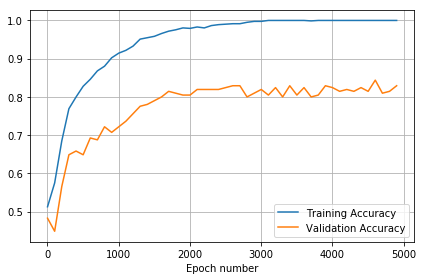


Validation Avg: [ 0.8390244]
Train Avg: [ 1.]






 Overall for: 1_5000
[ 0.8390244]
[ 1.]

OVERALL VAL: 0.839024398385
OVERALL TRAIN: 1.0




In [3]:
test_size = 0.2
epochs = [5000]
b_size = 100
tries = 1
exp = 'neuron_size_10'


histories = np.array([])

X, Y = import_data()

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = test_size)

X_train = np.array(X_train)
X_test = np.array(X_test)
Y_train = np.array(Y_train)
Y_test = np.array(Y_test)

print("\nTraining examples: " +  str(X_train.shape[0]))
print("Test examples: " +  str(X_test.shape[0]))

input_size = len(X_train[0][0])


neurons = [int(input_size/2), int(input_size), int(input_size*2)]

for n in neurons:
    for ep in epochs:
        avg_val = np.array([])
        avg_train = np.array([])
        for t in range(tries):
            print("Epochs: " + str(ep) + '  -------  Try: ' + str(t))
            classifier = create_RNN_model(X_train.shape, n)
            #classifier.summary()

            history = classifier.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=ep, batch_size=b_size, verbose=1)
            result = classifier.evaluate(X_test, Y_test, batch_size=b_size)

            avg_val = np.append(avg_val, result[2])
            avg_train = np.append(avg_train, history.history['acc'][-1])
            histories = np.append(histories, history)

            val_acc = history.history['val_acc']
            train_acc = history.history['acc']

            with open(exp + '/acc_' + str(len(X_train[0])) + '_' + str(ep) + '_' + str(t) + '_' + str(n) + '.txt', "w") as file:
                file.write('val_acc  ' + str(val_acc))
                file.write('\ntrain_acc  ' + str(train_acc))

            fig, ax = draw_figure([train_acc], 'Training Accuracy')
            fig, ax = draw_figure([val_acc], 'Validation Accuracy', fig, ax)

            ax.grid('on')
            fig.tight_layout() 
            fig.savefig(exp + '/graph_' + str(len(X_train[0])) + '_' + str(ep) + '_' + str(t) + '_' + str(n) + '.pdf')
            plt.show() 



#             print(confusion_matrix(classifier.predict(X_test)>0.5, Y_test))

            print("\nValidation Avg: " + str(avg_val))
            print("Train Avg: " + str(avg_train))
            print("\n")

#             c = 0
#             classifications = (classifier.predict(X_test) > 0.5 ) == Y_test
#             for i, flag in enumerate(classifications):
#                 if(flag == False and c<=10):
#                     print(str(X_test[i]) + "    " + str(Y_test[i]))
#                     c += 1

#             c = 0
            with open(exp + '/data_' + str(len(X_train[0])) + '_' + str(ep) + '_' + str(t) + '_' + str(n) + '.txt', "w") as file:
#                 file.write(str(confusion_matrix(classifier.predict(X_test)>0.5, Y_test)))

                file.write("\nValidation Avg: " + str(np.average(avg_val)))
                file.write("\nTrain Avg: " + str(np.average(avg_train)))
                file.write("\n\n")

#                 for i, flag in enumerate(classifications):
#                     if(flag == False and c<=10):
#                         file.write('\n' + str(X_test[i]) + "    " + str(Y_test[i]))
#                         c += 1


            print("\n\n")
        print("\n Overall for: " + str(len(X_train[0])) + '_' + str(ep))
        print(avg_val)
        print(avg_train)
        print("\nOVERALL VAL: " + str(np.average(avg_val)))
        print("OVERALL TRAIN: " + str(np.average(avg_train)))
        print("\n")

        with open(exp + '/data_' + str(len(X_train[0])) + '_' + str(ep) + '_' + str(n)  + '.txt', "w") as file:
            file.write(str(avg_val))
            file.write("\n" + str(avg_train))
            file.write("\n\nOVERALL VAL: " + str(np.average(avg_val)))
            file.write("\nOVERALL TRAIN: " + str(np.average(avg_train)))

In [3]:
from keras.utils import plot_model
plot_model(classifier, to_file='model.pdf', show_shapes=True, show_layer_names=False)

